In [1]:
import SIMSIToolBox
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from copy import deepcopy
import umap
from sklearn.cluster import KMeans
import pickle as pkl
import molmass
import SIMSIToolBox.recalibration

In [2]:
#datadir = "X:/Kevin/Bruker/MALDI/imzML/092622_Brain_C12_100um/"
datadir = "X:/Kevin/Bruker/MALDI/imzML/092622_Brain_C12_50um/"
#datadir = "X:/Kevin/Bruker/MALDI/imzML/"

In [3]:
#fn = "brain_c12_nedc_neg_40um.imzML"
fn = "nedc_14x.imzML"

In [4]:
peaklist = pd.read_csv(datadir + "metaspace_annotations_" + fn.replace(".imzML",".csv"),header=2)
peaklist

group datasetName             datasetId      formula adduct  chemMod  \
0     NaN    nedc_14x  2022-09-27_20h01m33s     C2H7NO3S    M-H      NaN   
1     NaN    nedc_14x  2022-09-27_20h01m33s       C10H9N    M-H      NaN   
2     NaN    nedc_14x  2022-09-27_20h01m33s      C5H9NO4    M-H      NaN   
3     NaN    nedc_14x  2022-09-27_20h01m33s       C7H6O4    M-H      NaN   
4     NaN    nedc_14x  2022-09-27_20h01m33s      C6H9NO5    M-H      NaN   
5     NaN    nedc_14x  2022-09-27_20h01m33s       C6H8O6    M-H      NaN   
6     NaN    nedc_14x  2022-09-27_20h01m33s    C5H14NO6P    M-H      NaN   
7     NaN    nedc_14x  2022-09-27_20h01m33s     C6H11O8P    M-H      NaN   
8     NaN    nedc_14x  2022-09-27_20h01m33s     C16H32O2    M-H      NaN   
9     NaN    nedc_14x  2022-09-27_20h01m33s     C6H13O9P    M-H      NaN   
10    NaN    nedc_14x  2022-09-27_20h01m33s     C18H32O2    M-H      NaN   
11    NaN    nedc_14x  2022-09-27_20h01m33s     C18H34O2    M-H      NaN   
12    NaN    nedc_14x  2022-09-27_20h01m33s     C18H36O2    M-H      NaN   
13    NaN    nedc_14x  2022-09-27_20h01m33s    C18H18NO3    M-H      NaN   
14    NaN    nedc_14x  2022-09-27_20h01m33s    C8H15NO9S    M-H      NaN   
15    NaN    nedc_14x  2022-09-27_20h01m33s   C11H16N2O8    M-H      NaN   
16    NaN    nedc_14x  2022-09-27_20h01m33s     C20H32O2    M-H      NaN   
17    NaN    nedc_14x  2022-09-27_20h01m33s  C10H17N3O6S    M-H      NaN   
18    NaN    nedc_14x  2022-09-27_20h01m33s    C18H13NO4    M-H      NaN   
19    NaN    nedc_14x  2022-09-27_20h01m33s     C20H38O2    M-H      NaN   
20    NaN    nedc_14x  2022-09-27_20h01m33s     C20H40O2    M-H      NaN   
21    NaN    nedc_14x  2022-09-27_20h01m33s    C18H30O3S    M-H      NaN   
22    NaN    nedc_14x  2022-09-27_20h01m33s     C22H32O2    M-H      NaN   
23    NaN    nedc_14x  2022-09-27_20h01m33s     C22H36O2    M-H      NaN   
24    NaN    nedc_14x  2022-09-27_20h01m33s     C22H42O2    M-H      NaN   
25    NaN    nedc_14x  2022-09-27_20h01m33s  C10H14N5O7P    M-H      NaN   

               ion          mz       msm   fdr  ...  \
0      C2H7NO3S-H-  124.007309  0.621320  0.05  ...   
1        C10H9N-H-  142.066144  0.333116  0.05  ...   
2       C5H9NO4-H-  146.045803  0.226492  0.10  ...   
3        C7H6O4-H-  153.019254  0.222339  0.10  ...   
4       C6H9NO5-H-  174.040717  0.586289  0.05  ...   
5        C6H8O6-H-  175.024733  0.300686  0.10  ...   
6     C5H14NO6P-H-  214.048519  0.216133  0.10  ...   
7      C6H11O8P-H-  241.011799  0.261999  0.10  ...   
8      C16H32O2-H-  255.232875  0.622373  0.05  ...   
9      C6H13O9P-H-  259.022364  0.197672  0.10  ...   
10     C18H32O2-H-  279.232875  0.230325  0.10  ...   
11     C18H34O2-H-  281.248525  0.748348  0.05  ...   
12     C18H36O2-H-  283.264175  0.809738  0.05  ...   
13    C18H18NO3-H-  295.121314  0.219834  0.10  ...   
14    C8H15NO9S-H-  300.039397  0.352725  0.05  ...   
15   C11H16N2O8-H-  303.083311  0.483440  0.05  ...   
16     C20H32O2-H-  303.232875  0.790144  0.05  ...   
17  C10H17N3O6S-H-  306.076451  0.295076  0.10  ...   
18    C18H13NO4-H-  306.077103  0.228478  0.10  ...   
19     C20H38O2-H-  309.279826  0.636321  0.05  ...   
20     C20H40O2-H-  311.295476  0.195532  0.10  ...   
21    C18H30O3S-H-  325.184211  0.201482  0.10  ...   
22     C22H32O2-H-  327.232875  0.801960  0.05  ...   
23     C22H36O2-H-  331.264175  0.479892  0.05  ...   
24     C22H42O2-H-  337.311126  0.207657  0.10  ...   
25  C10H14N5O7P-H-  346.055729  0.262052  0.10  ...   

                                        moleculeNames  \
0                                             Taurine   
1   6-Methylquinoline, 2-Aminonaphthalene, Quinaldine   
2   N-Acetylserine, L-Glutamic acid, N-Methyl-D-as...   
3   Protocatechuic acid, Gentisic acid, 2-Pyrocate...   
4   N-Acetyl-L-aspartic acid, N-Formyl-L-glutamic ...   
5   Ascorbic acid, D-Glucurono-6,3-lactone, 1,2,3-...   
6   Glycerylphosphorylethanolamine, sn-glycero-3-P...   
7        

In [5]:
mzsCorr = list(peaklist["mz"].values)
mzsCorr.sort()

In [6]:
ppmThresh = 5
num_cores = 20
intensityCutoff = 100
convSquare = 3 #size of filter (1=1x1,3=3x3,5=5x5)
colormap = LinearSegmentedColormap.from_list("test",colors=["black", "navy","blue","cyan","yellow","orange","orangered","red","mistyrose","white"],N=256)
dm_method = "PCA" #method for dimensionality reduction ("PCA" or "TSNE") PCA has worked better for me
seg_method = "K_means" #thresholding method ("TIC_auto", "K_means", "TIC_manual")
num_components = 2 #number of compoents to use with PCA or TSNE
filt = "GB" #filtering method (GB = gaussian blur, MA = moving average)

In [225]:
if __name__ == "__main__":
    tolerance = 0.05
    step = 0.001
    dalim = 0.01
    SIMSIToolBox.recalibration.write_corrected_msi(datadir + fn,datadir + fn.replace(".imzML","_recal.imzML"),tolerance,mzsCorr,step,dalim,numCores=num_cores)


reading spectra...

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\pyimzml\ontology\ontology.py:94: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size x". Updating name to "pixel size (x)".
  % (accession, raw_name, name)


KeyboardInterrupt: 

In [7]:
peaklist = pd.read_csv(datadir + "metaspace_annotations_" + fn.replace(".imzML","_recal.csv"),header=2)
peaklist

group     datasetName             datasetId      formula adduct  chemMod  \
0     NaN  nedc_14x_recal  2022-09-28_19h55m11s     C2H7NO3S    M-H      NaN   
1     NaN  nedc_14x_recal  2022-09-28_19h55m11s       C10H9N    M-H      NaN   
2     NaN  nedc_14x_recal  2022-09-28_19h55m11s    C5H10N2O3    M-H      NaN   
3     NaN  nedc_14x_recal  2022-09-28_19h55m11s      C5H9NO4    M-H      NaN   
4     NaN  nedc_14x_recal  2022-09-28_19h55m11s       C7H6O4    M-H      NaN   
5     NaN  nedc_14x_recal  2022-09-28_19h55m11s      C11H8N2    M-H      NaN   
6     NaN  nedc_14x_recal  2022-09-28_19h55m11s    C4H12NO4P    M-H      NaN   
7     NaN  nedc_14x_recal  2022-09-28_19h55m11s     C6H9N3O3    M-H      NaN   
8     NaN  nedc_14x_recal  2022-09-28_19h55m11s      C3H9O6P    M-H      NaN   
9     NaN  nedc_14x_recal  2022-09-28_19h55m11s      C6H9NO5    M-H      NaN   
10    NaN  nedc_14x_recal  2022-09-28_19h55m11s       C6H8O6    M-H      NaN   
11    NaN  nedc_14x_recal  2022-09-28_19h55m11s    C7H11N3O3    M-H      NaN   
12    NaN  nedc_14x_recal  2022-09-28_19h55m11s     C12H14N2    M-H      NaN   
13    NaN  nedc_14x_recal  2022-09-28_19h55m11s    C8H18N4O2    M-H      NaN   
14    NaN  nedc_14x_recal  2022-09-28_19h55m11s   C11H12N2O2    M-H      NaN   
15    NaN  nedc_14x_recal  2022-09-28_19h55m11s    C5H14NO6P    M-H      NaN   
16    NaN  nedc_14x_recal  2022-09-28_19h55m11s     C6H11O8P    M-H      NaN   
17    NaN  nedc_14x_recal  2022-09-28_19h55m11s     C11H22O6    M-H      NaN   
18    NaN  nedc_14x_recal  2022-09-28_19h55m11s     C16H32O2    M-H      NaN   
19    NaN  nedc_14x_recal  2022-09-28_19h55m11s     C6H12O9S    M-H      NaN   
20    NaN  nedc_14x_recal  2022-09-28_19h55m11s     C6H13O9P    M-H      NaN   
21    NaN  nedc_14x_recal  2022-09-28_19h55m11s    C14H22NO4    M-H      NaN   
22    NaN  nedc_14x_recal  2022-09-28_19h55m11s   C13H26N4O2    M-H      NaN   
23    NaN  nedc_14x_recal  2022-09-28_19h55m11s     C10H16O9    M-H      NaN   
24    NaN  nedc_14x_recal  2022-09-28_19h55m11s     C18H32O2    M-H      NaN   
25    NaN  nedc_14x_recal  2022-09-28_19h55m11s     C18H34O2    M-H      NaN   
26    NaN  nedc_14x_recal  2022-09-28_19h55m11s   C13H24N4O3    M-H      NaN   
27    NaN  nedc_14x_recal  2022-09-28_19h55m11s     C18H36O2    M-H      NaN   
28    NaN  nedc_14x_recal  2022-09-28_19h55m11s    C18H18NO3    M-H      NaN   
29    NaN  nedc_14x_recal  2022-09-28_19h55m11s   C18H17FN2O    M-H      NaN   
30    NaN  nedc_14x_recal  2022-09-28_19h55m11s    C8H15NO9S    M-H      NaN   
31    NaN  nedc_14x_recal  2022-09-28_19h55m11s   C11H16N2O8    M-H      NaN   
32    NaN  nedc_14x_recal  2022-09-28_19h55m11s     C20H32O2    M-H      NaN   
33    NaN  nedc_14x_recal  2022-09-28_19h55m11s  C10H17N3O6S    M-H      NaN   
34    NaN  nedc_14x_recal  2022-09-28_19h55m11s    C18H13NO4    M-H      NaN   
35    NaN  nedc_14x_recal  2022-09-28_19h55m11s     C20H36O2    M-H      NaN   
36    NaN  nedc_14x_recal  2022-09-28_19h55m11s     C20H38O2    M-H      NaN   
37    NaN  nedc_14x_recal  2022-09-28_19h55m11s    C17H28O3S    M-H      NaN   
38    NaN  nedc_14x_recal  2022-09-28_19h55m11s     C20H40O2    M-H      NaN   
39    NaN  nedc_14x_recal  2022-09-28_19h55m11s    C18H30O3S    M-H      NaN   
40    NaN  nedc_14x_recal  2022-09-28_19h55m11s     C14H30O8    M-H      NaN   
41    NaN  nedc_14x_recal  2022-09-28_19h55m11s     C22H32O2    M-H      NaN   
42    NaN  nedc_14x_recal  2022-09-28_19h55m11s   C16H20N4O4    M-H      NaN   
43    NaN  nedc_14x_recal  2022-09-28_19h55m11s     C22H36O2    M-H      NaN   
44    NaN  nedc_14x_recal  2022-09-28_19h55m11s     C22H42O2    M-H      NaN   
45    NaN  nedc_14x_recal  2022-09-28_19h55m11s     C22H44O2    M-H      NaN   
46    NaN  nedc_14x_recal  2022-09-28_19h55m11s  C10H14N5O7P    M-H      NaN   
47    NaN  nedc_14x_recal  2022-09-28_19h55m11s     C20H28O6    M-H      NaN   
48    NaN  nedc_14x_recal  2022-09-28_19h55m11s    C19H37O6P    M-H      NaN   

   

In [8]:
mzs = []
keys = []
for index,row in peaklist.iterrows():
    _,_,nC = SIMSIToolBox.getMzsOfIsotopologues(row["formula"],"C")
    for x in range(nC+1):
        mzs.append(row["mz"] + 1.00336 * x)
        keys.append((index,x))
print(len(mzs))

671


In [9]:
msi = SIMSIToolBox.MSIData(mzs,ppm=ppmThresh,numCores = num_cores,intensityCutoff=intensityCutoff)

In [19]:
if __name__ == "__main__":
    msi.readimzML(datadir + fn)

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\pyimzml\ontology\ontology.py:94: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size x". Updating name to "pixel size (x)".
  % (accession, raw_name, name)


extracting intensities |██████████████████████████████████████████████████| 100.0% 


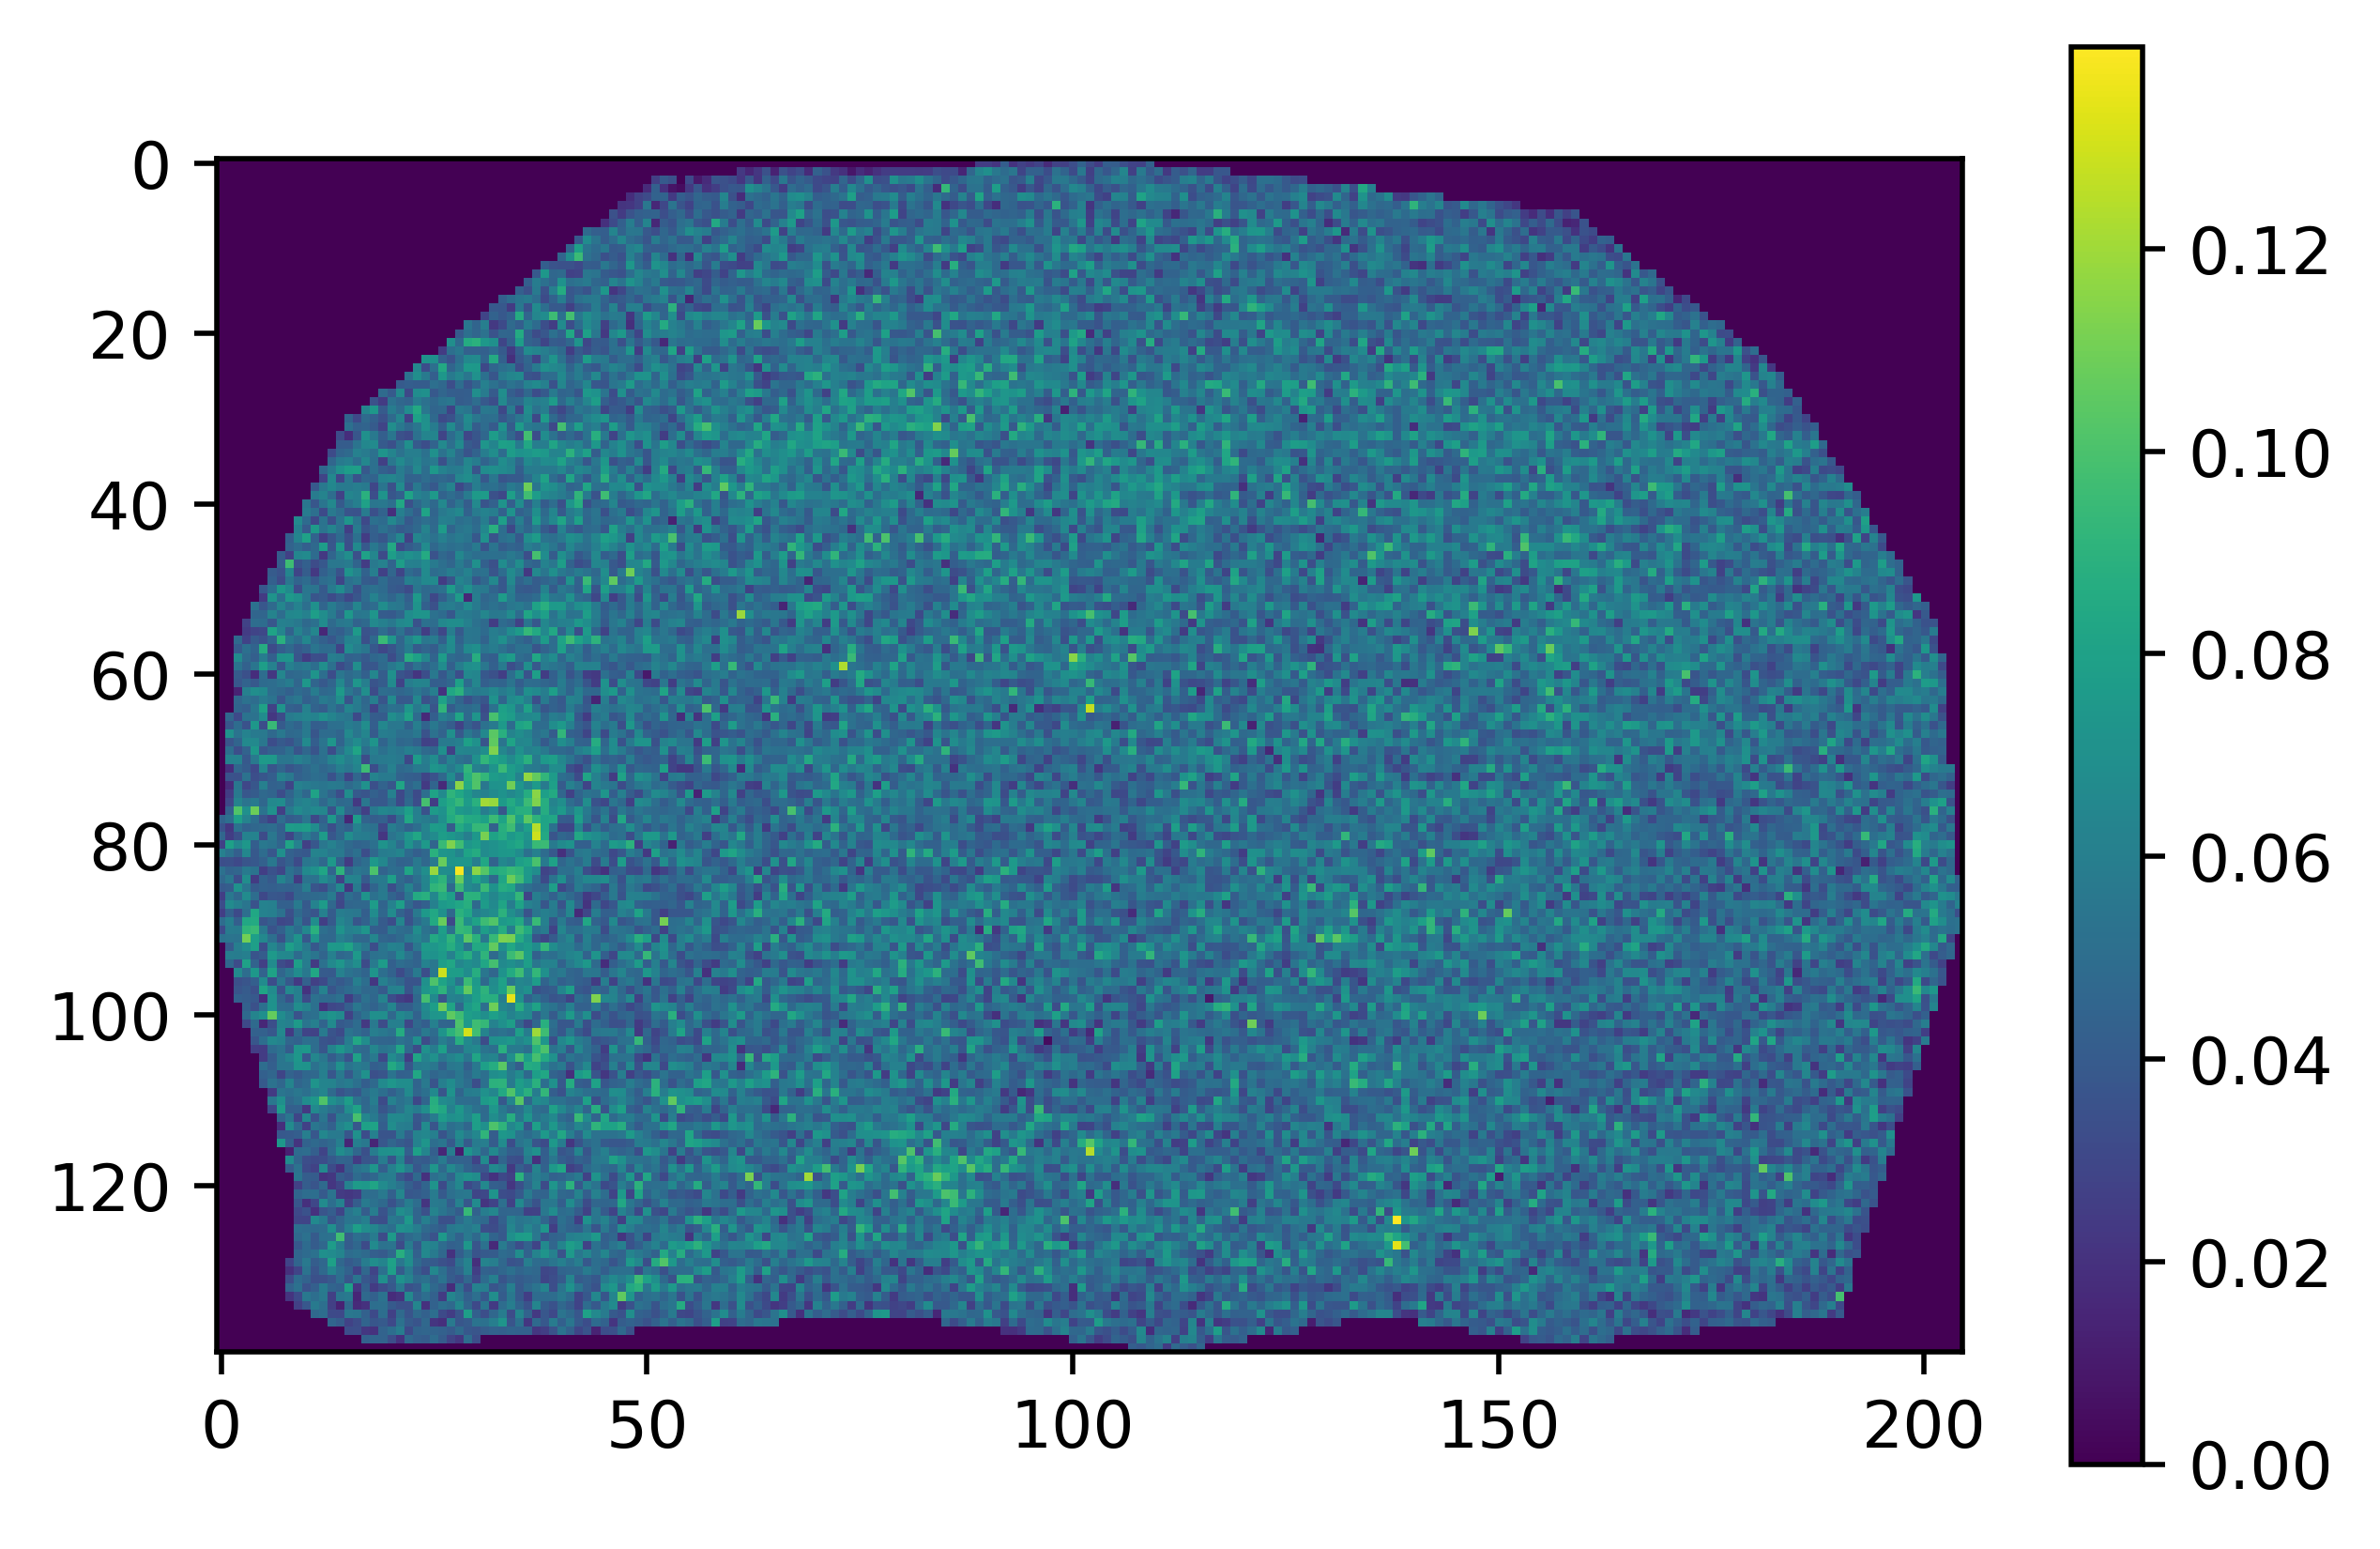

In [28]:
plt.imshow(np.mean(msi.mass_errors,axis=0))
plt.colorbar()

In [10]:
if __name__ == "__main__":
    msi.readimzML(datadir + fn.replace(".imzML","_recal.imzML"))

extracting intensities |██████████████████████████████████████████████████| 100.0% 


(array([1.8865148e+07, 2.3410000e+04, 2.9443000e+04, 6.5592000e+04,
        1.0219000e+04, 4.5326000e+04, 1.7629000e+04, 3.6180000e+03,
        1.8596000e+04, 3.0515000e+04, 4.1020000e+03, 2.5784000e+04,
        1.1206000e+04, 1.2248000e+04, 2.9706000e+04, 1.2046000e+04,
        1.5414000e+04, 1.4492000e+04, 1.9427000e+04, 3.7790000e+03]),
 array([0.        , 0.2499002 , 0.49980039, 0.74970059, 0.99960079,
        1.24950098, 1.49940118, 1.74930138, 1.99920157, 2.24910177,
        2.49900197, 2.74890216, 2.99880236, 3.24870256, 3.49860275,
        3.74850295, 3.99840314, 4.24830334, 4.49820354, 4.74810373,
        4.99800393]),
 <BarContainer object of 20 artists>)

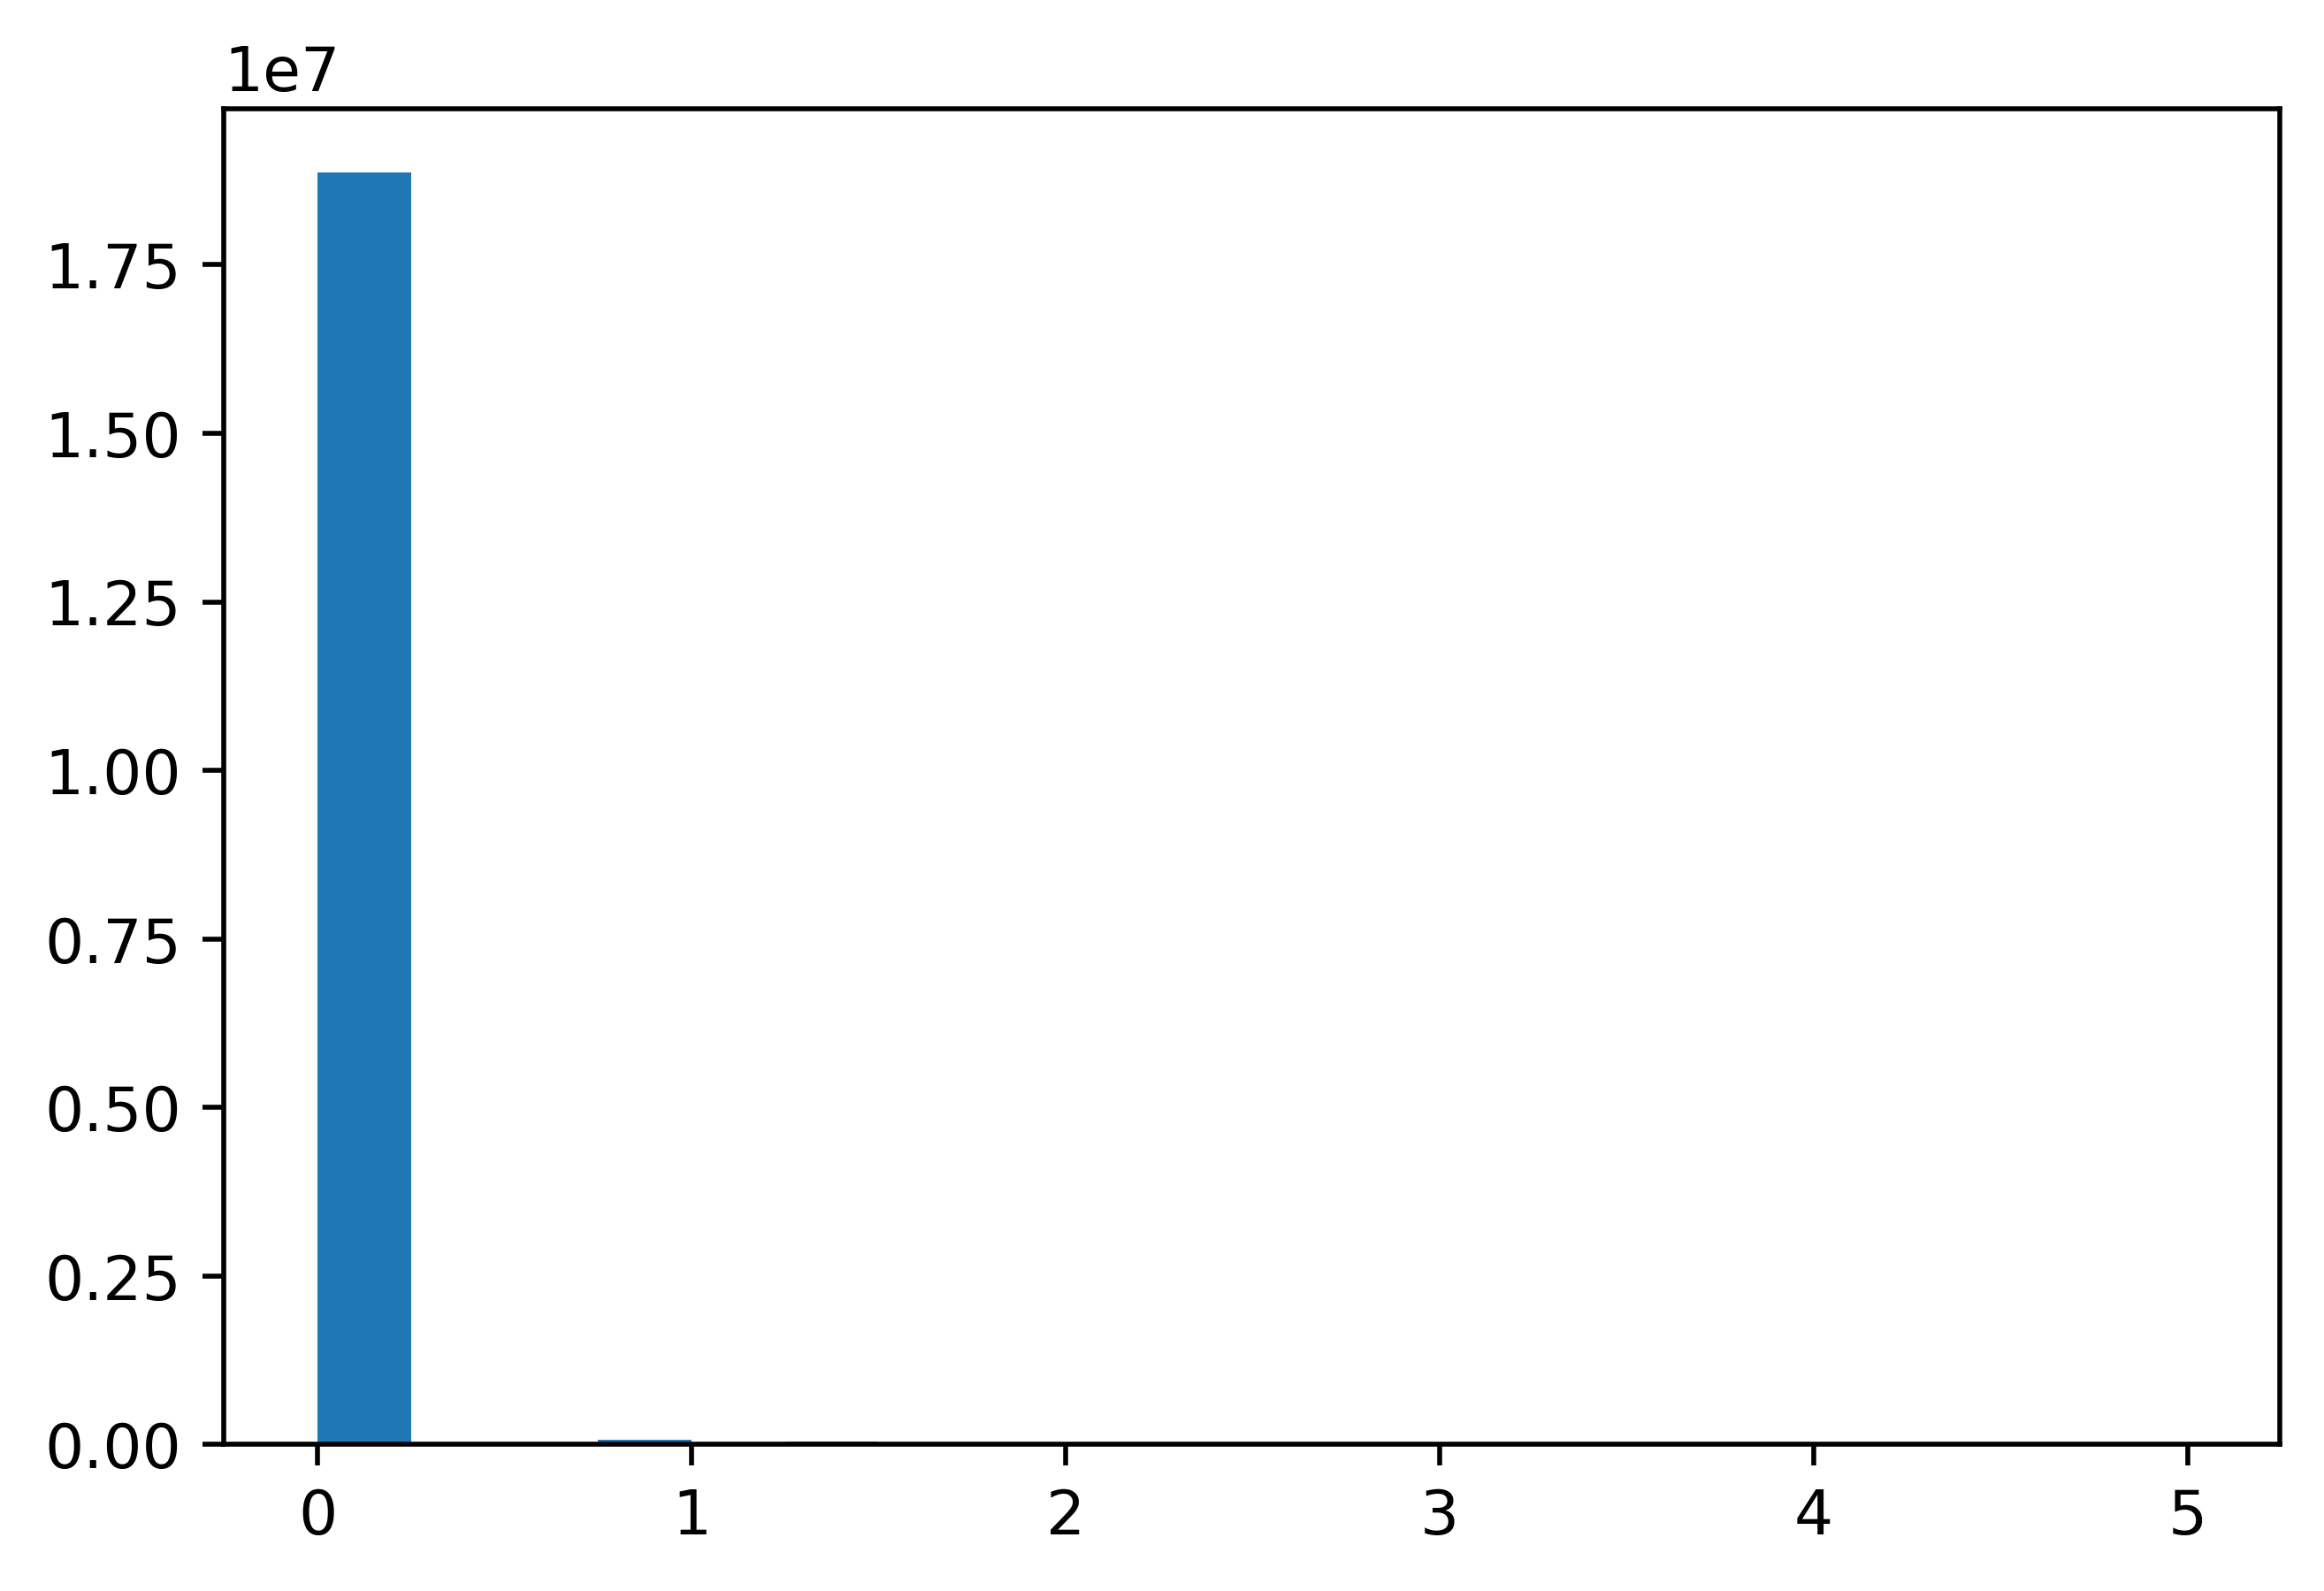

In [37]:
plt.hist(msi.mass_errors[:,msi.imageBoundary > 0.5].flatten(),bins=20)

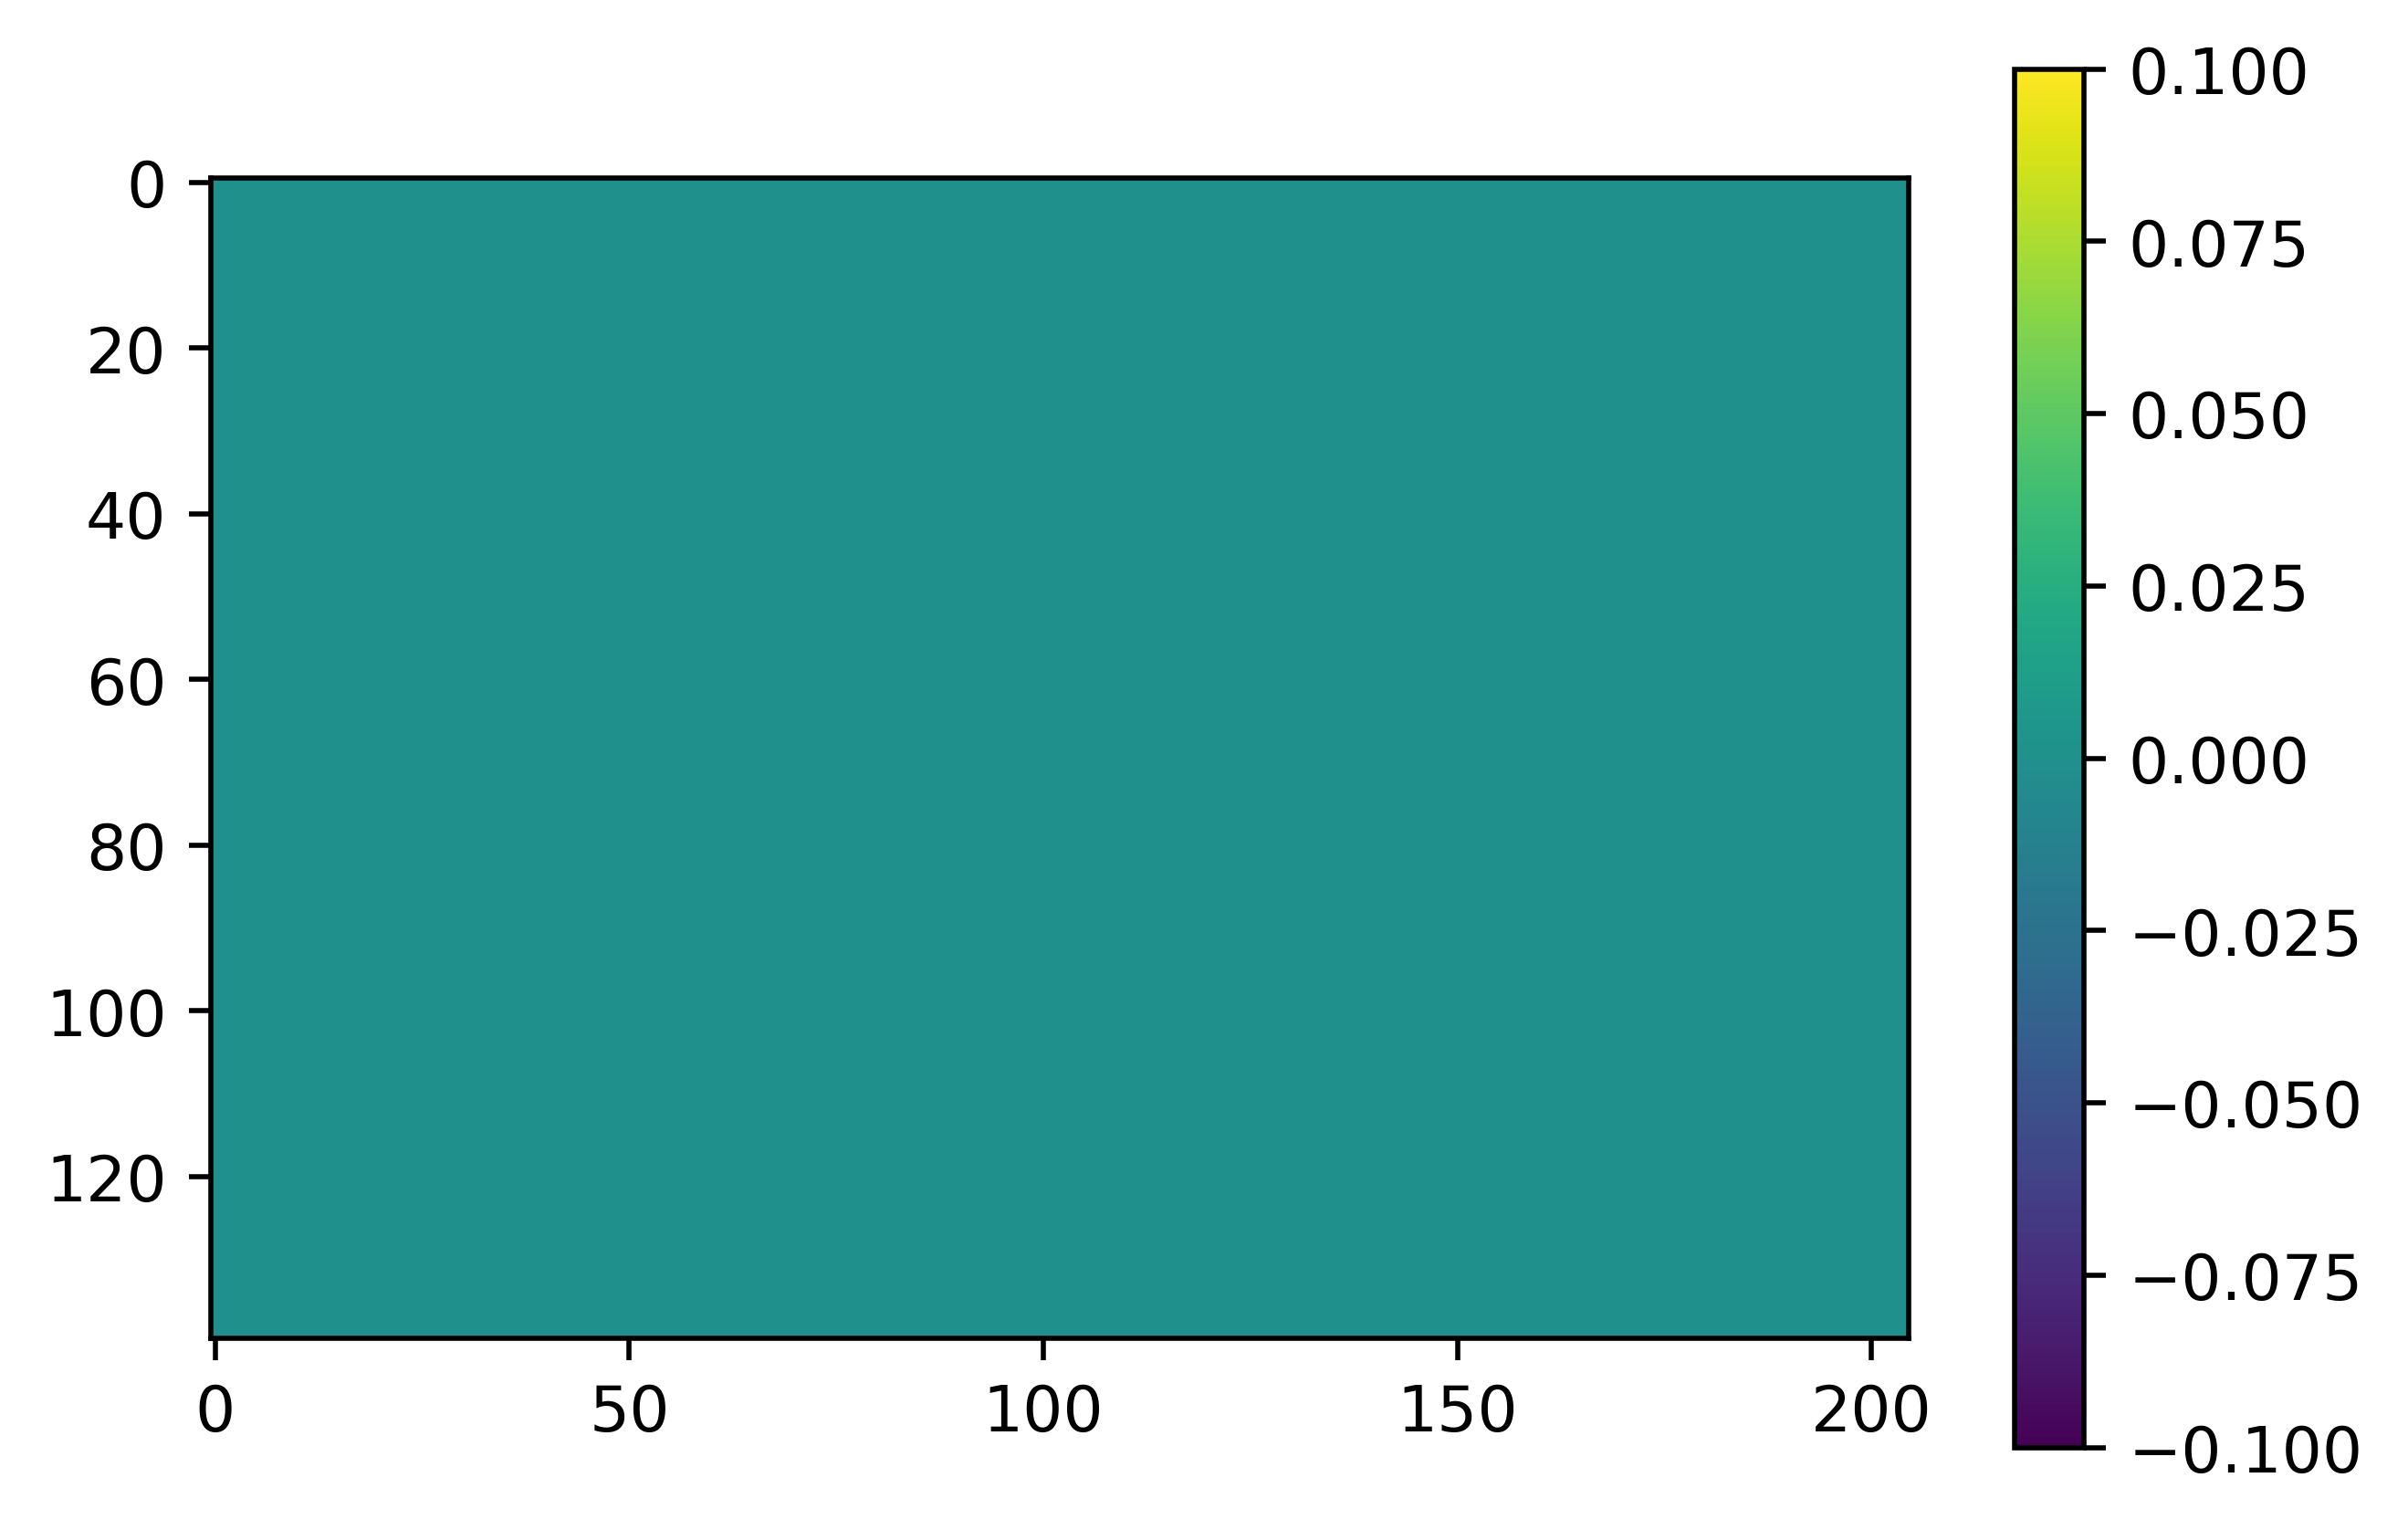

In [34]:
plt.imshow(np.percentile(msi.mass_errors,0,axis=0))
plt.colorbar()

forming matrix |██████████████████████████████████████████████████| 100.0% 


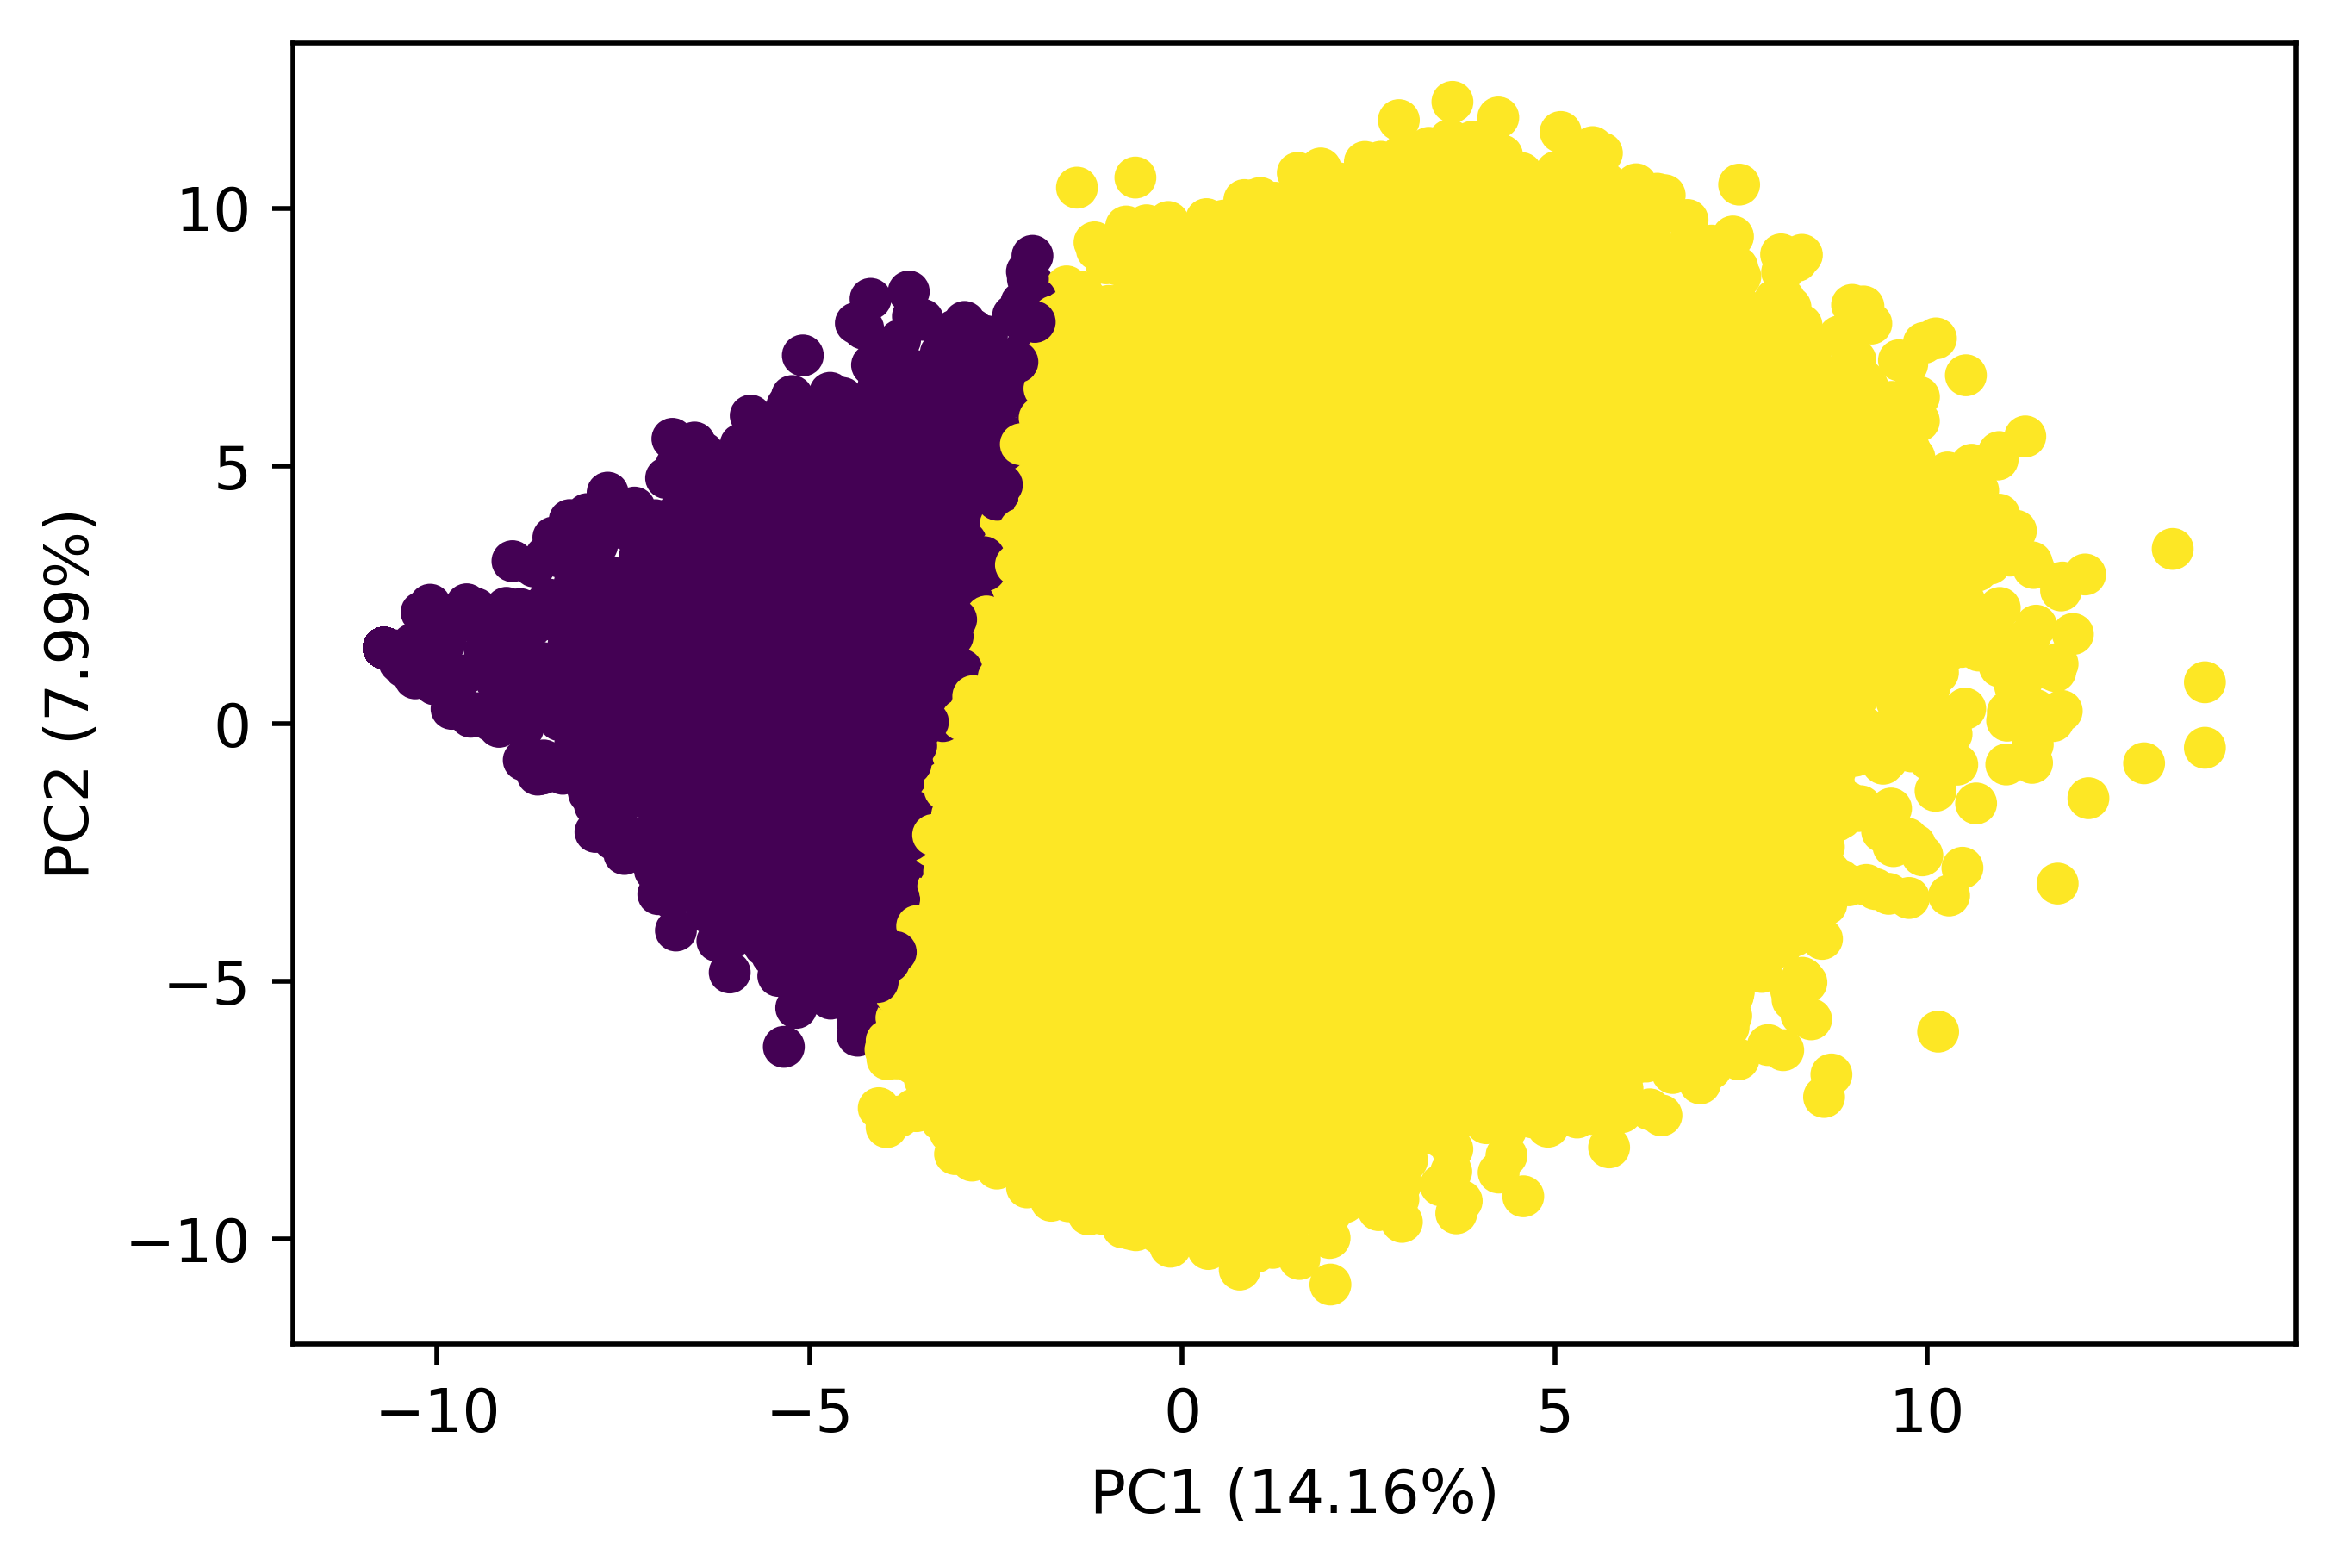

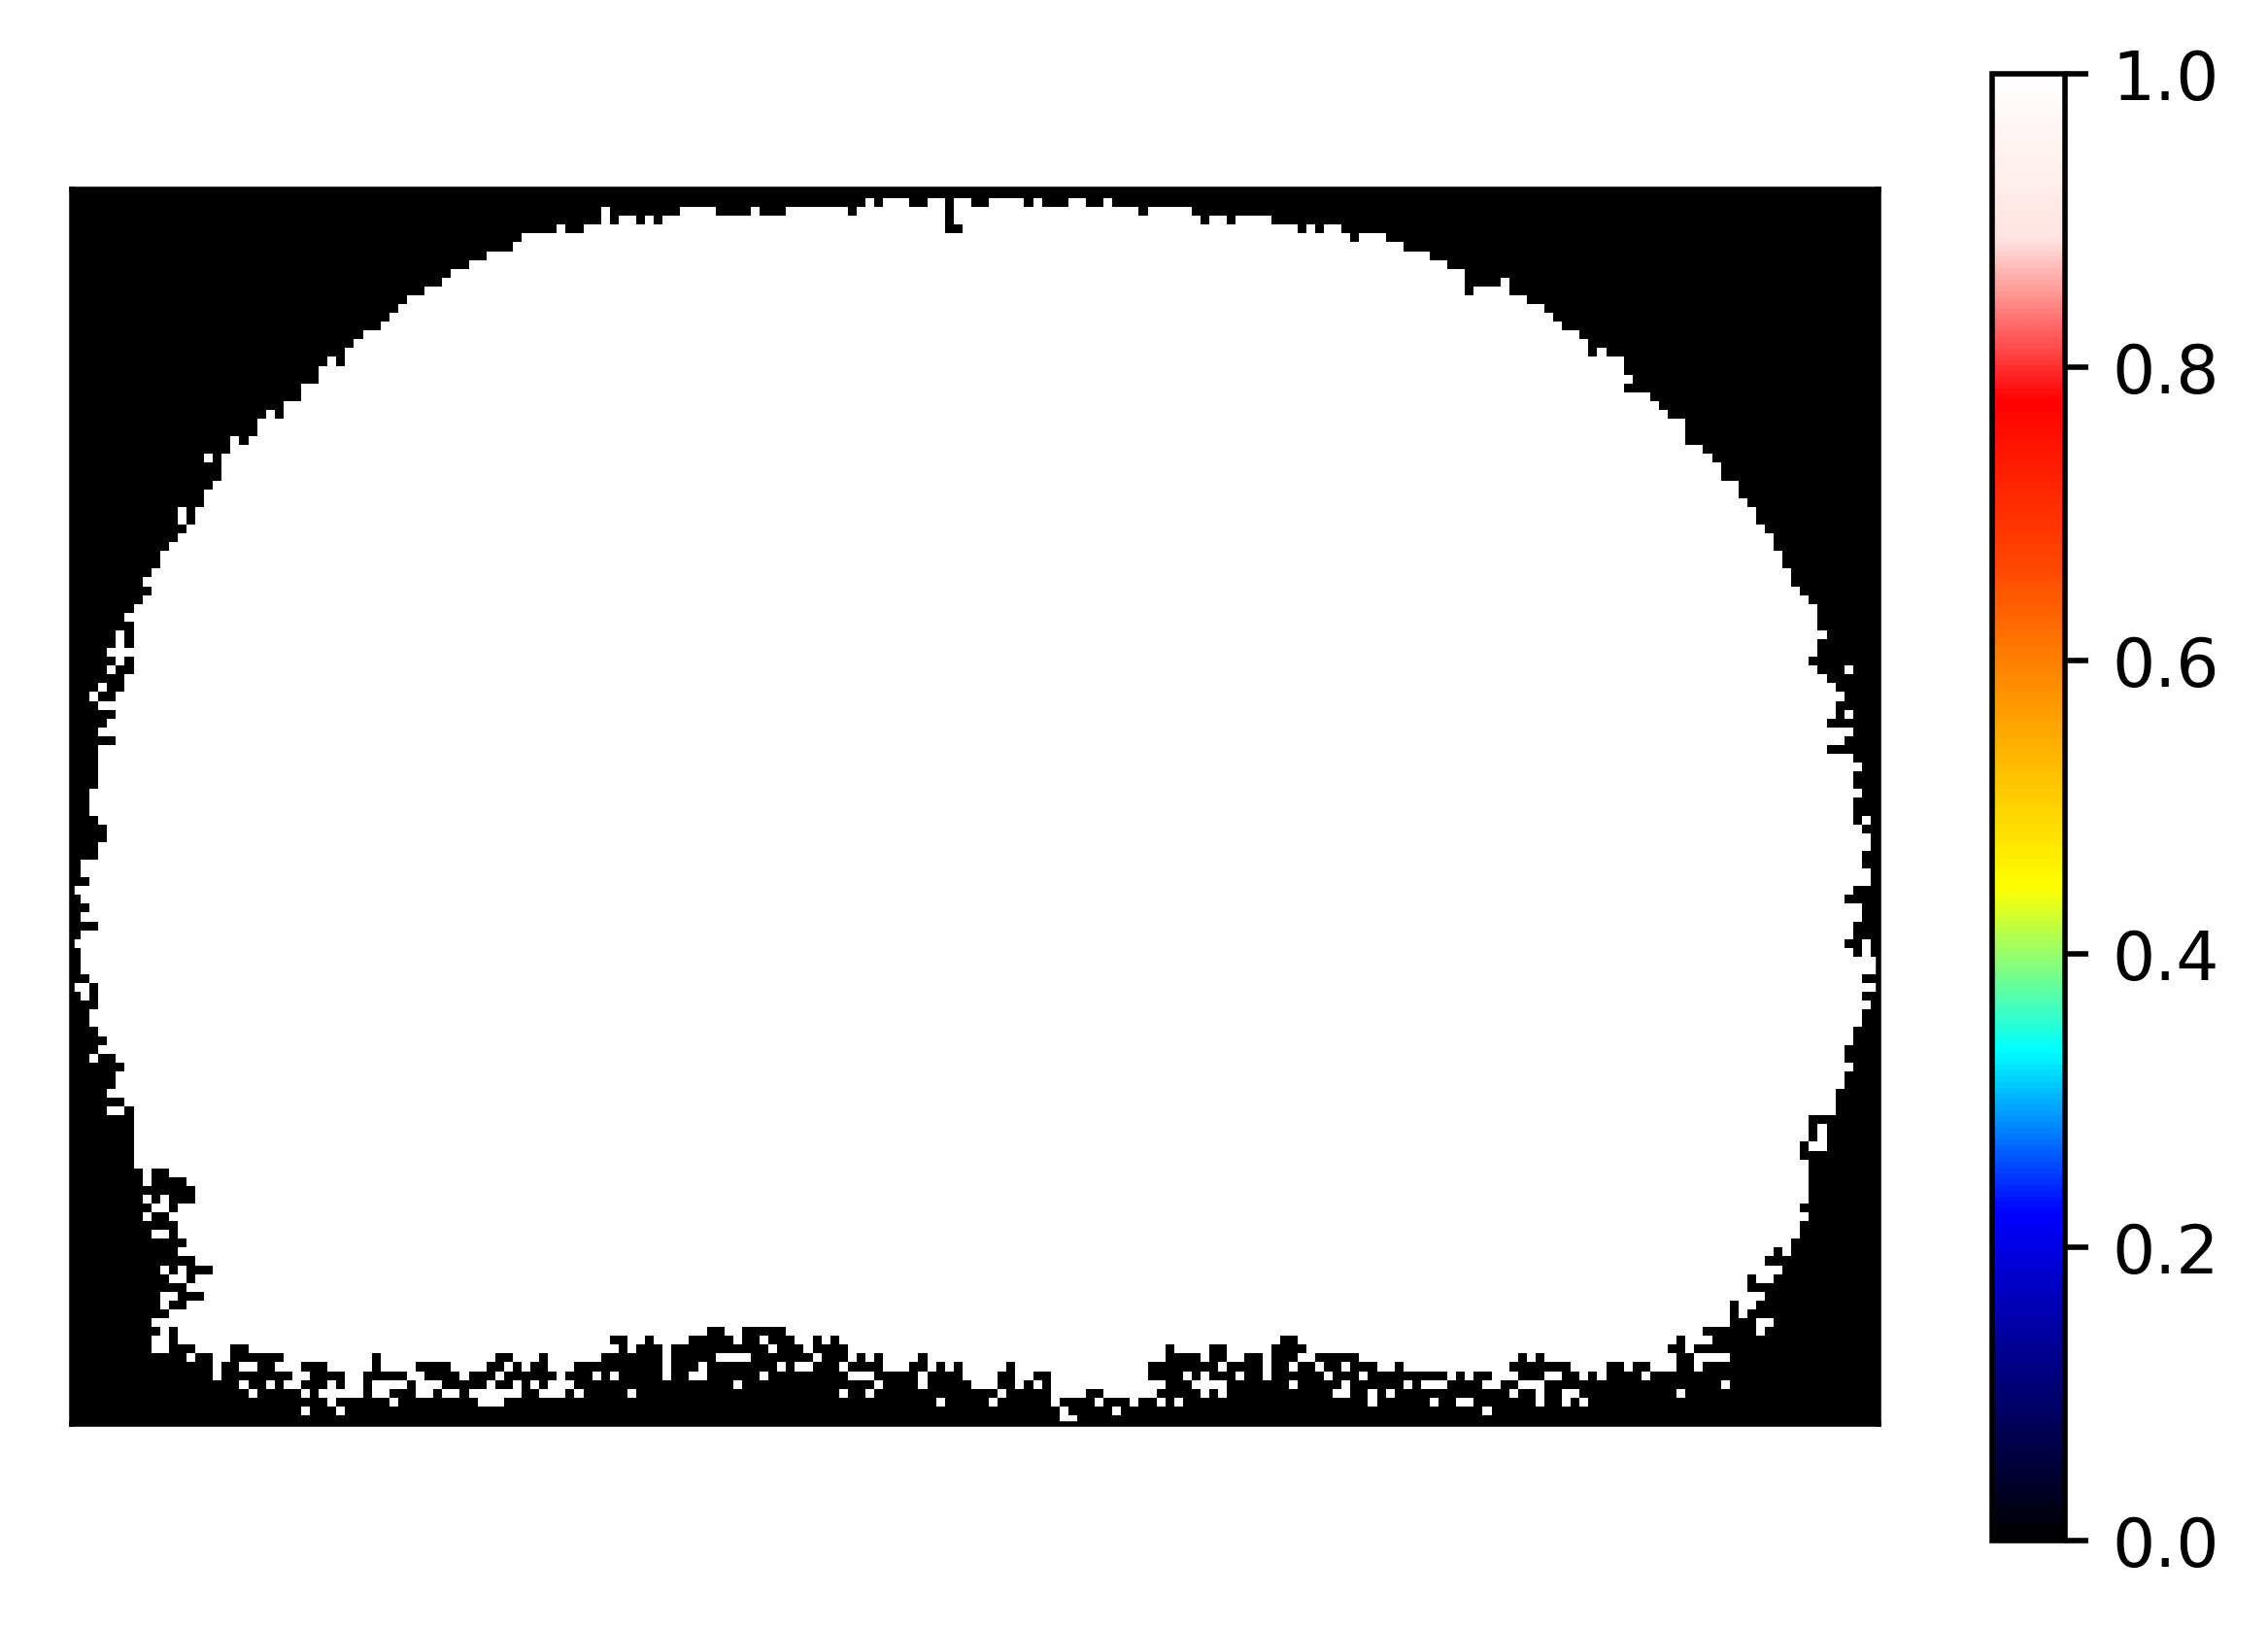

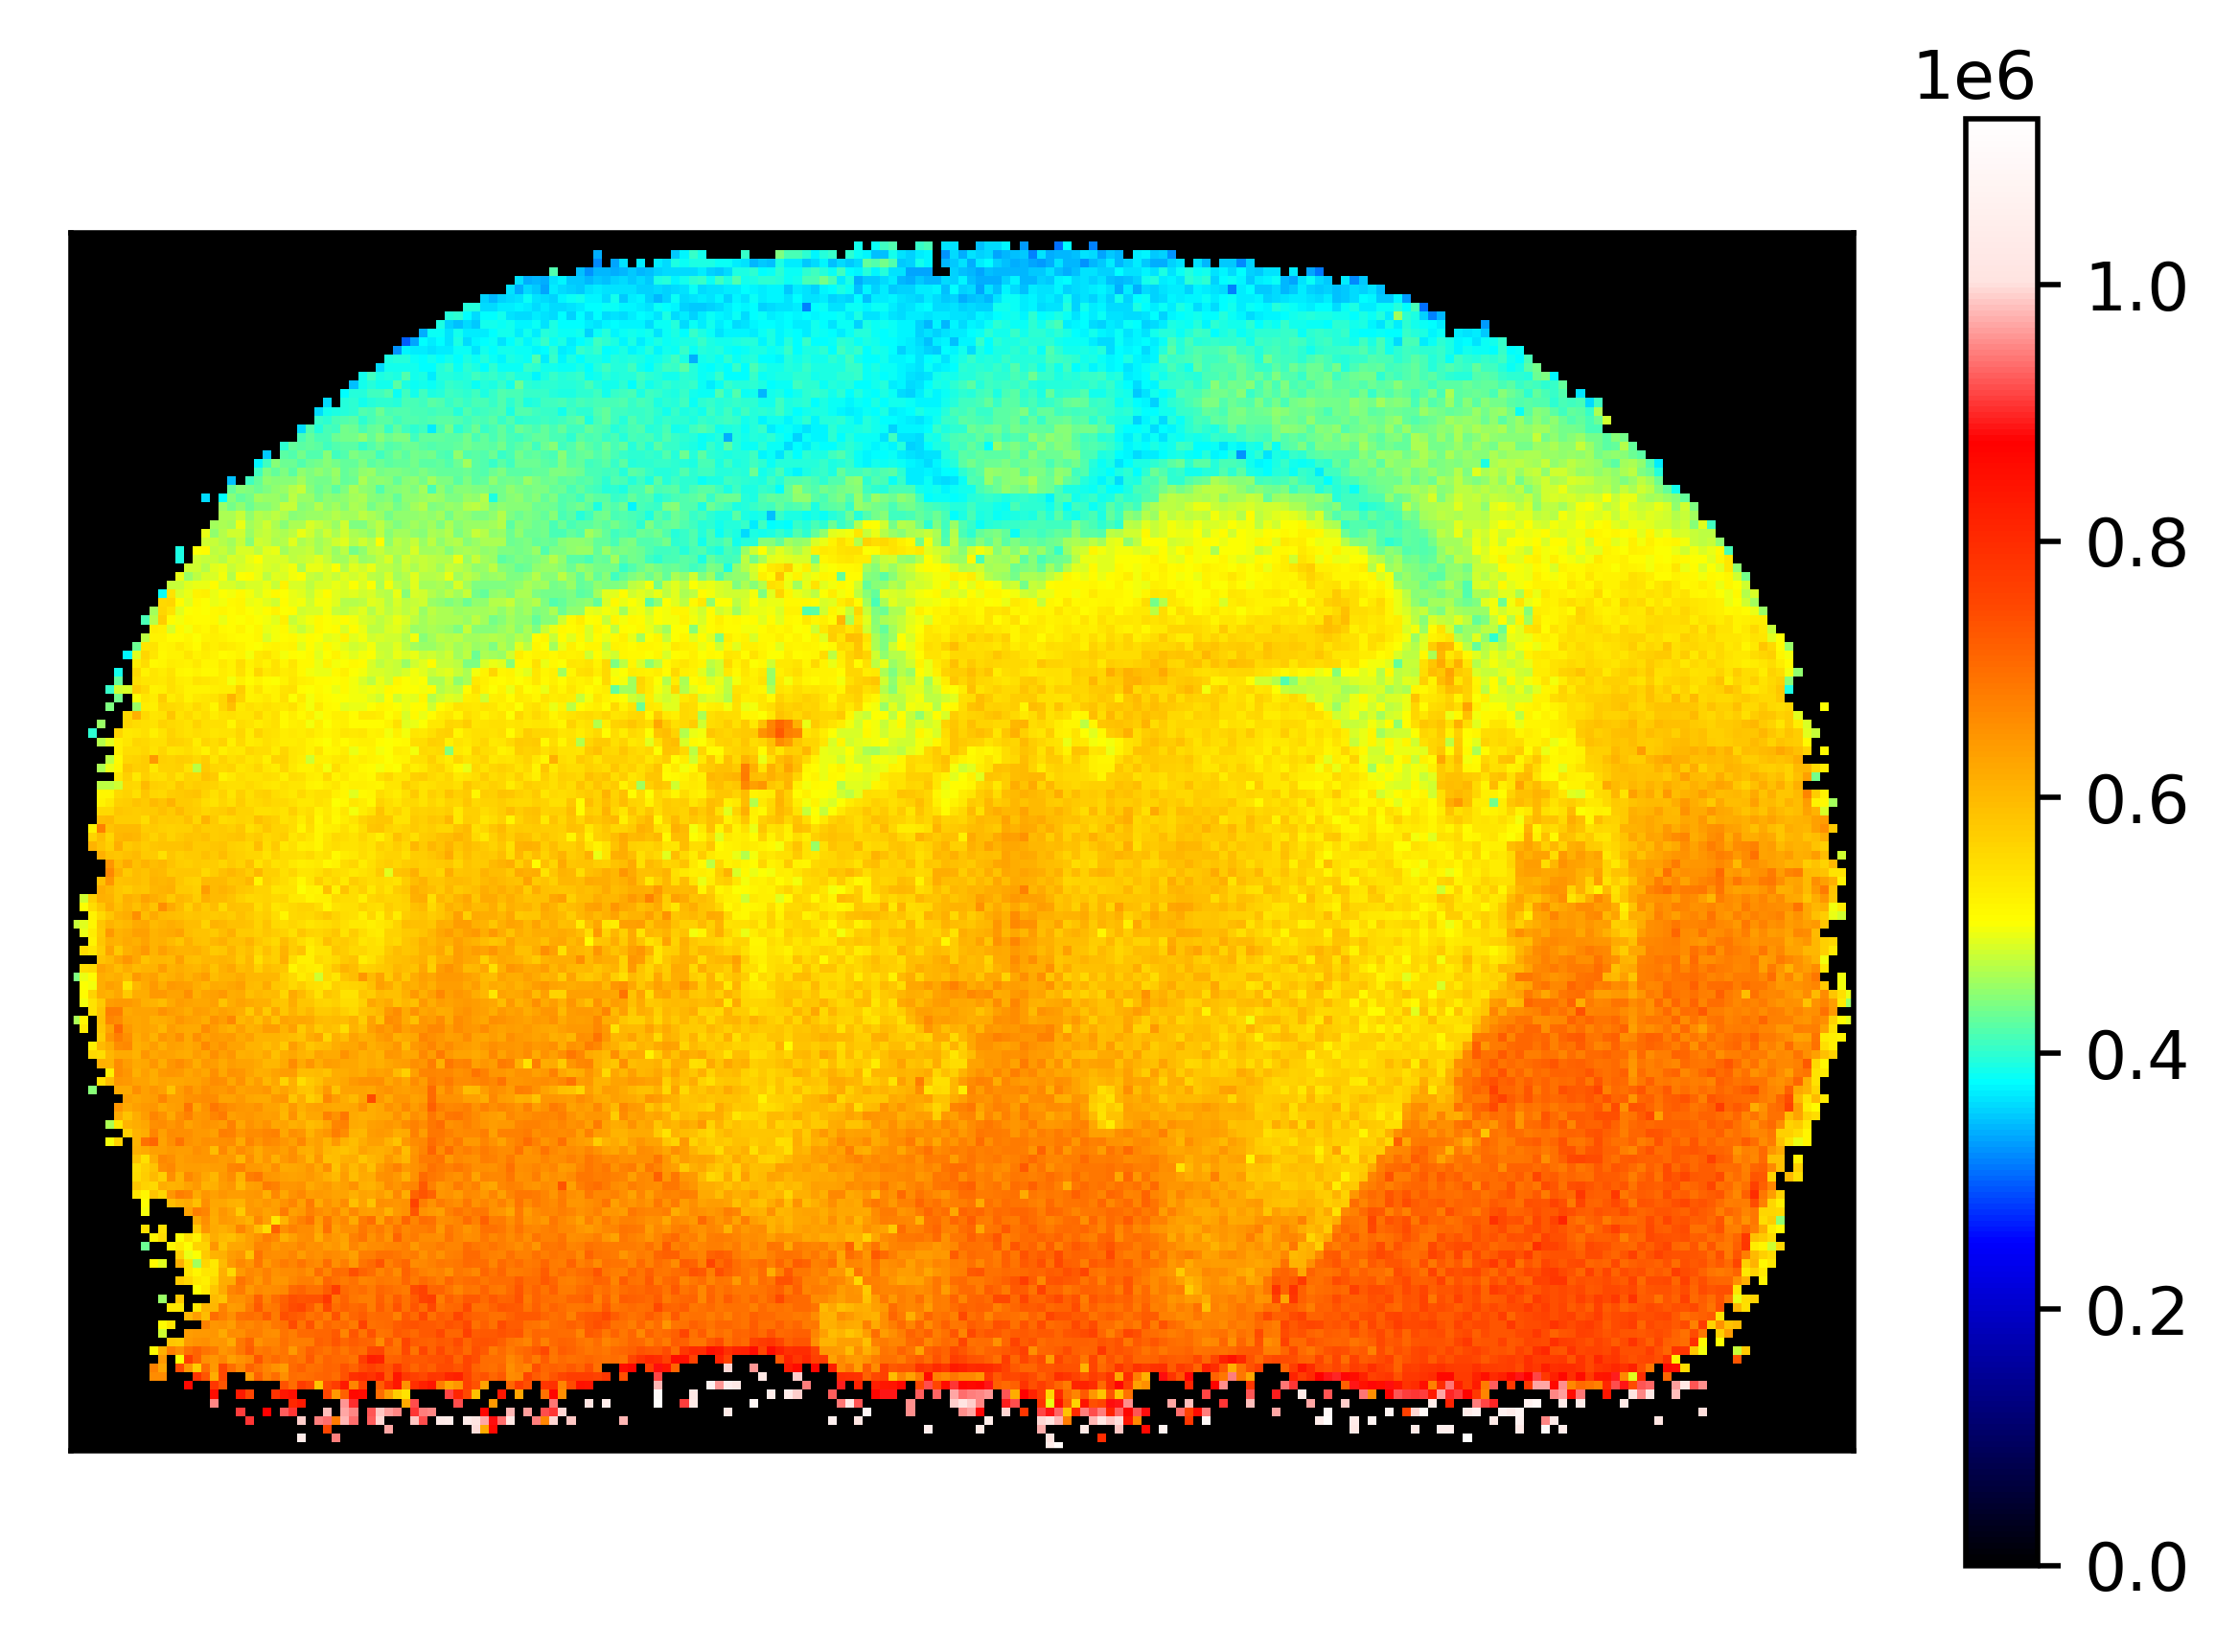

In [12]:
if __name__ == "__main__":
    msi.segmentImage(method=seg_method, num_latent=num_components, dm_method=dm_method,fill_holes = True)
    plt.figure()
    SIMSIToolBox.showImage(msi.imageBoundary, cmap=colormap)
    plt.figure()
    SIMSIToolBox.showImage(msi.tic_image, cmap=colormap)



In [13]:
if __name__ == "__main__":
    msi.smoothData(filt,convSquare)

Smoothing data |██████████████████████████████████████████████████| 100.0% 


In [14]:
msi_corrected = deepcopy(msi)

In [15]:
if __name__ == "__main__":
    inds = []
    toDrop = []
    for index,row in peaklist.iterrows():
        tmp = [x for x in range(len(keys)) if keys[x][0] == index]
        tmp.sort(key=lambda x: keys[x][1])
        inds.append(tmp)
        f = molmass.Formula(row["formula"])  # create formula object
        comp = f.composition()
        bad = False
        for row in comp:
            if row[0] not in ["H","C","N","O","S","P","Si"]:
                bad = True
                break
        if bad:
            toDrop.append(index)
    peaklist["inds"] = inds
    peaklist = peaklist.drop(toDrop,axis=0)
    msi_corrected.correctNaturalAbundance(peaklist["formula"].values,peaklist["inds"].values)

    

correcting natural abundance |██████████████████████████████████████████████████| 100.0% 


In [16]:
scores = []
for index,row in peaklist.iterrows():
    tmp = msi_corrected.data_tensor[row["inds"]]
    isoTensor = SIMSIToolBox.normalizeTensor(tmp)
    scores.append(np.mean(isoTensor[0][msi.imageBoundary > 0.5]))
peaklist["meanM0"] = scores
peaklist = peaklist.sort_values(by="meanM0",ascending=False)
peaklist.head()

group     datasetName             datasetId      formula adduct  chemMod  \
0     NaN  nedc_14x_recal  2022-09-28_19h55m11s     C2H7NO3S    M-H      NaN   
3     NaN  nedc_14x_recal  2022-09-28_19h55m11s      C5H9NO4    M-H      NaN   
33    NaN  nedc_14x_recal  2022-09-28_19h55m11s  C10H17N3O6S    M-H      NaN   
46    NaN  nedc_14x_recal  2022-09-28_19h55m11s  C10H14N5O7P    M-H      NaN   
2     NaN  nedc_14x_recal  2022-09-28_19h55m11s    C5H10N2O3    M-H      NaN   

               ion          mz       msm   fdr  ...  minIntensity  \
0      C2H7NO3S-H-  124.007309  0.385728  0.05  ...             0   
3       C5H9NO4-H-  146.045803  0.116707  0.10  ...             0   
33  C10H17N3O6S-H-  306.076451  0.150366  0.10  ...             0   
46  C10H14N5O7P-H-  346.055729  0.162895  0.10  ...             0   
2     C5H10N2O3-H-  145.061787  0.070435  0.10  ...             0   

    maxIntensity  totalIntensity isomers isobars  offSample  rawOffSampleProb  \
0          63677       505492640       1       0        NaN               NaN   
3           8700        47588992       9       1        NaN               NaN   
33          8248        50136996       1       1        NaN               NaN   
46          4451        44923052       5       0        NaN               NaN   
2           3201        19914768       4       0        NaN               NaN   

      isobarIons                                               inds    meanM0  
0            NaN                                          [0, 1, 2]  0.999054  
3    C6H12O2S-H-                           [20, 21, 22, 23, 24, 25]  0.995530  
33  C18H13NO4-H-  [365, 366, 367, 368, 369, 370, 371, 372, 373, ...  0.992968  
46           NaN  [619, 620, 621, 622, 623, 624, 625, 626, 627, ...  0.992839  
2            NaN                           [14, 15, 16, 17, 18, 19]  0.992038  

[5 rows x 25 columns]

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


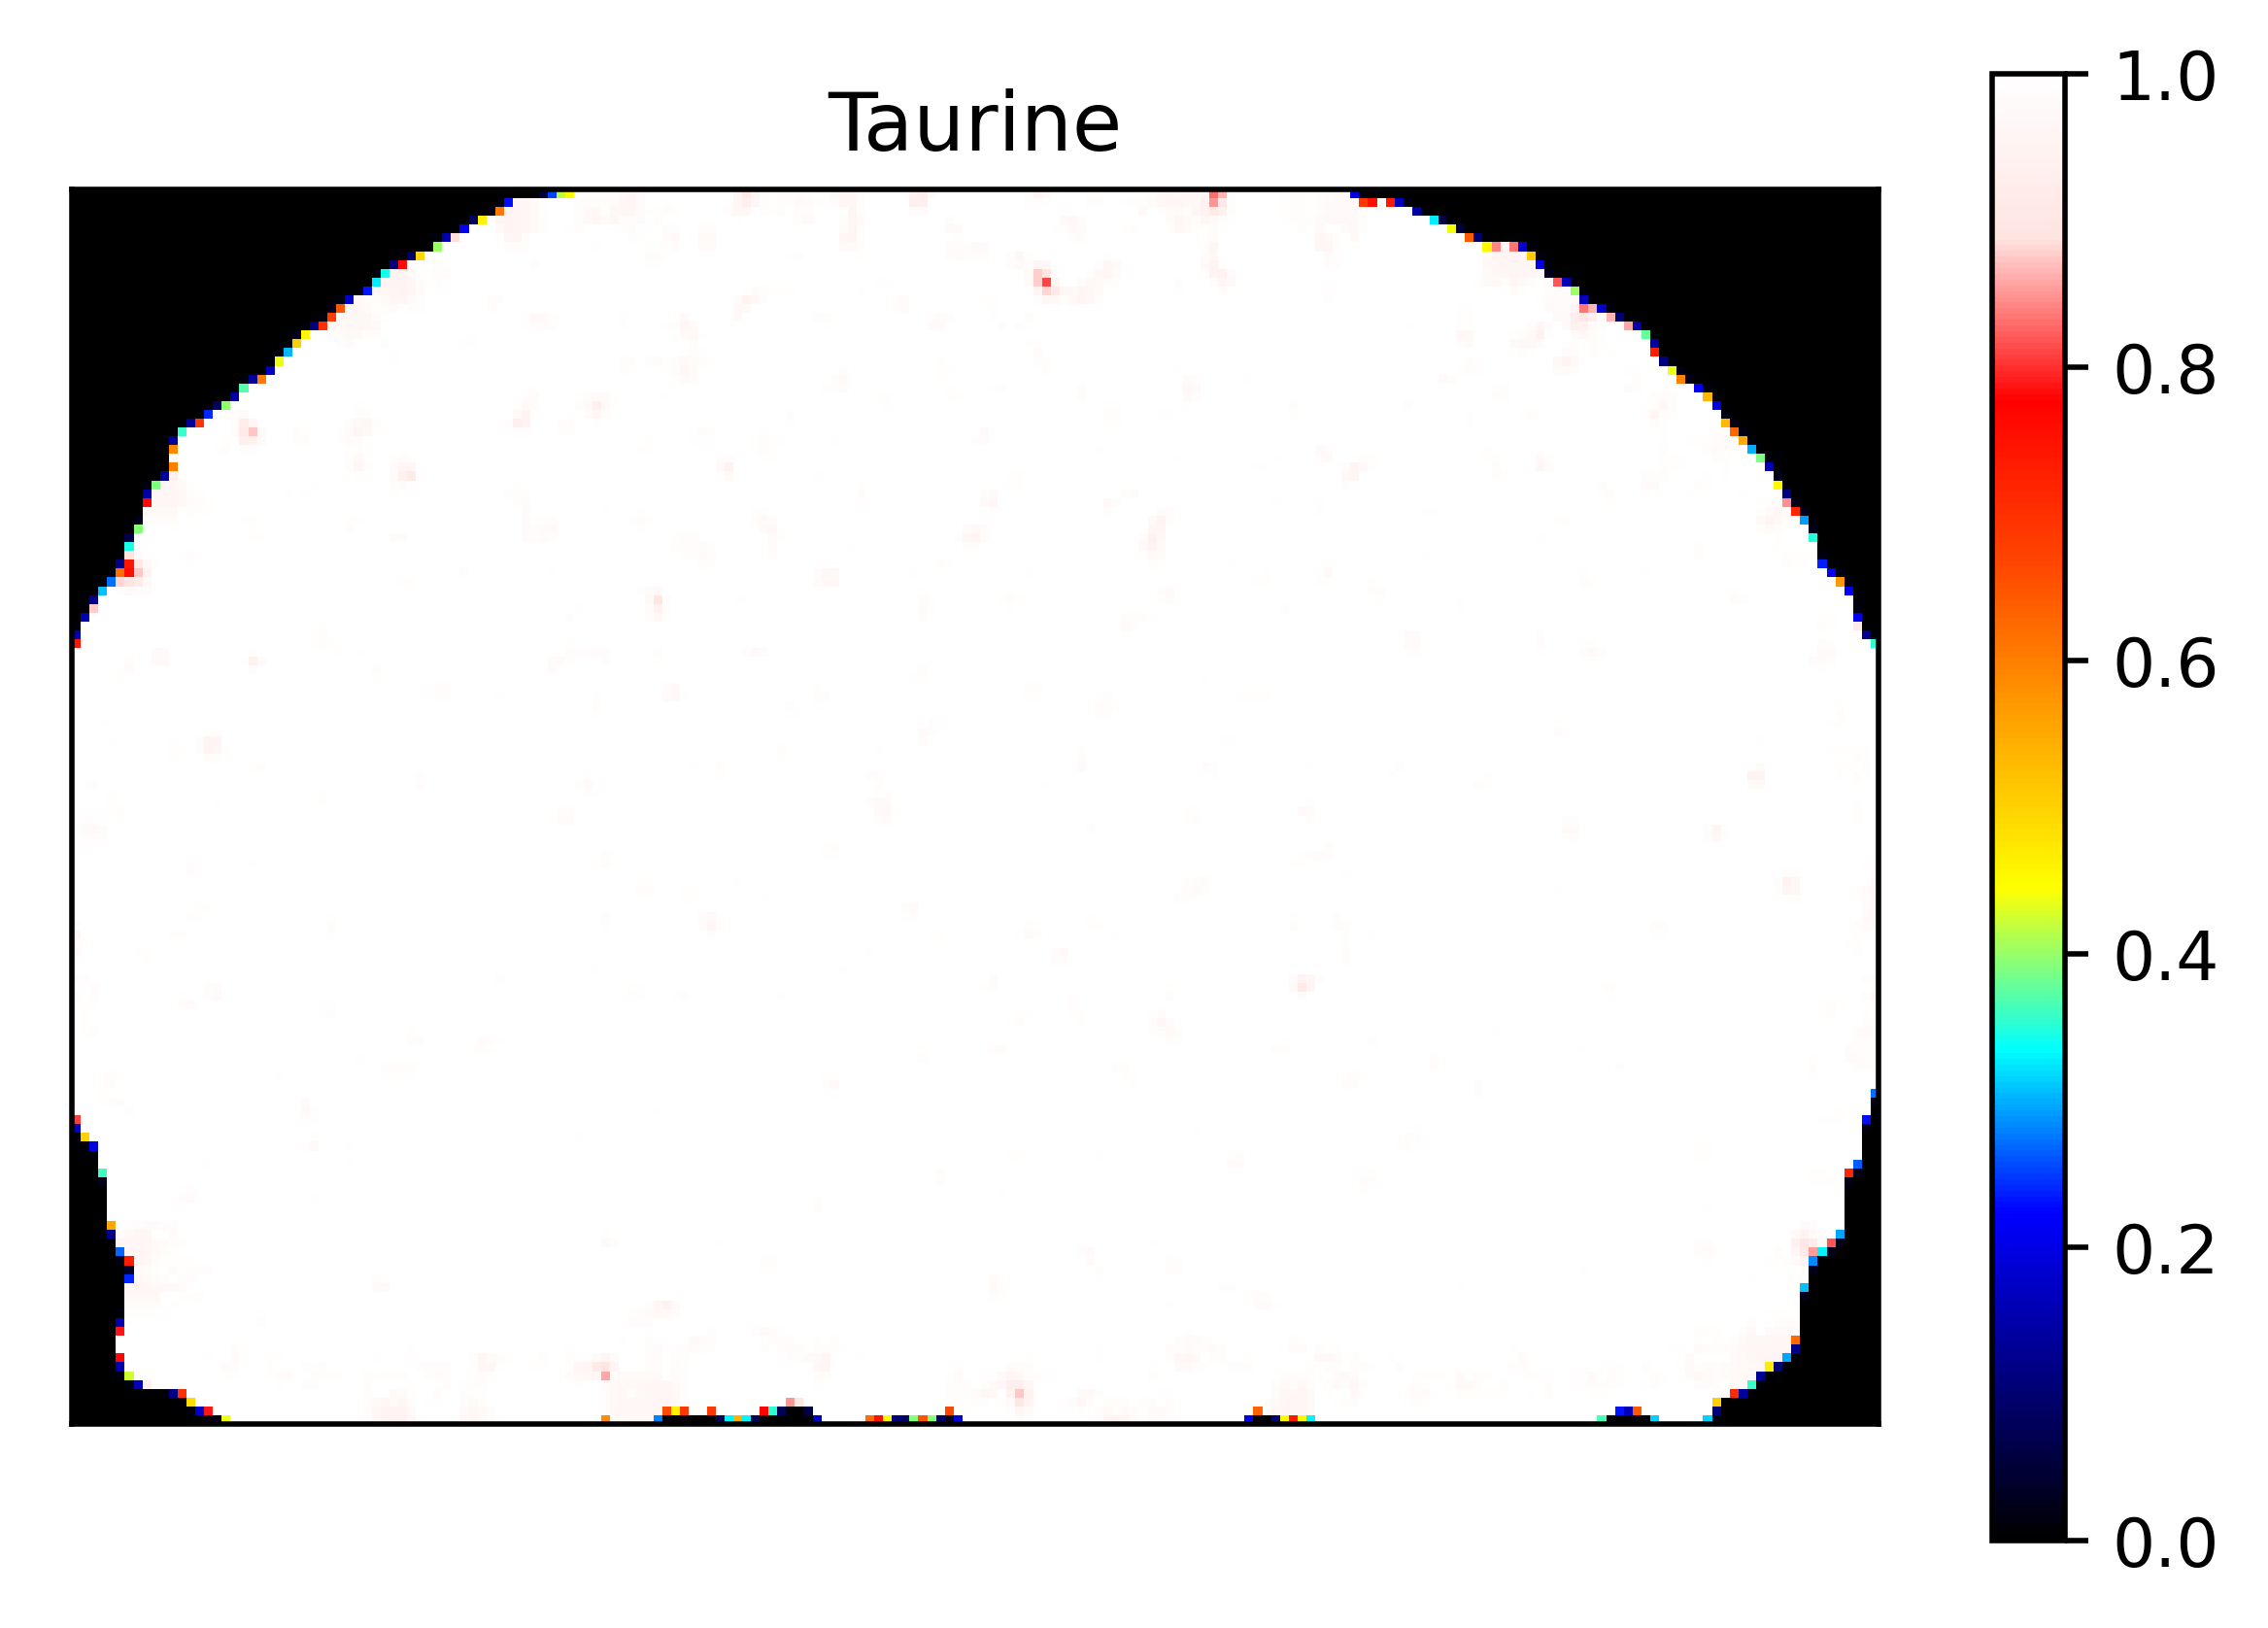

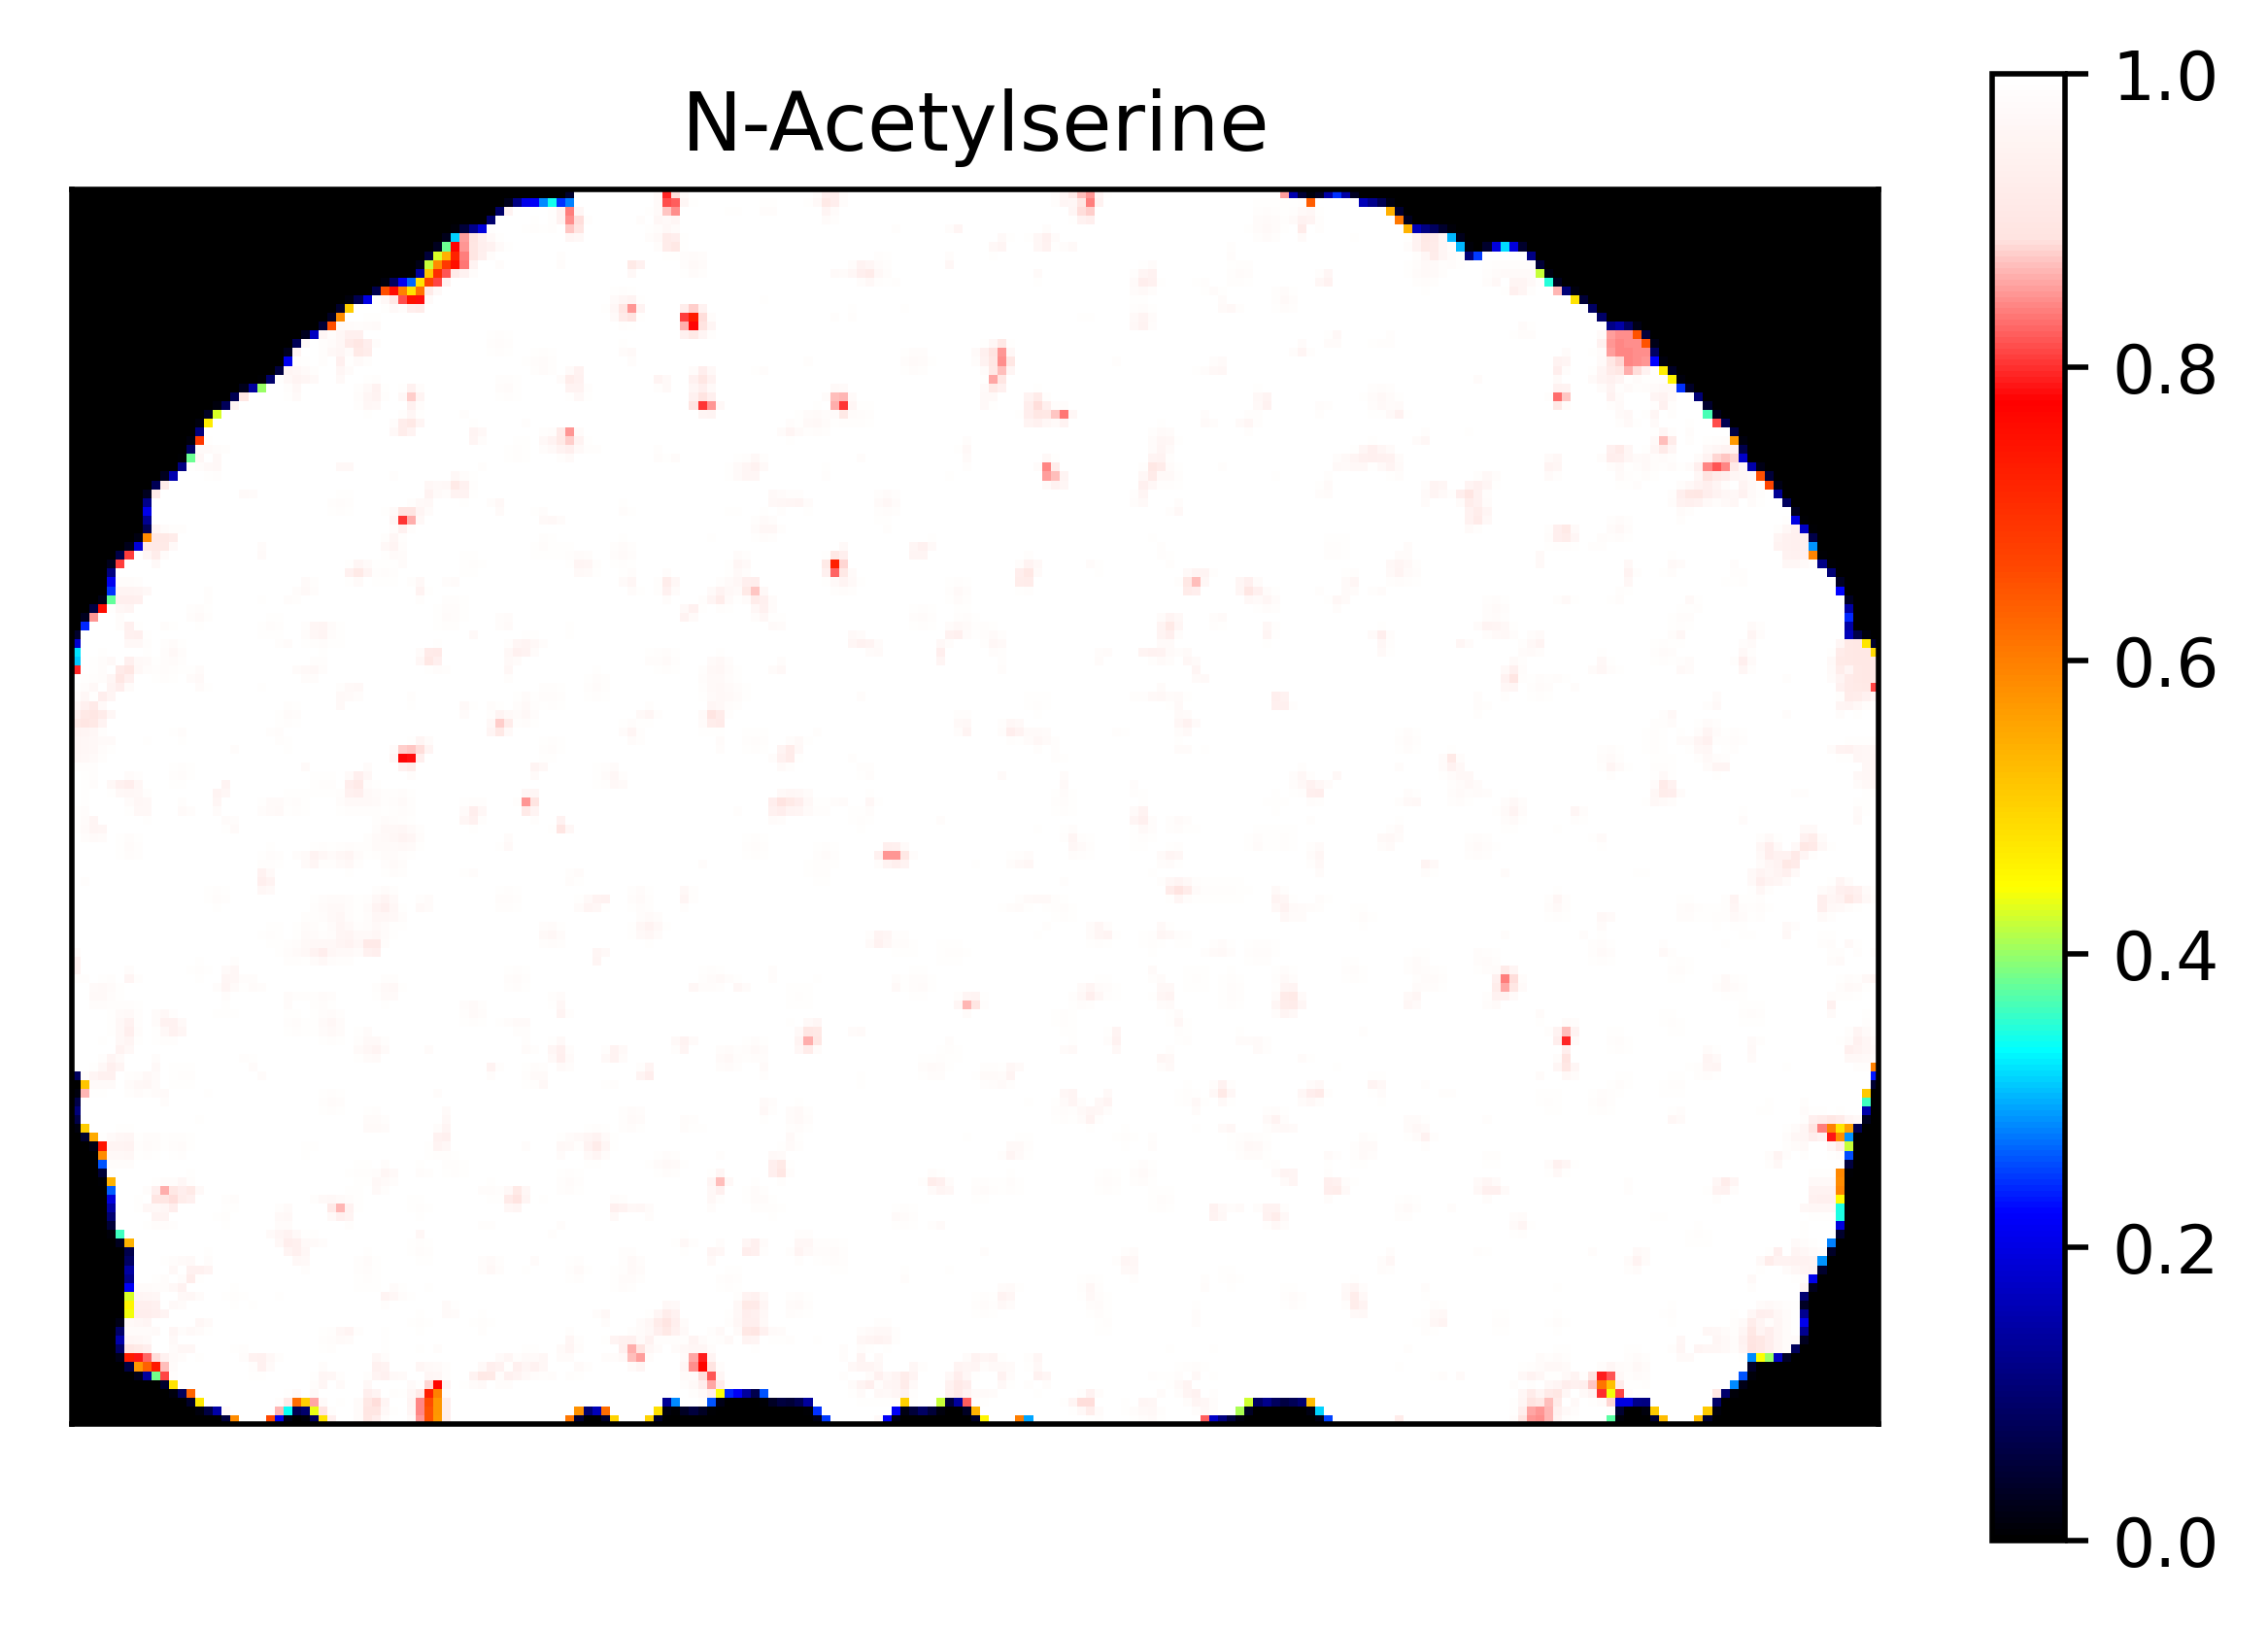

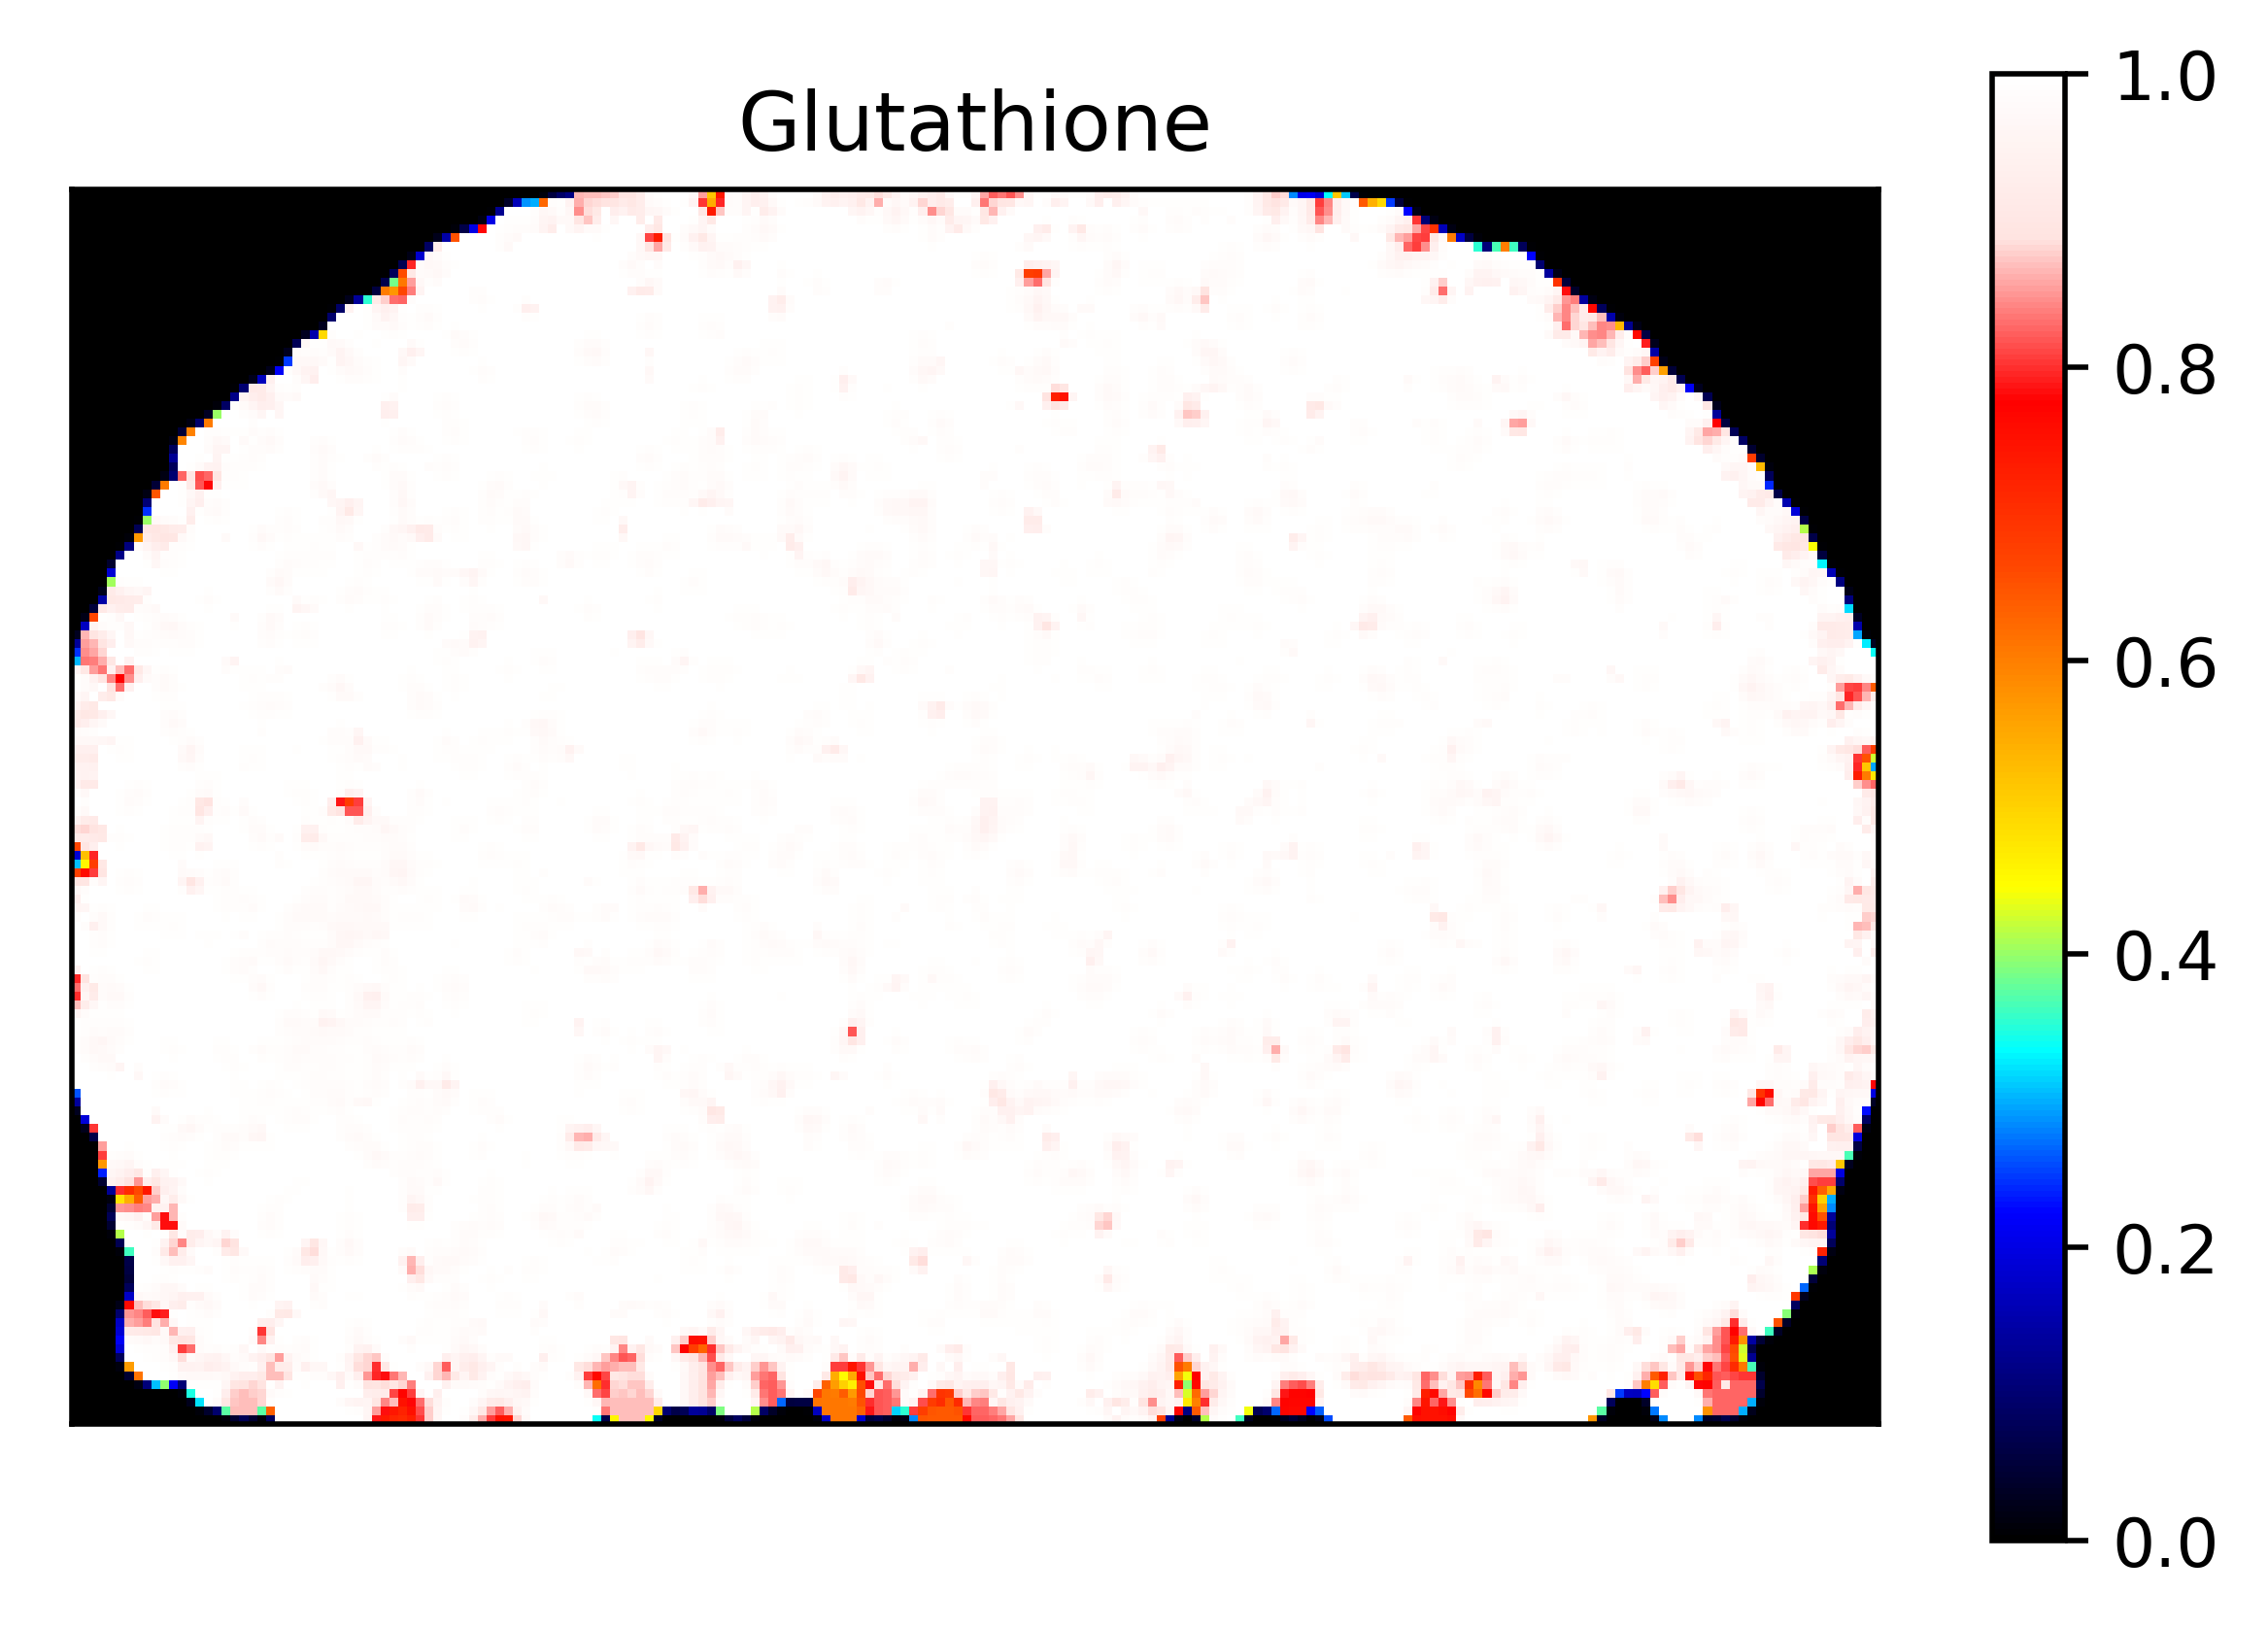

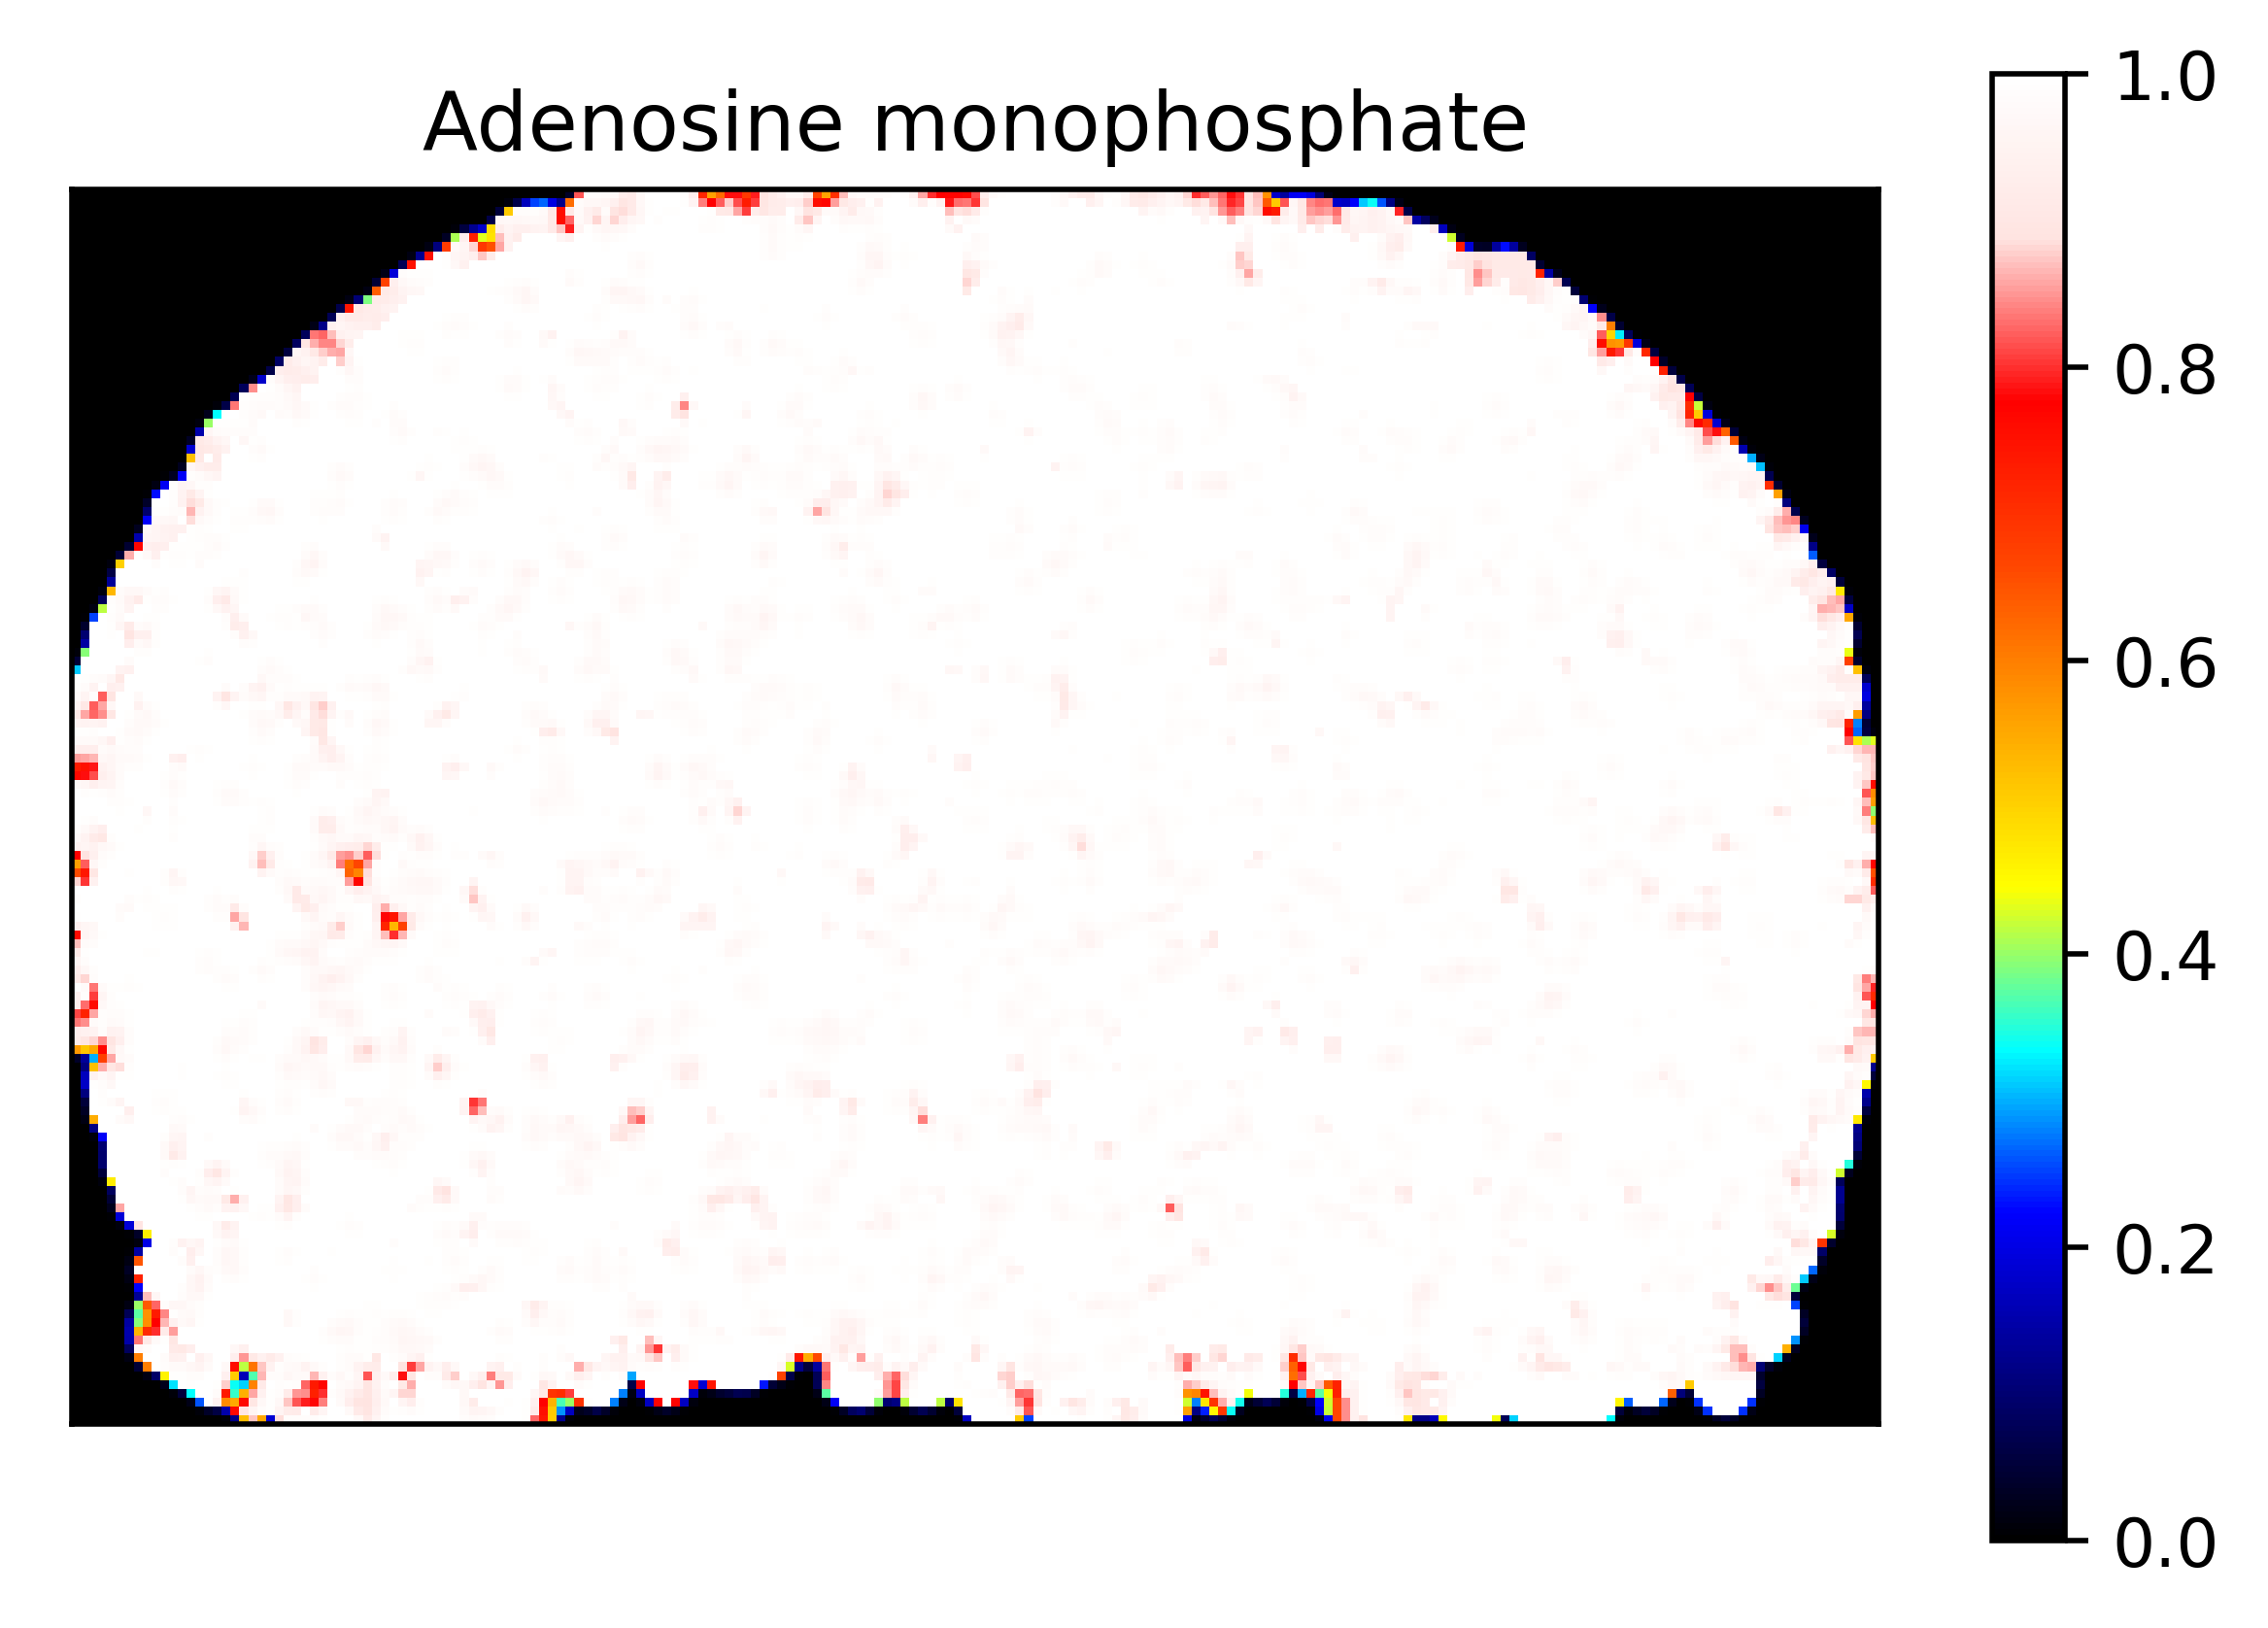

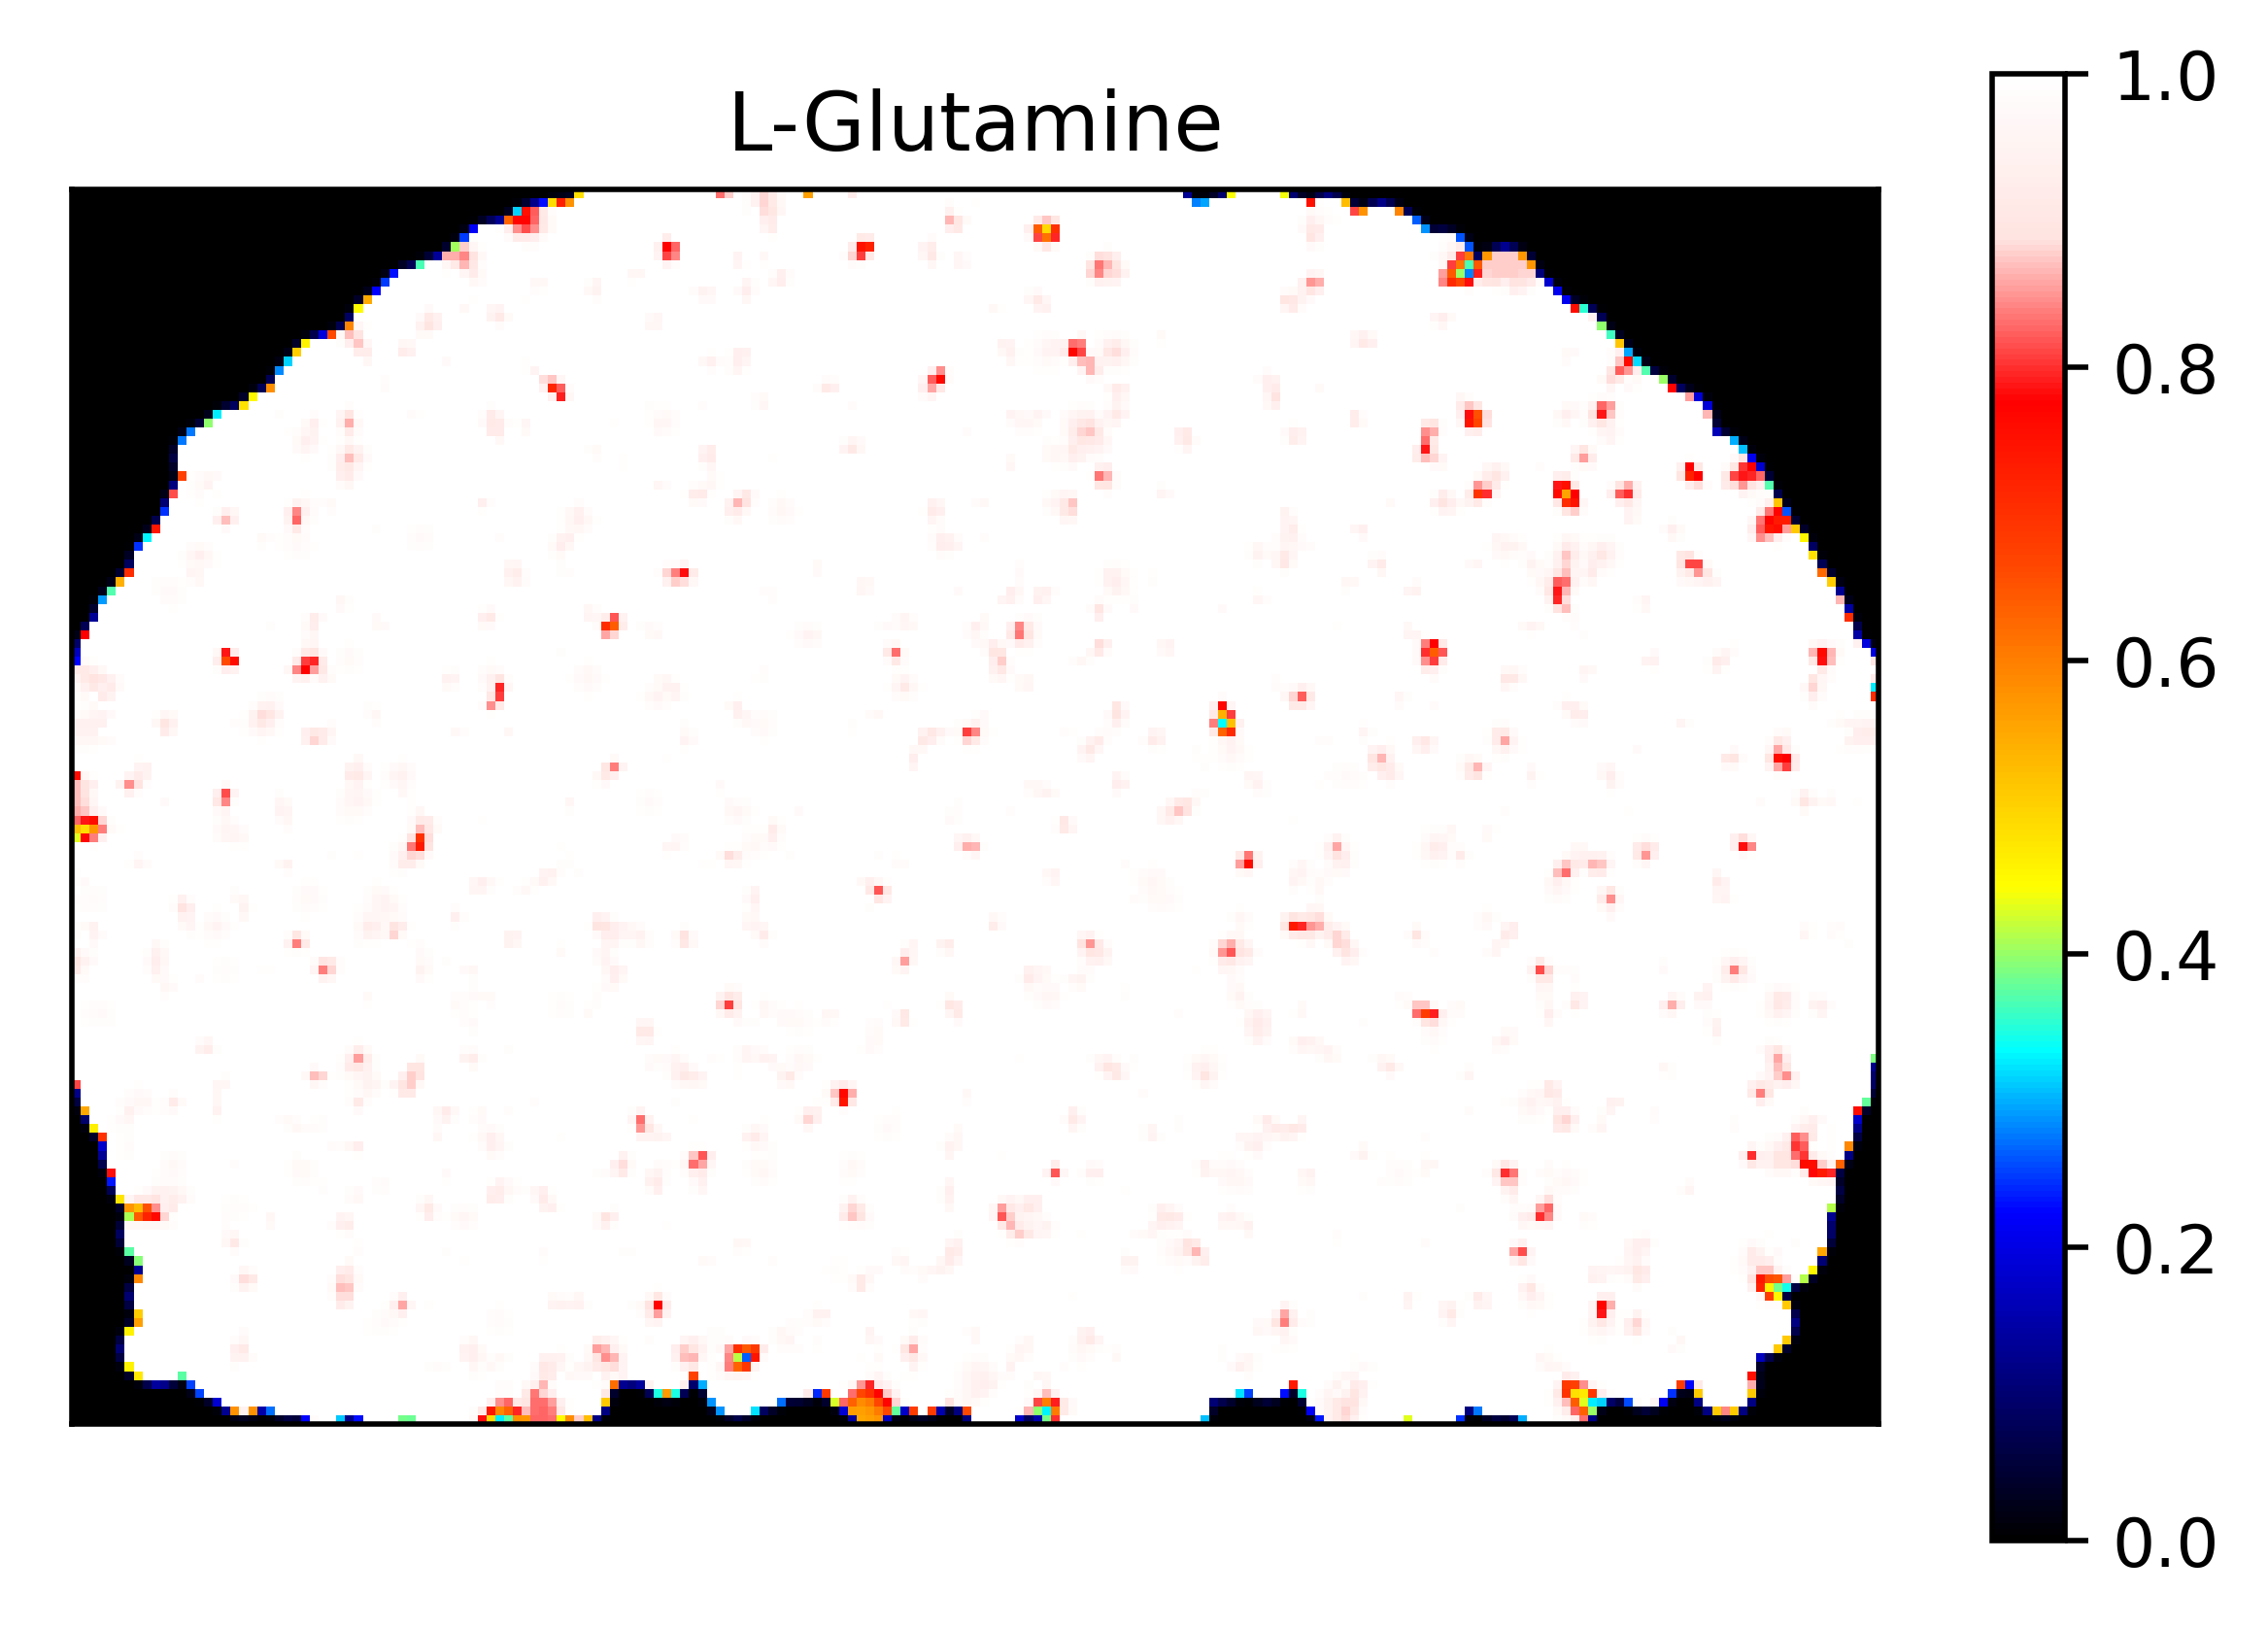

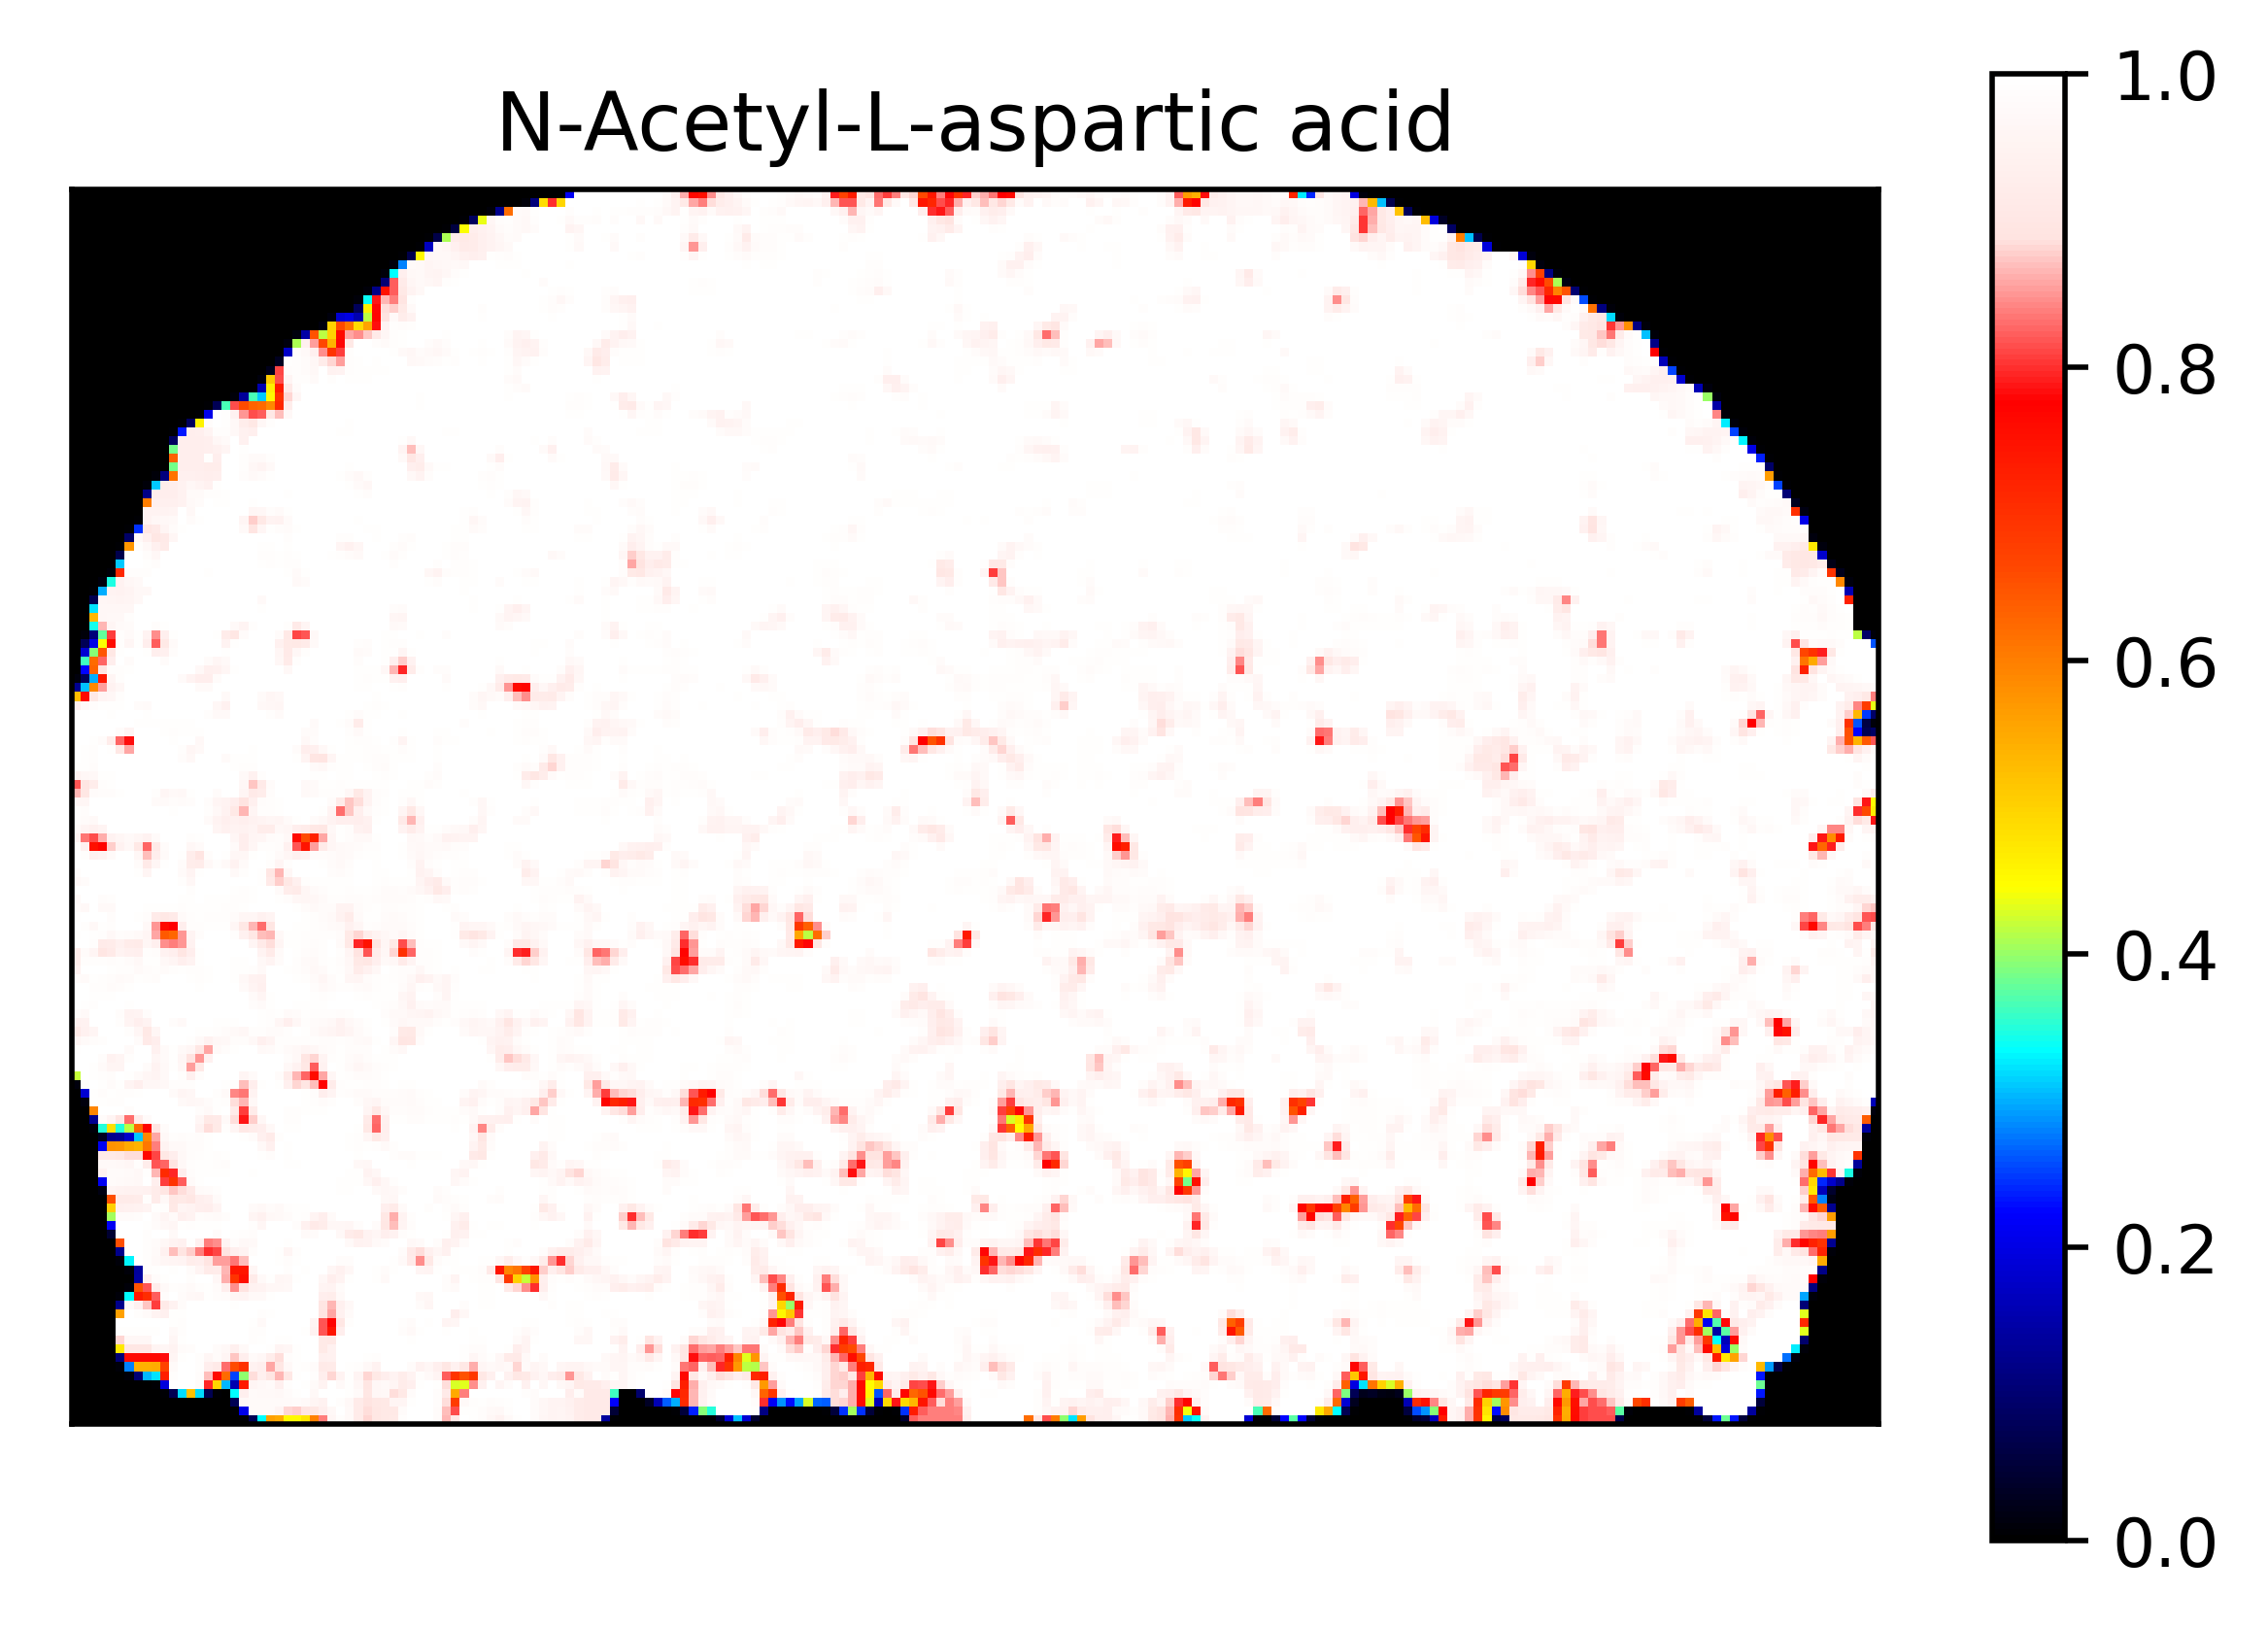

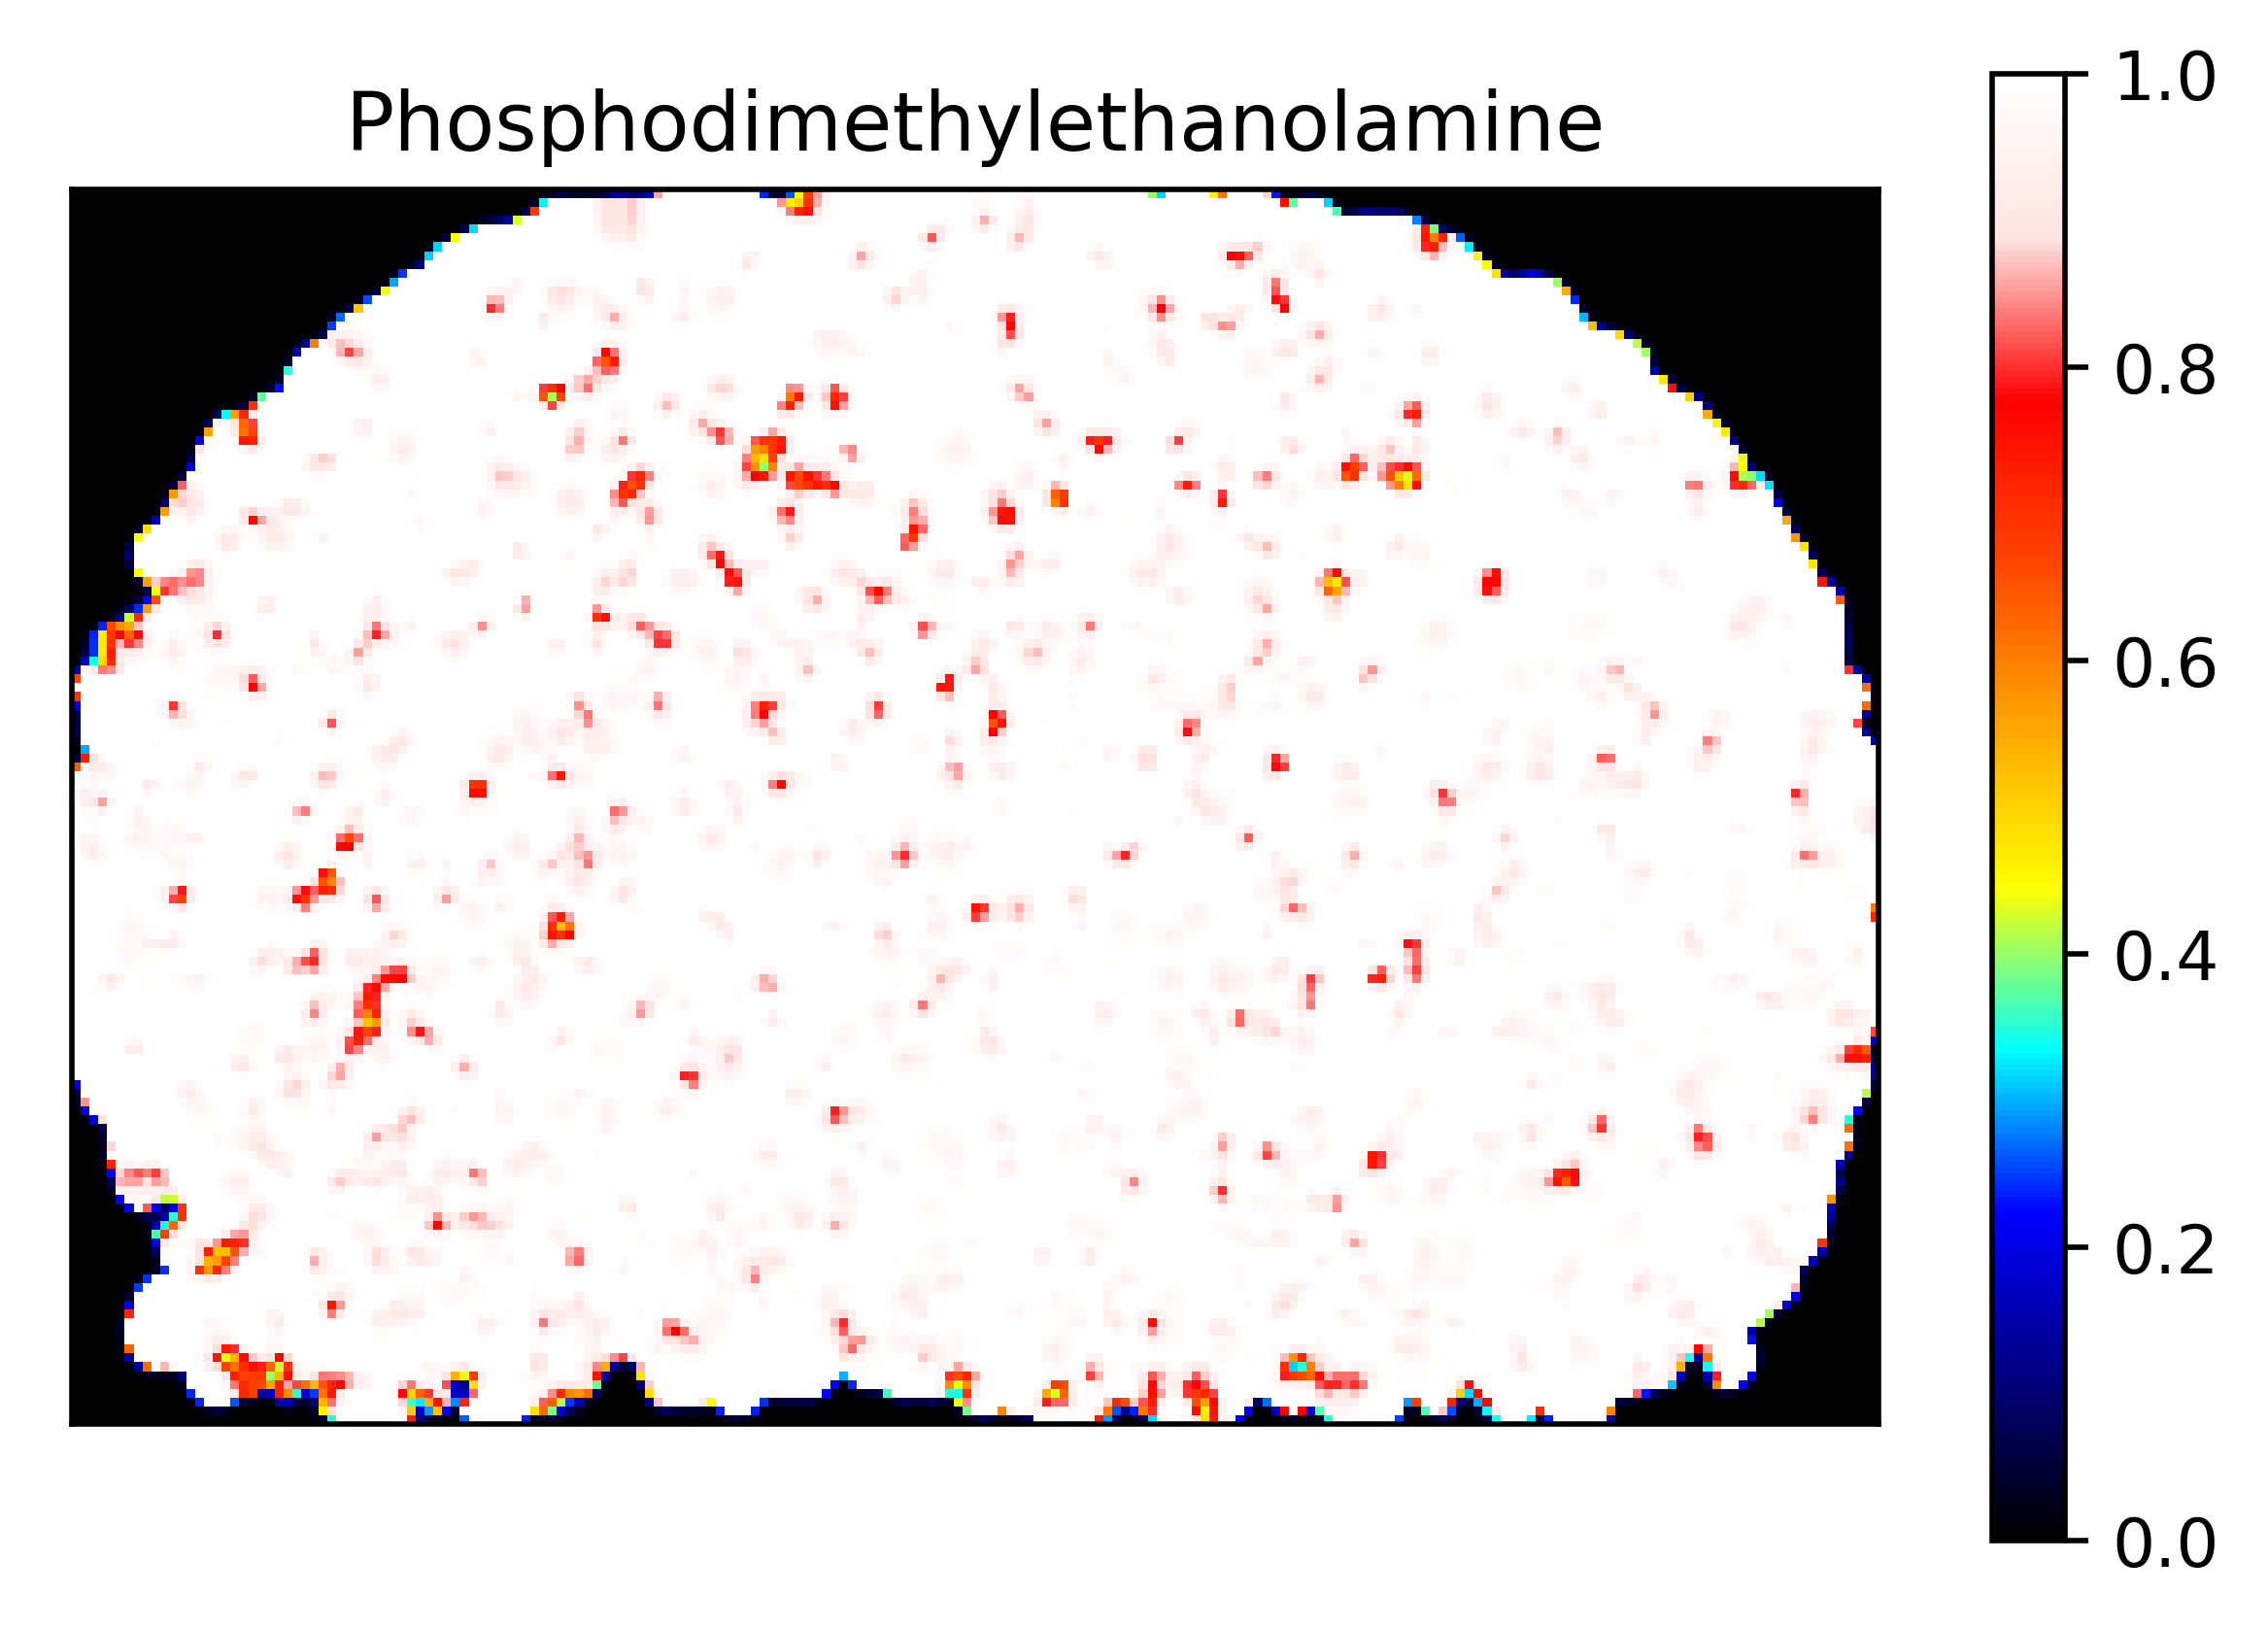

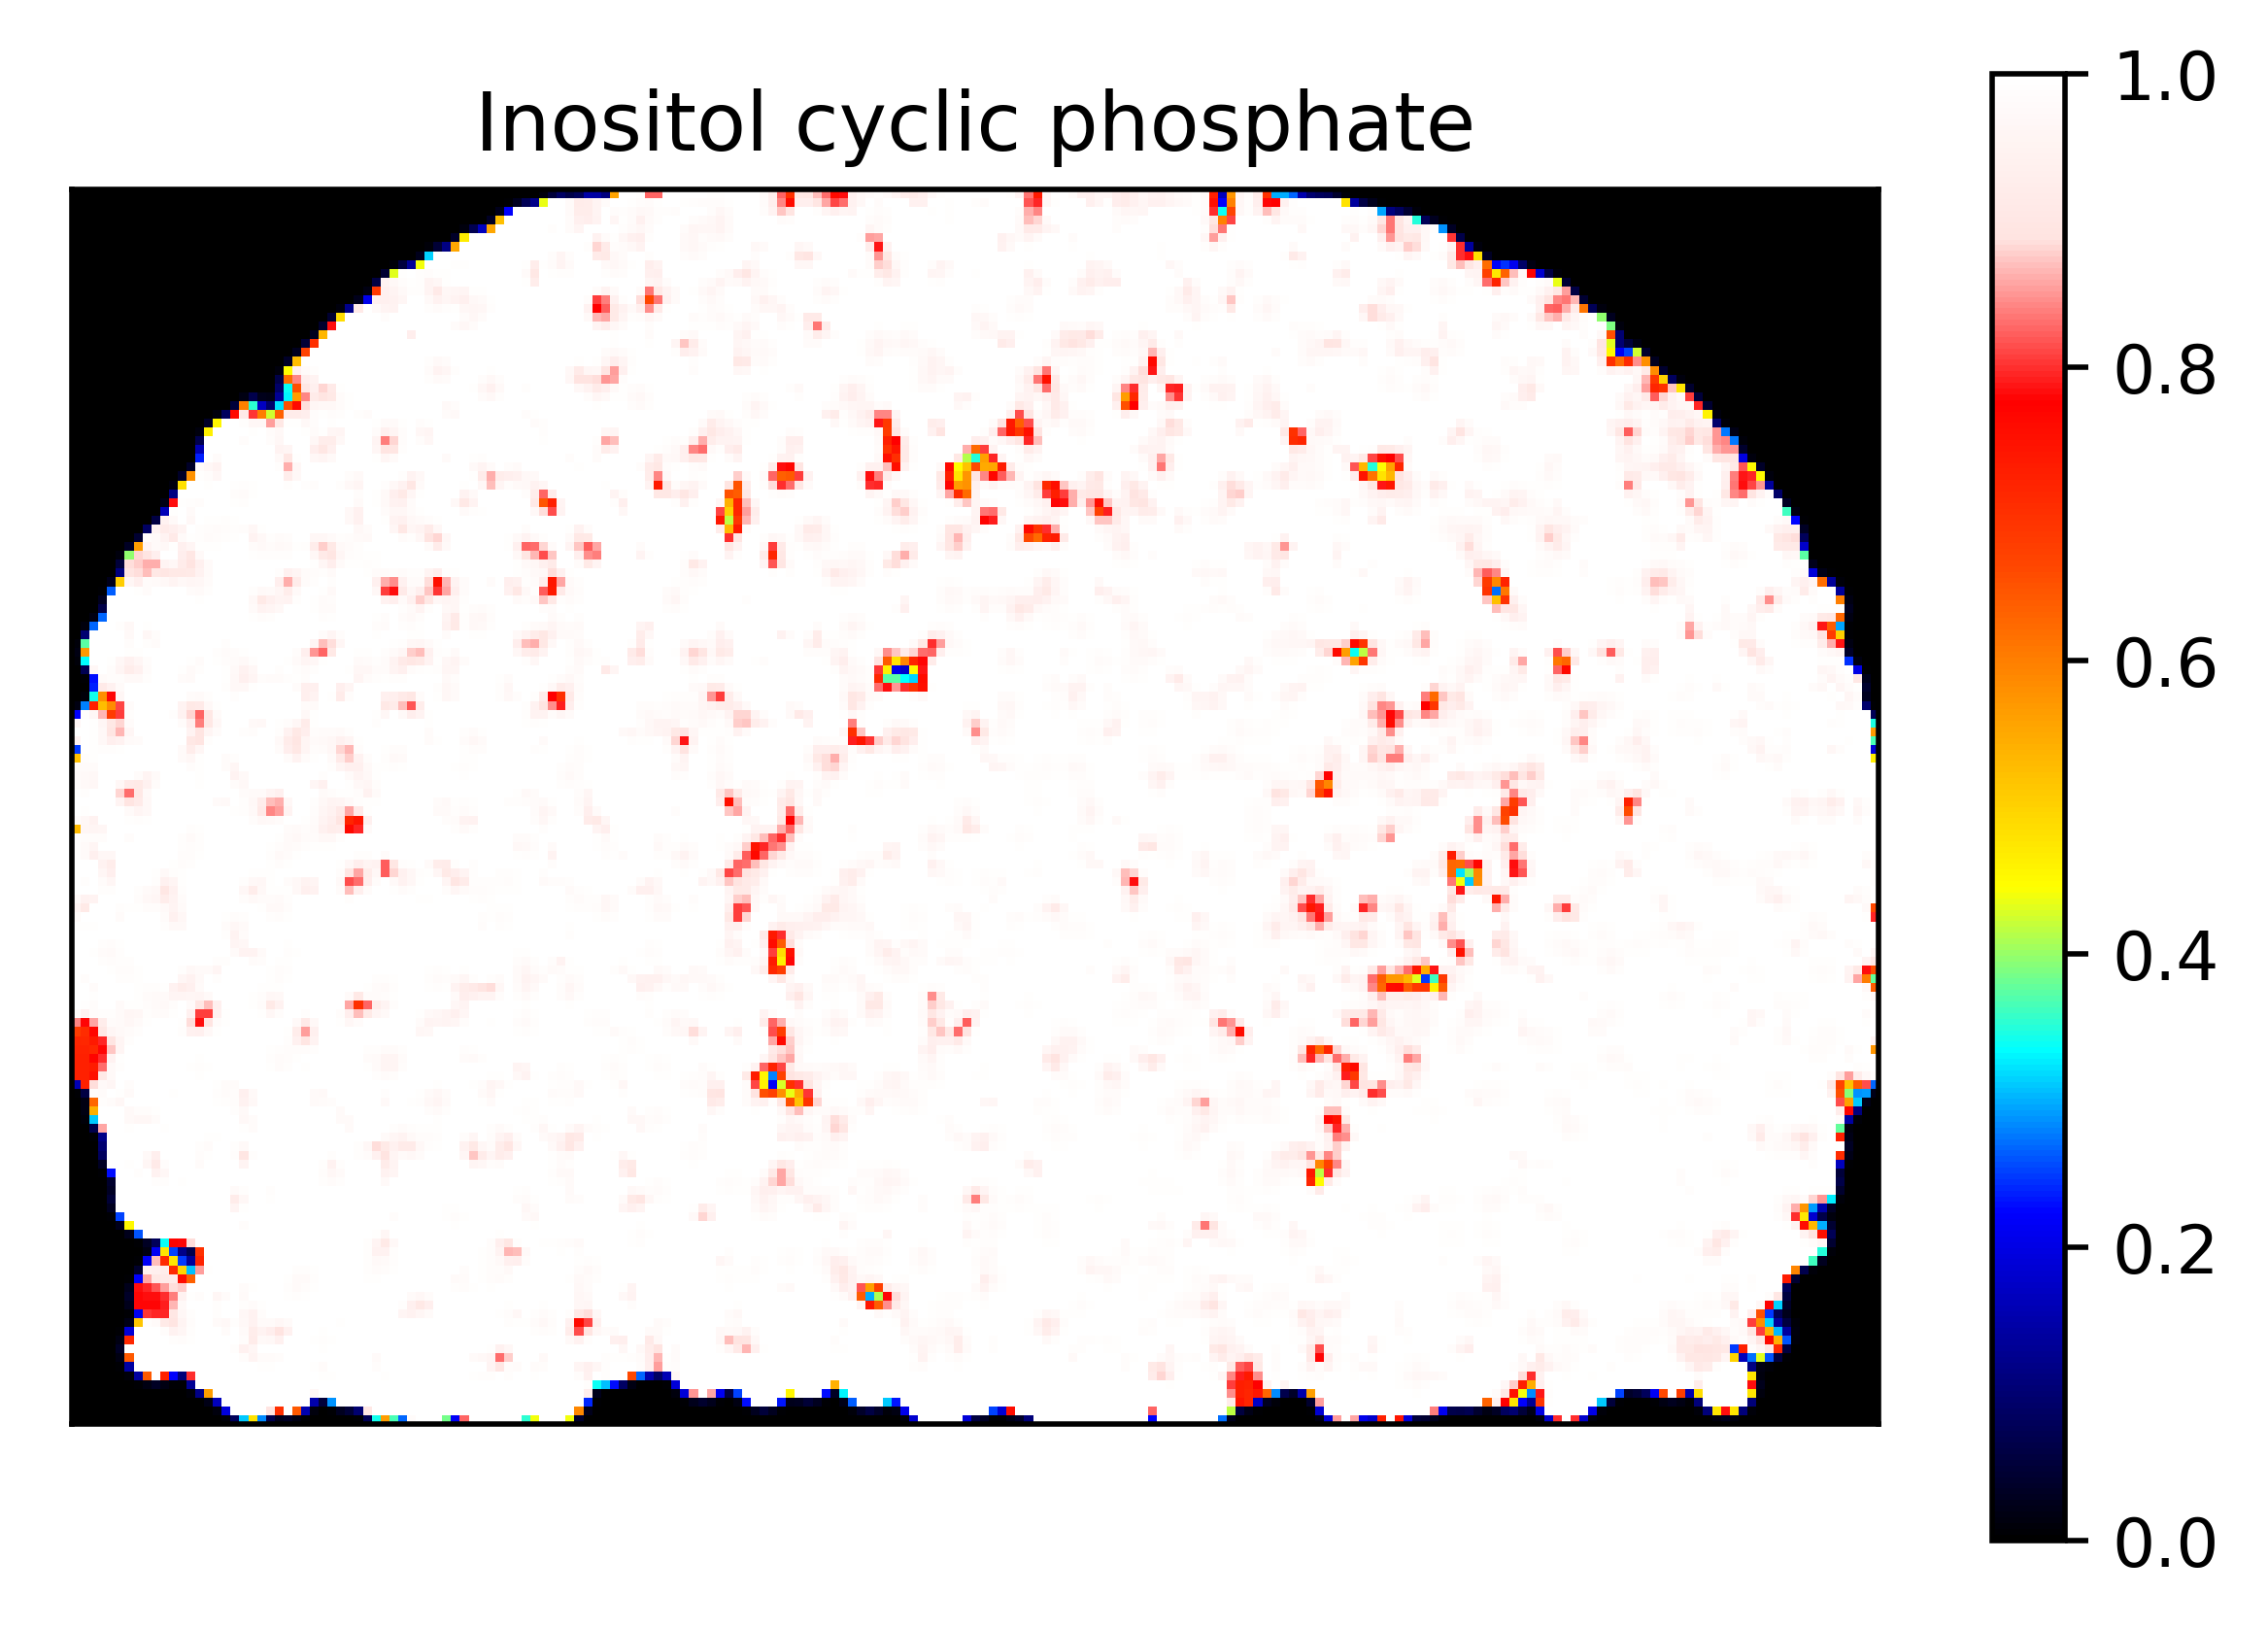

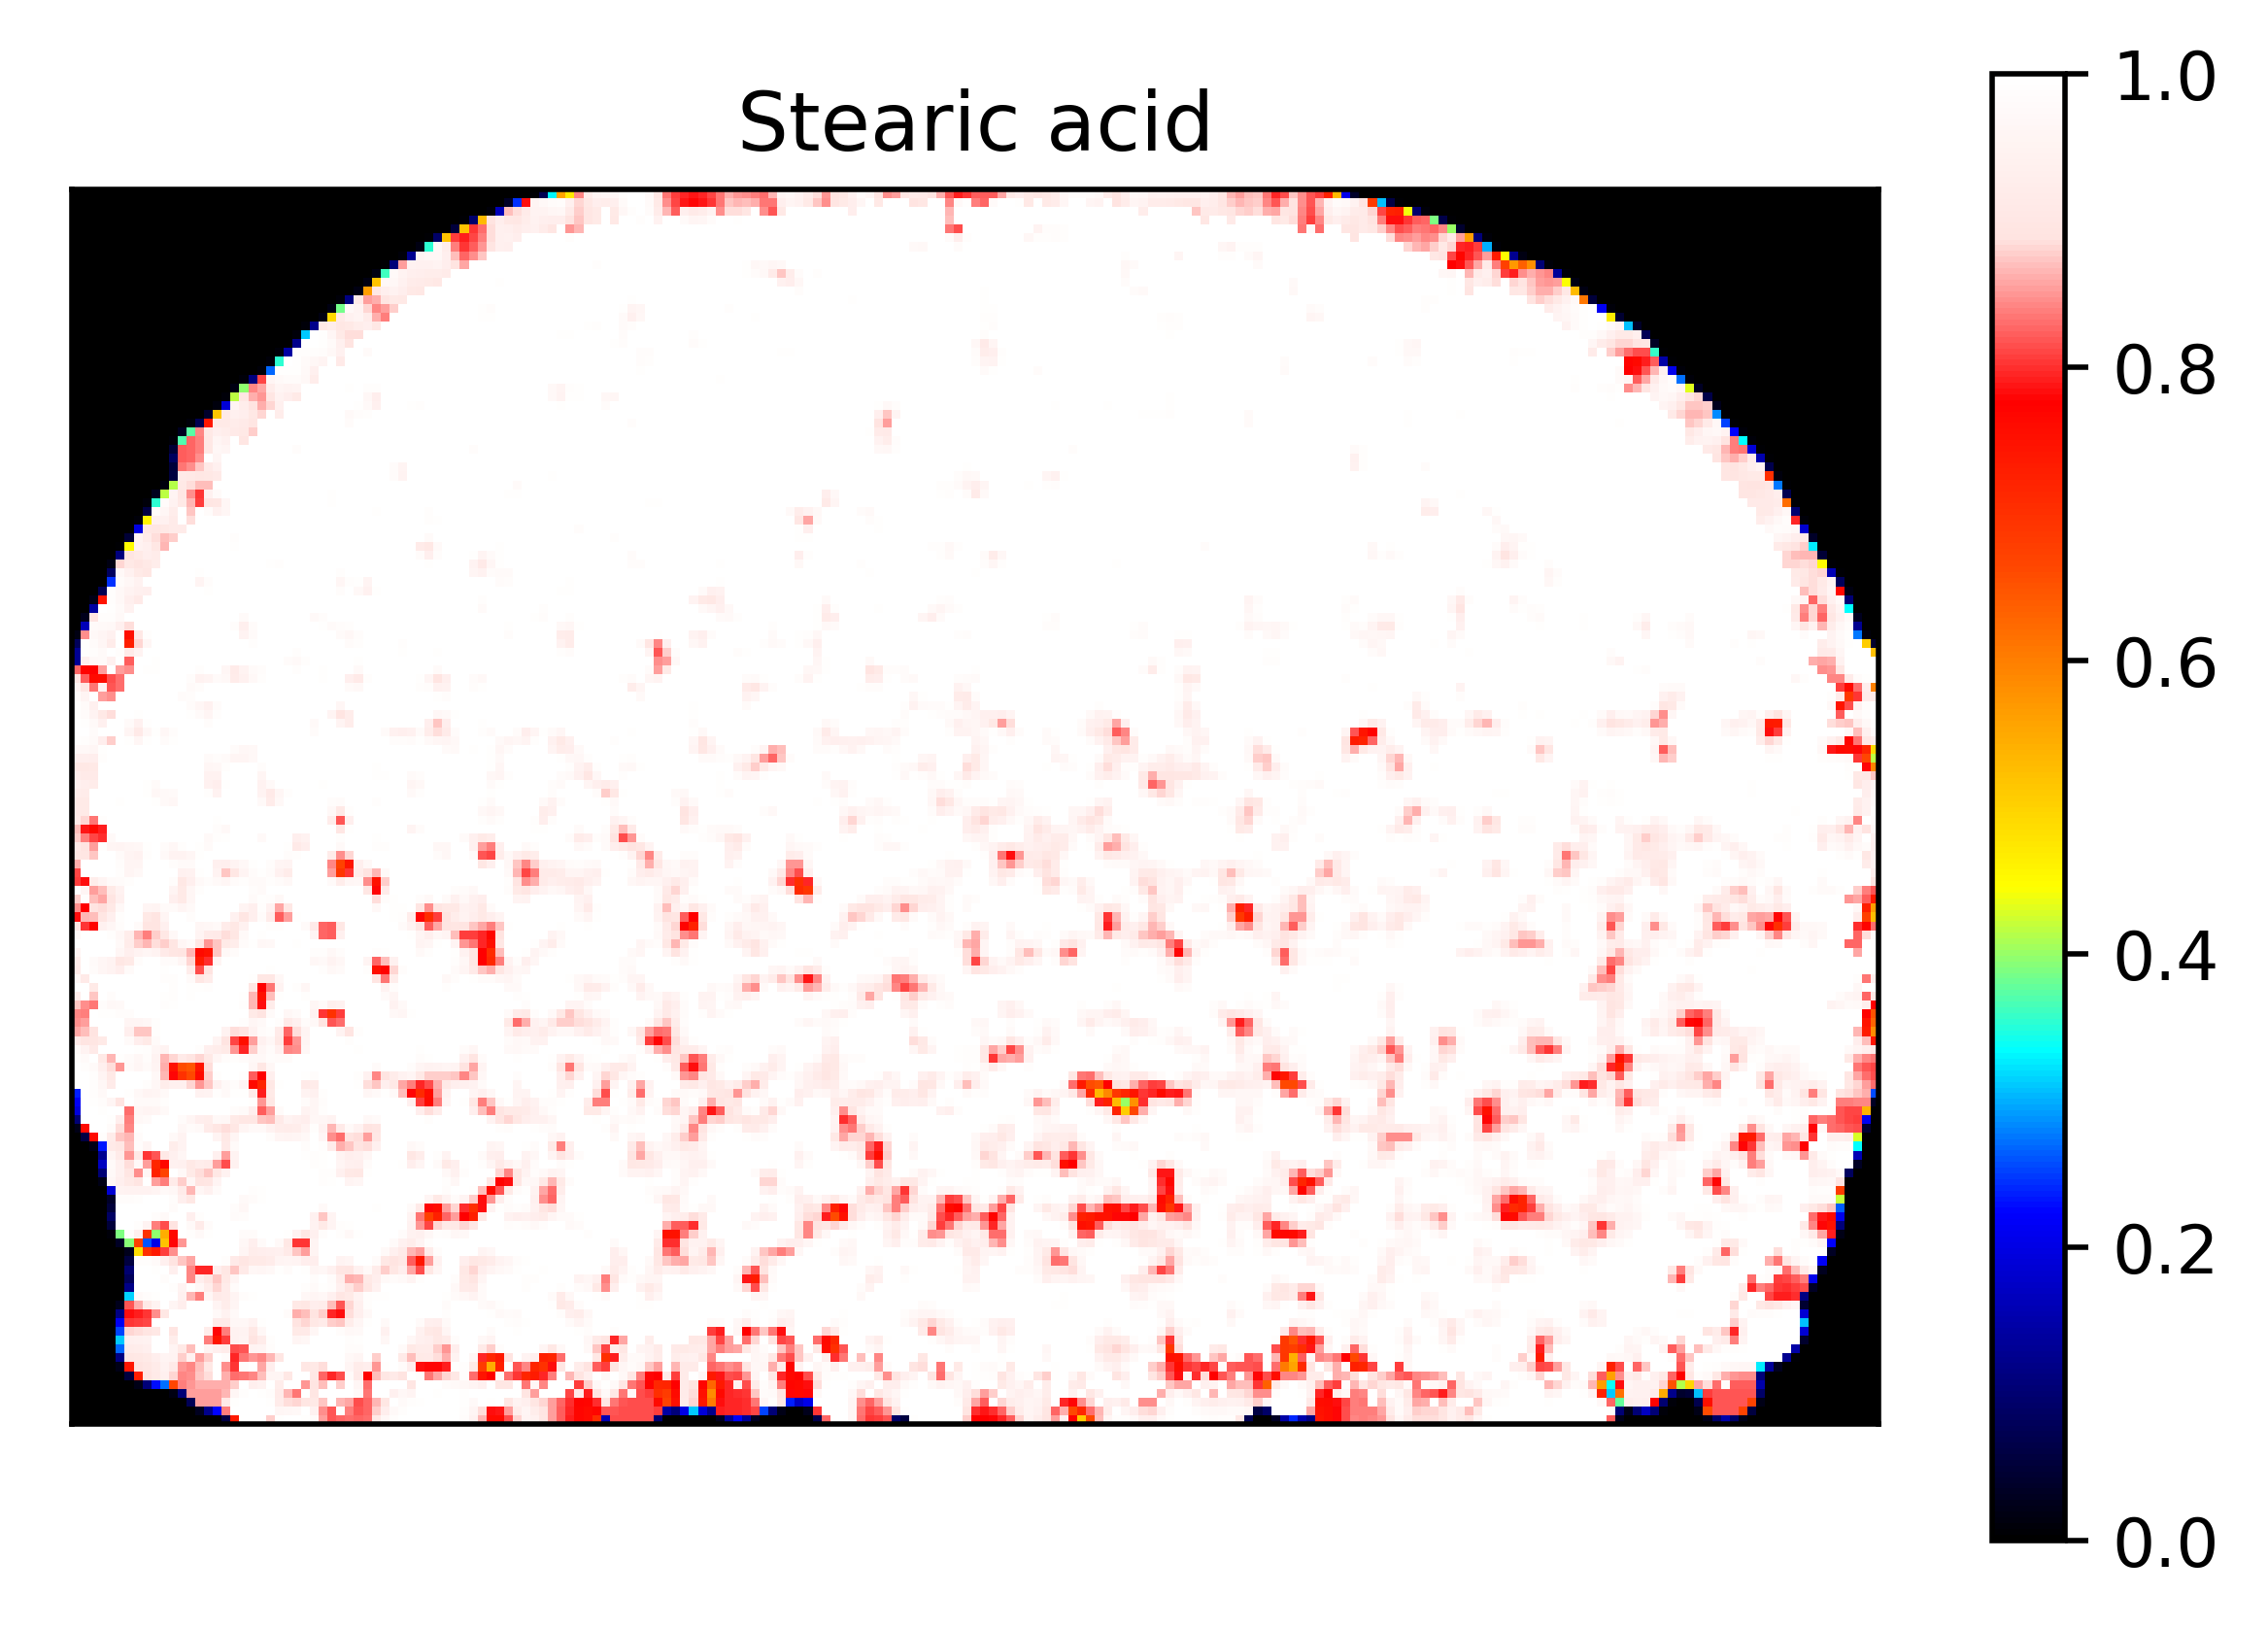

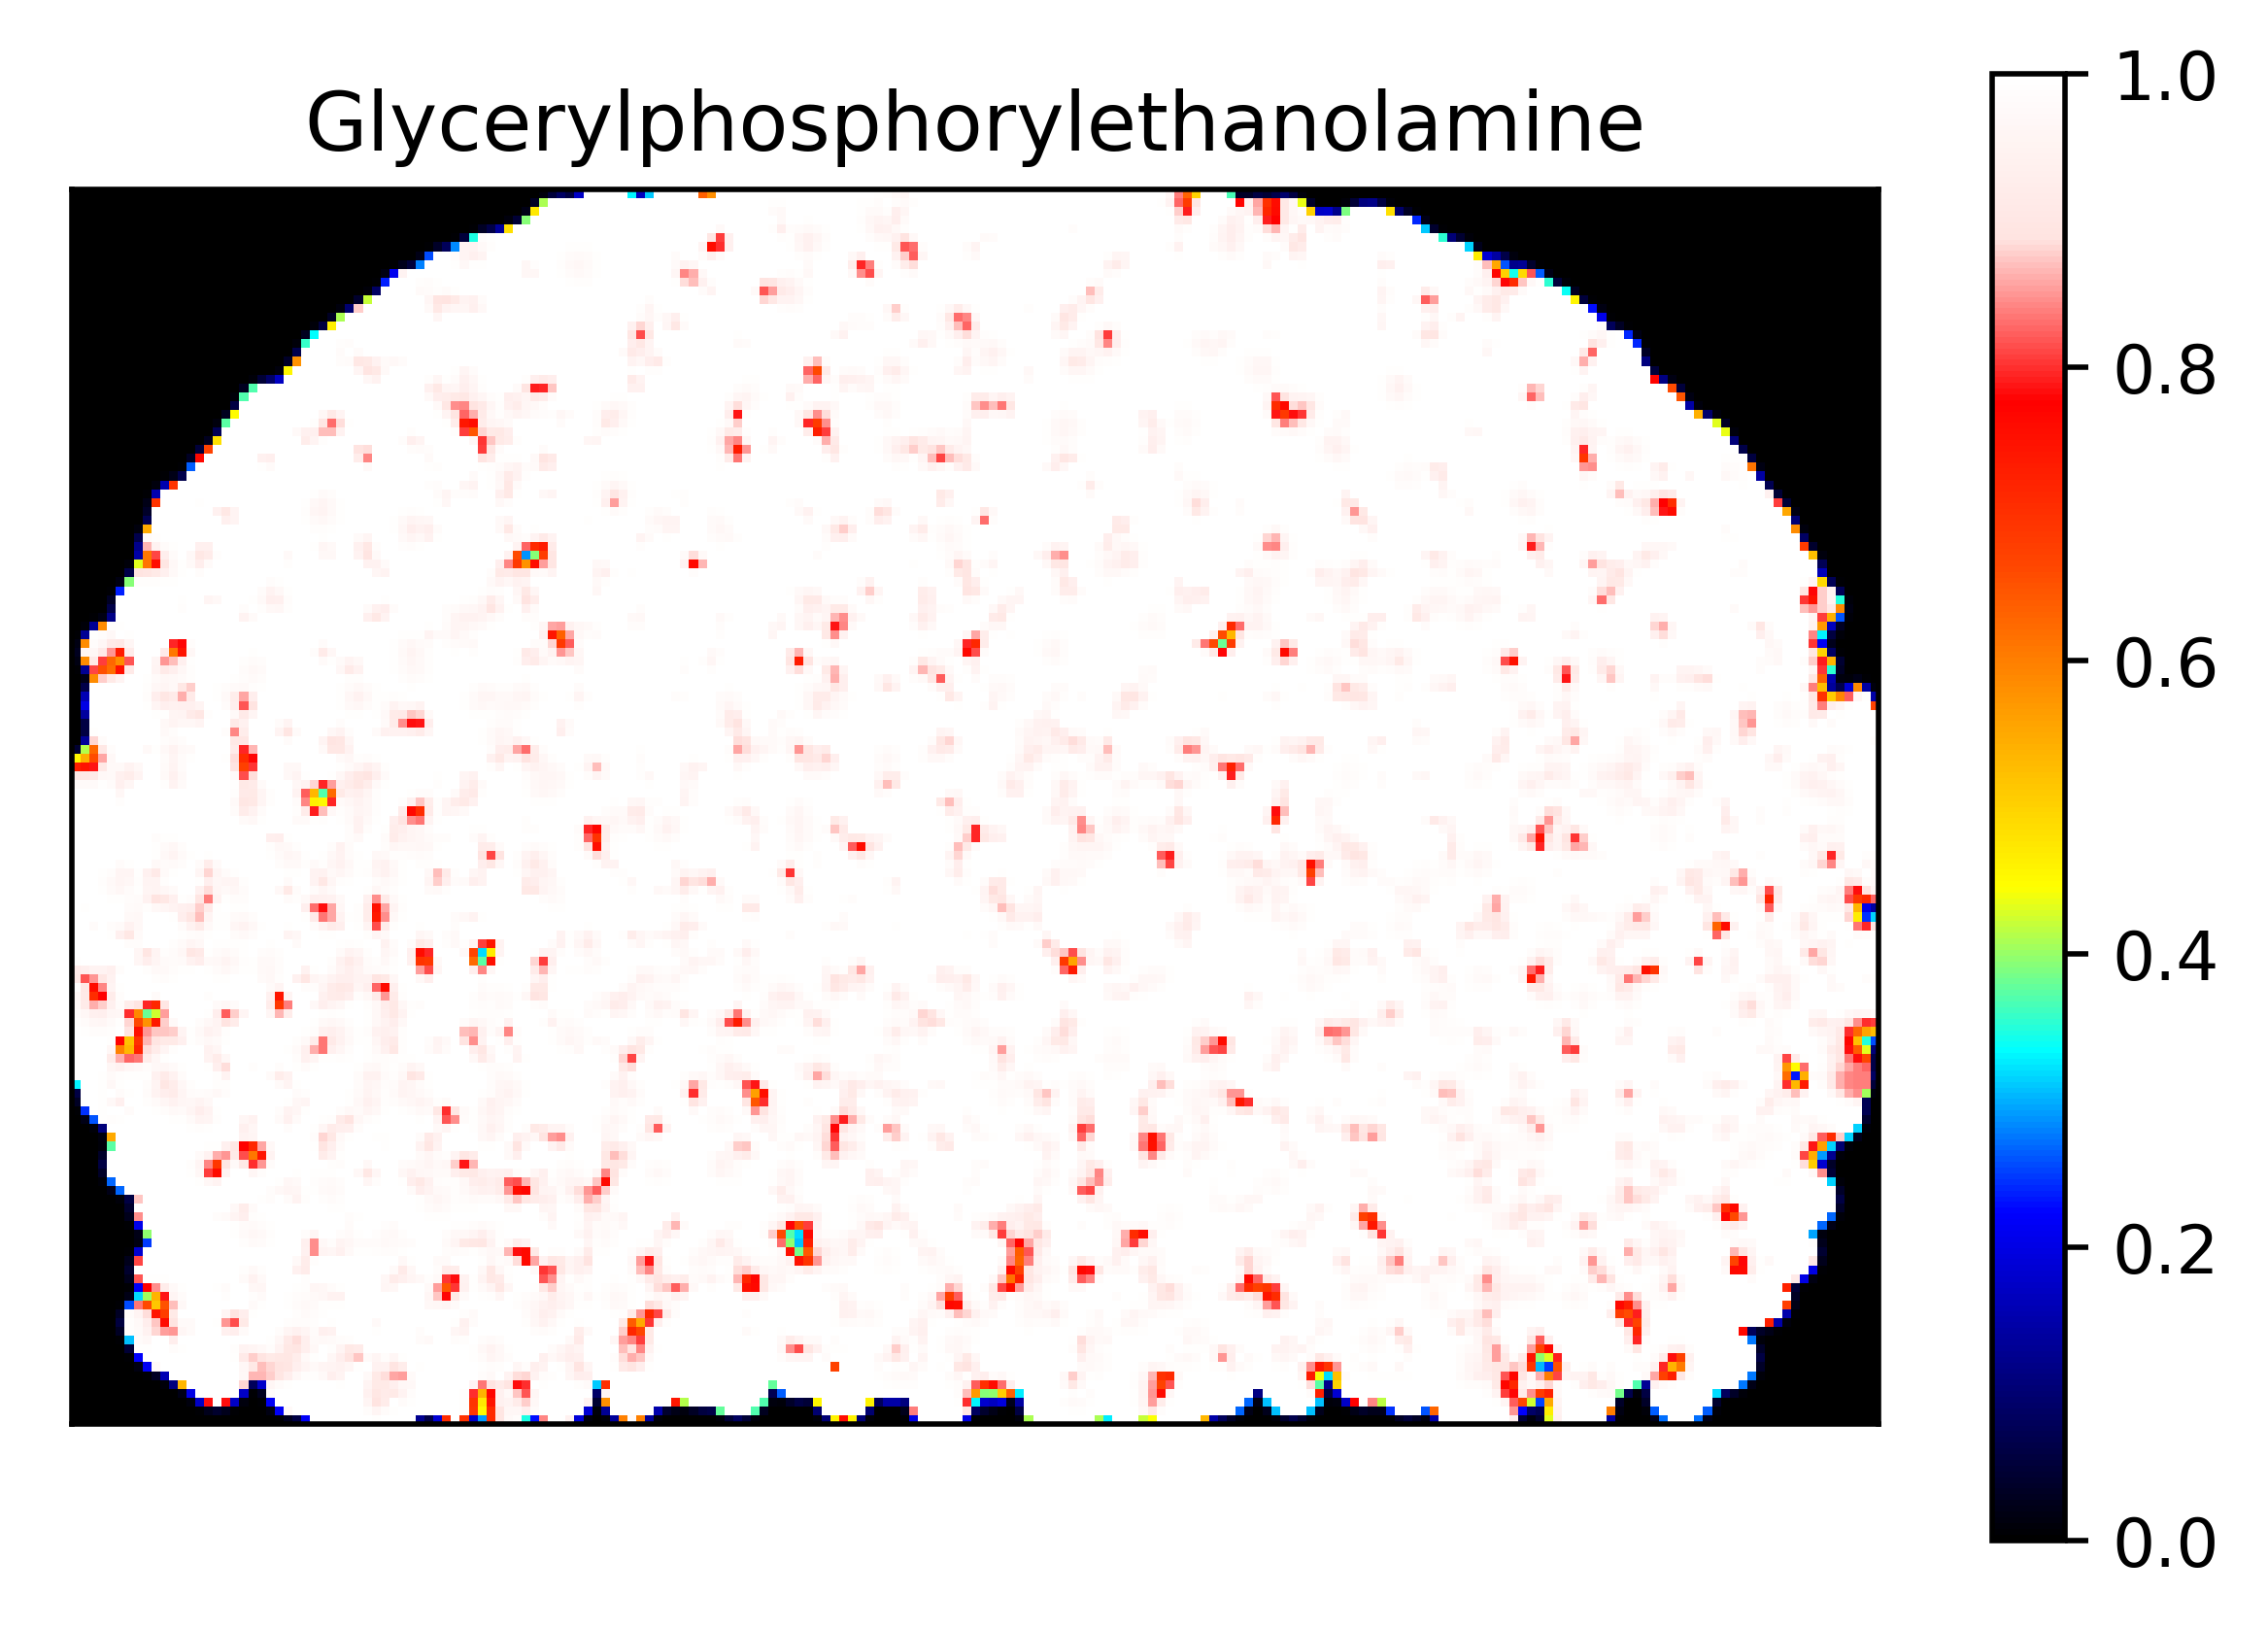

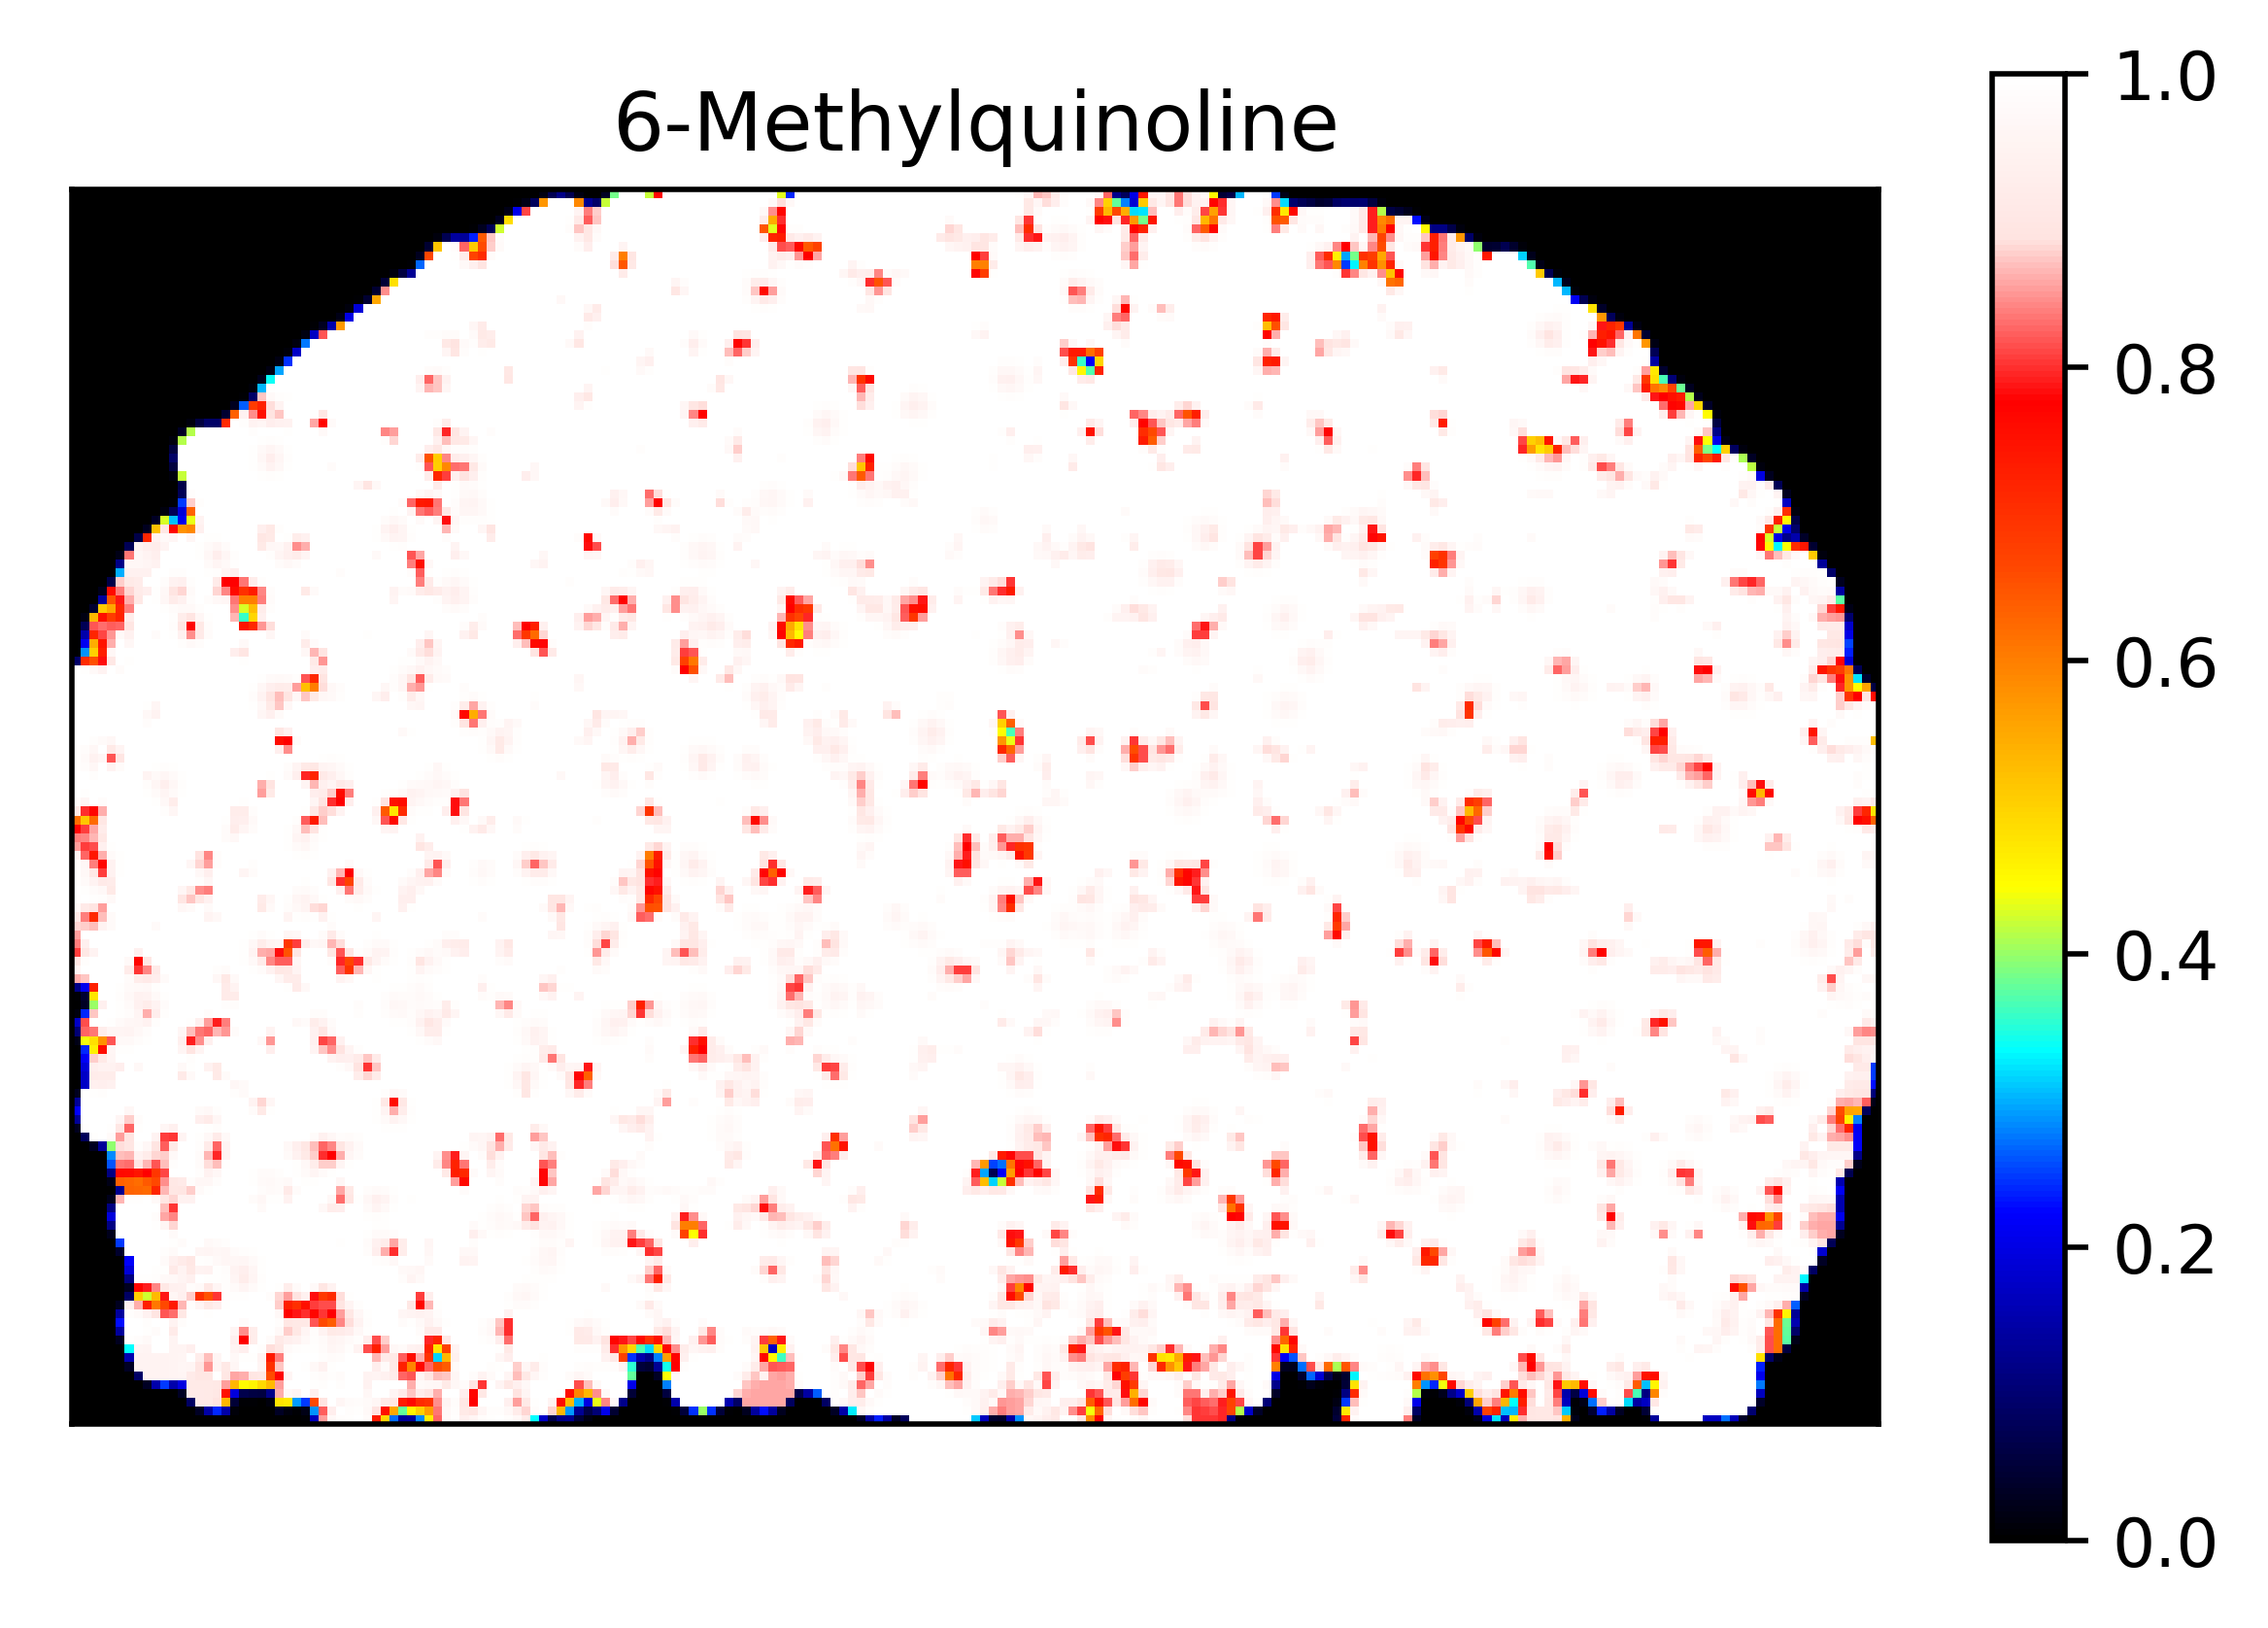

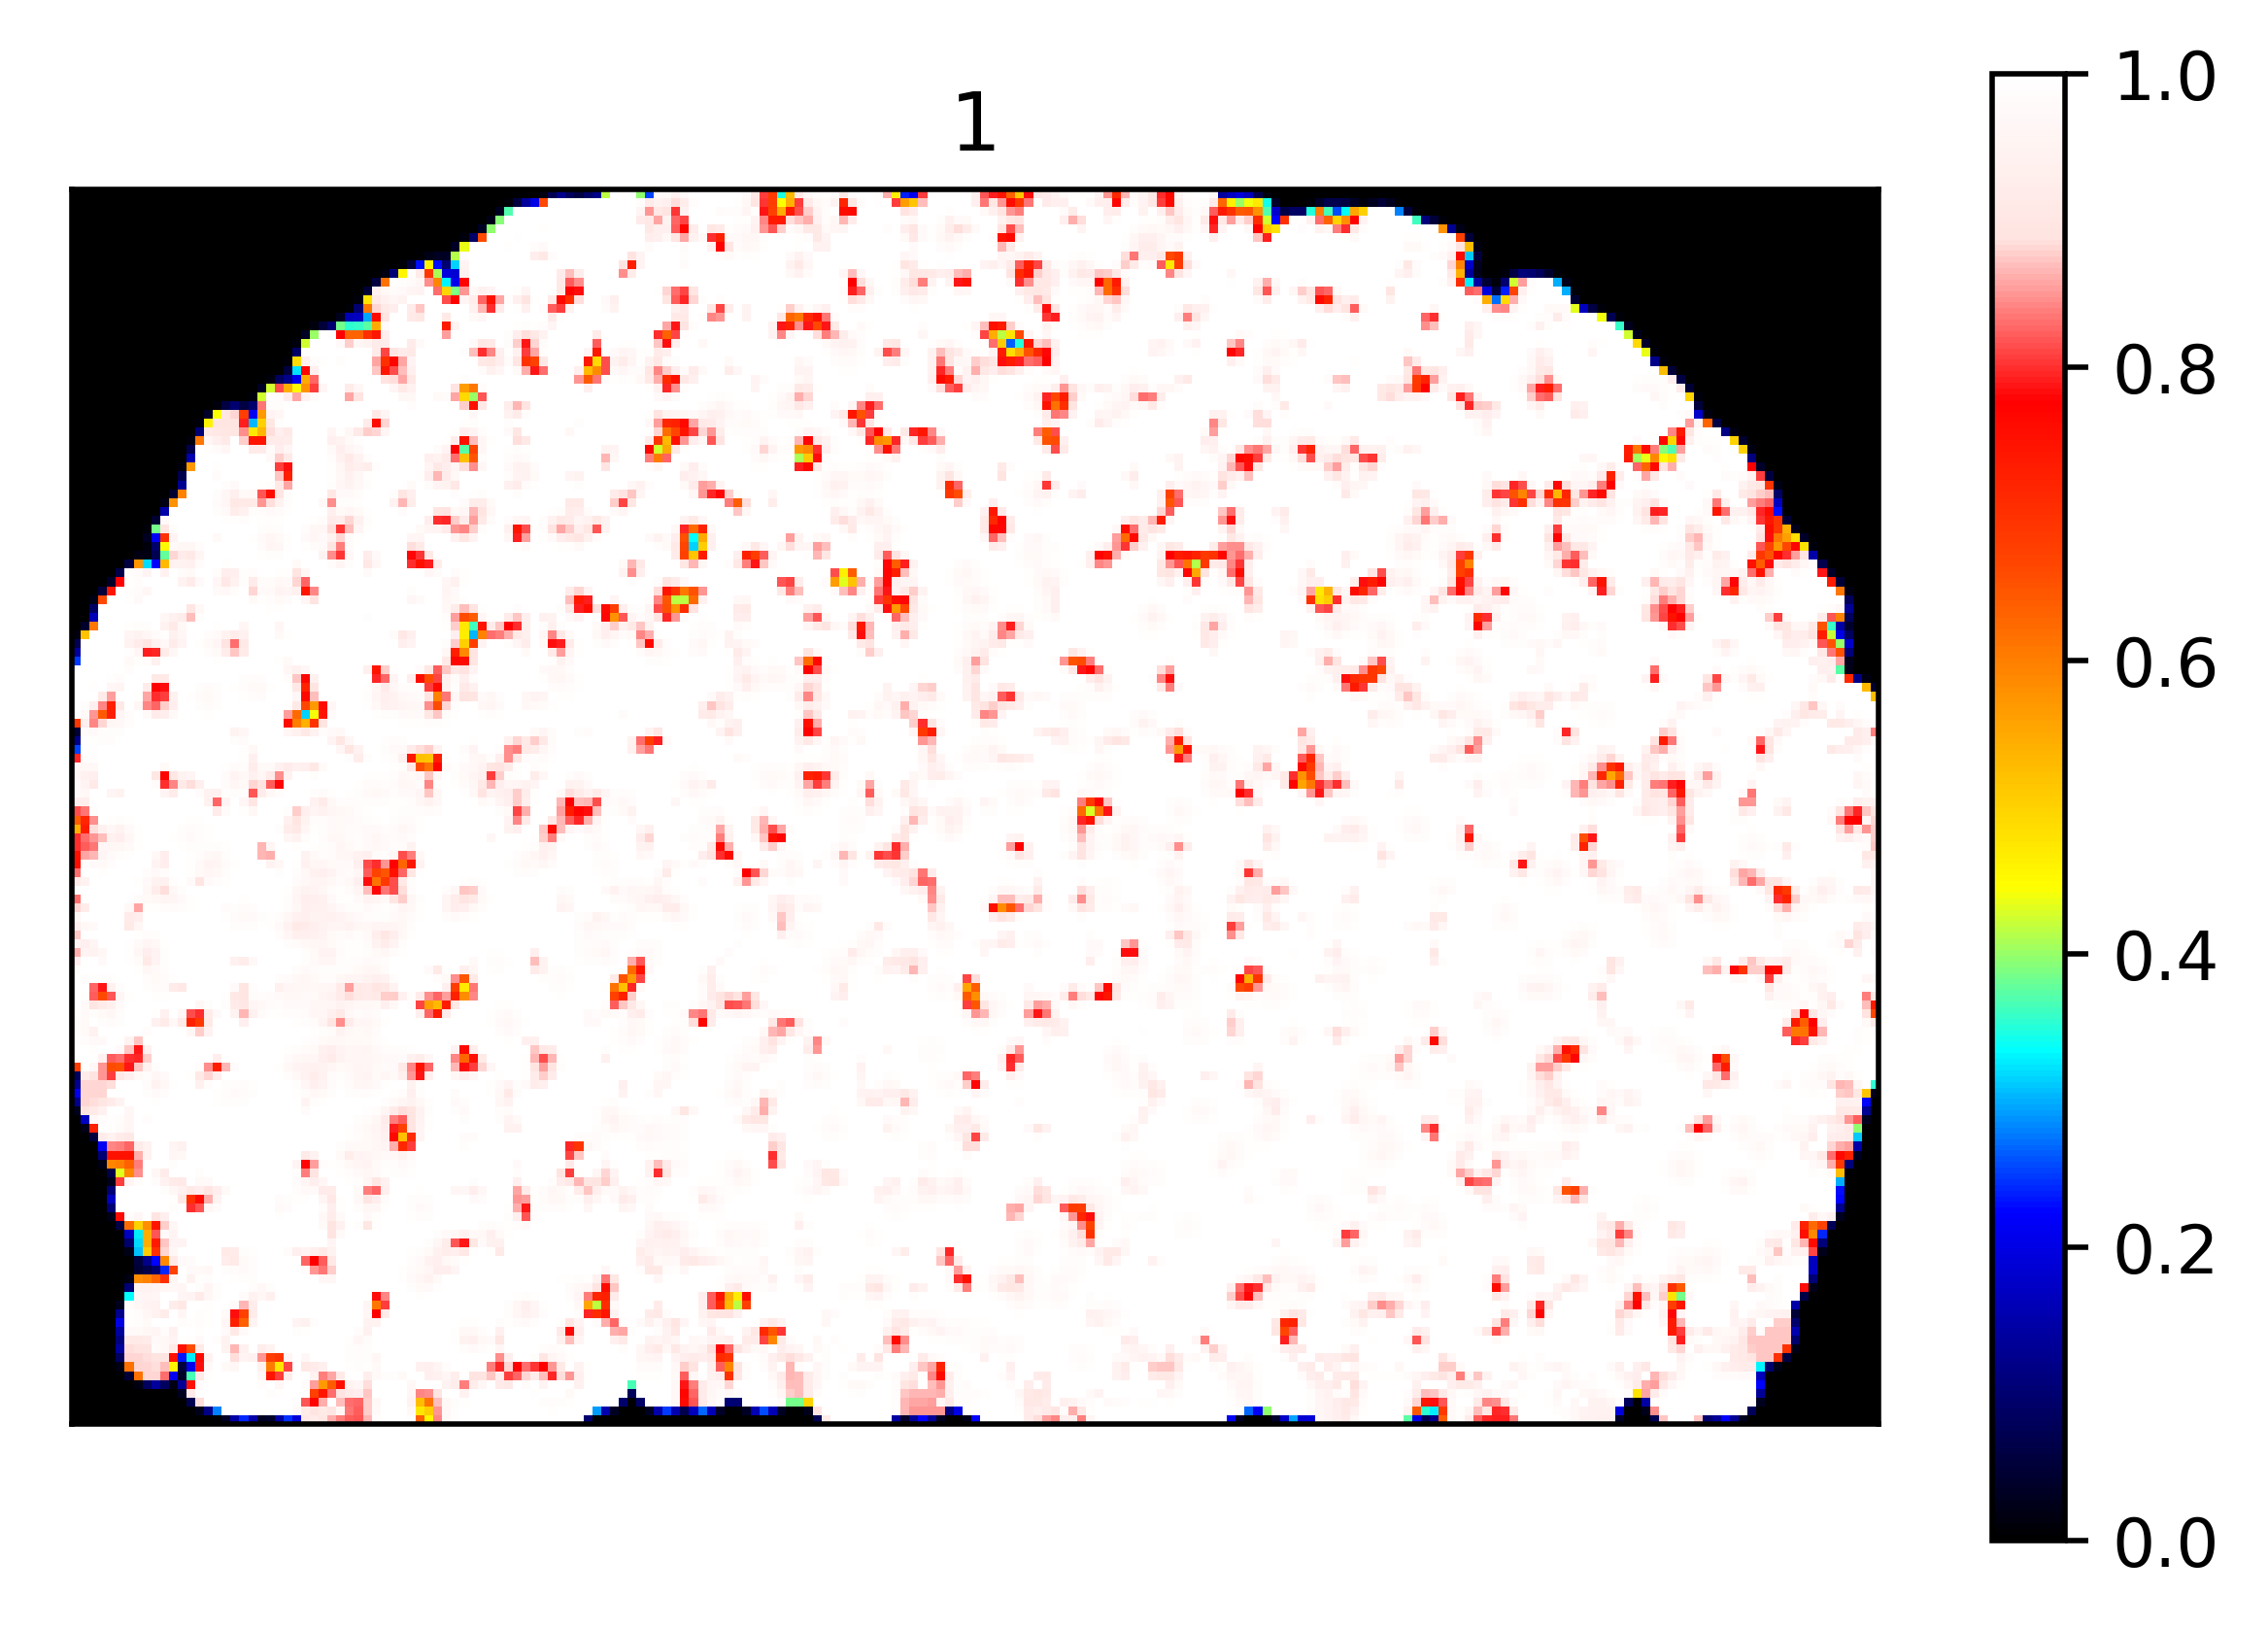

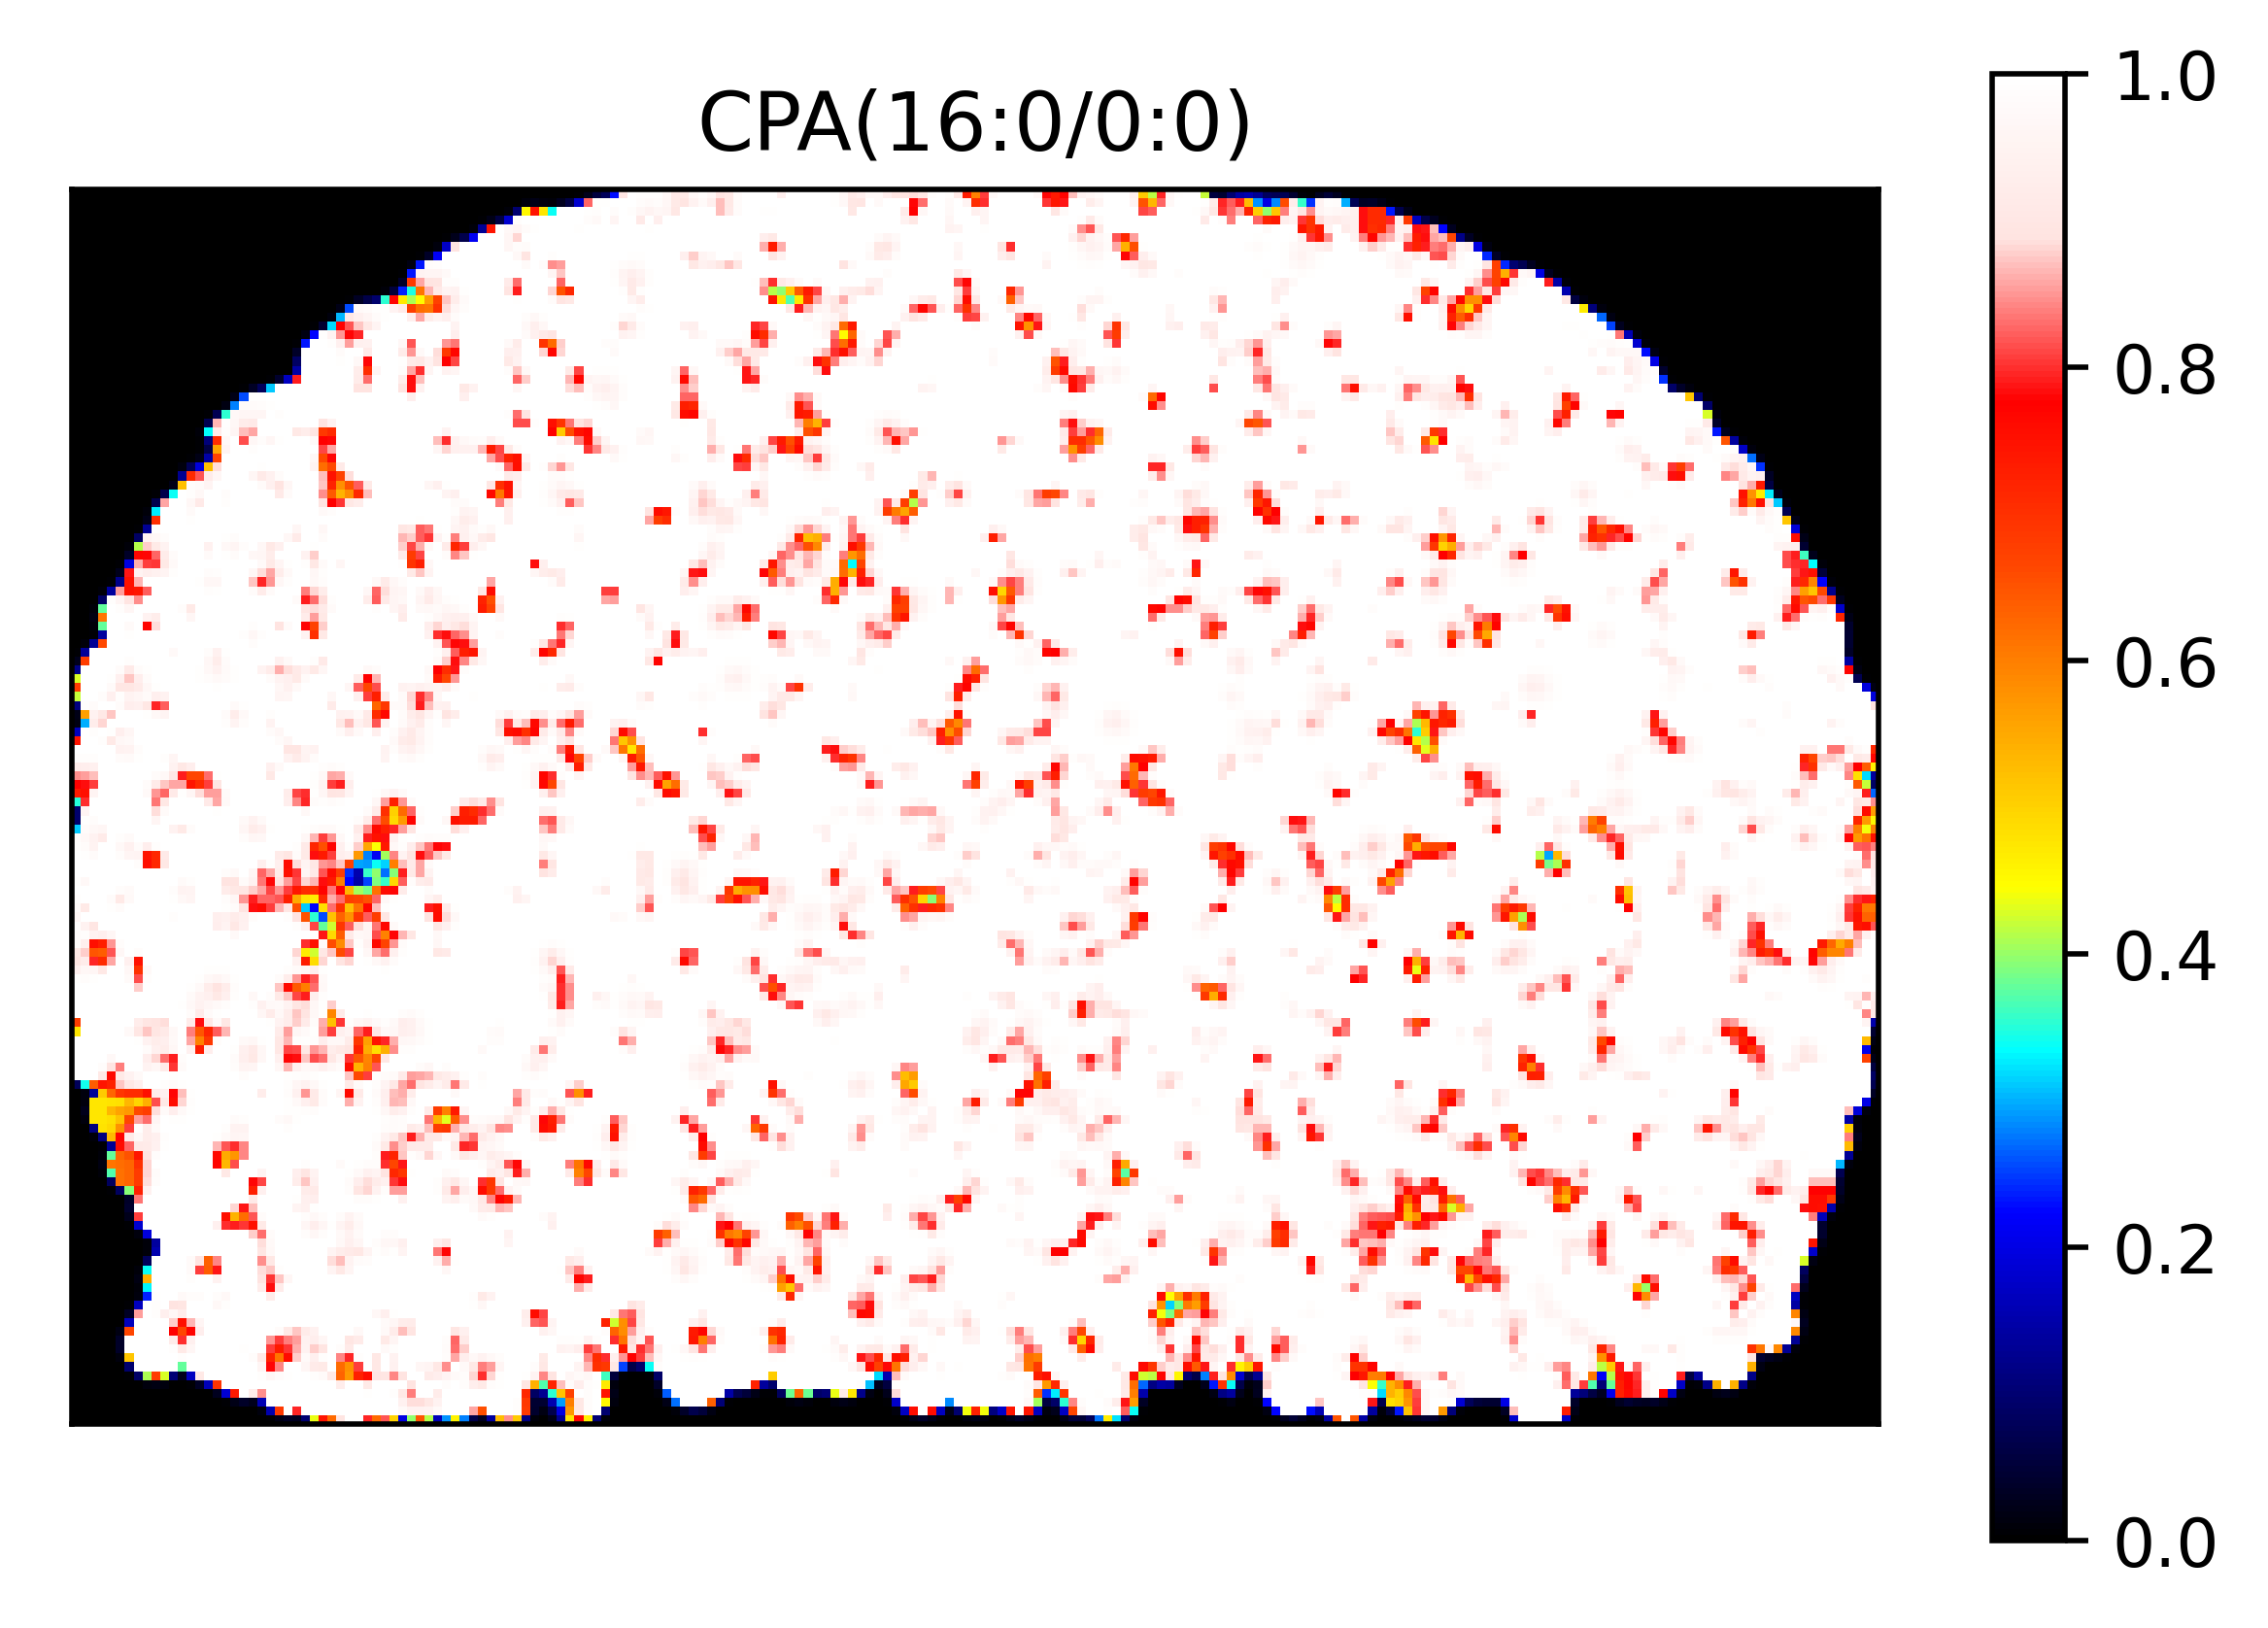

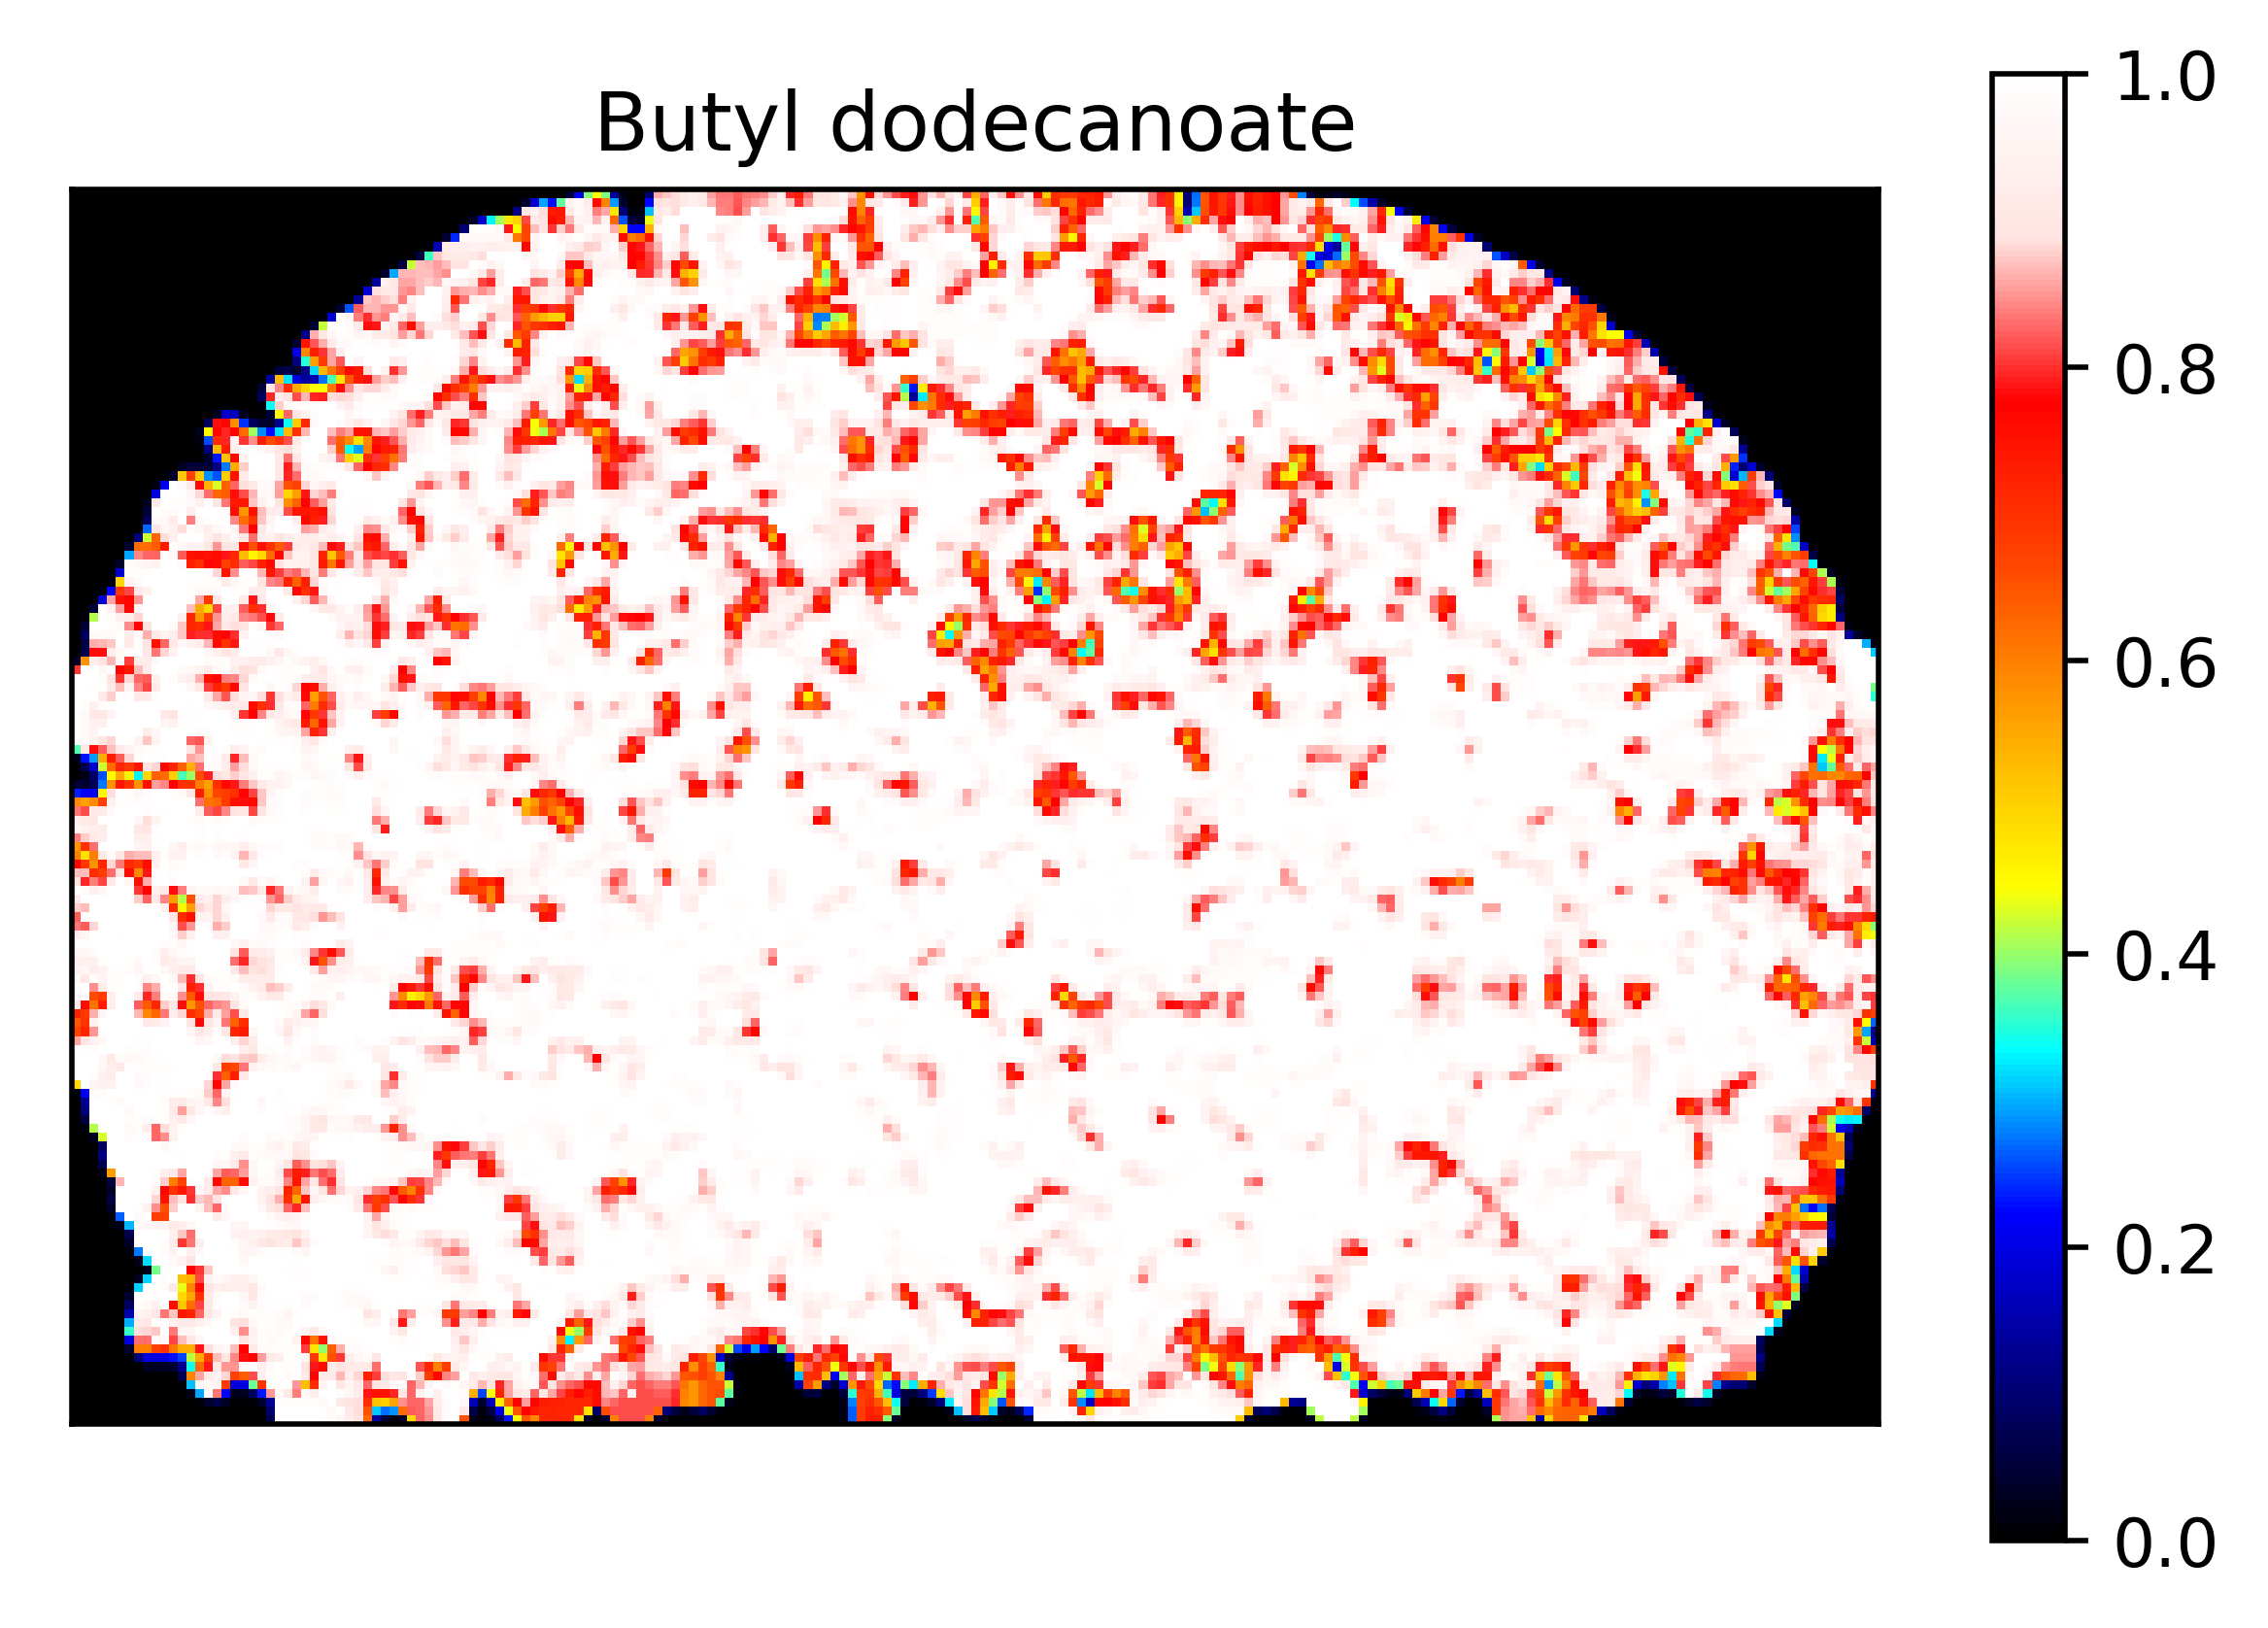

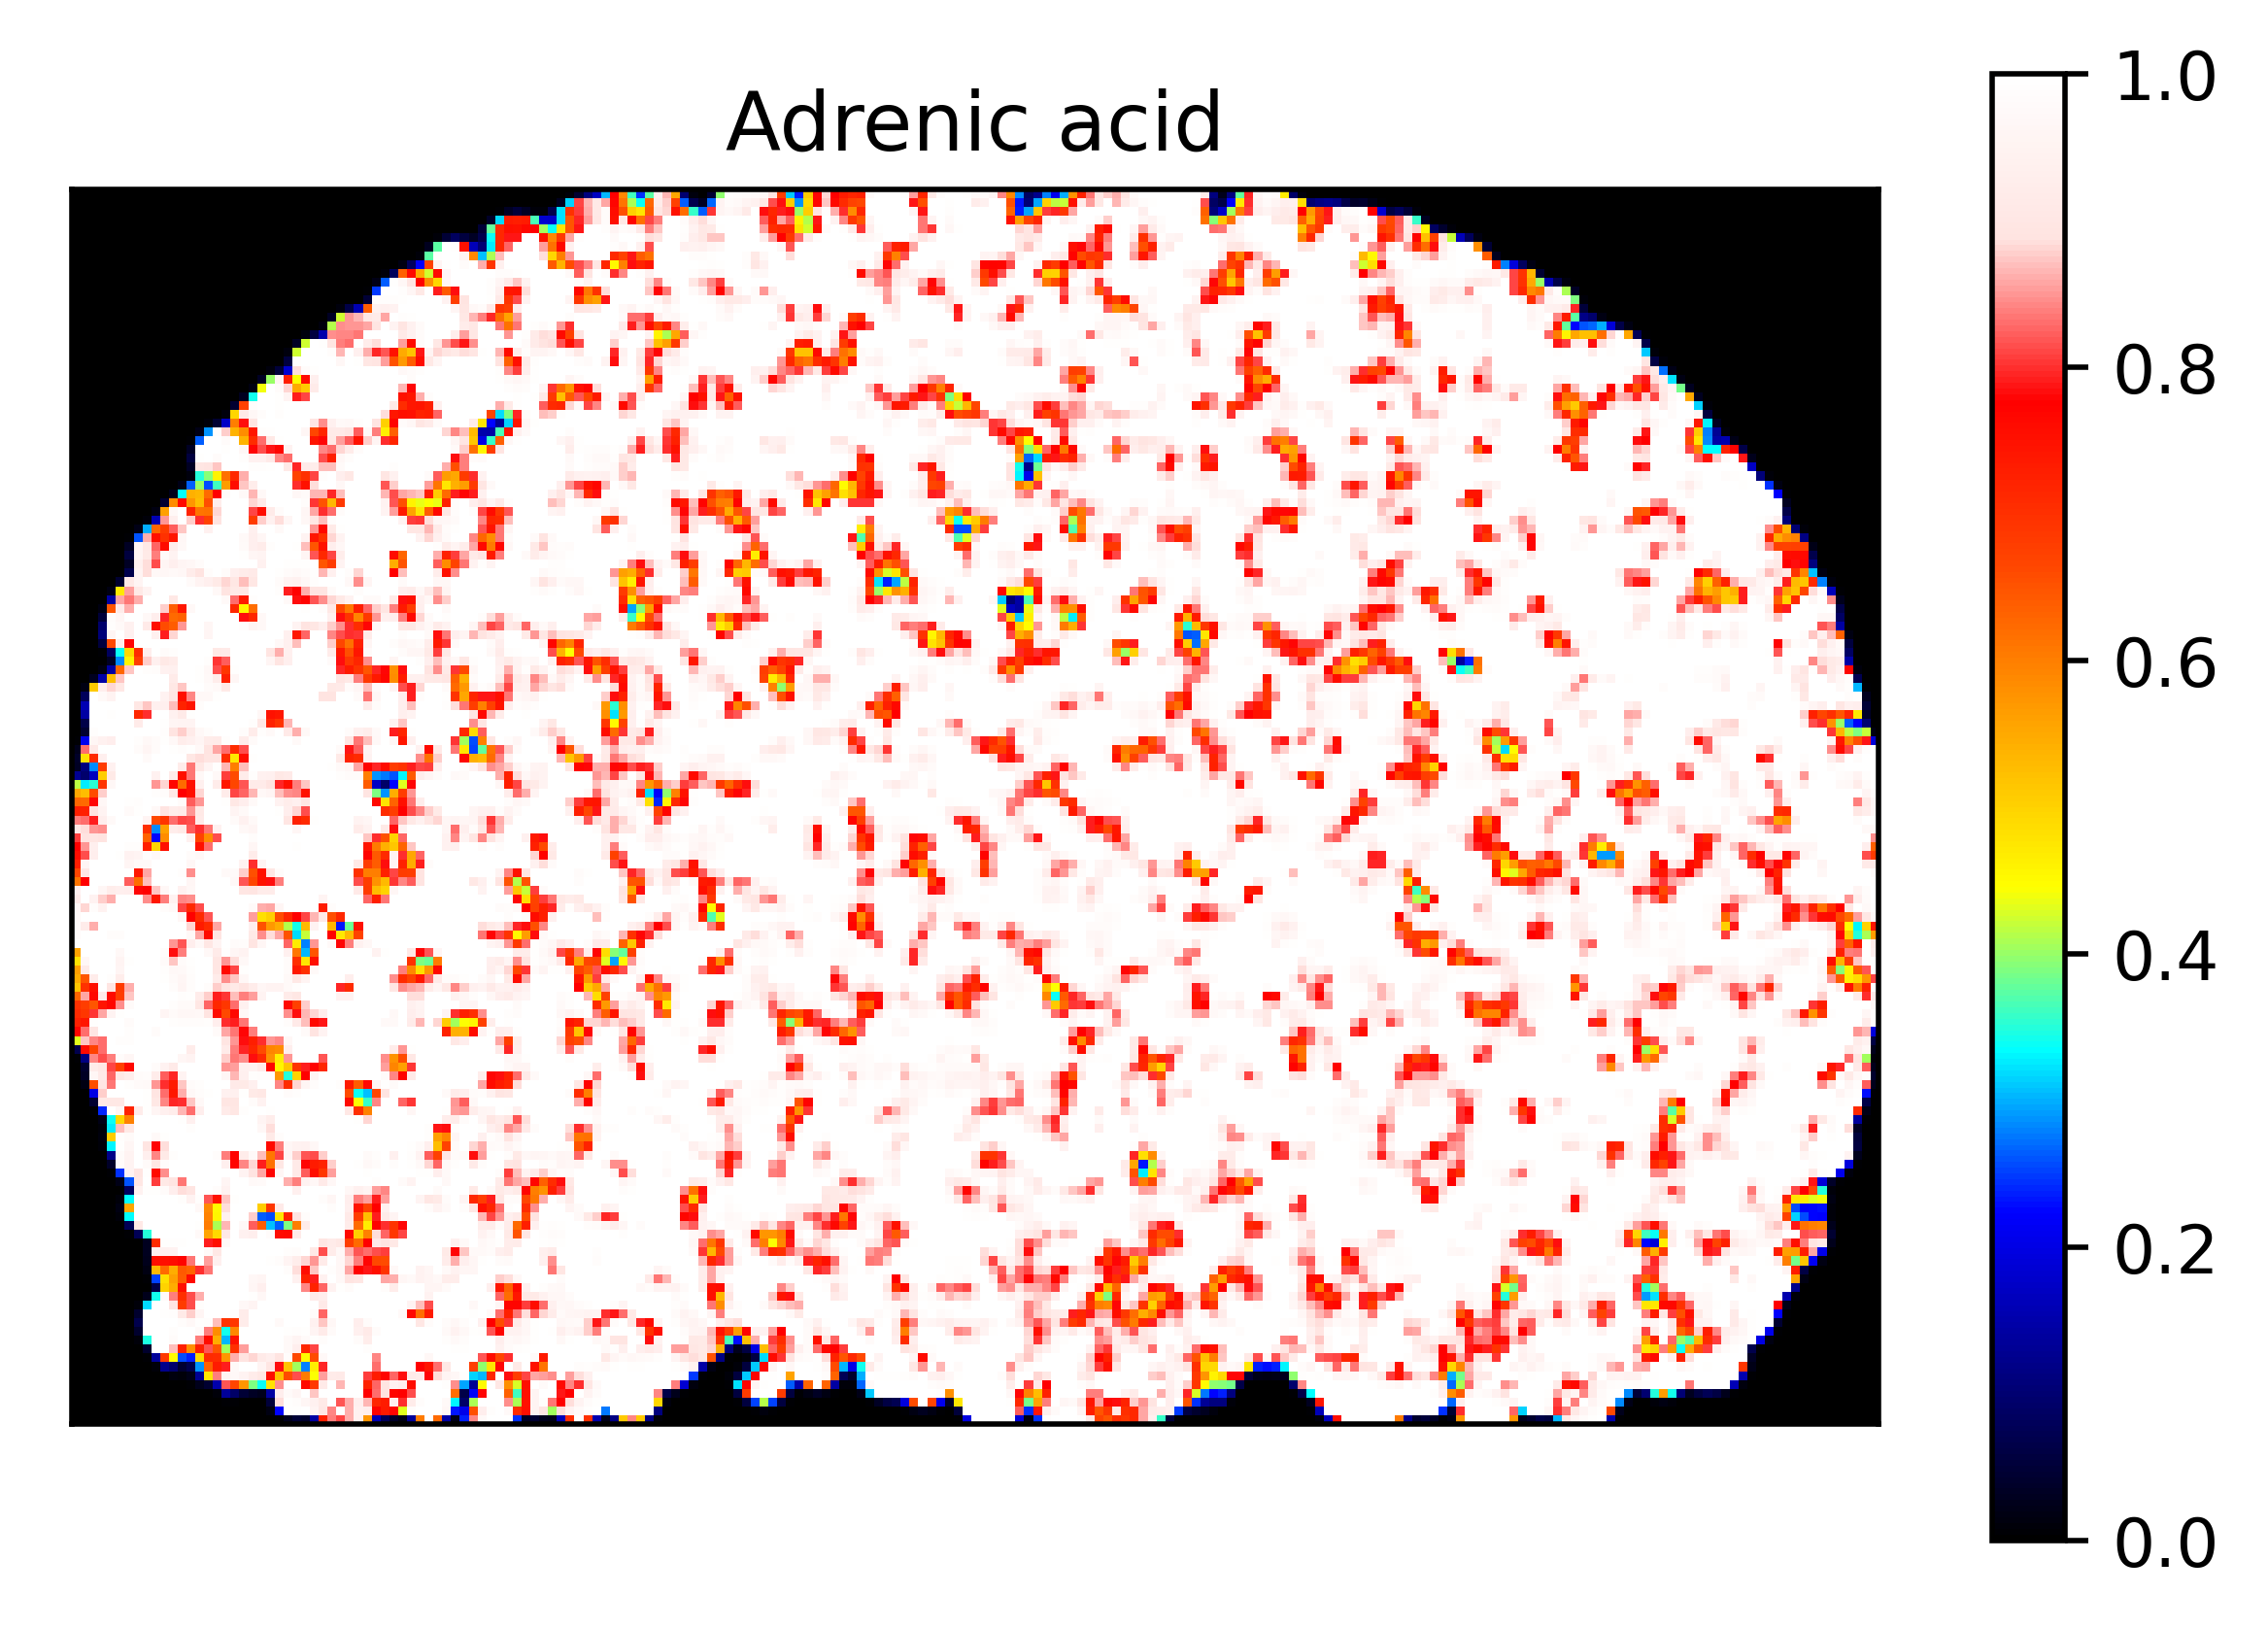

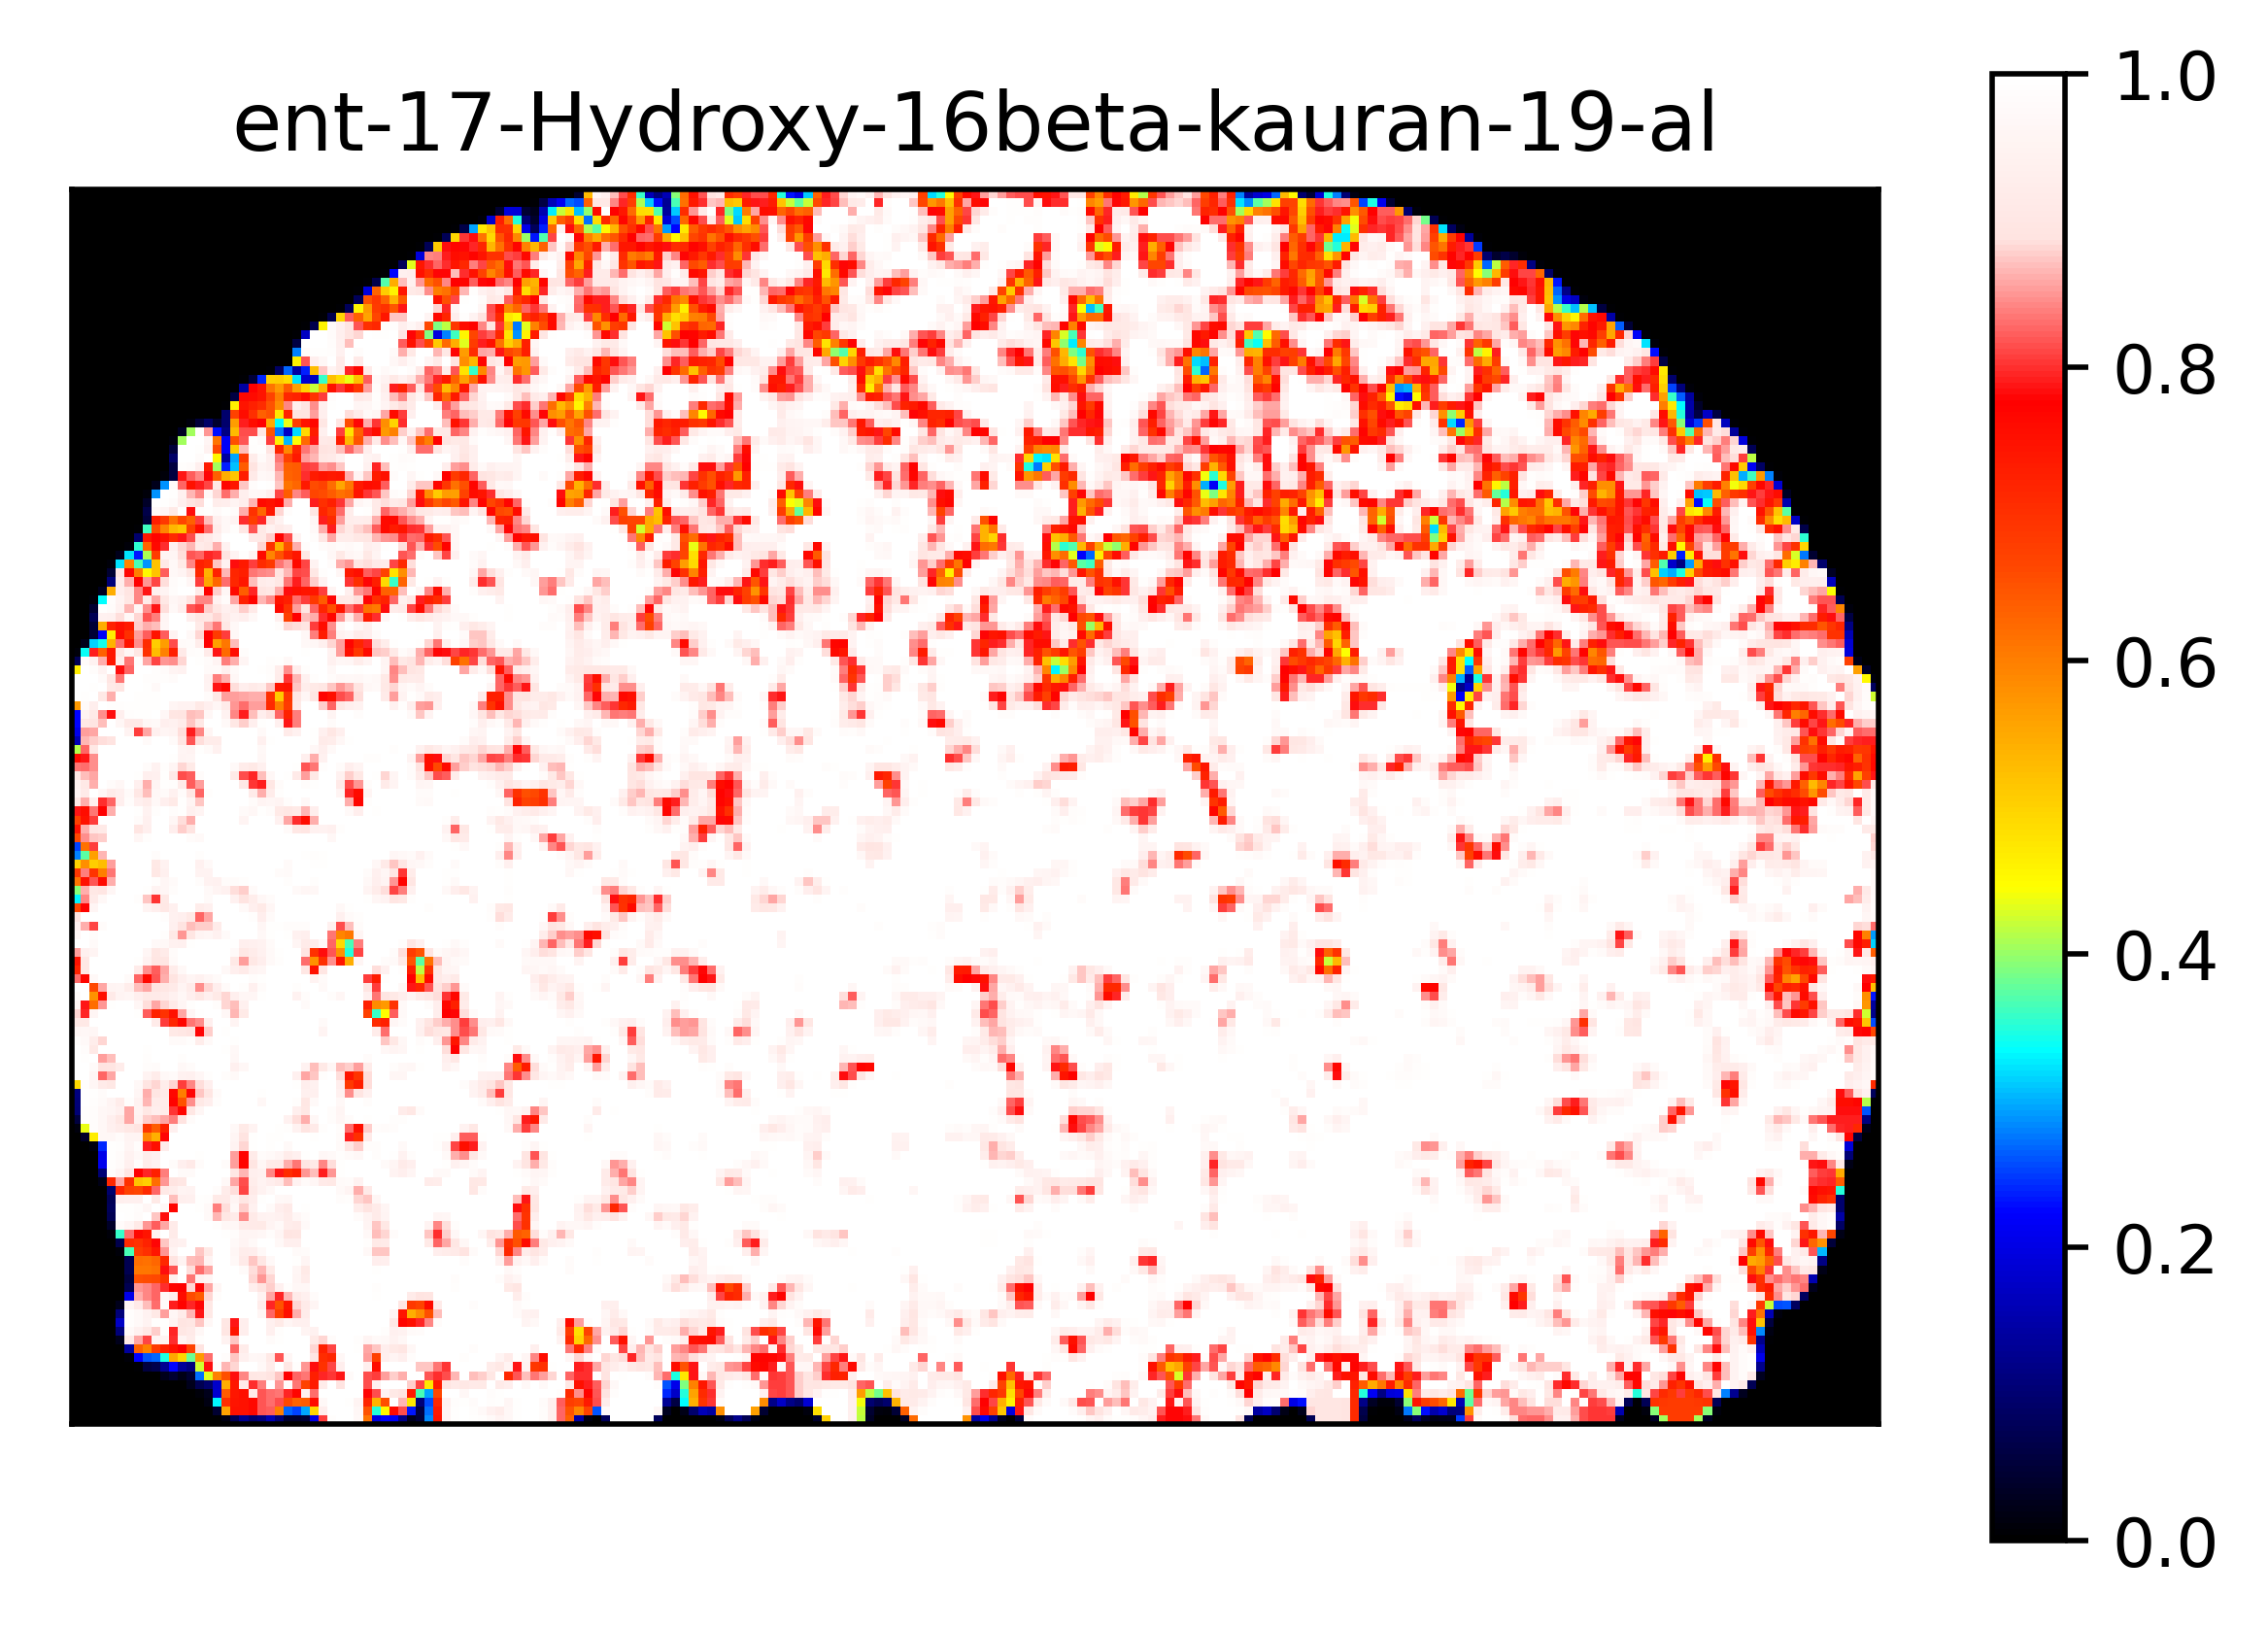

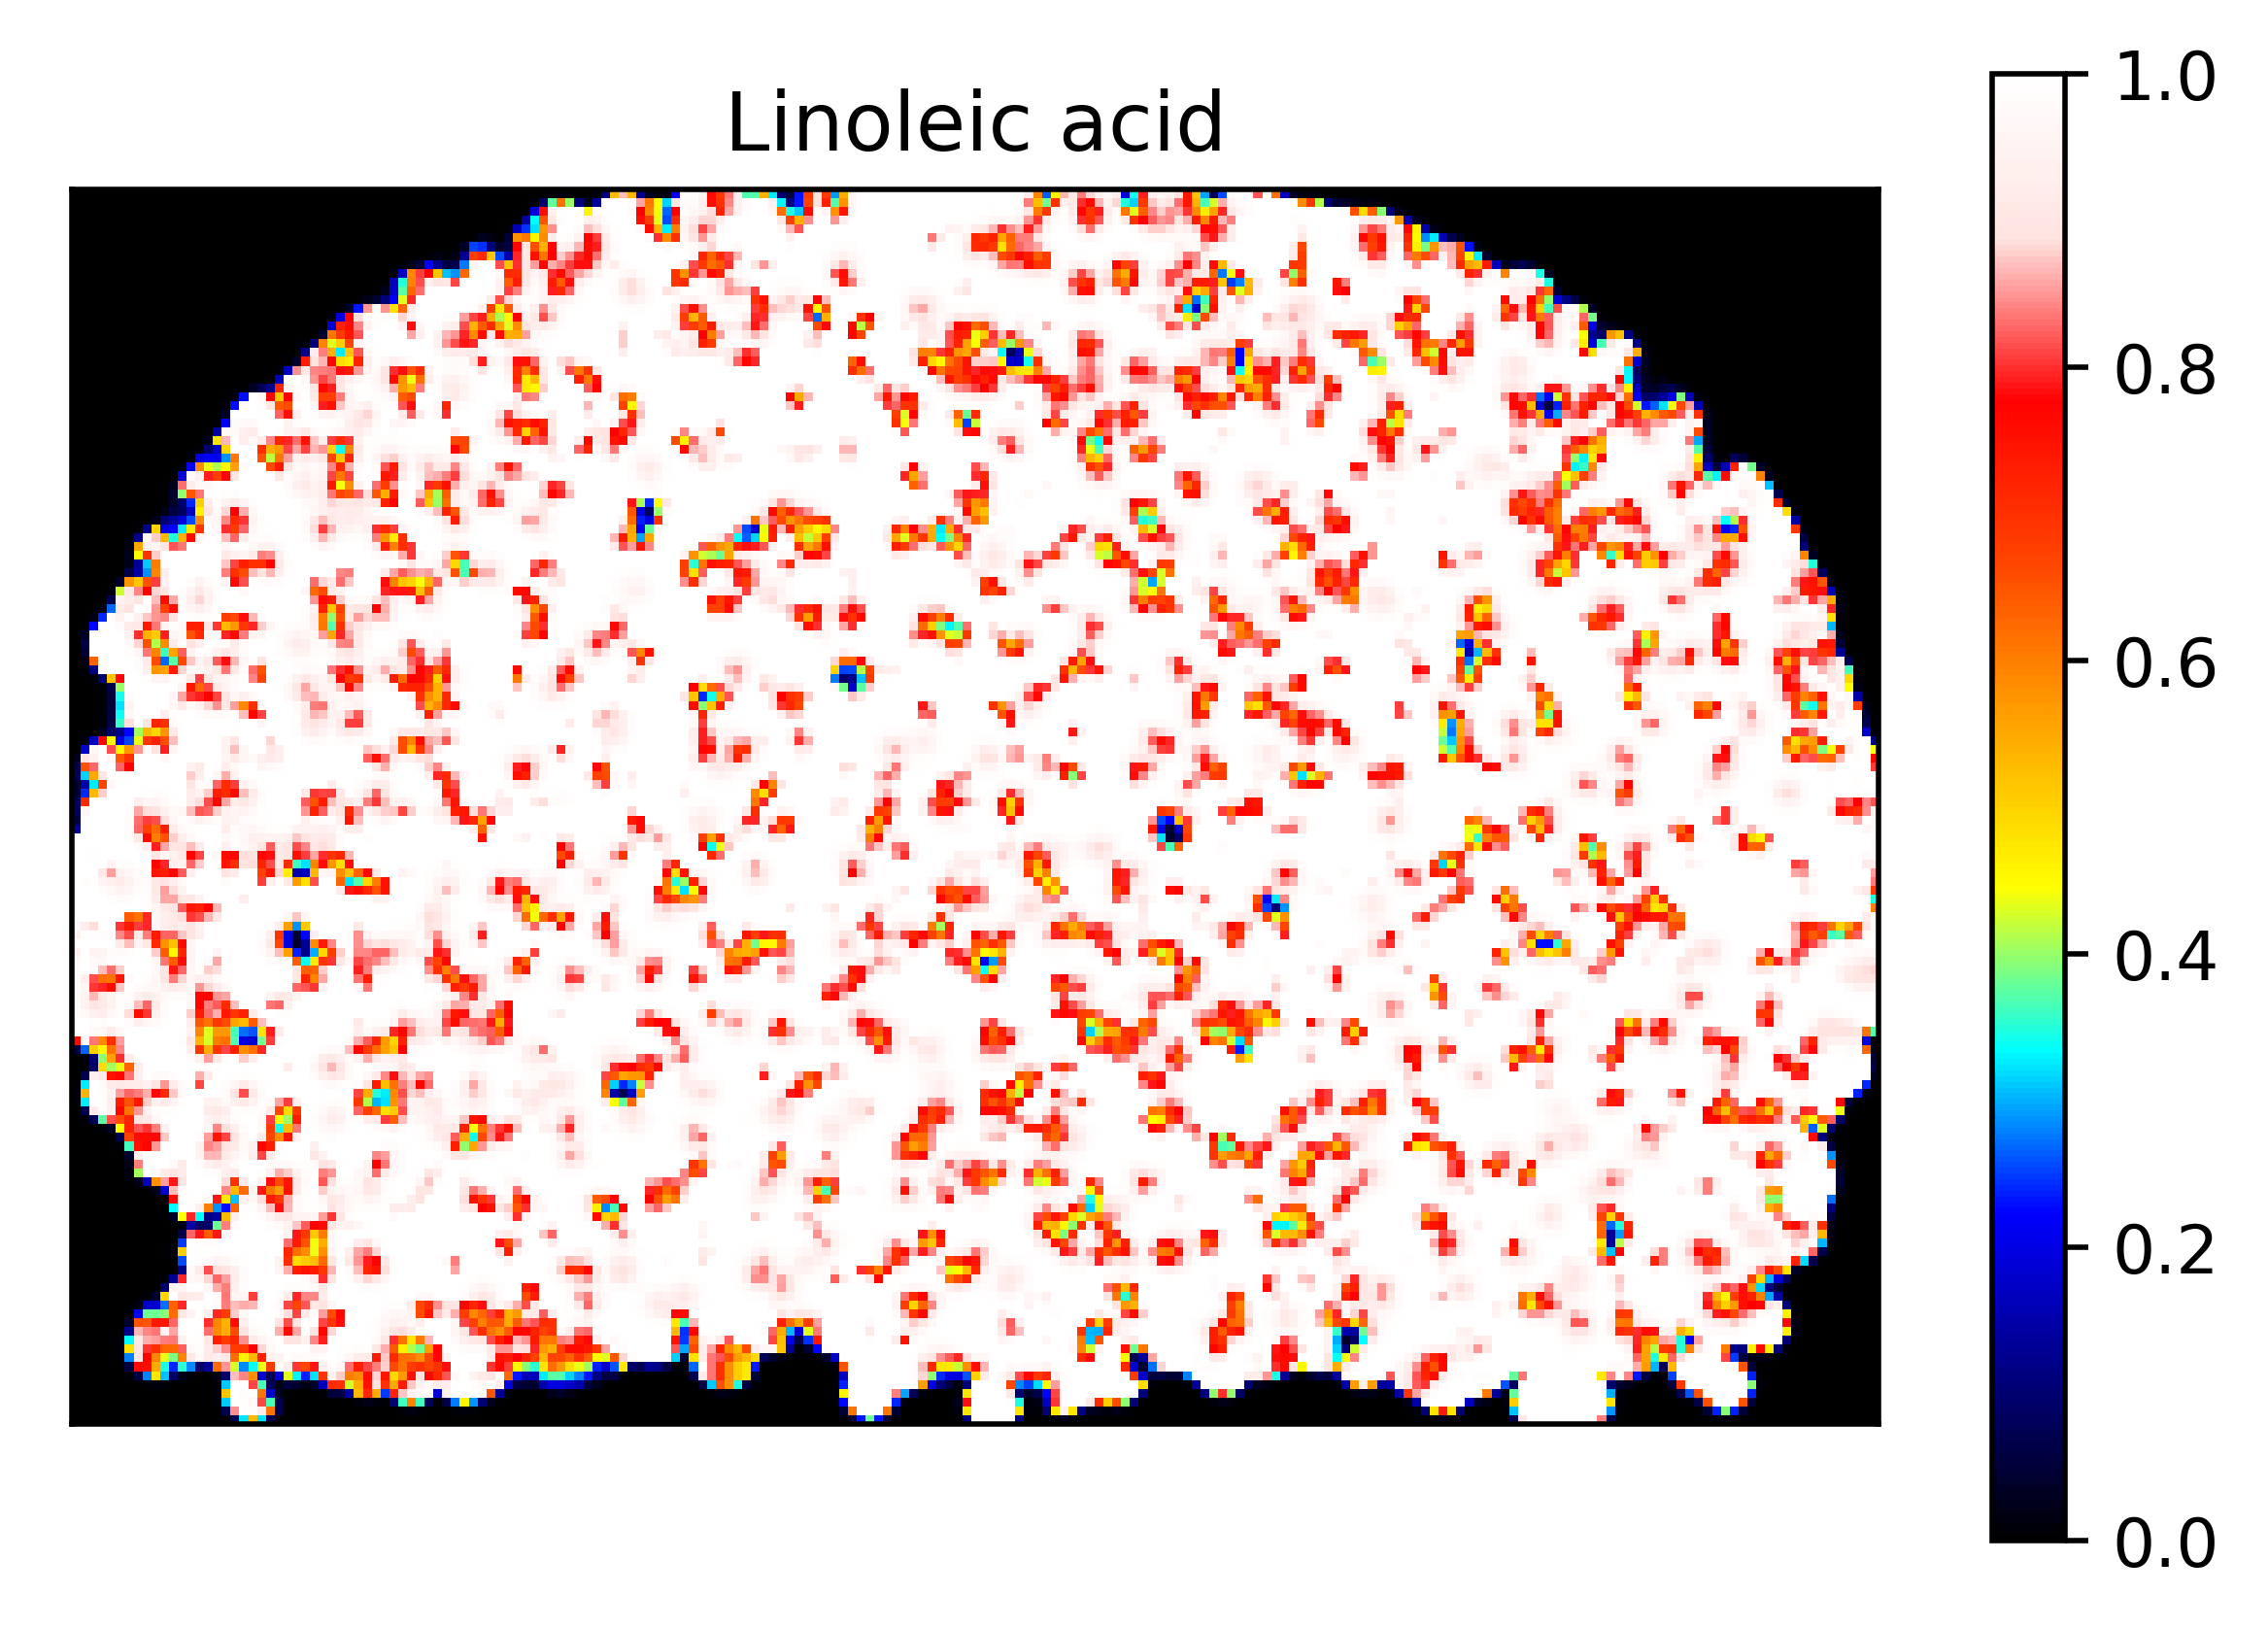

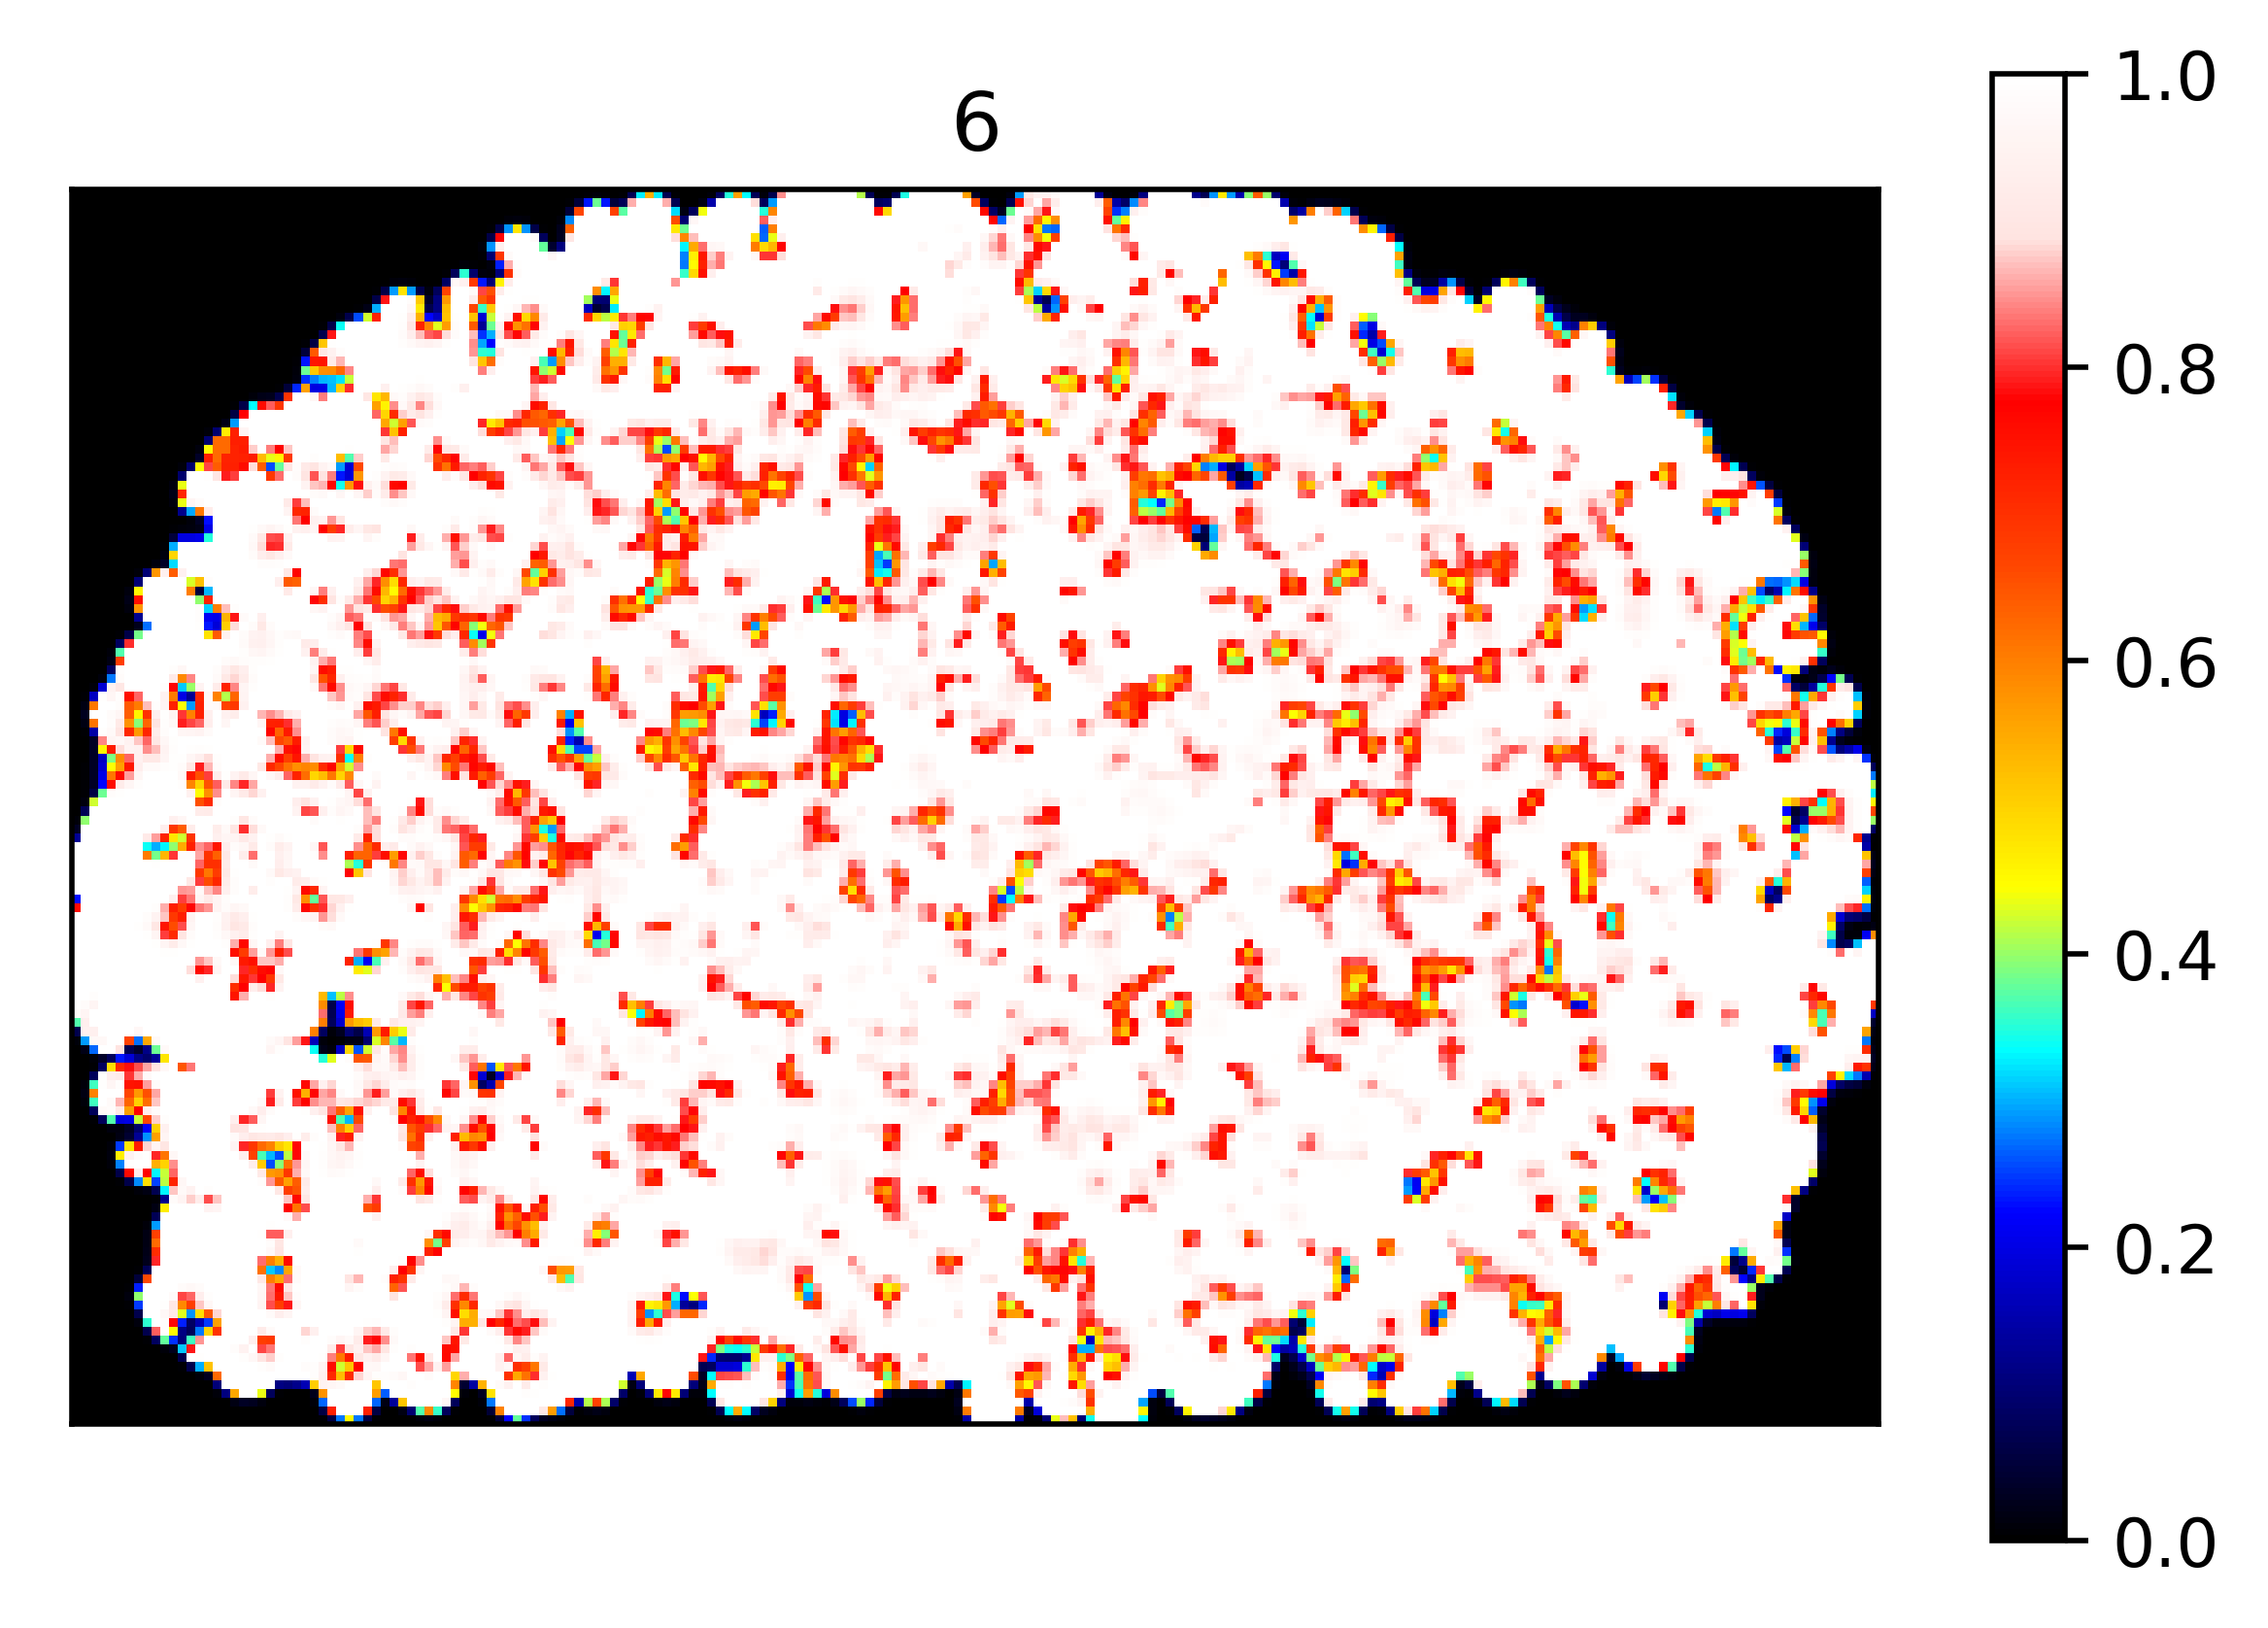

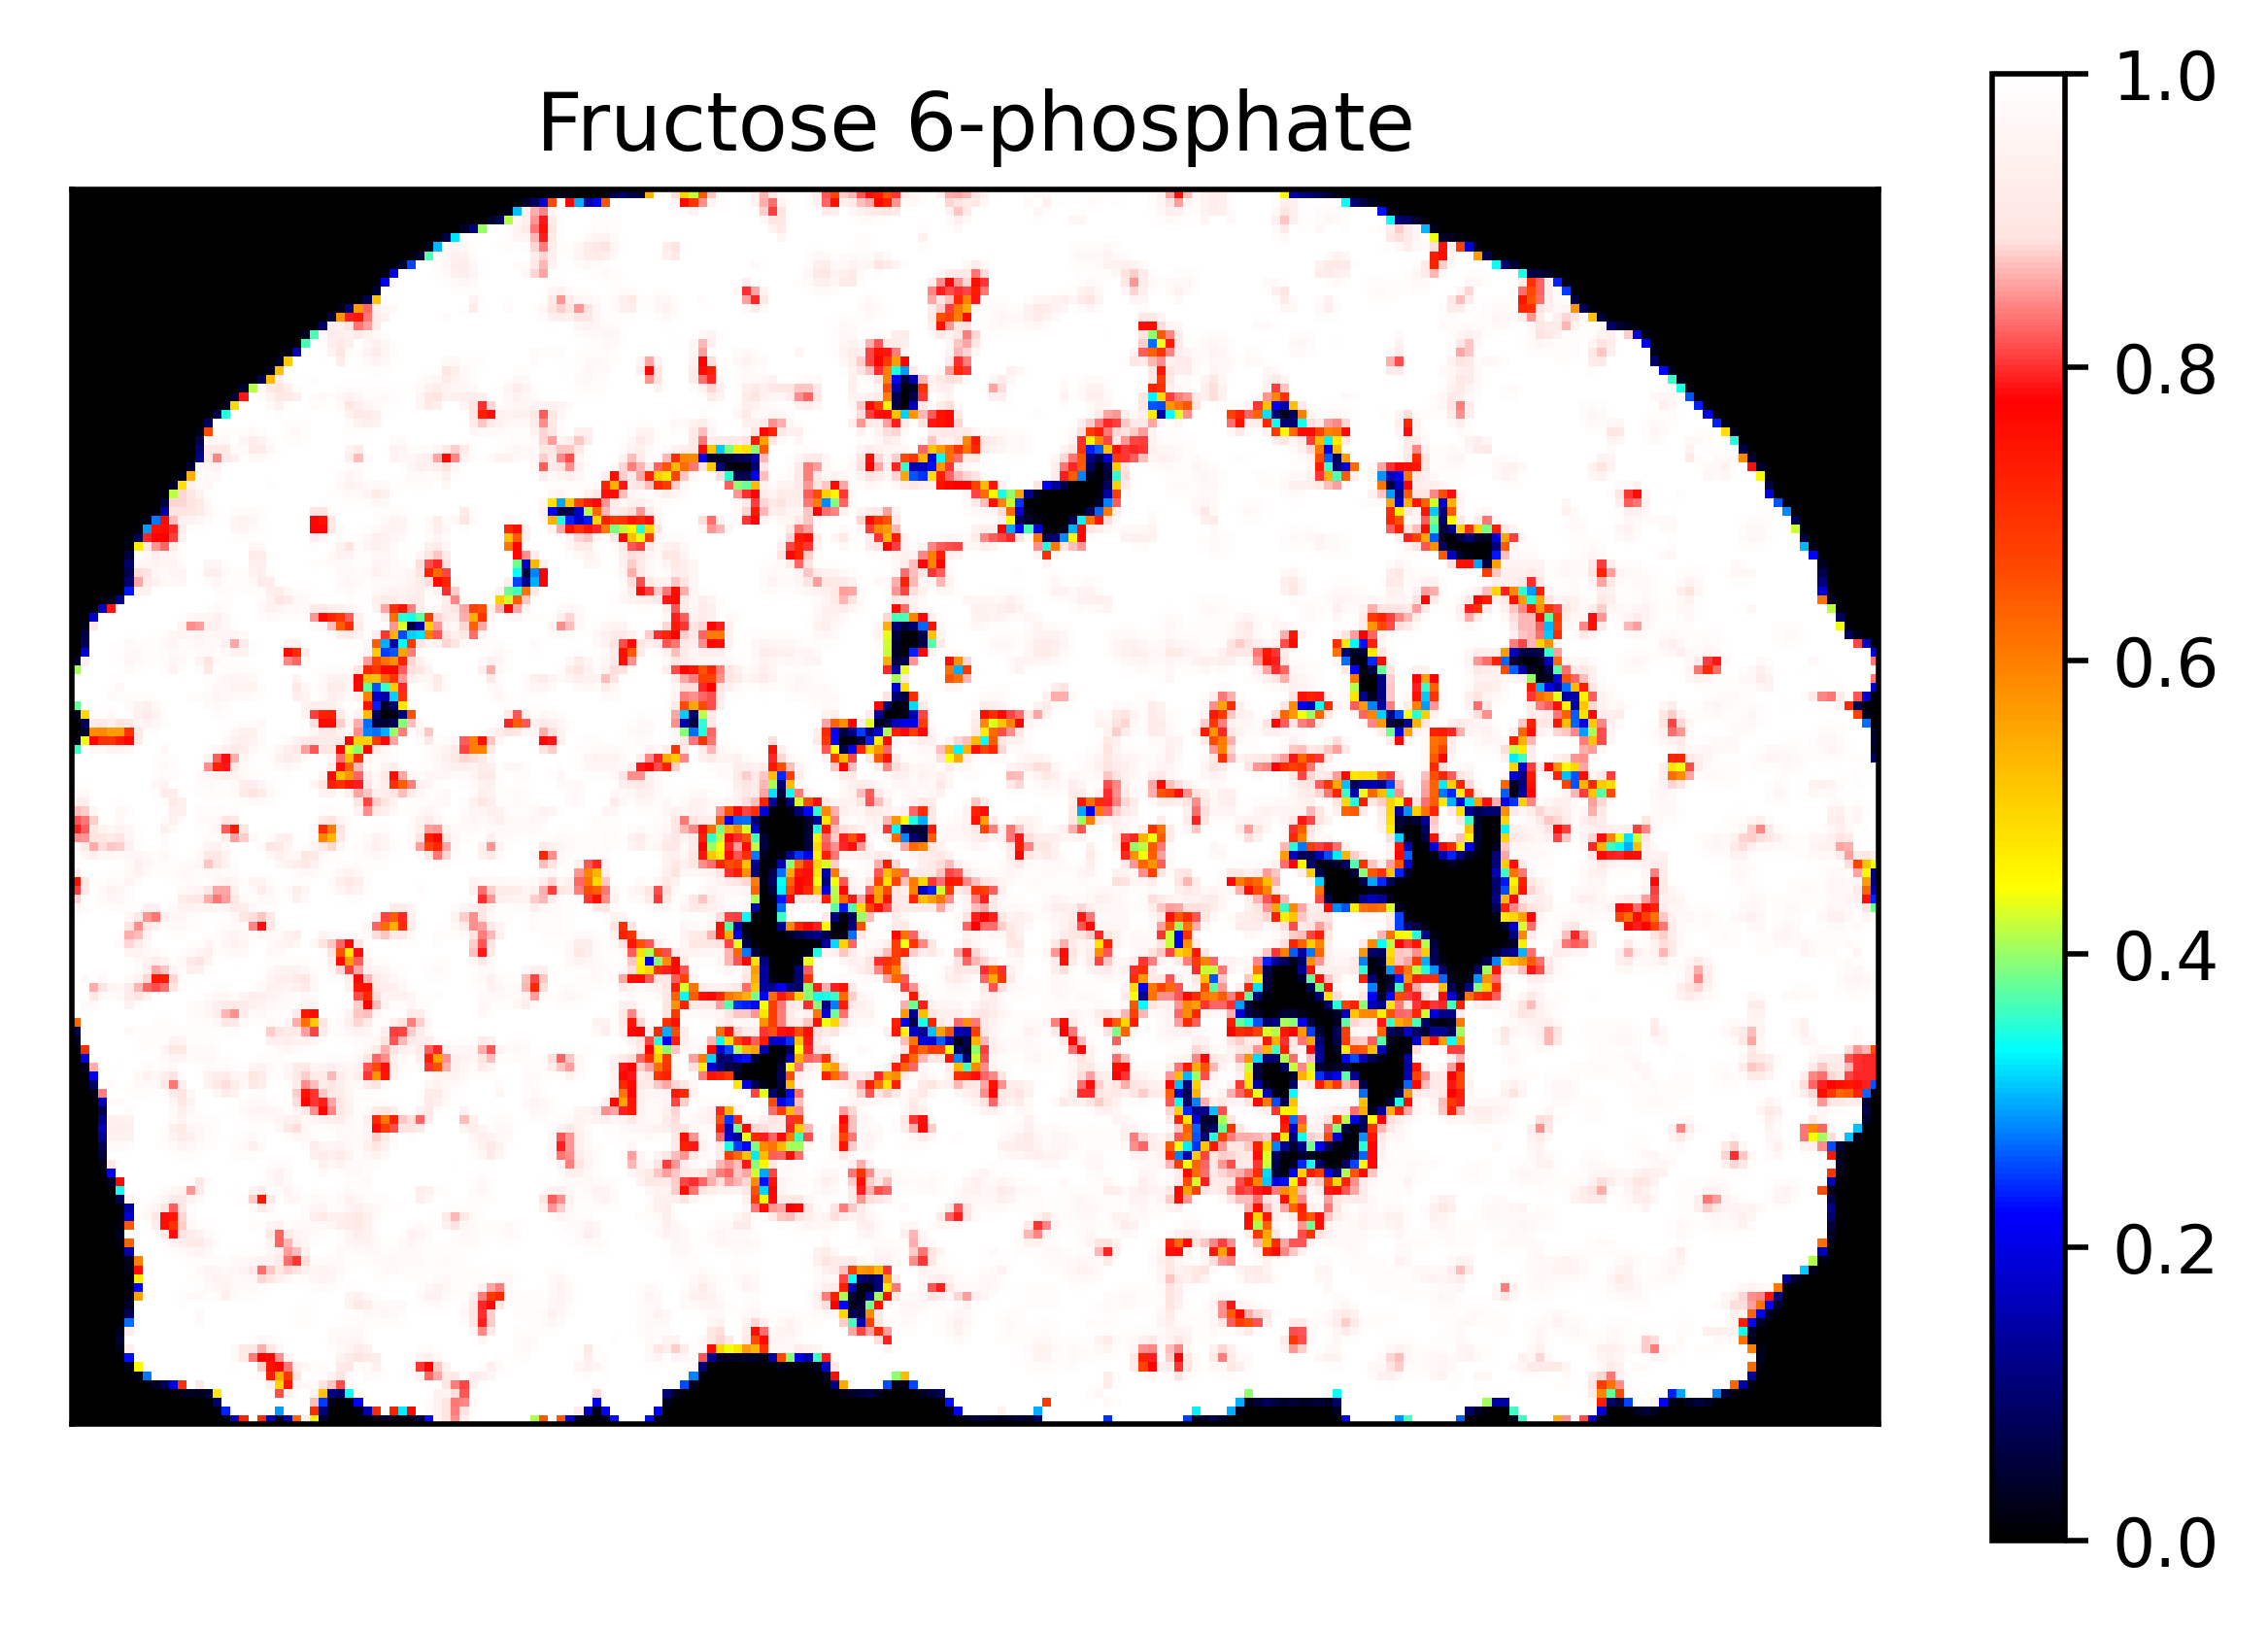

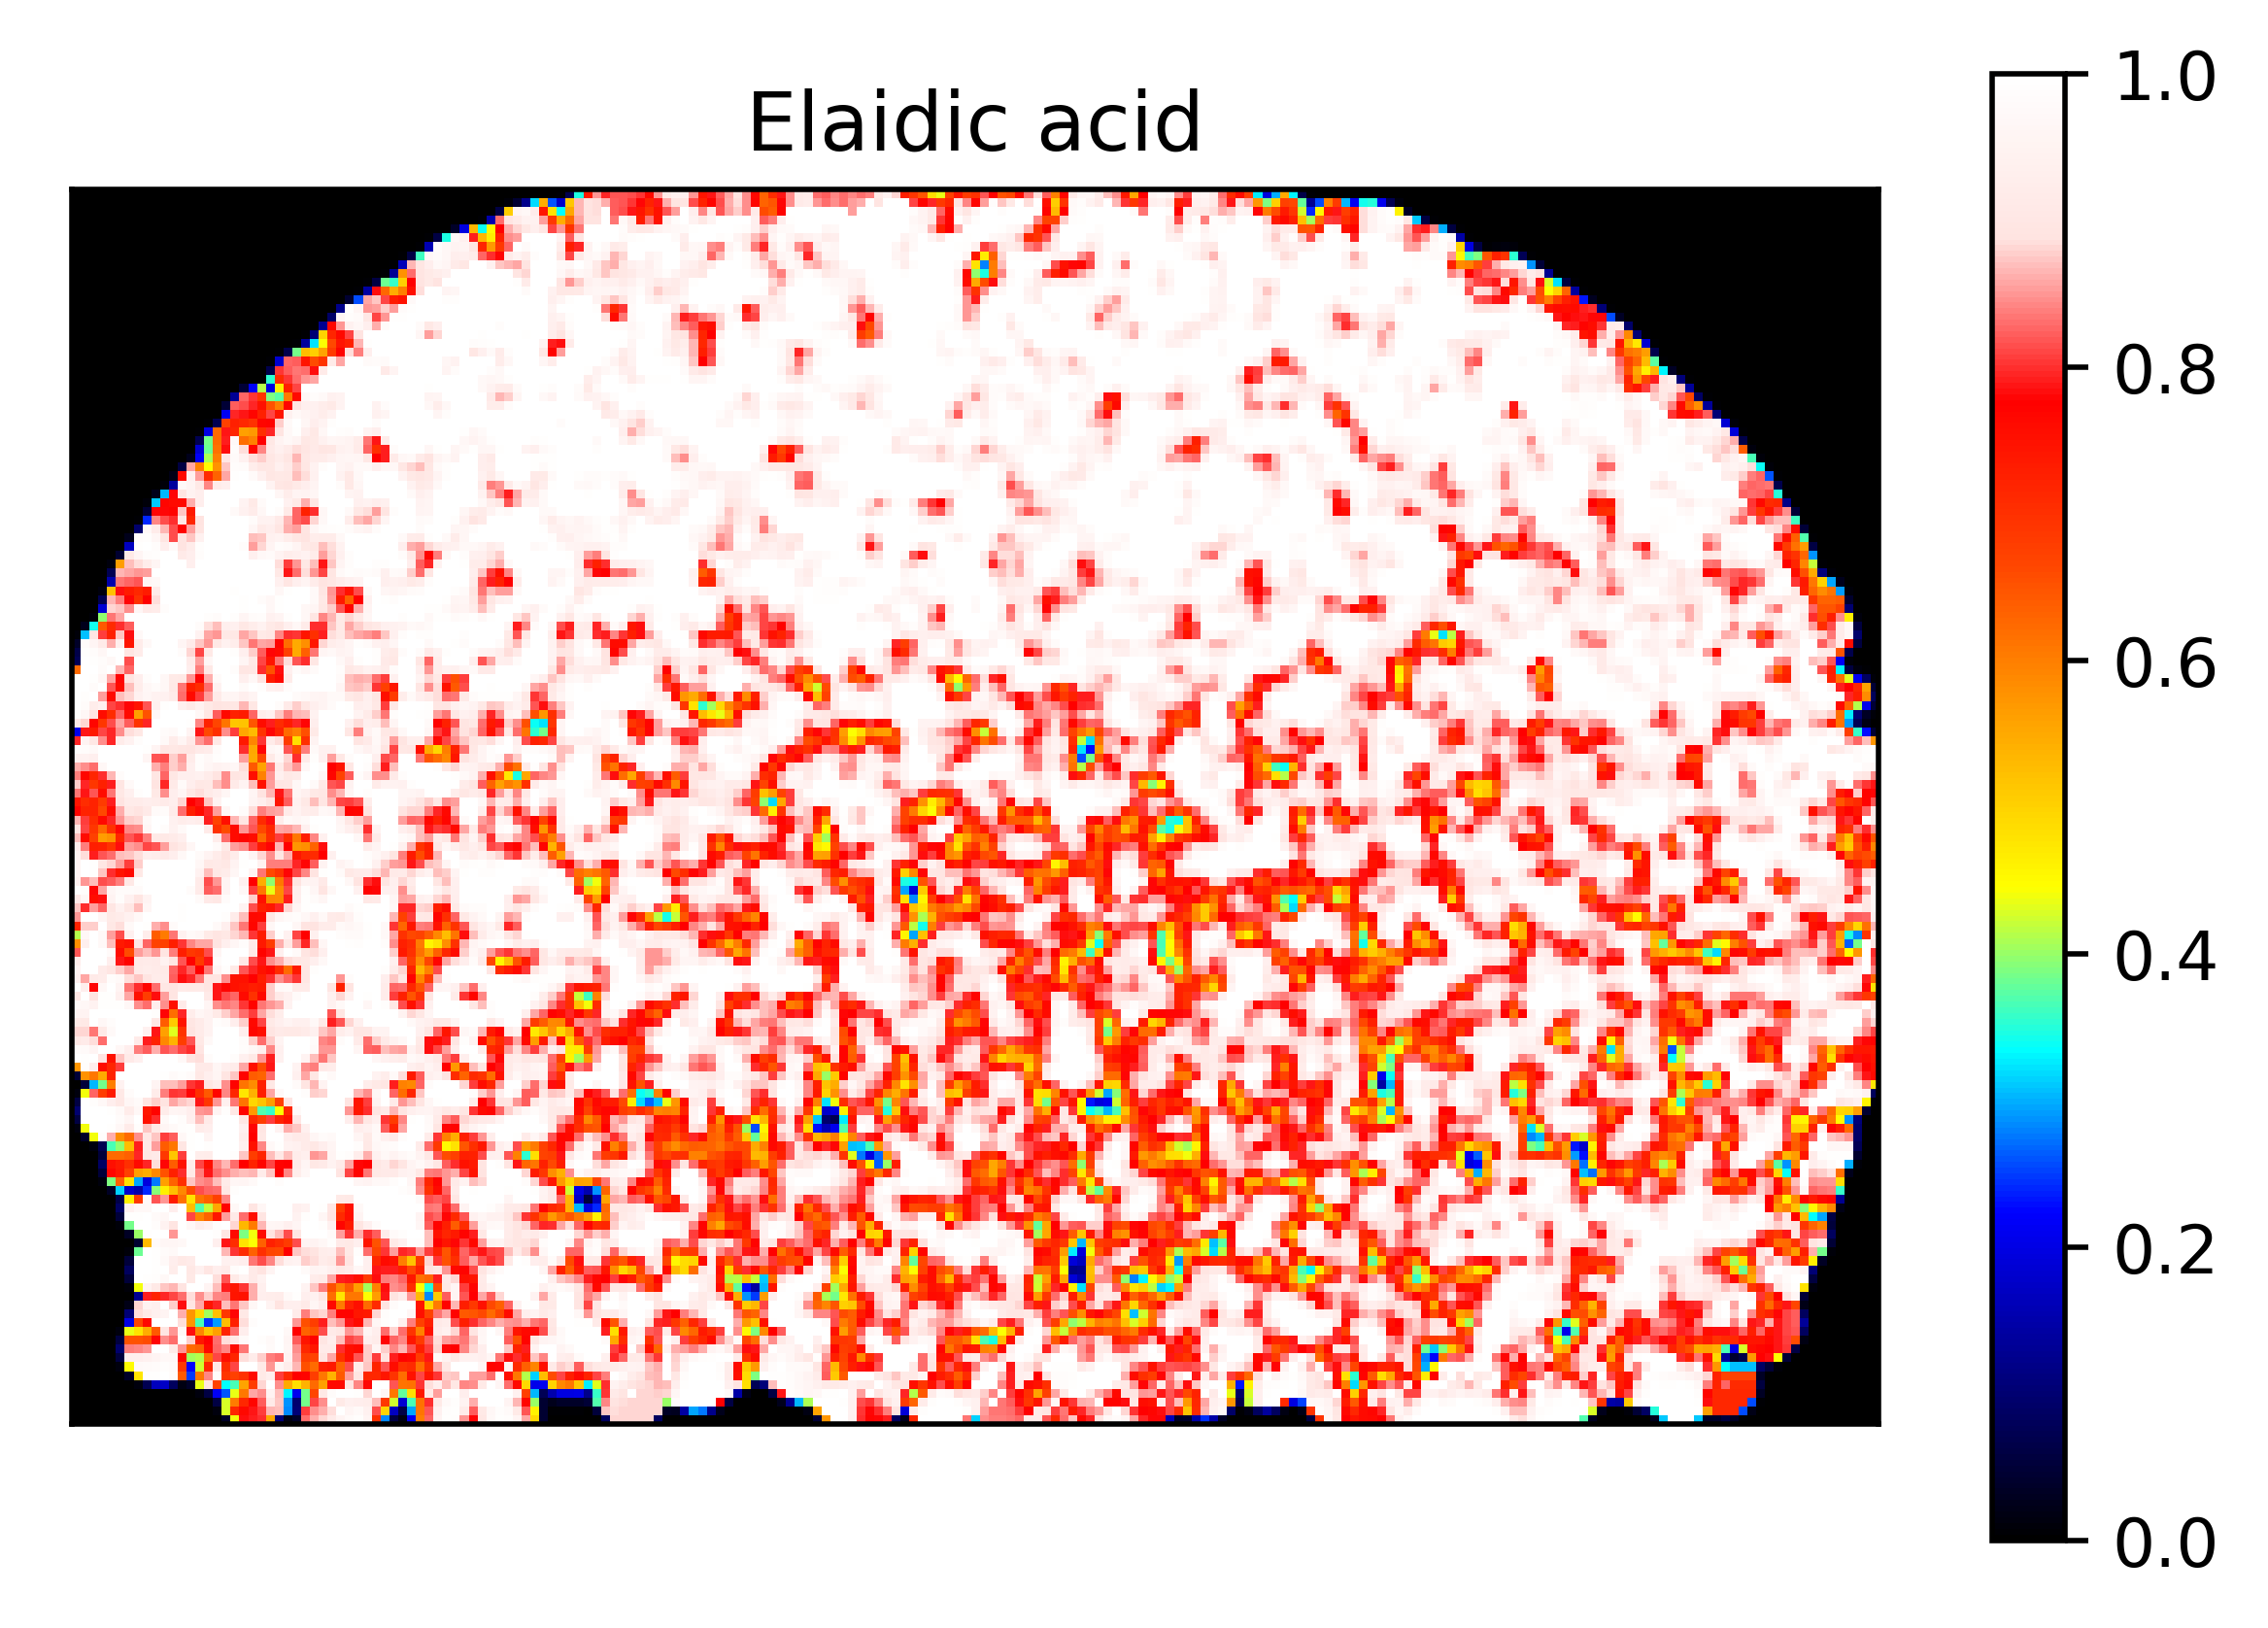

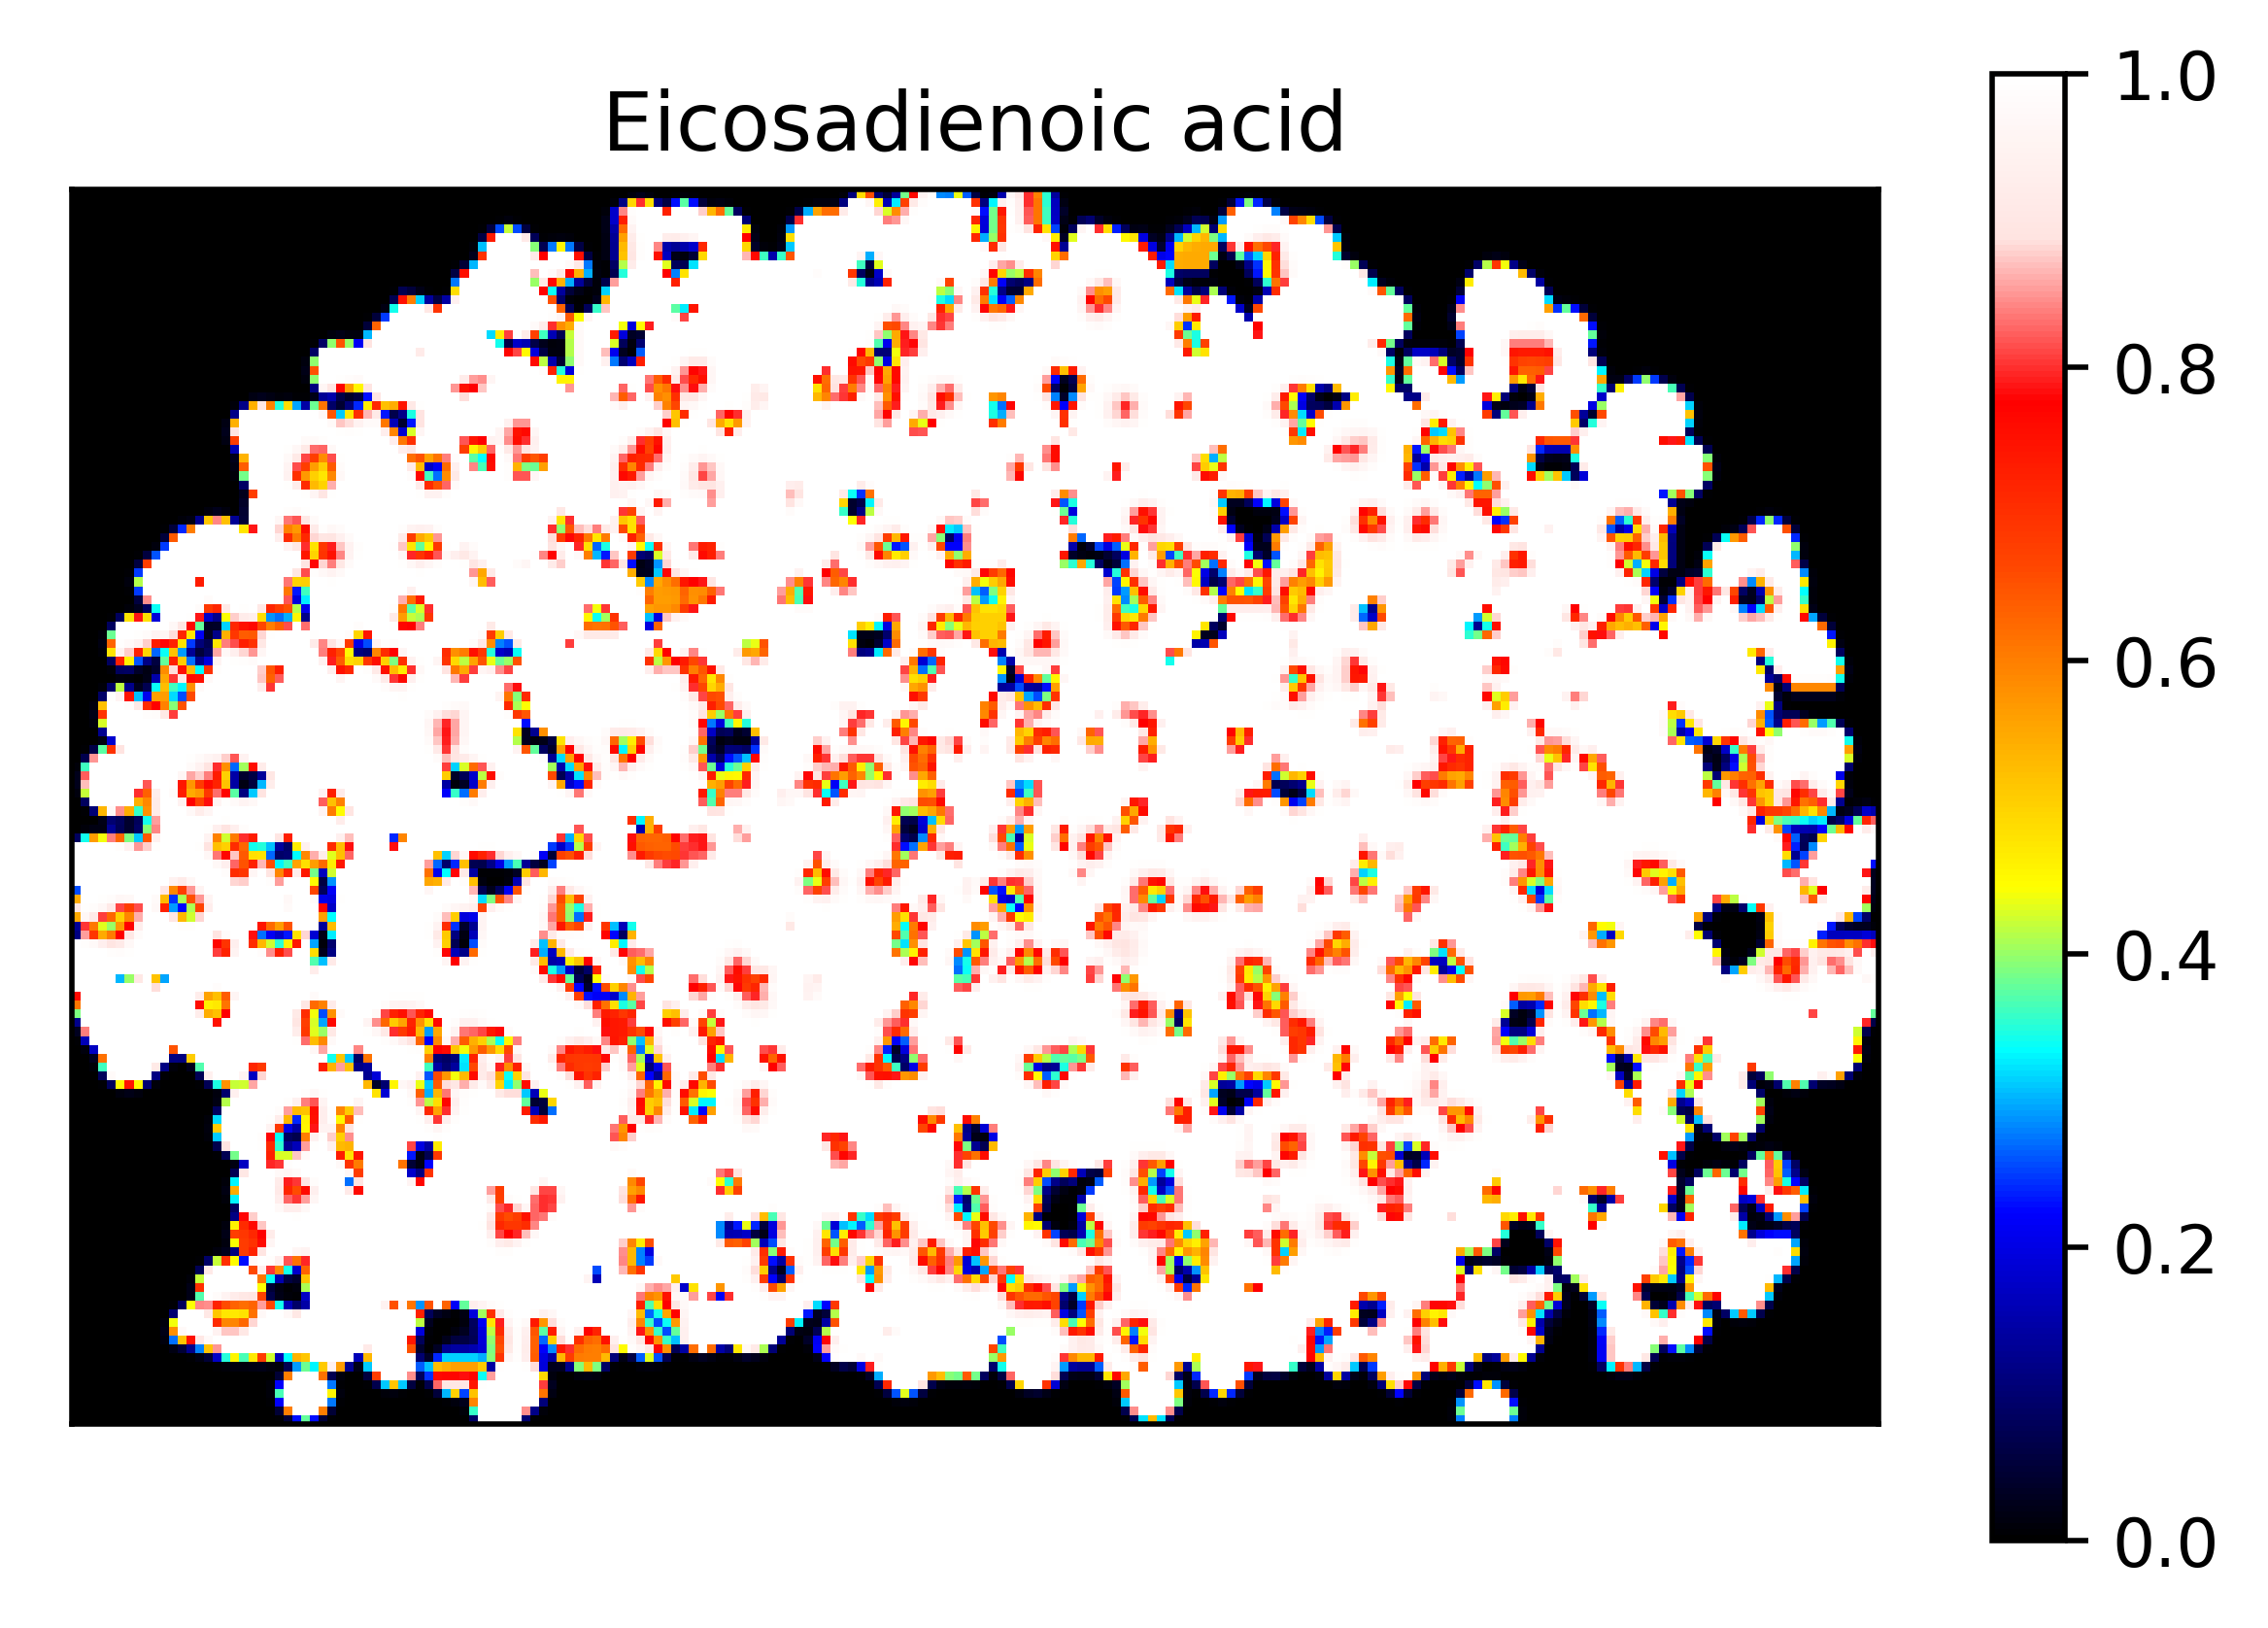

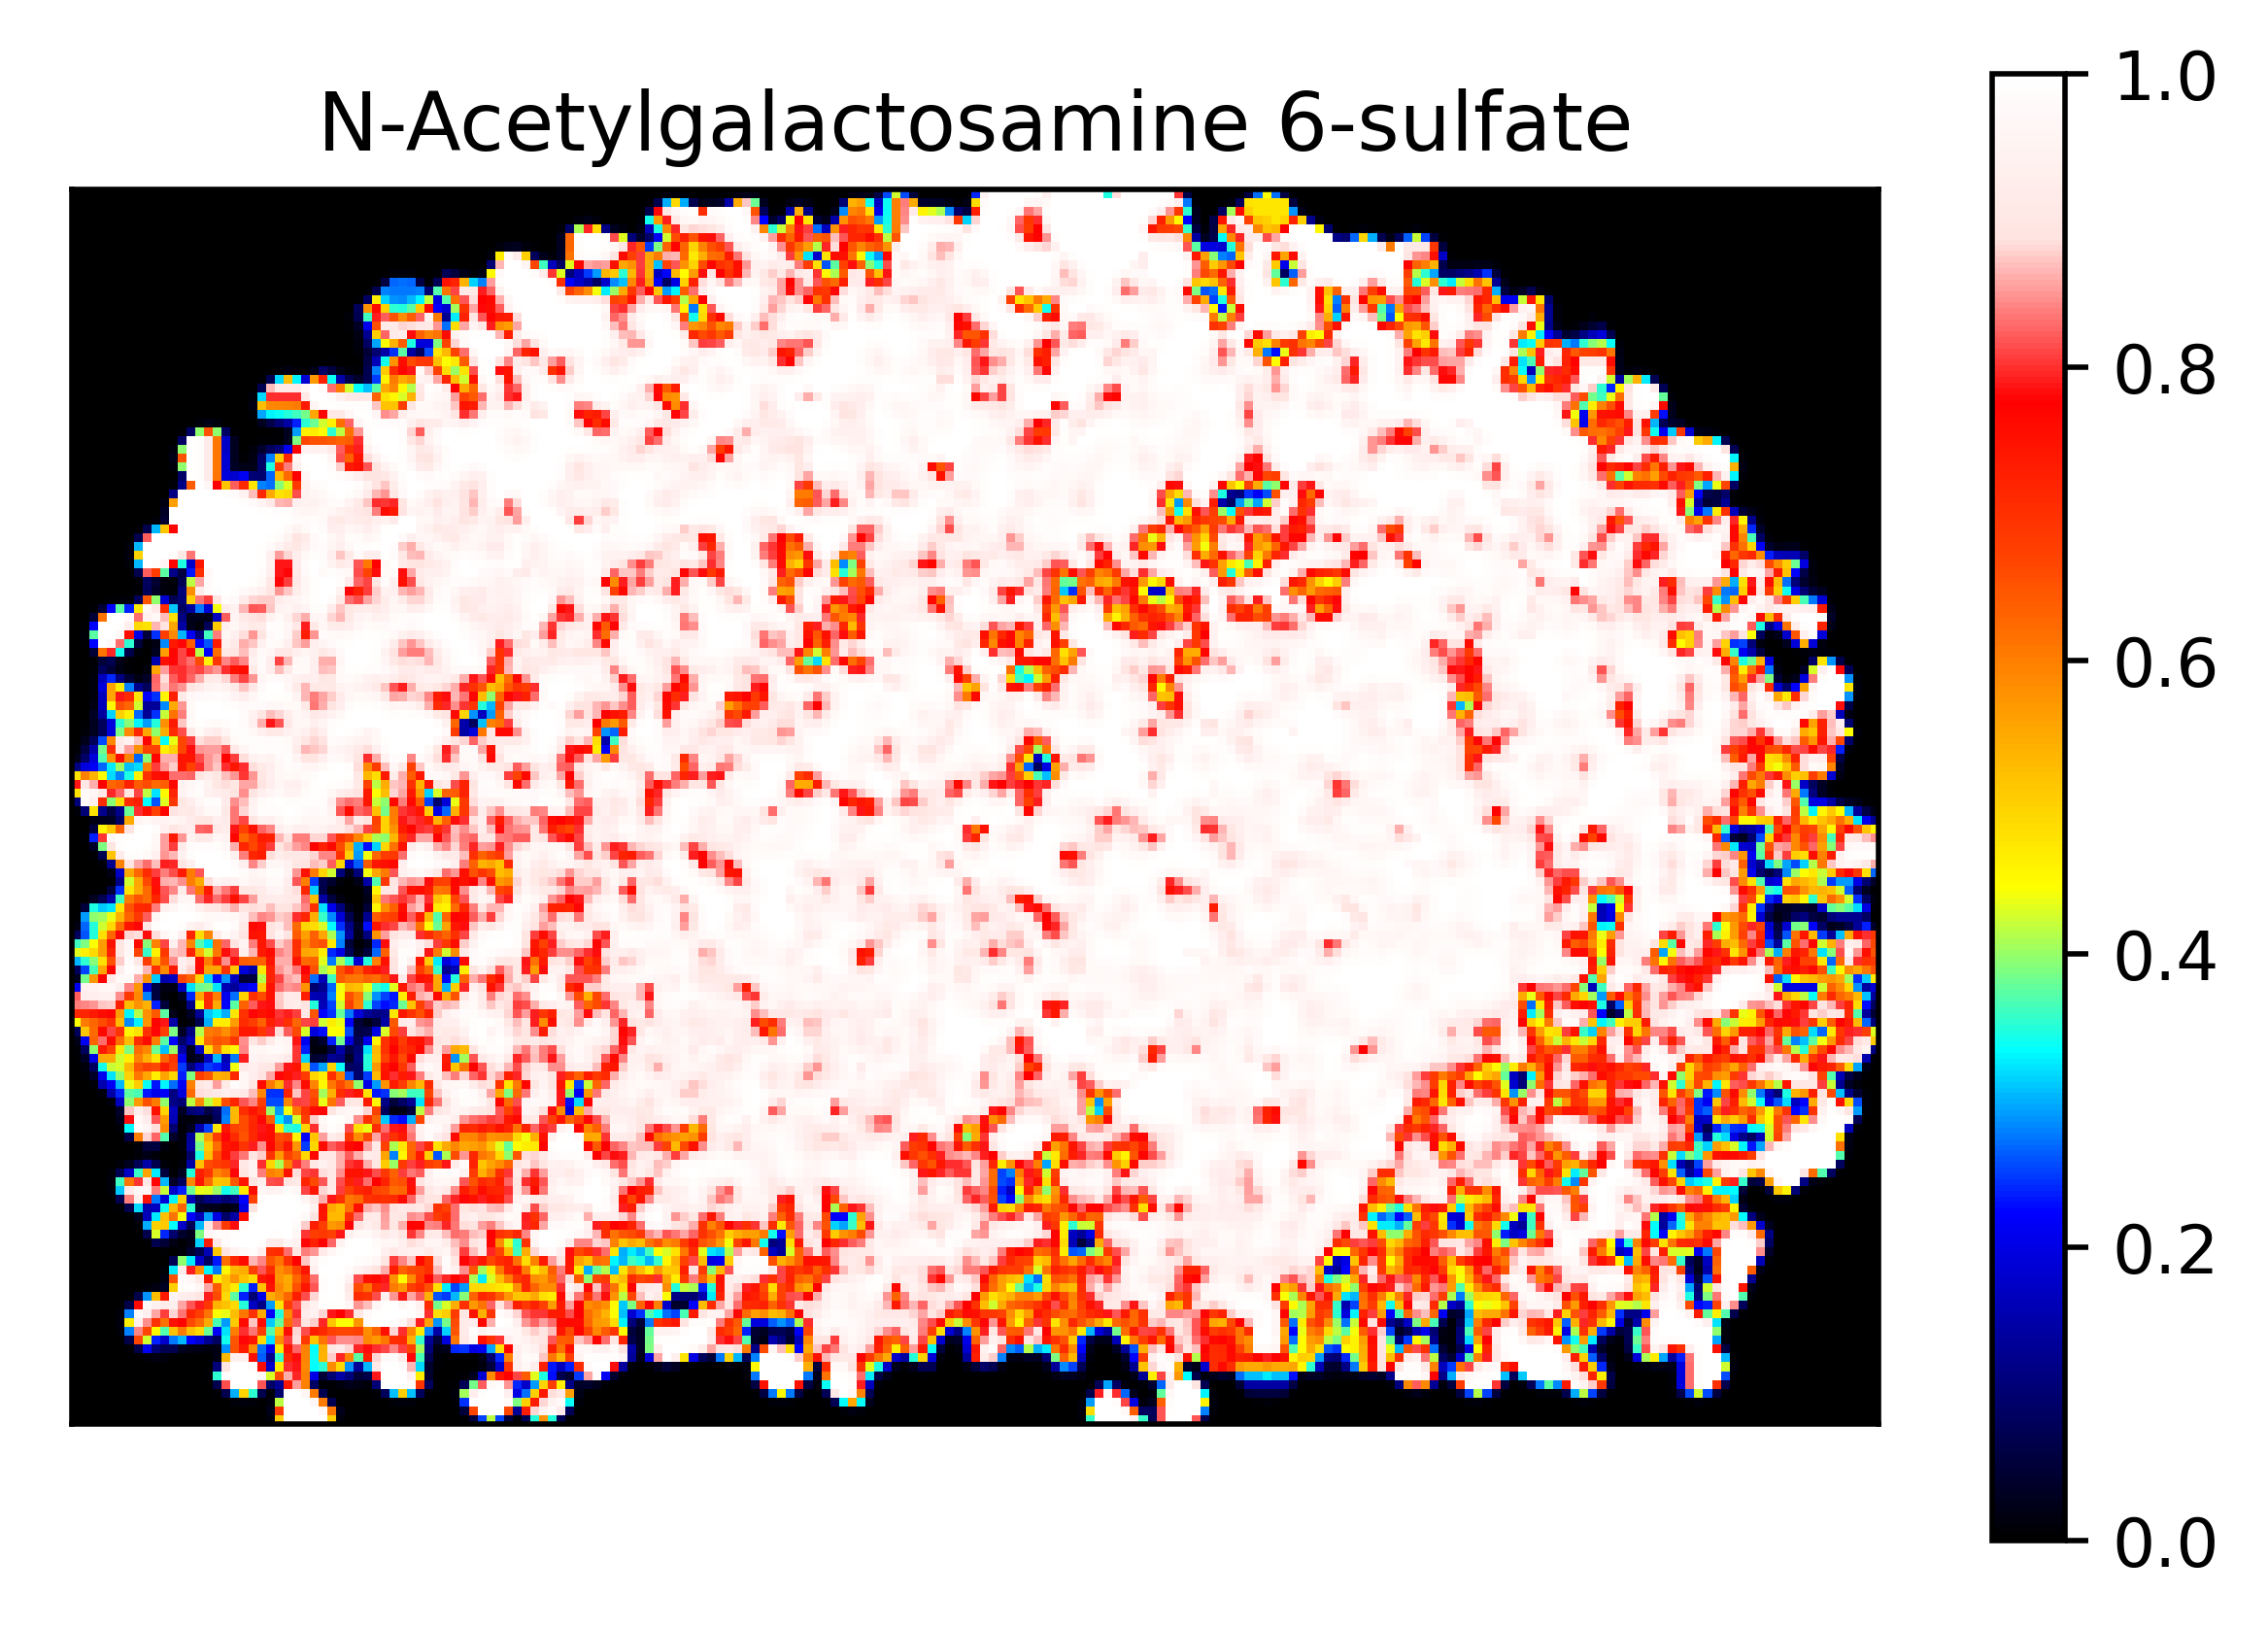

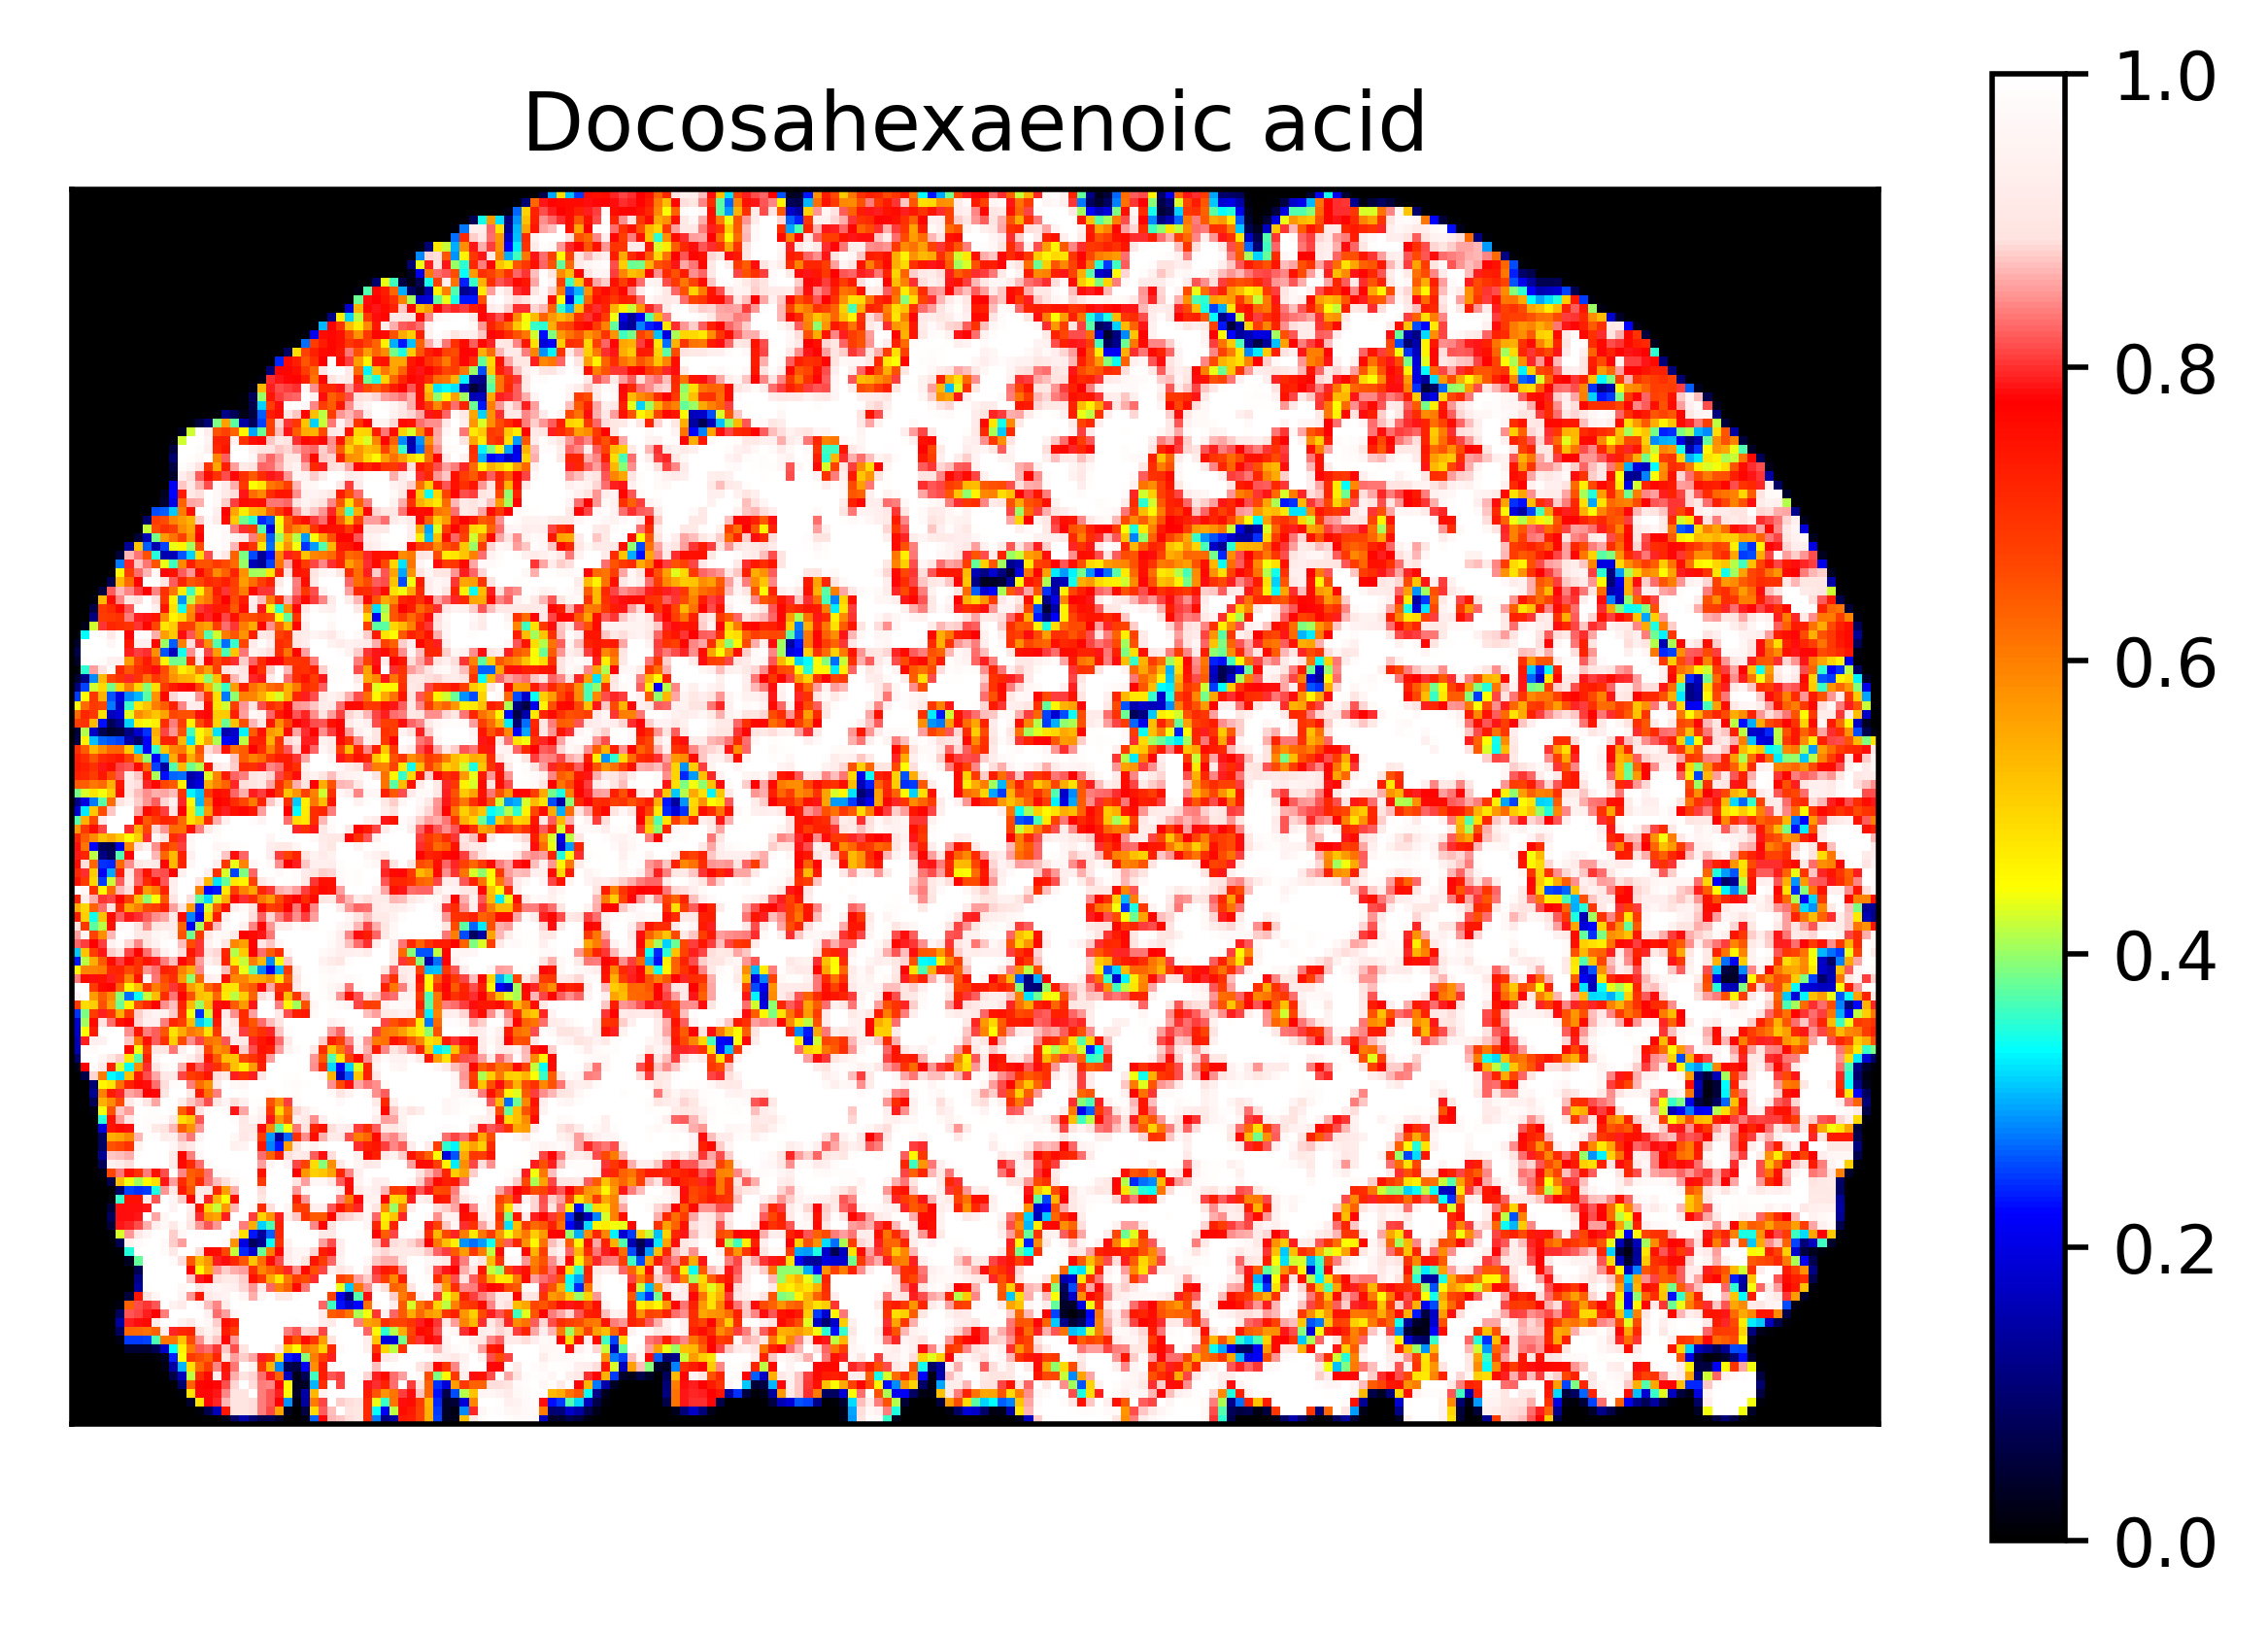

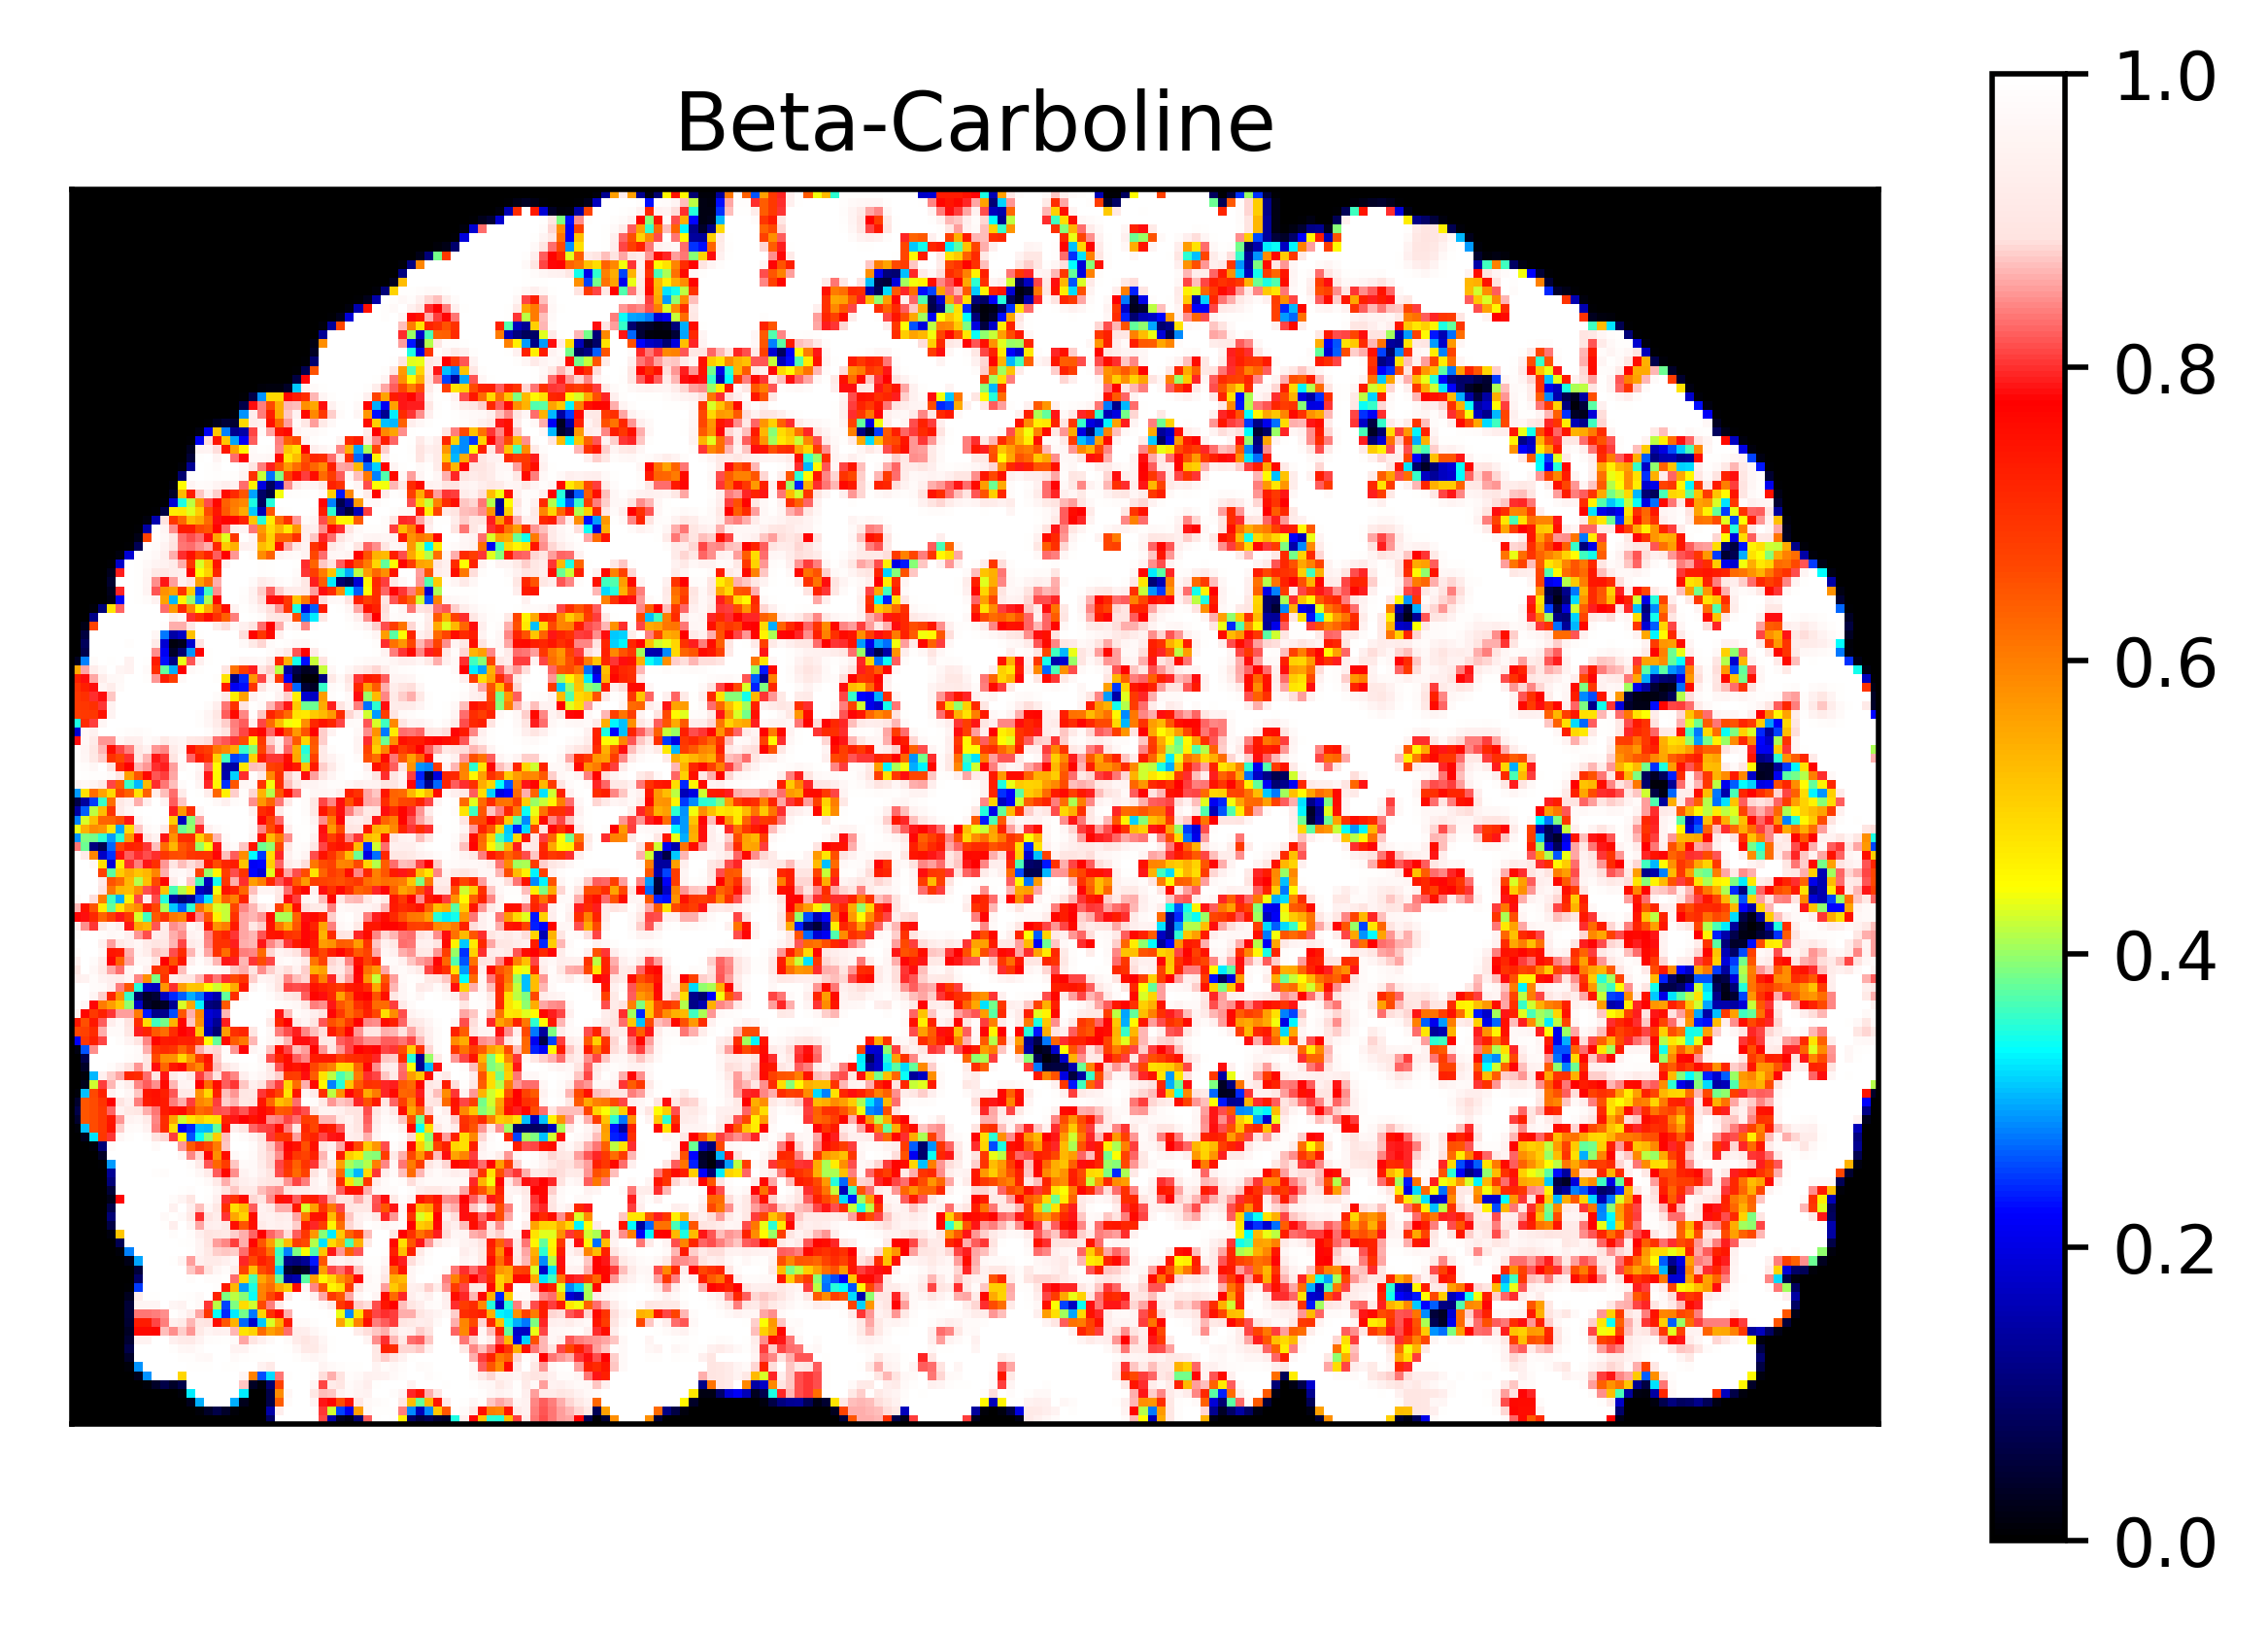

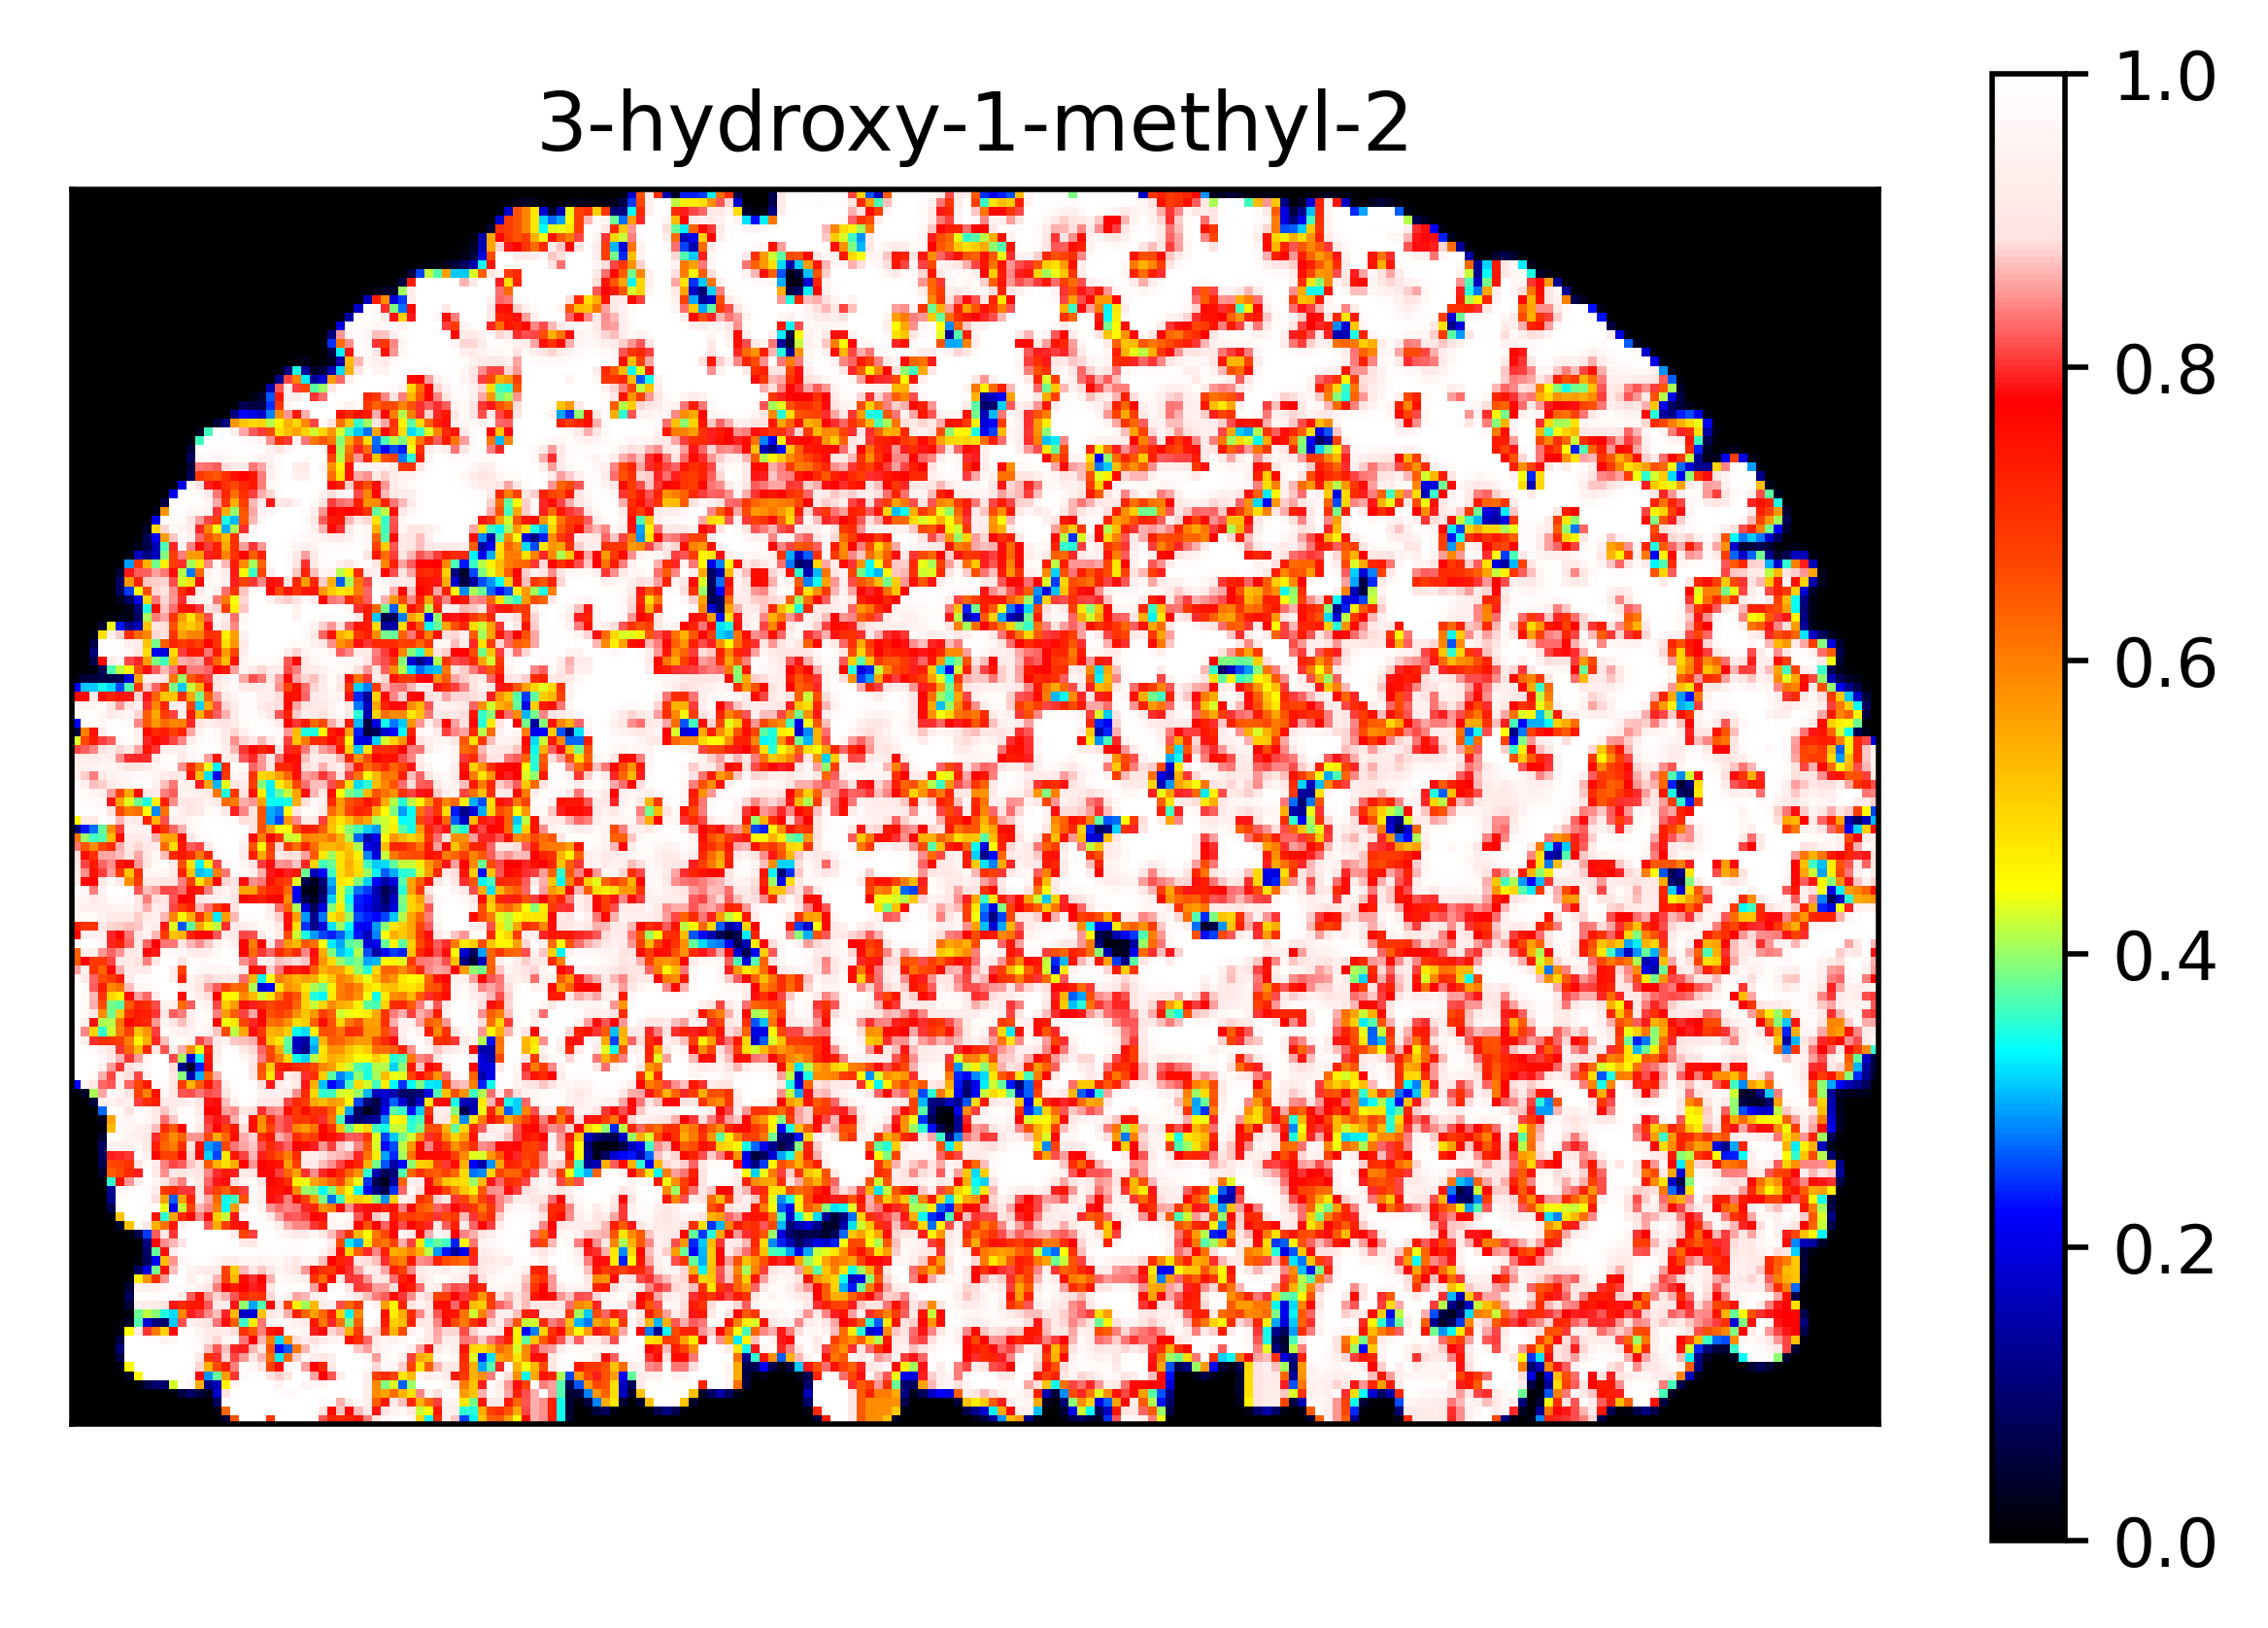

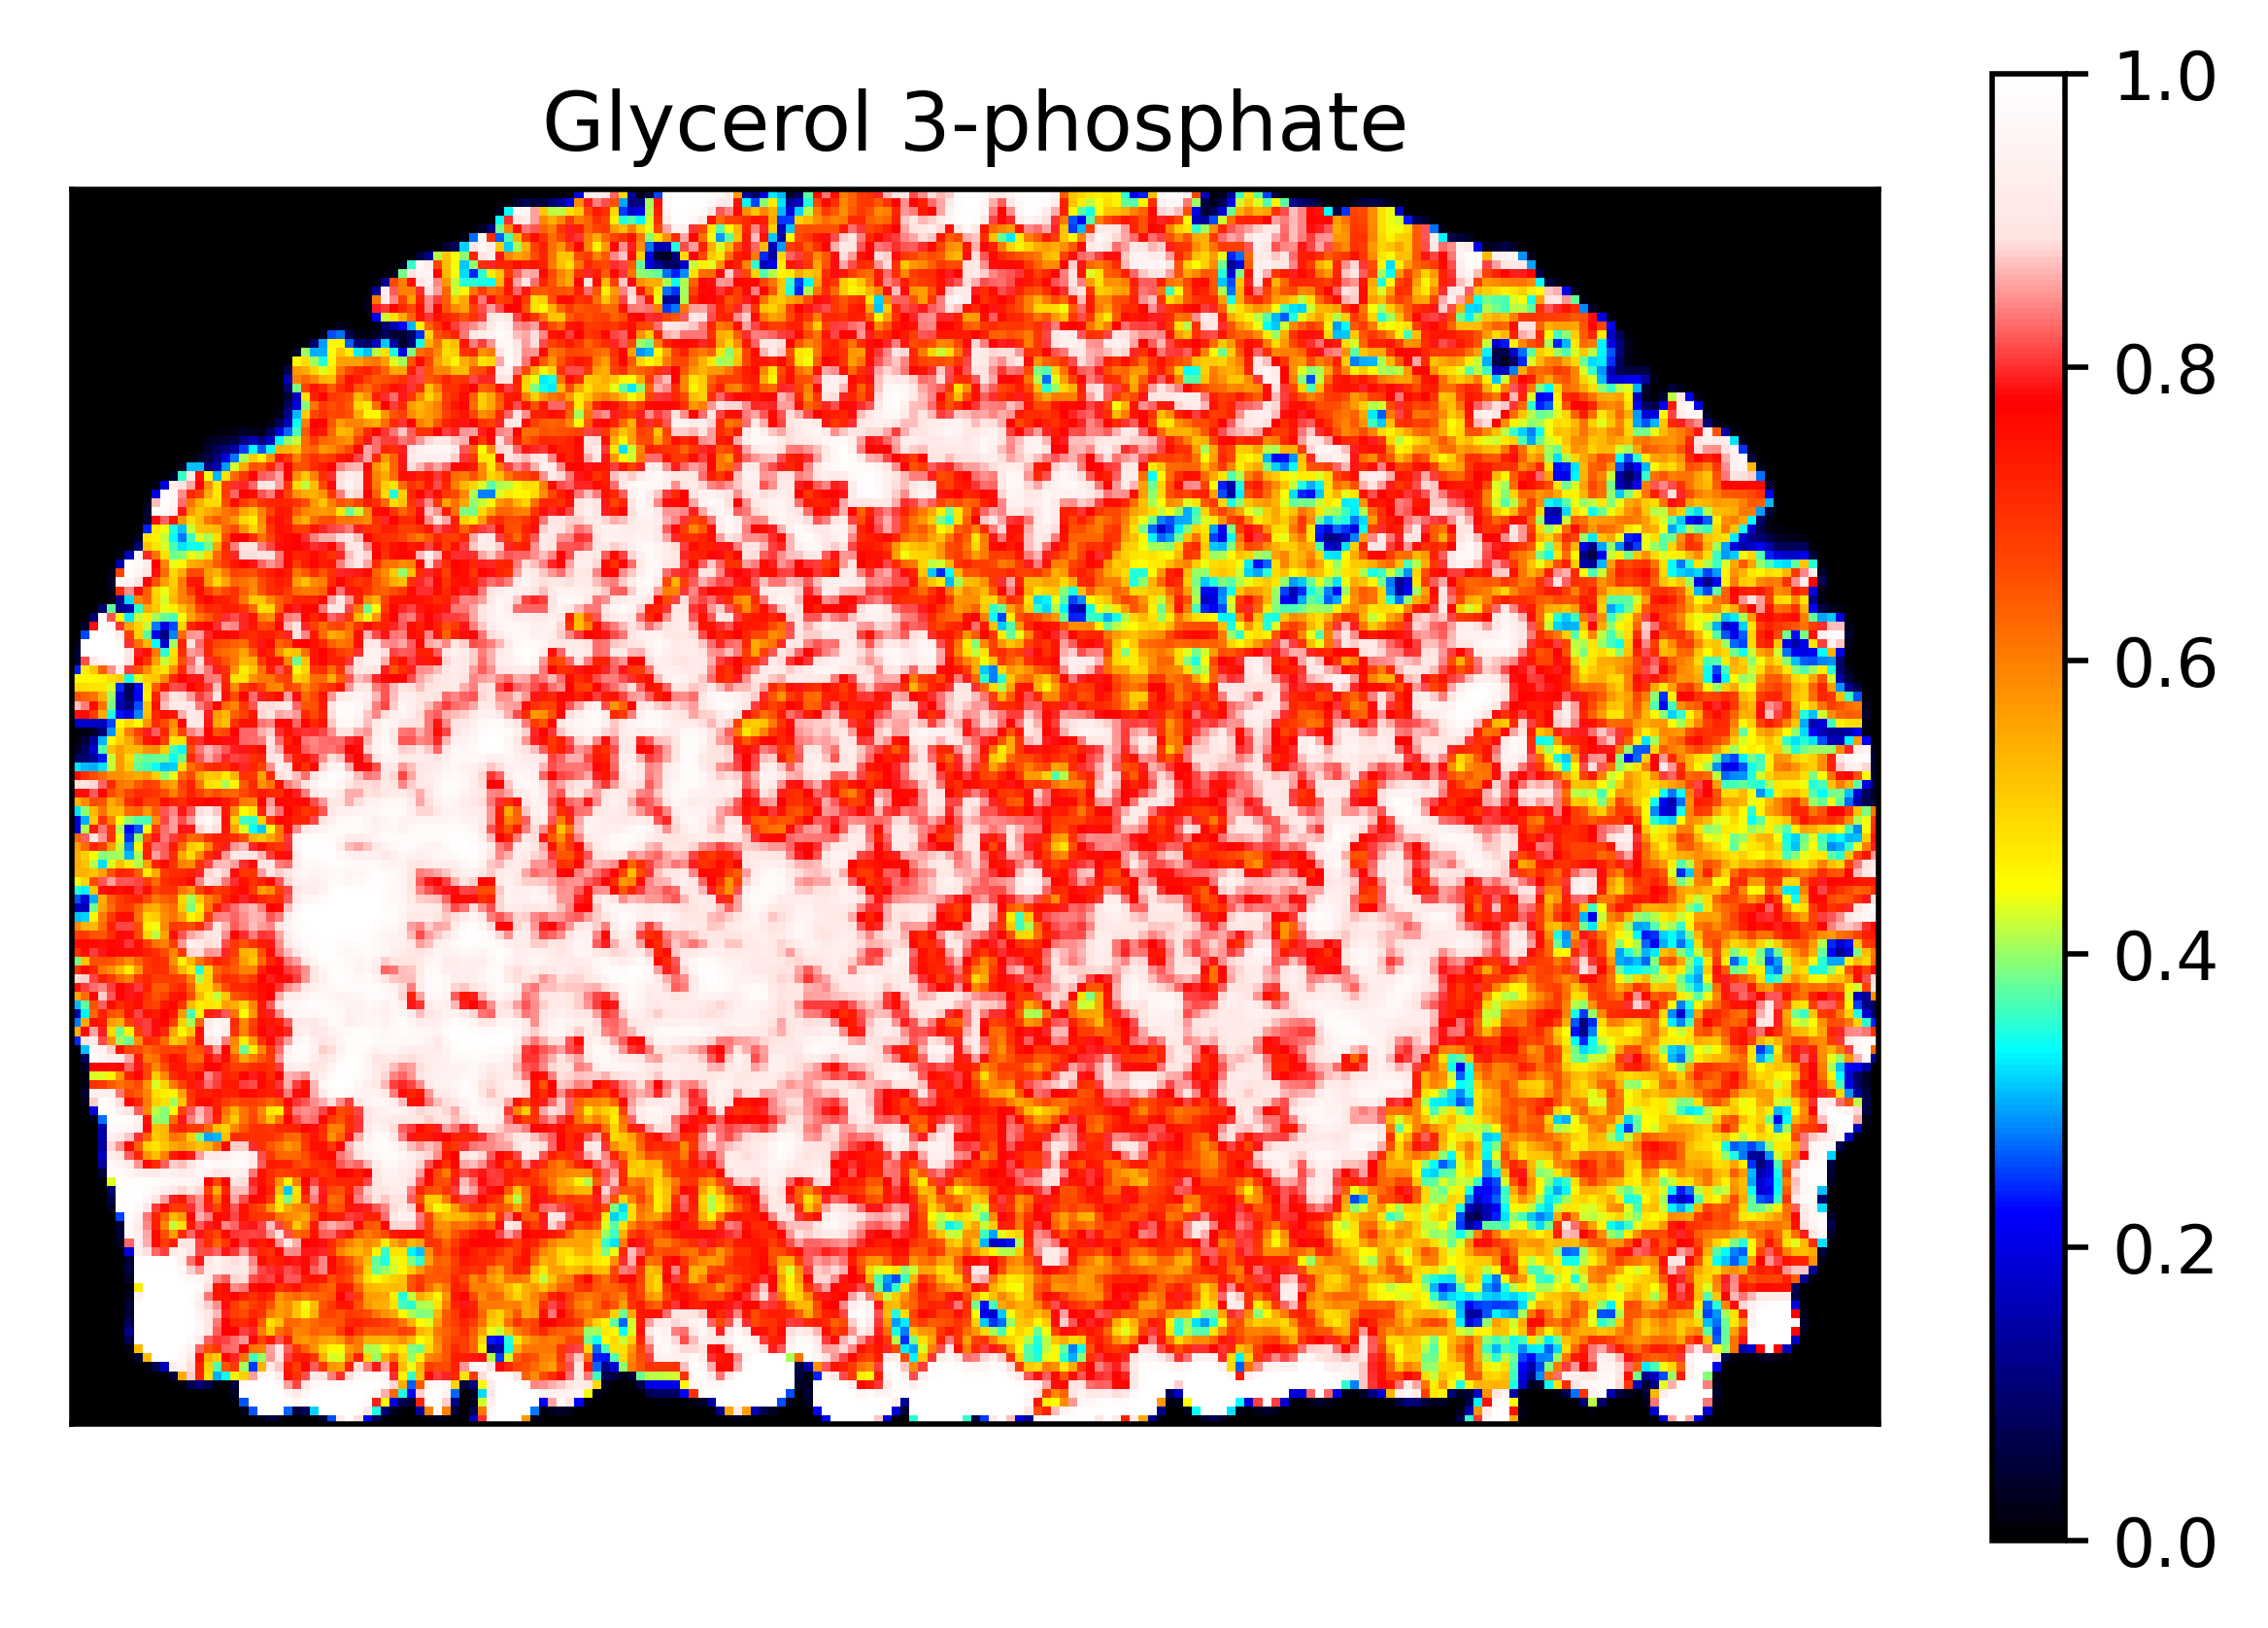

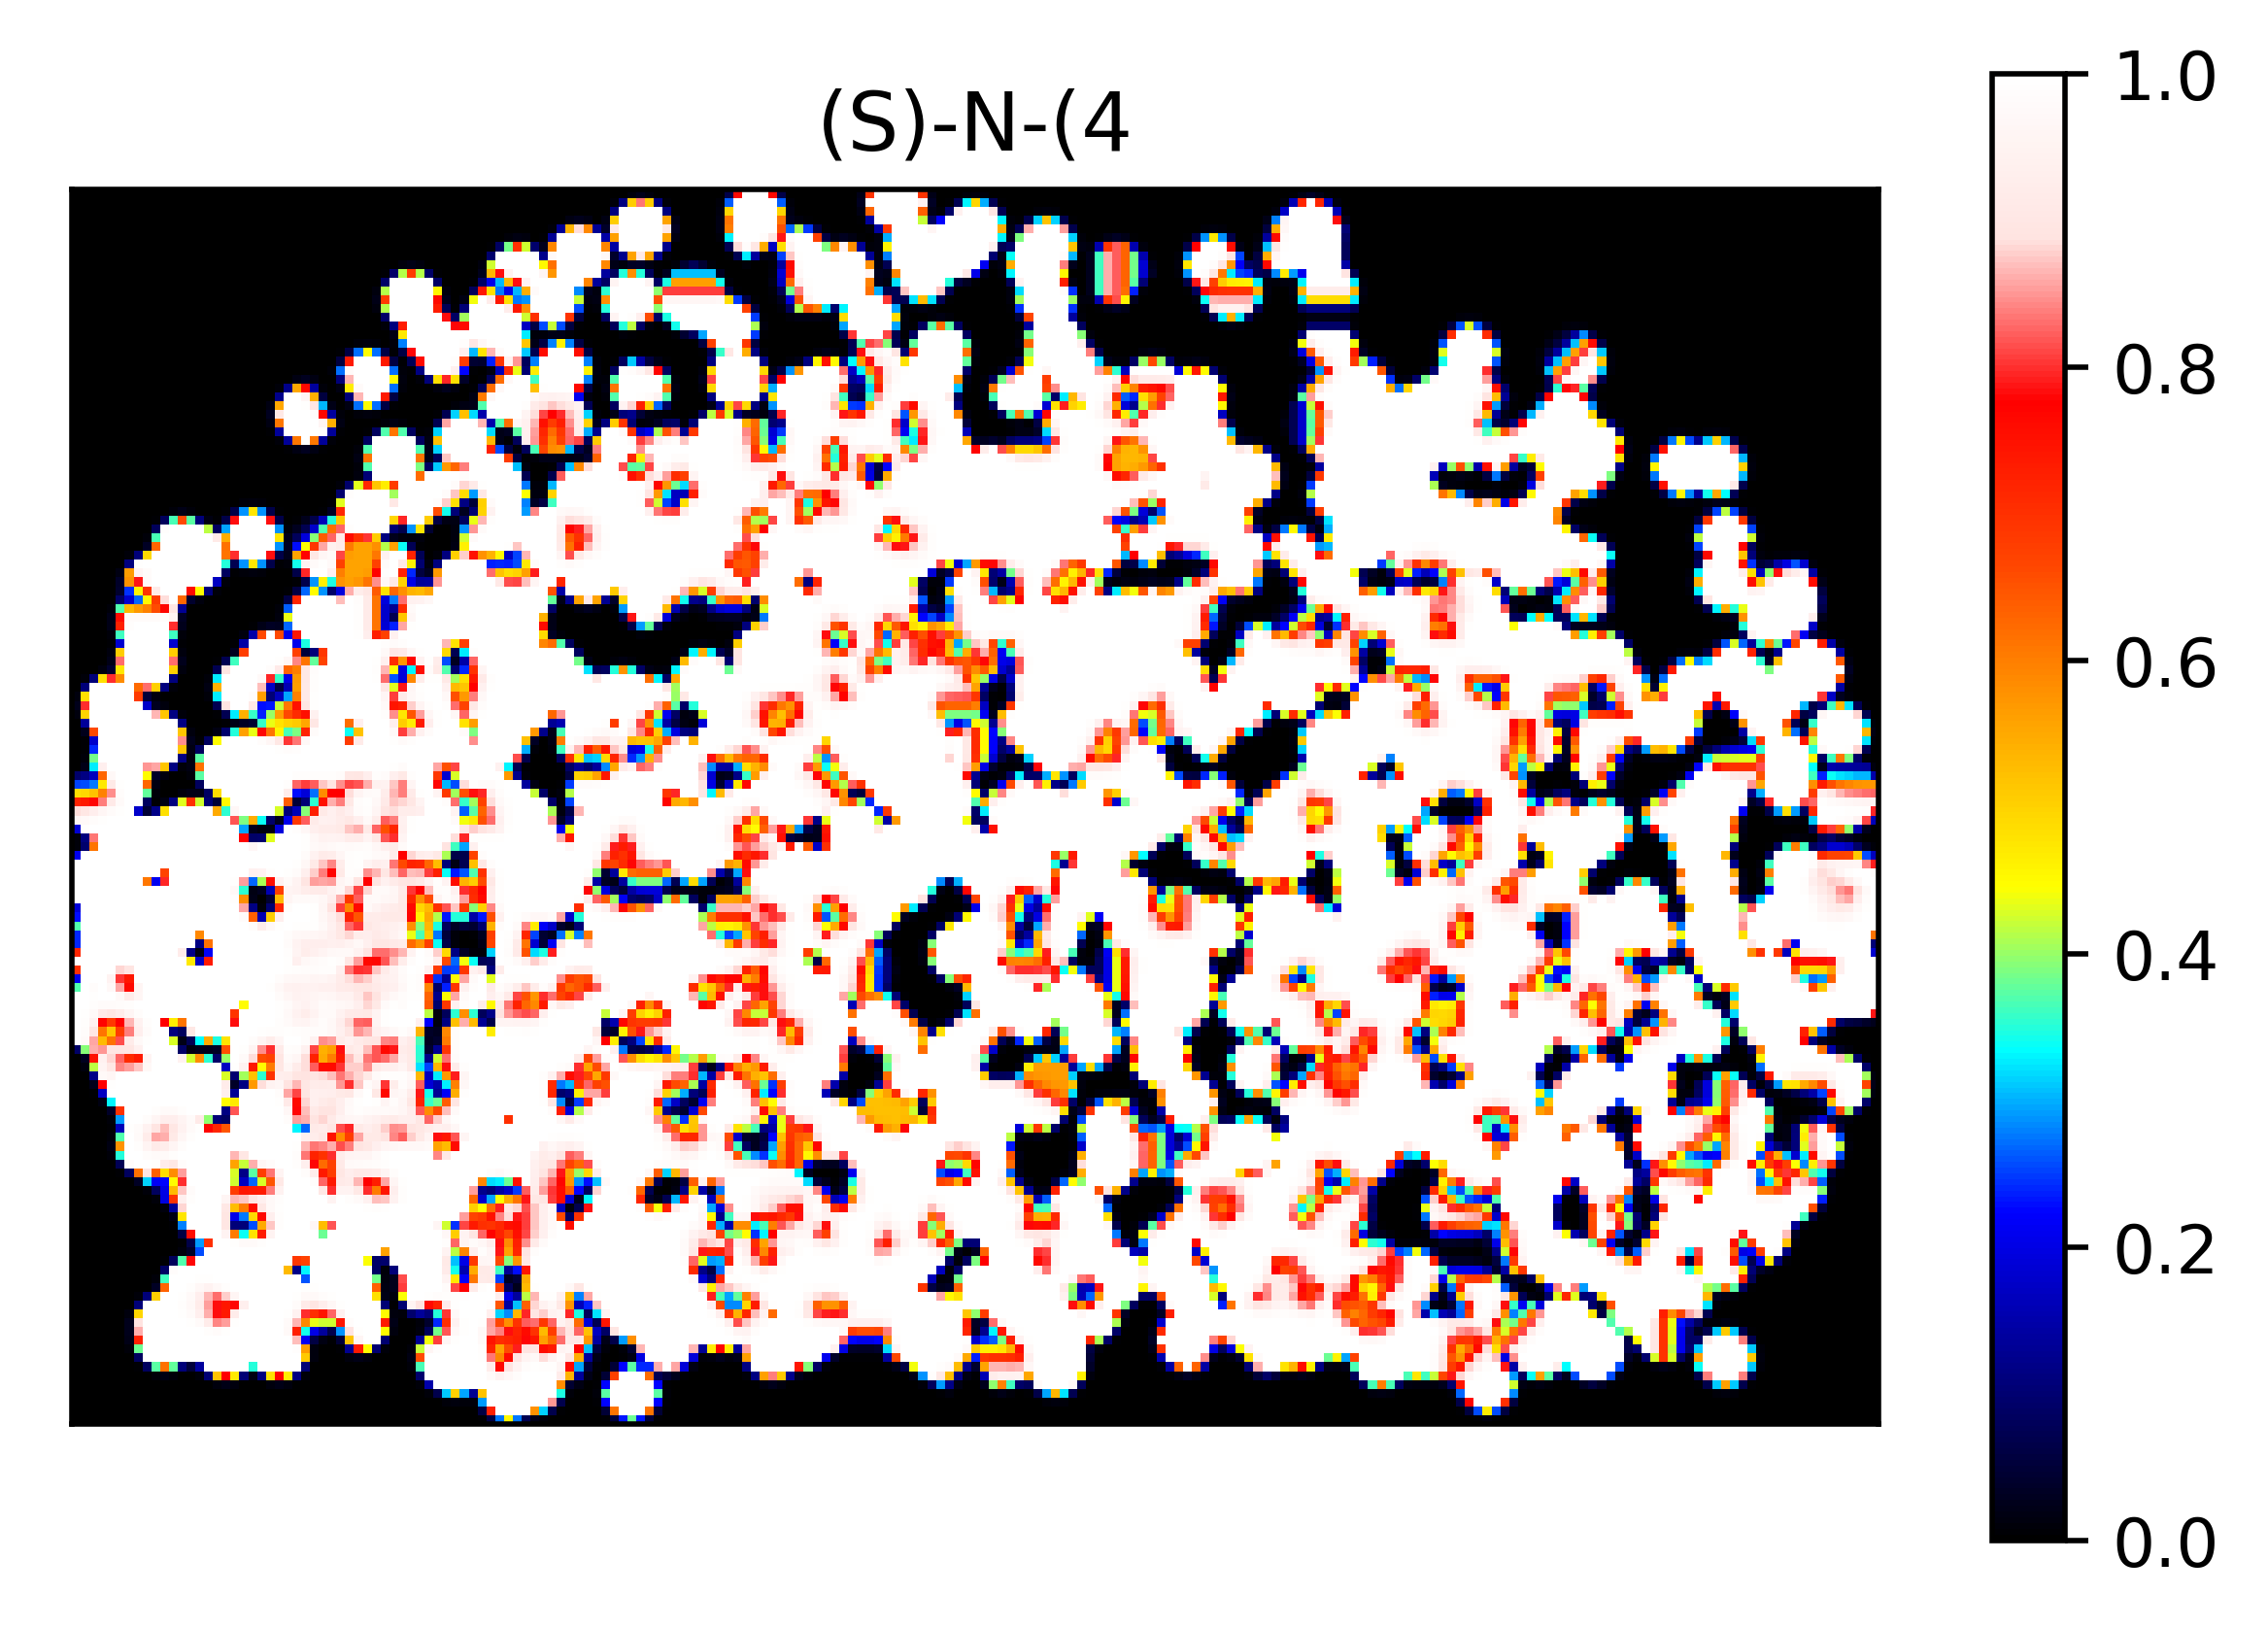

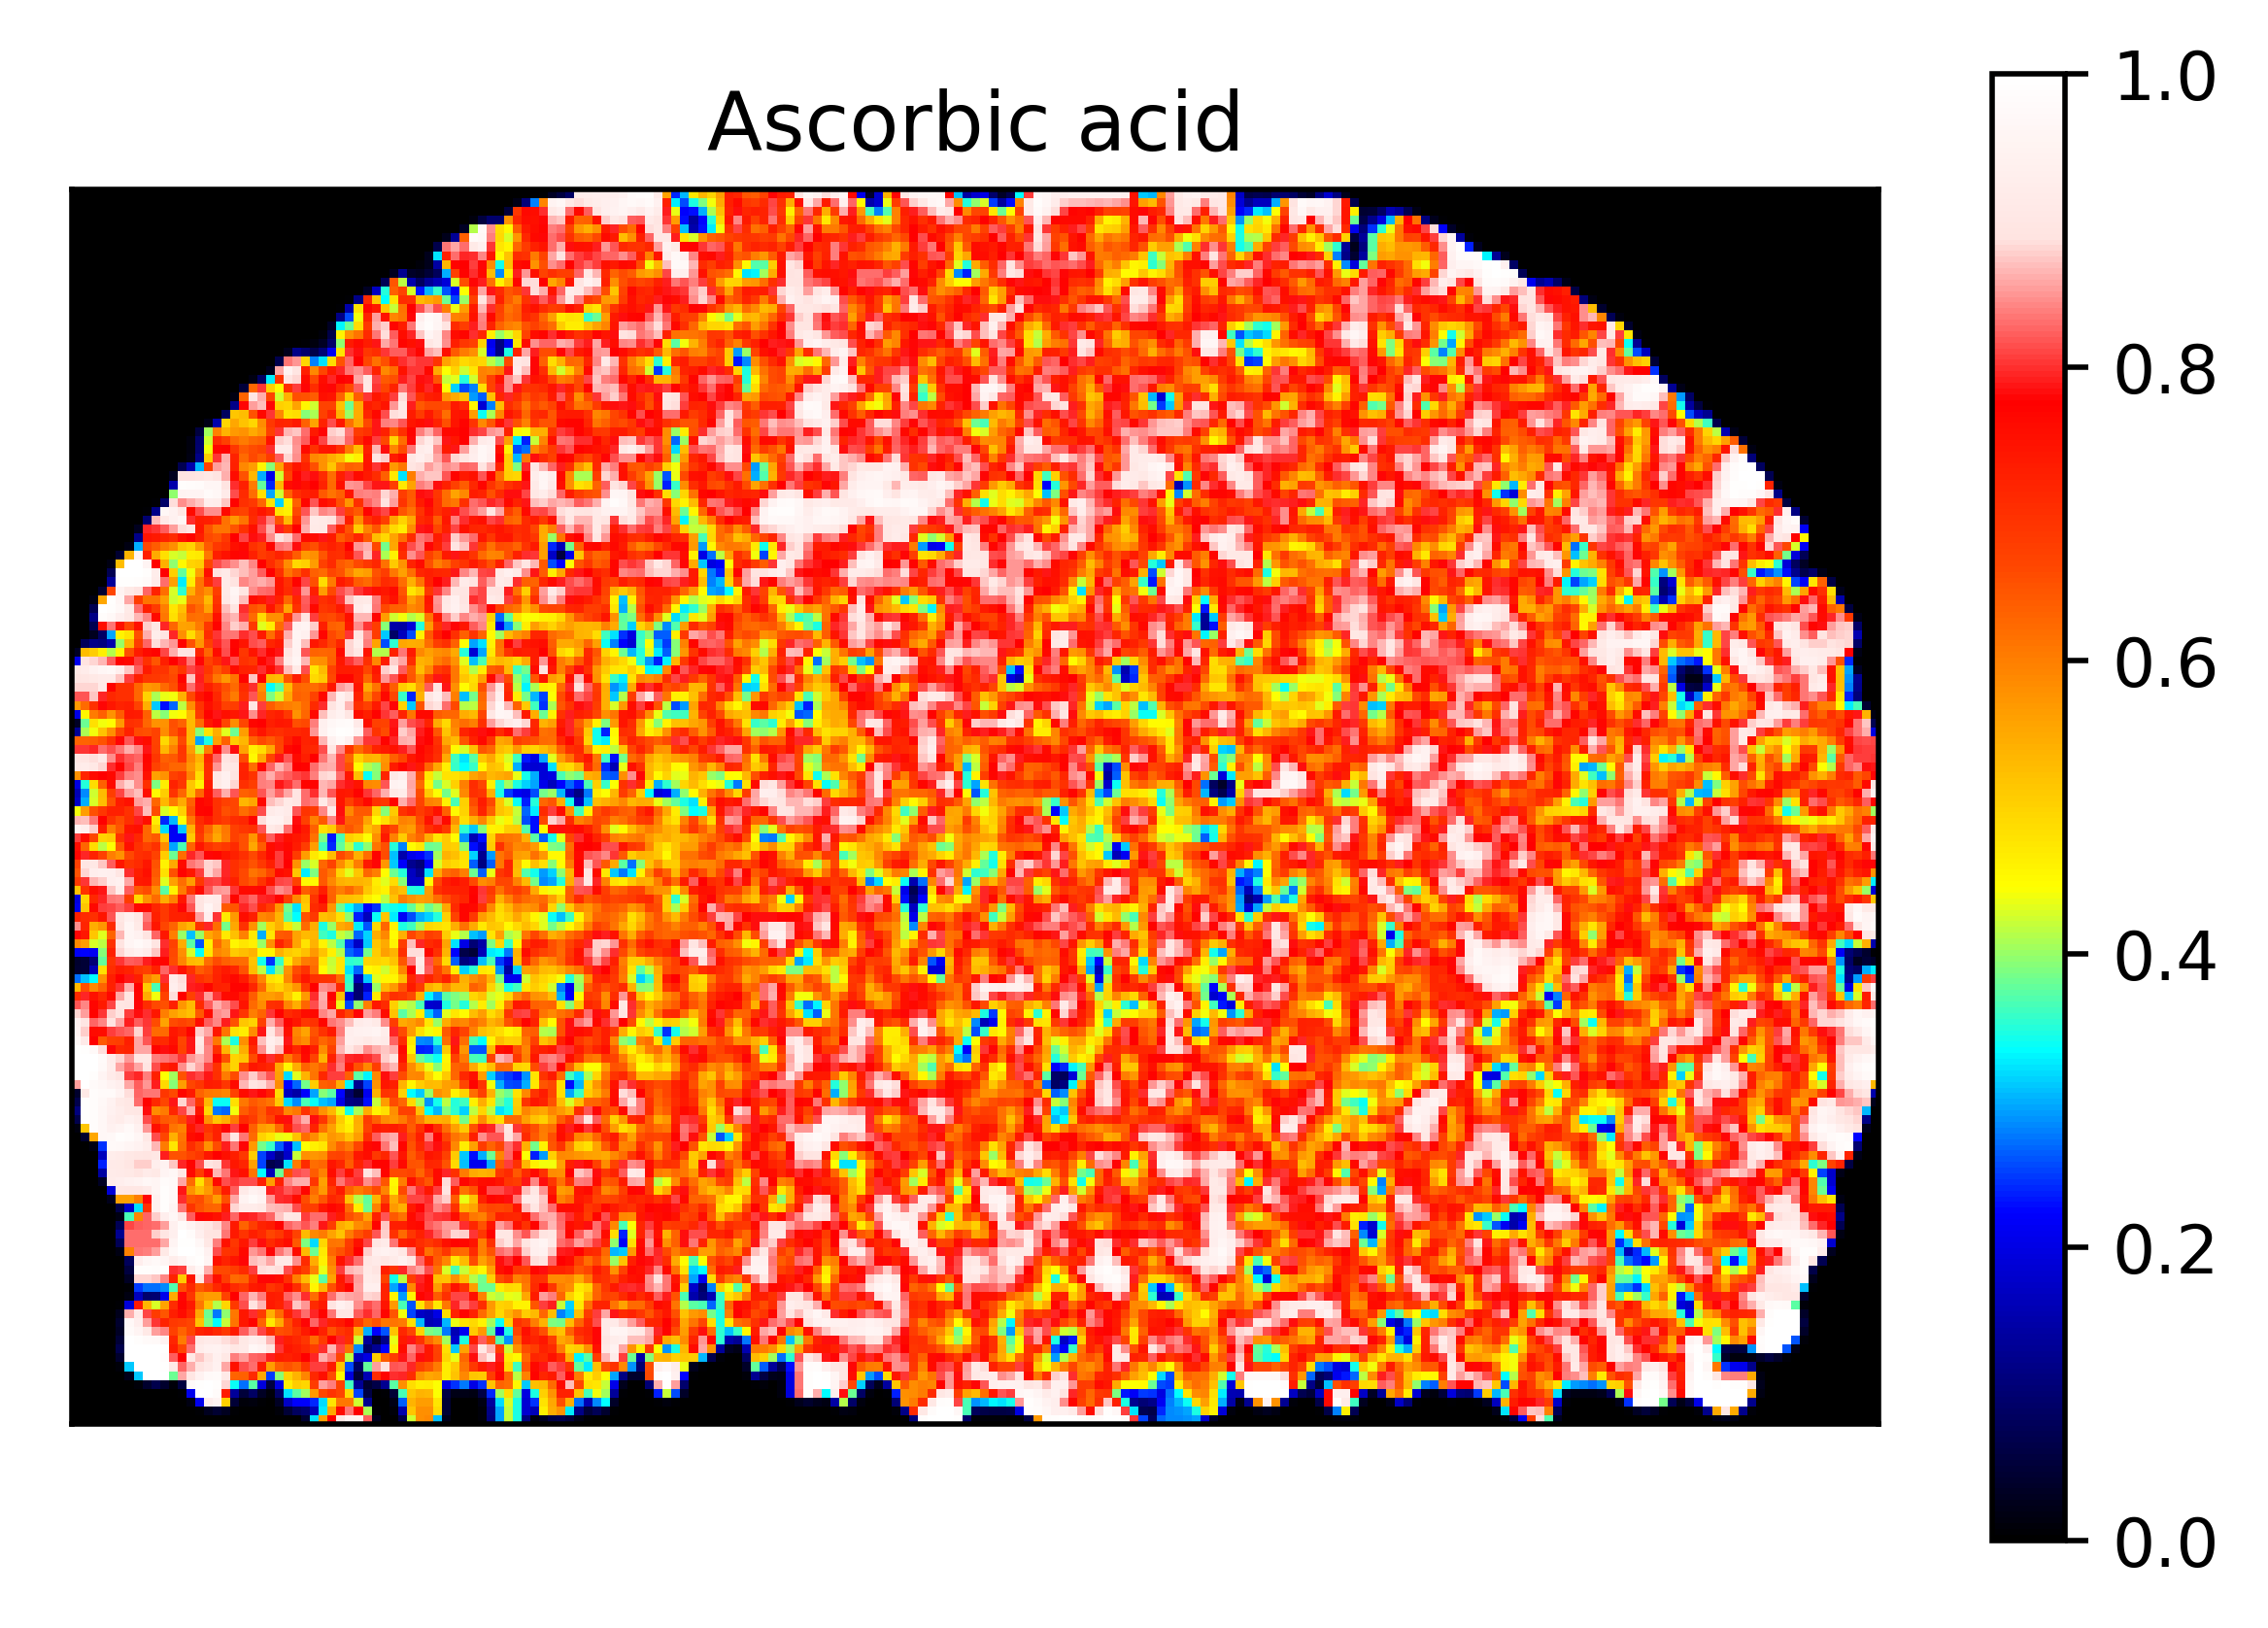

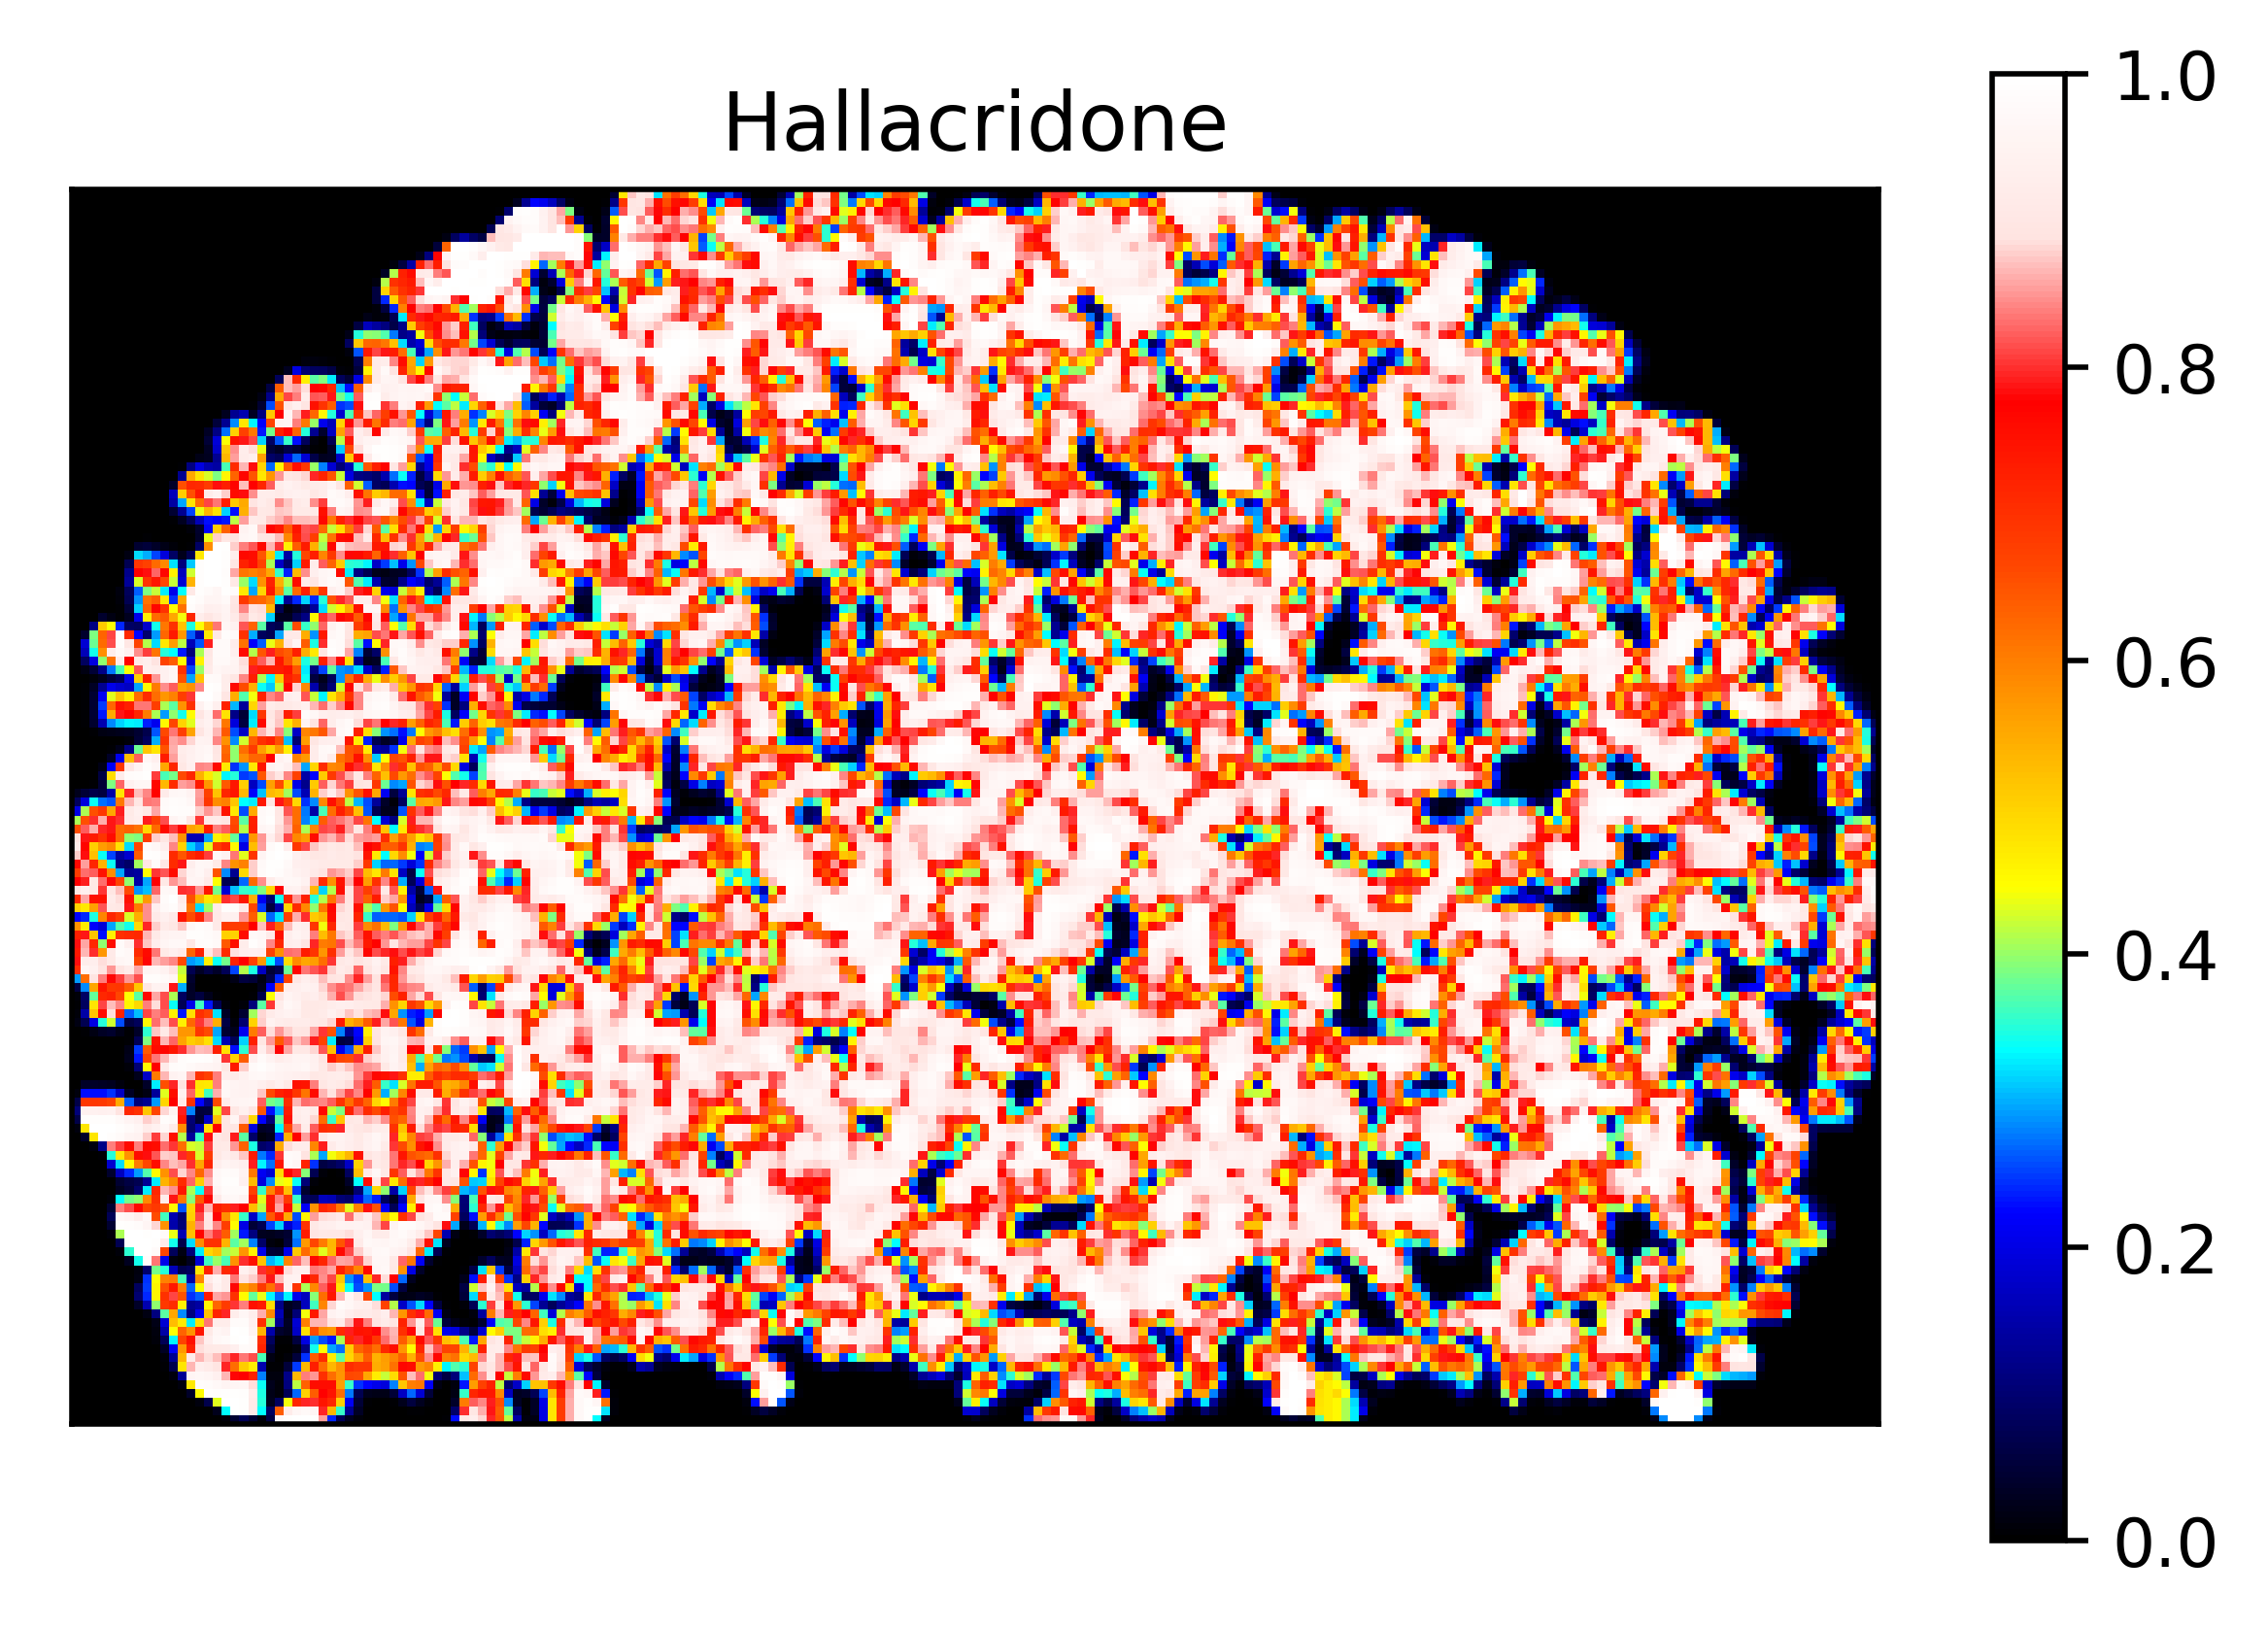

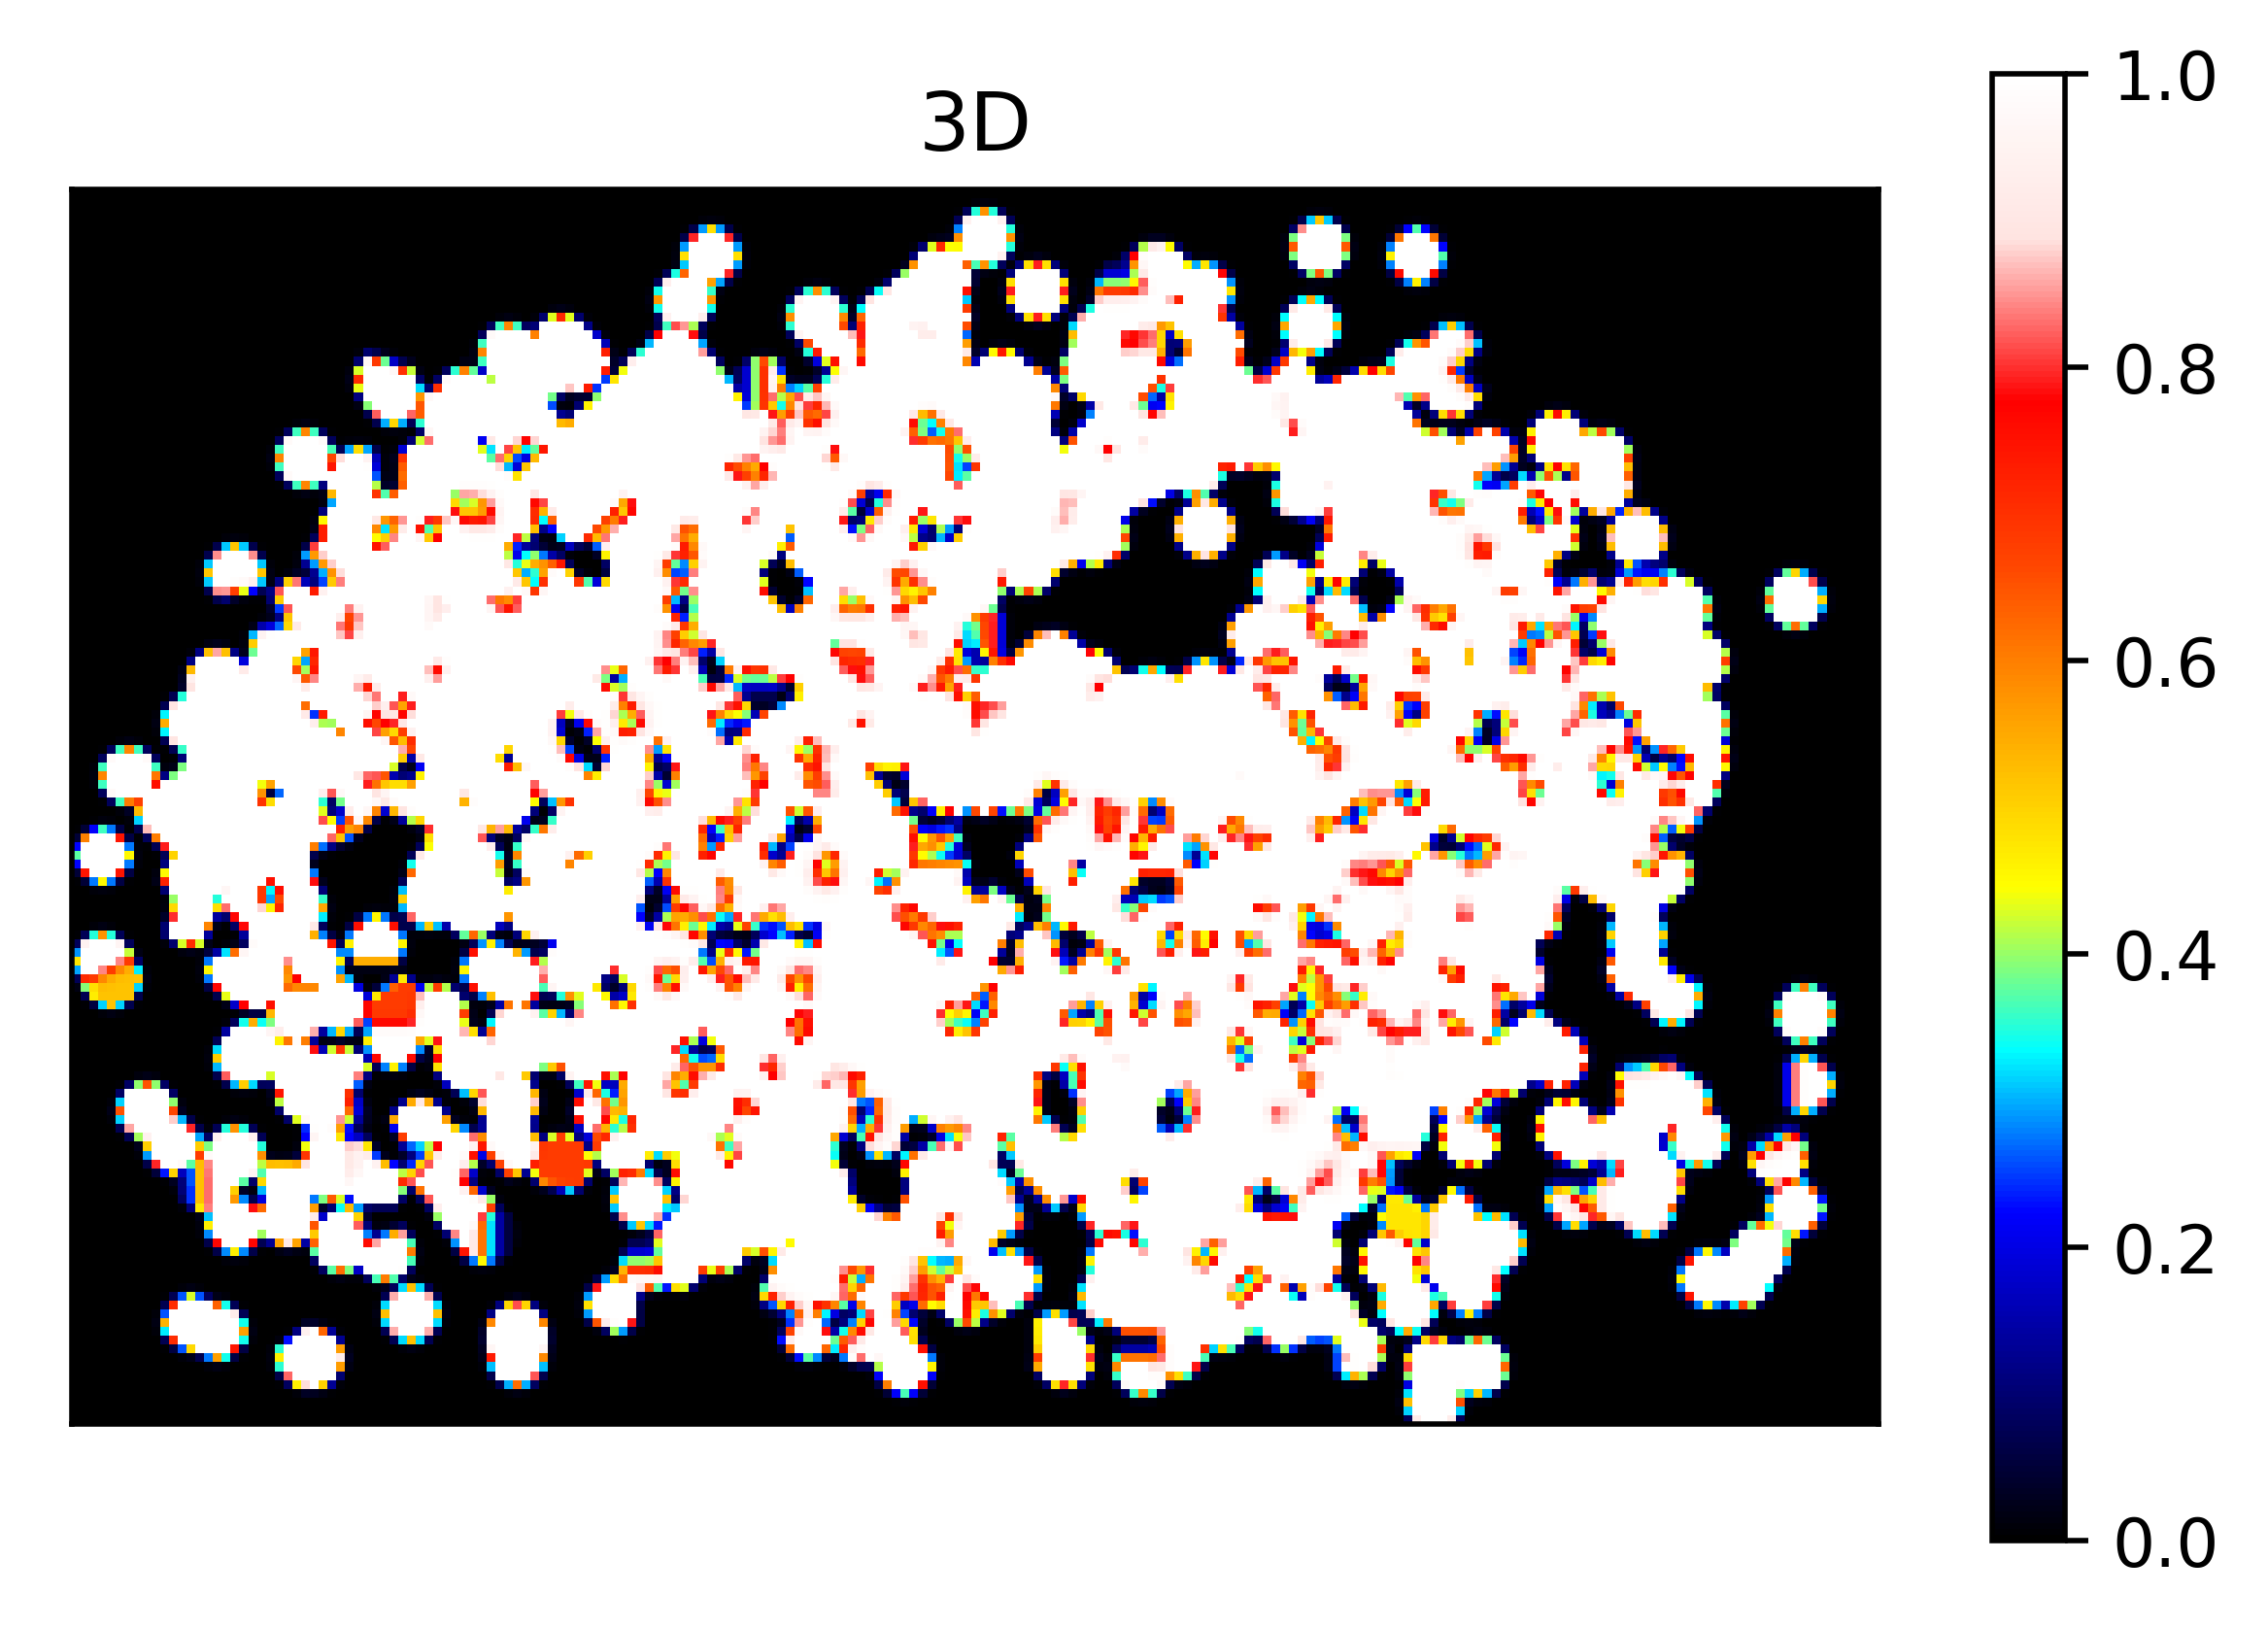

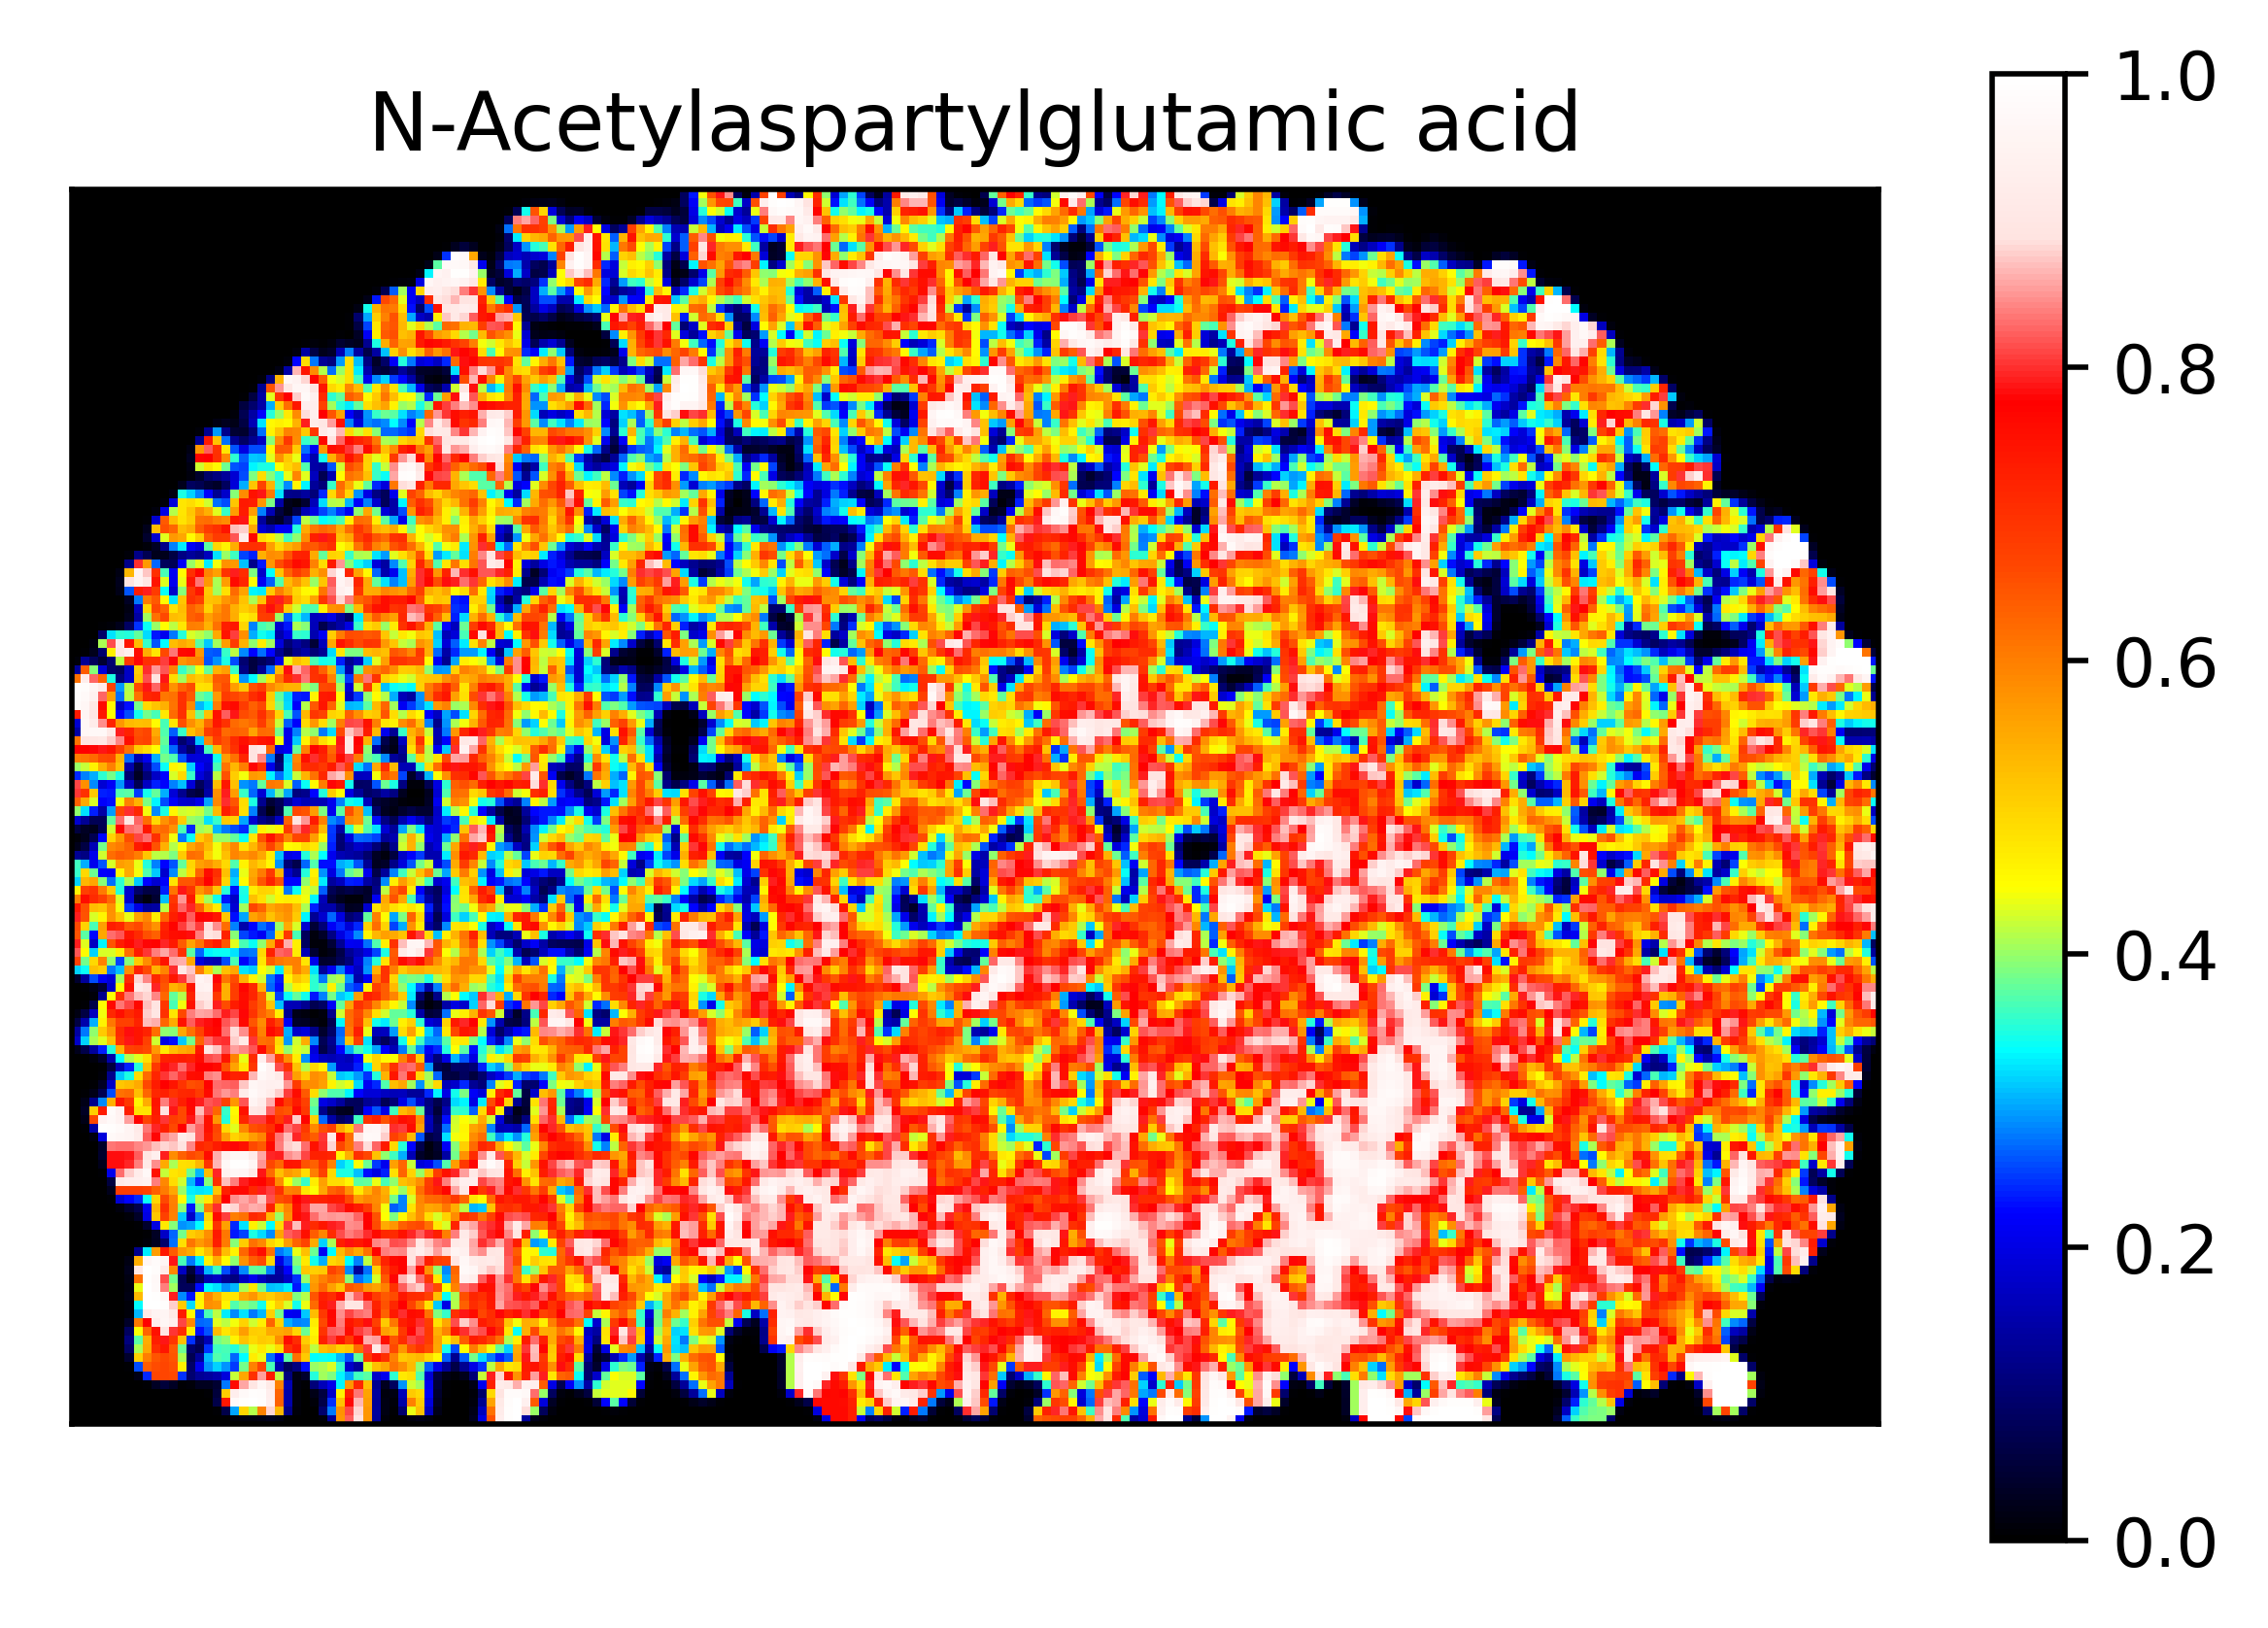

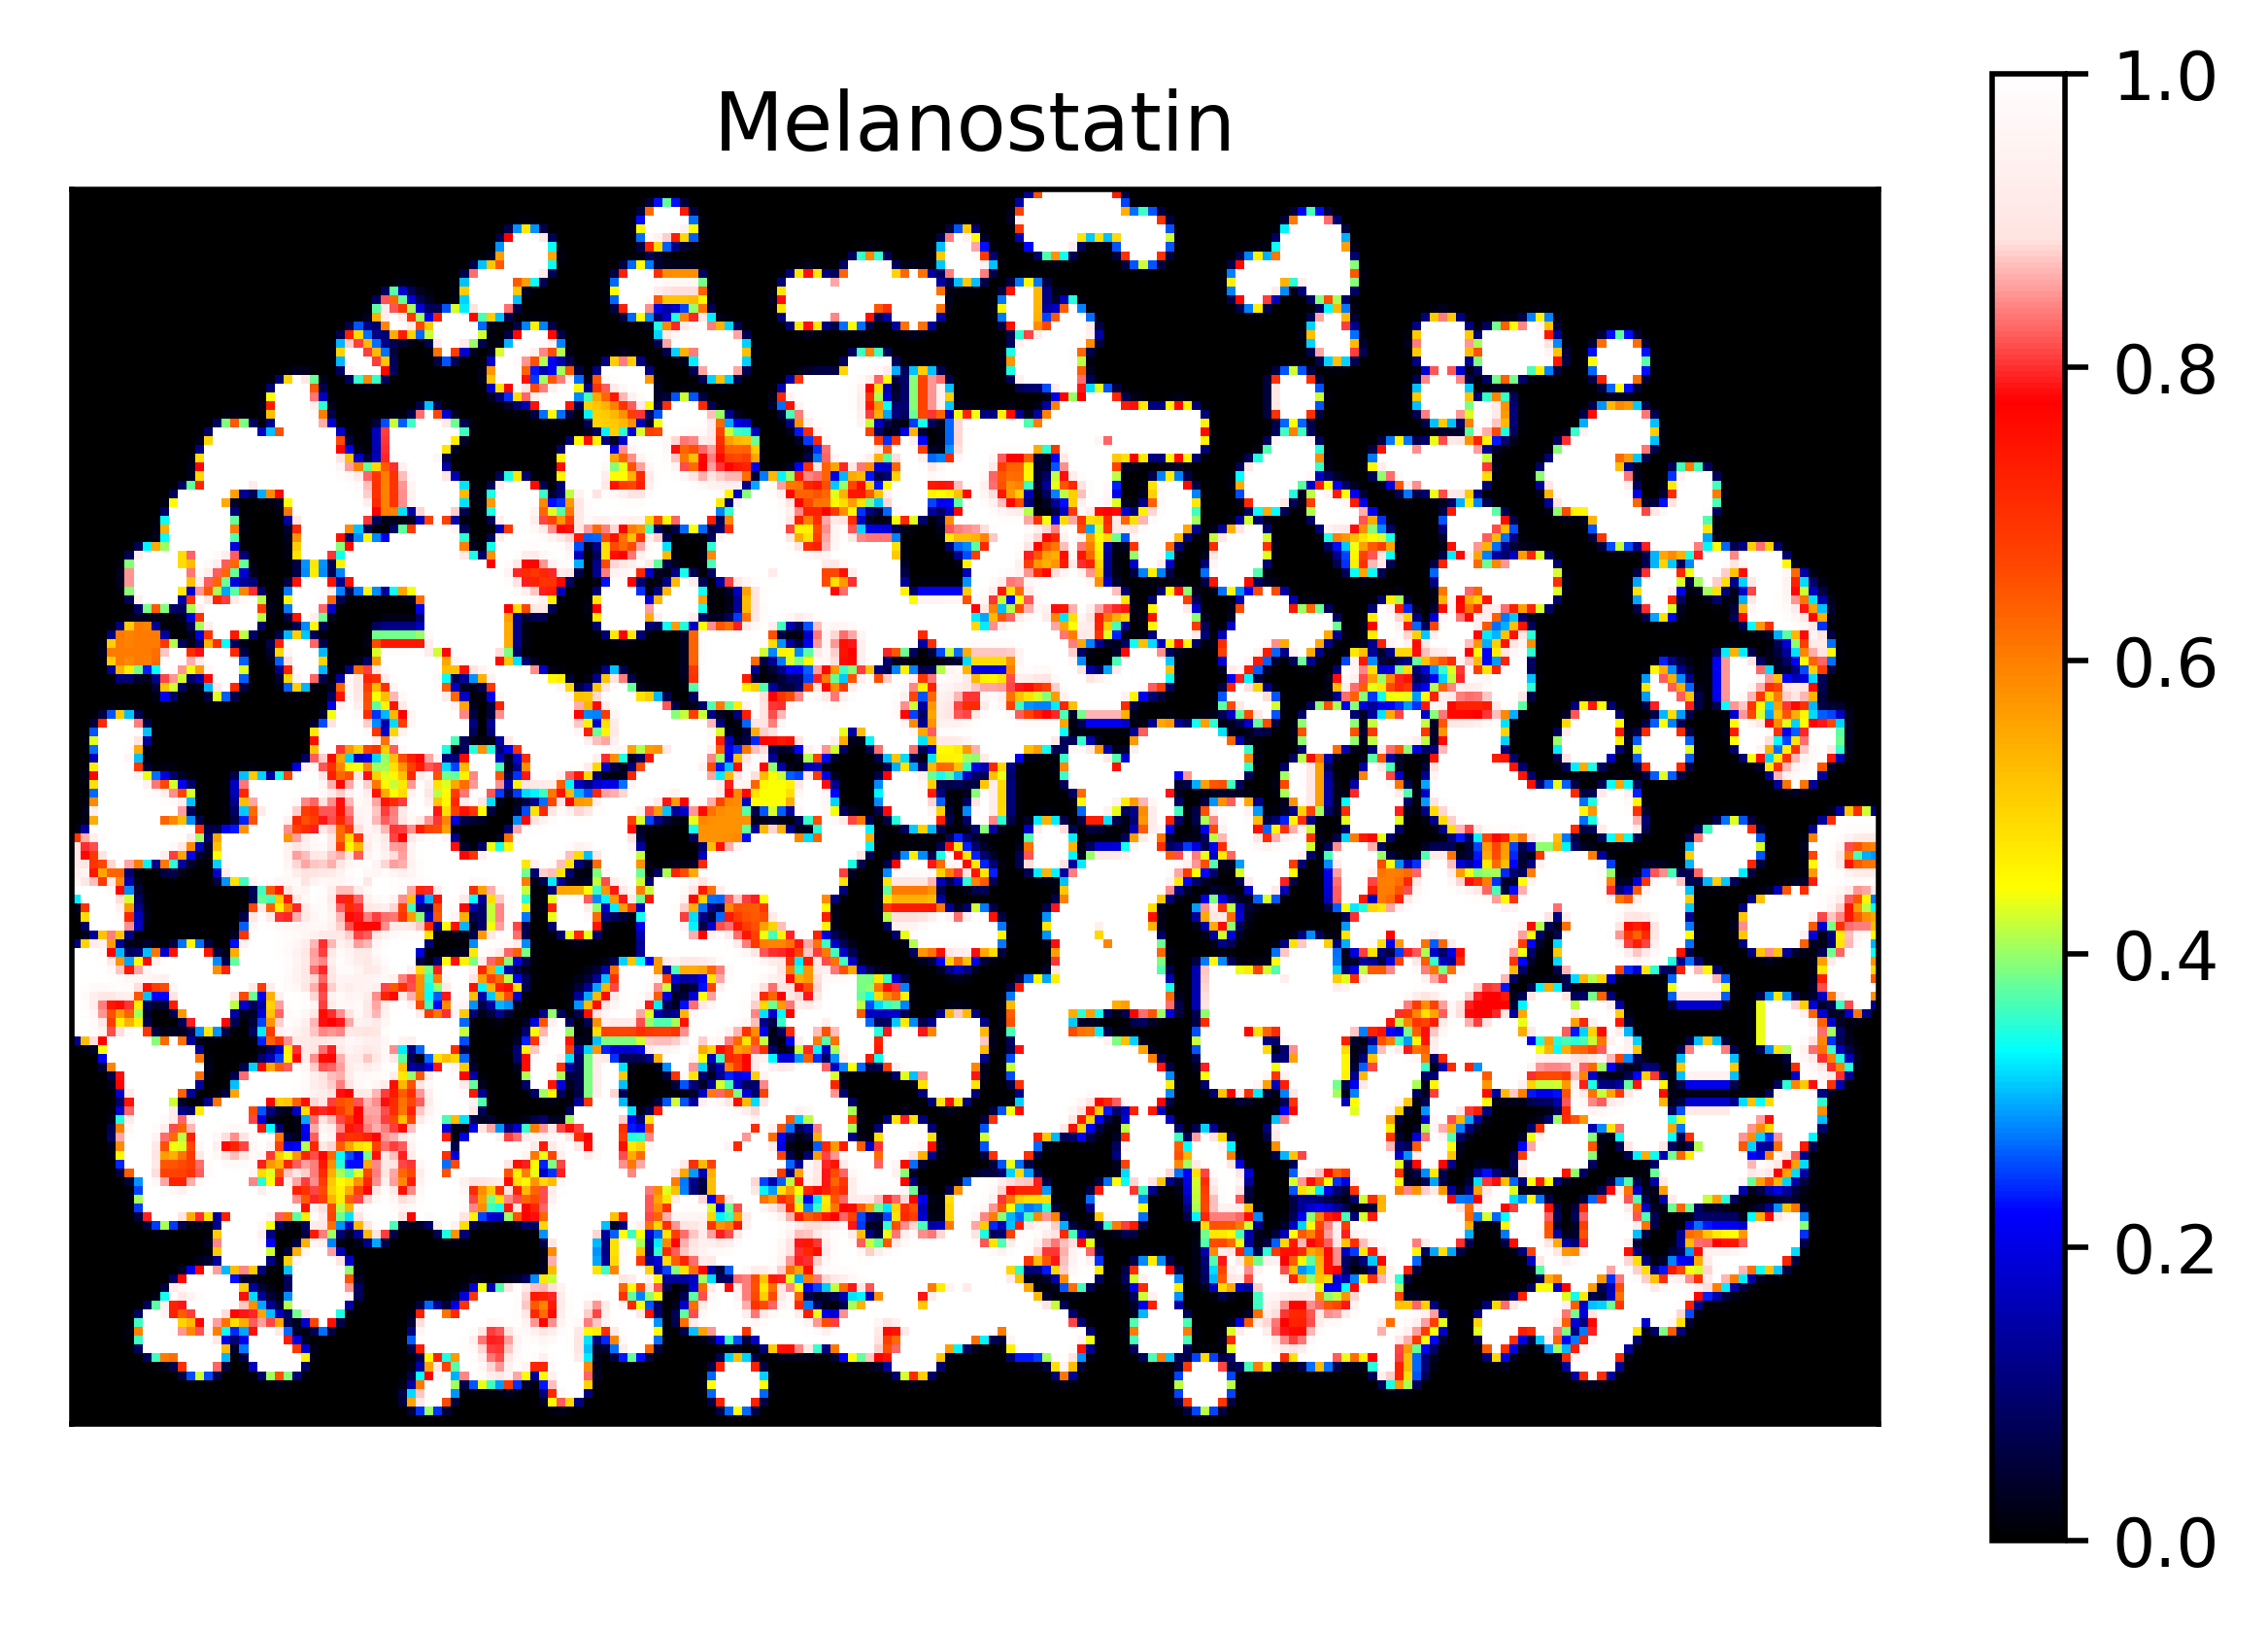

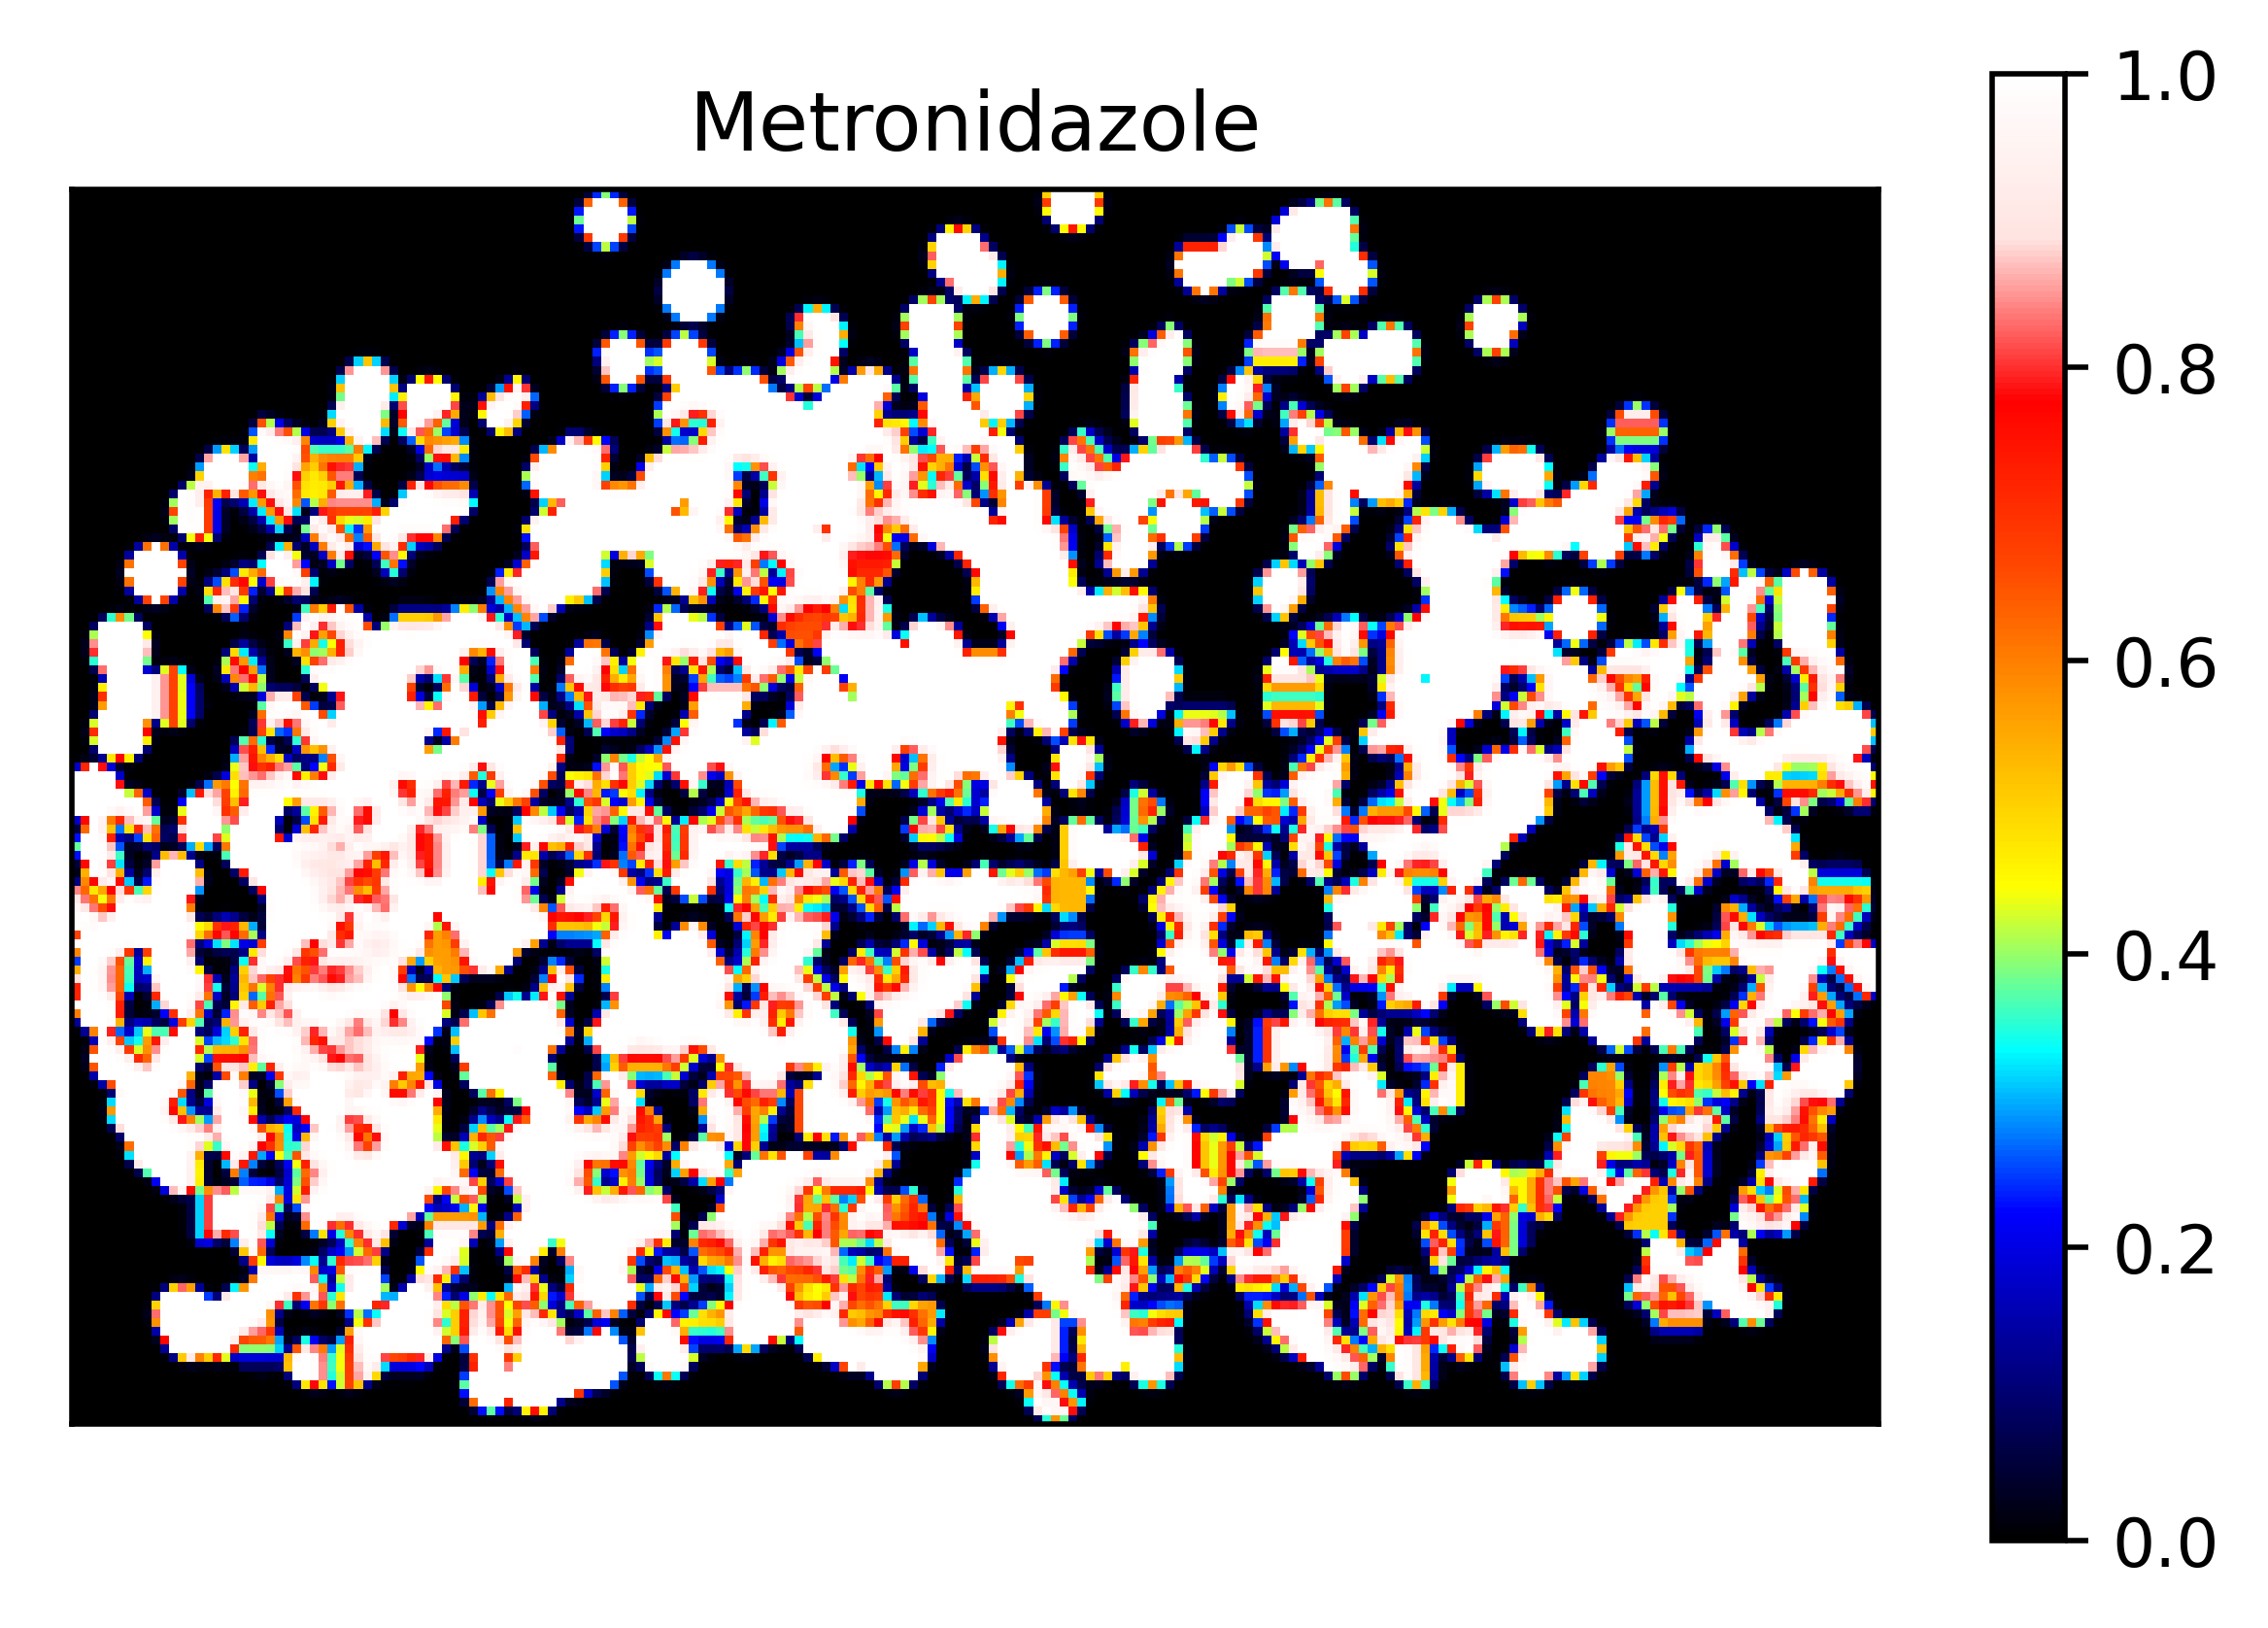

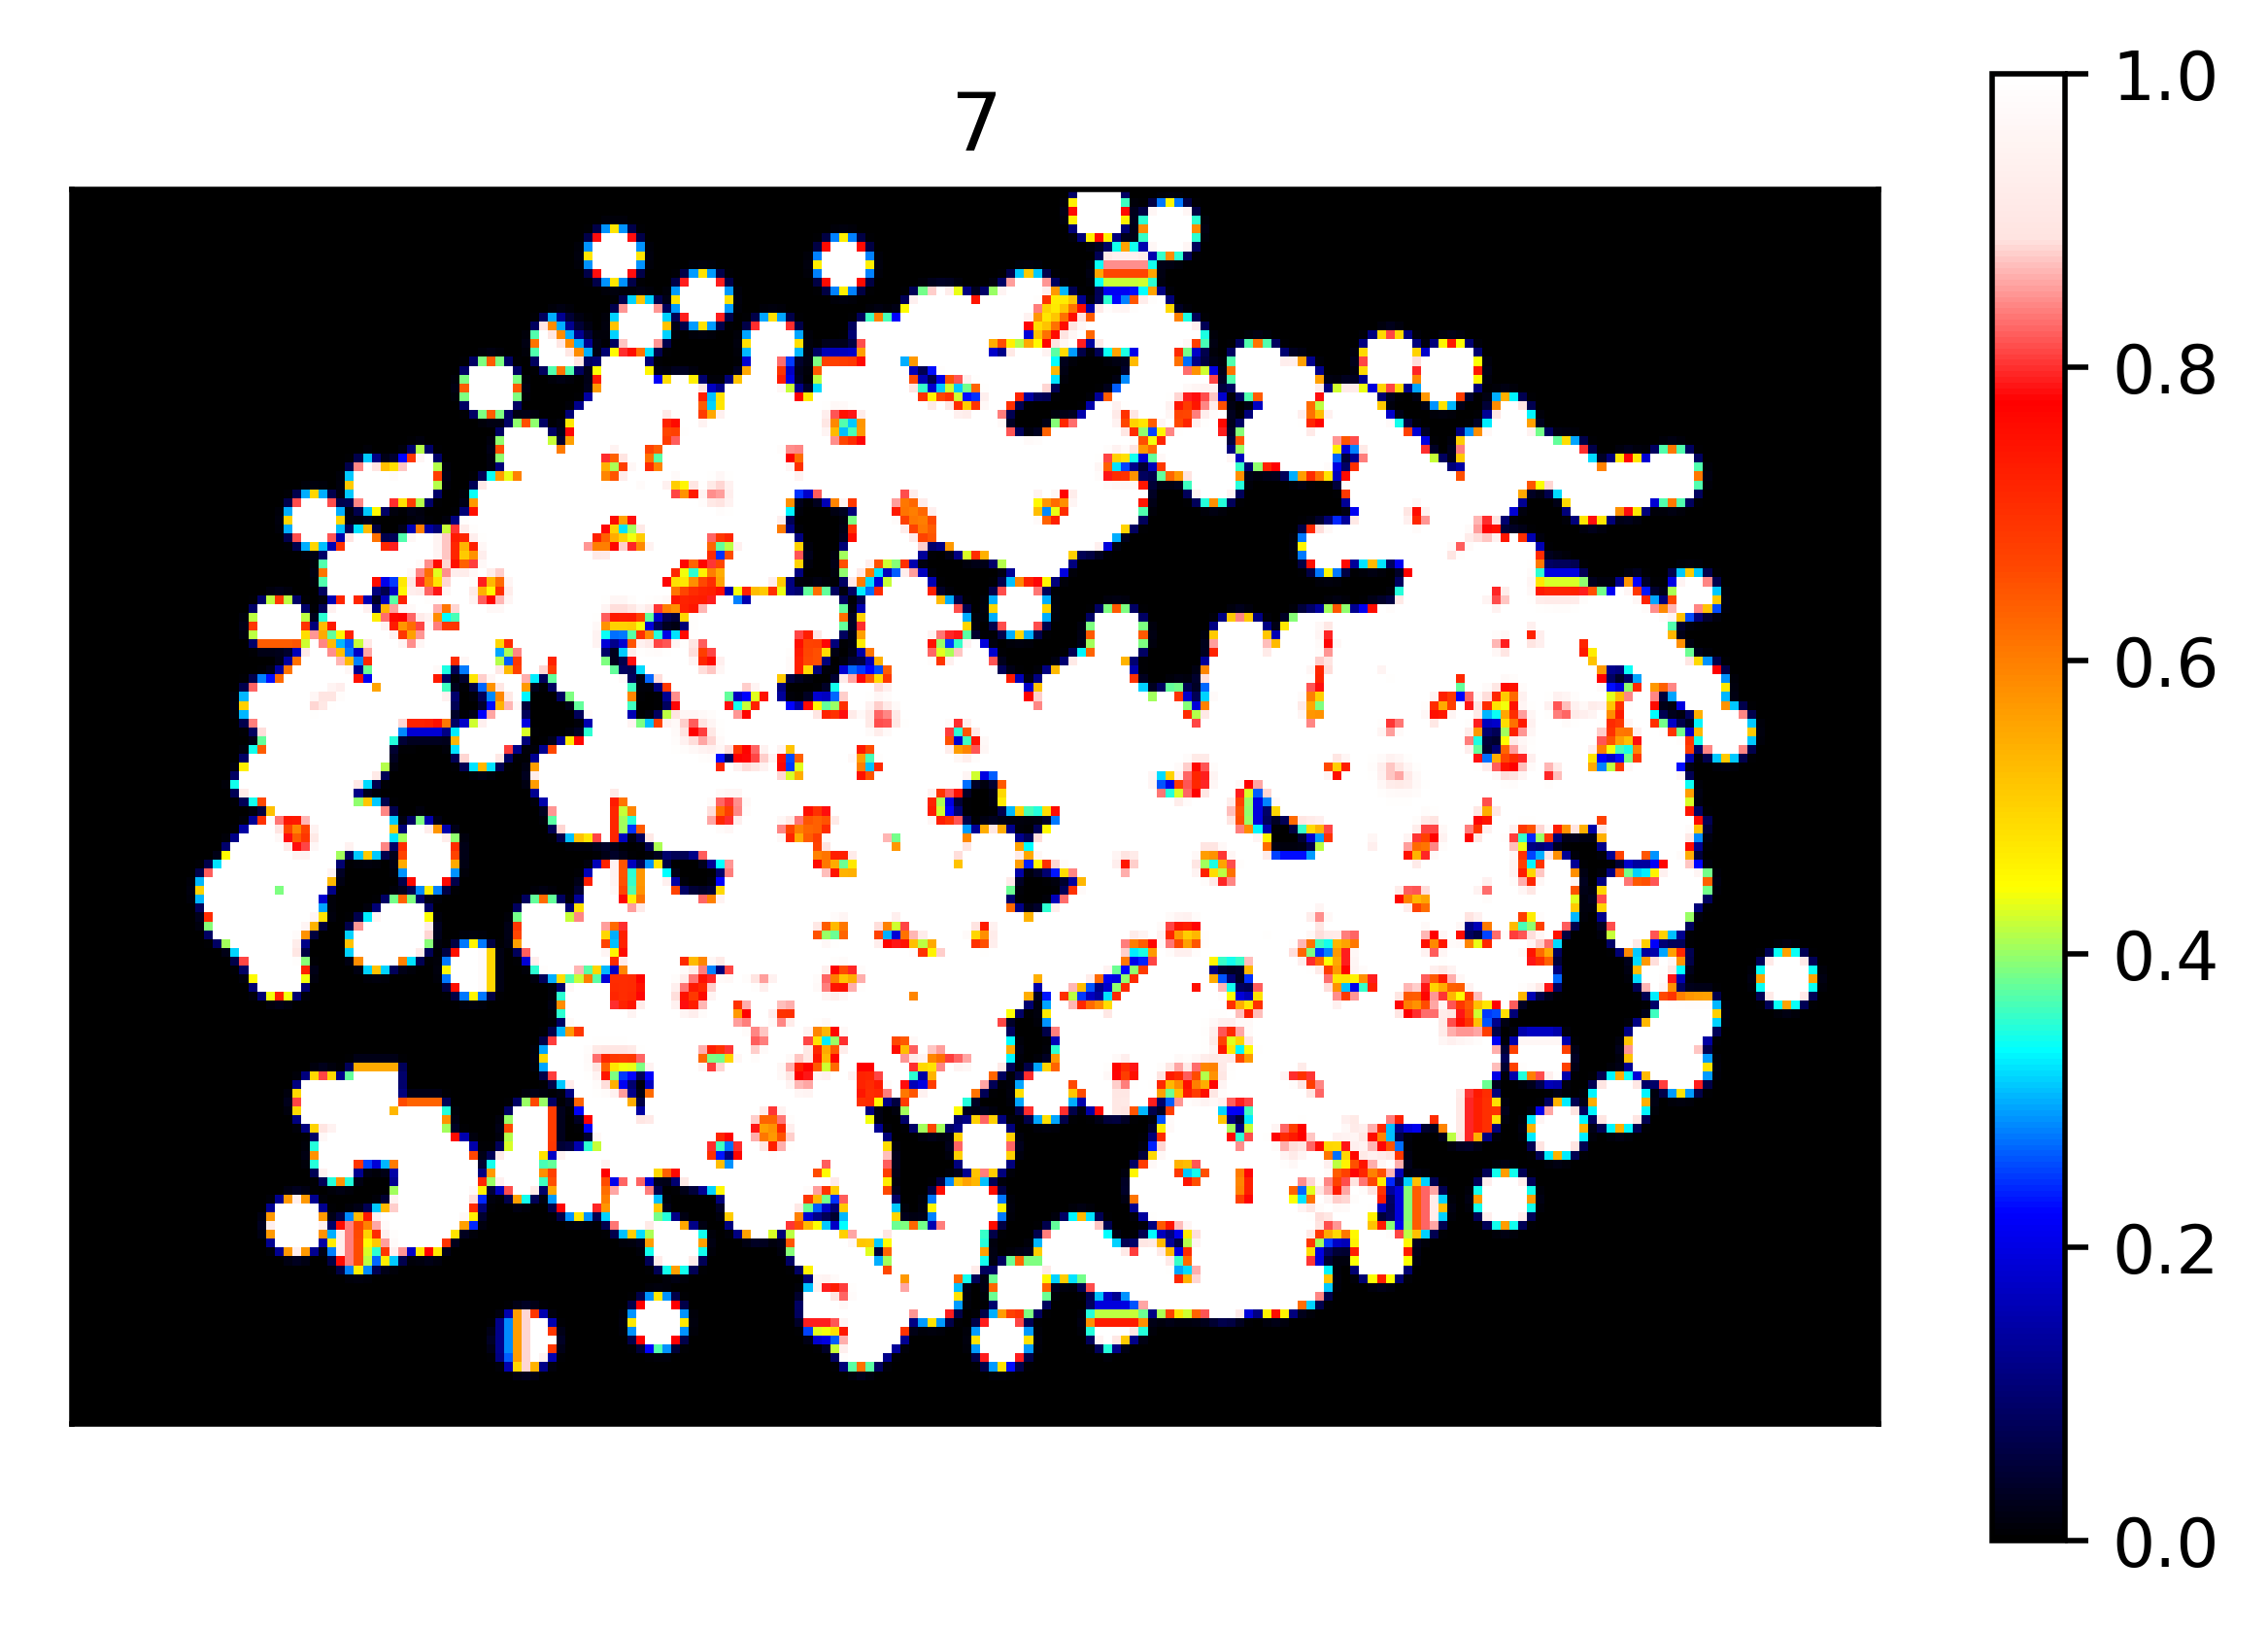

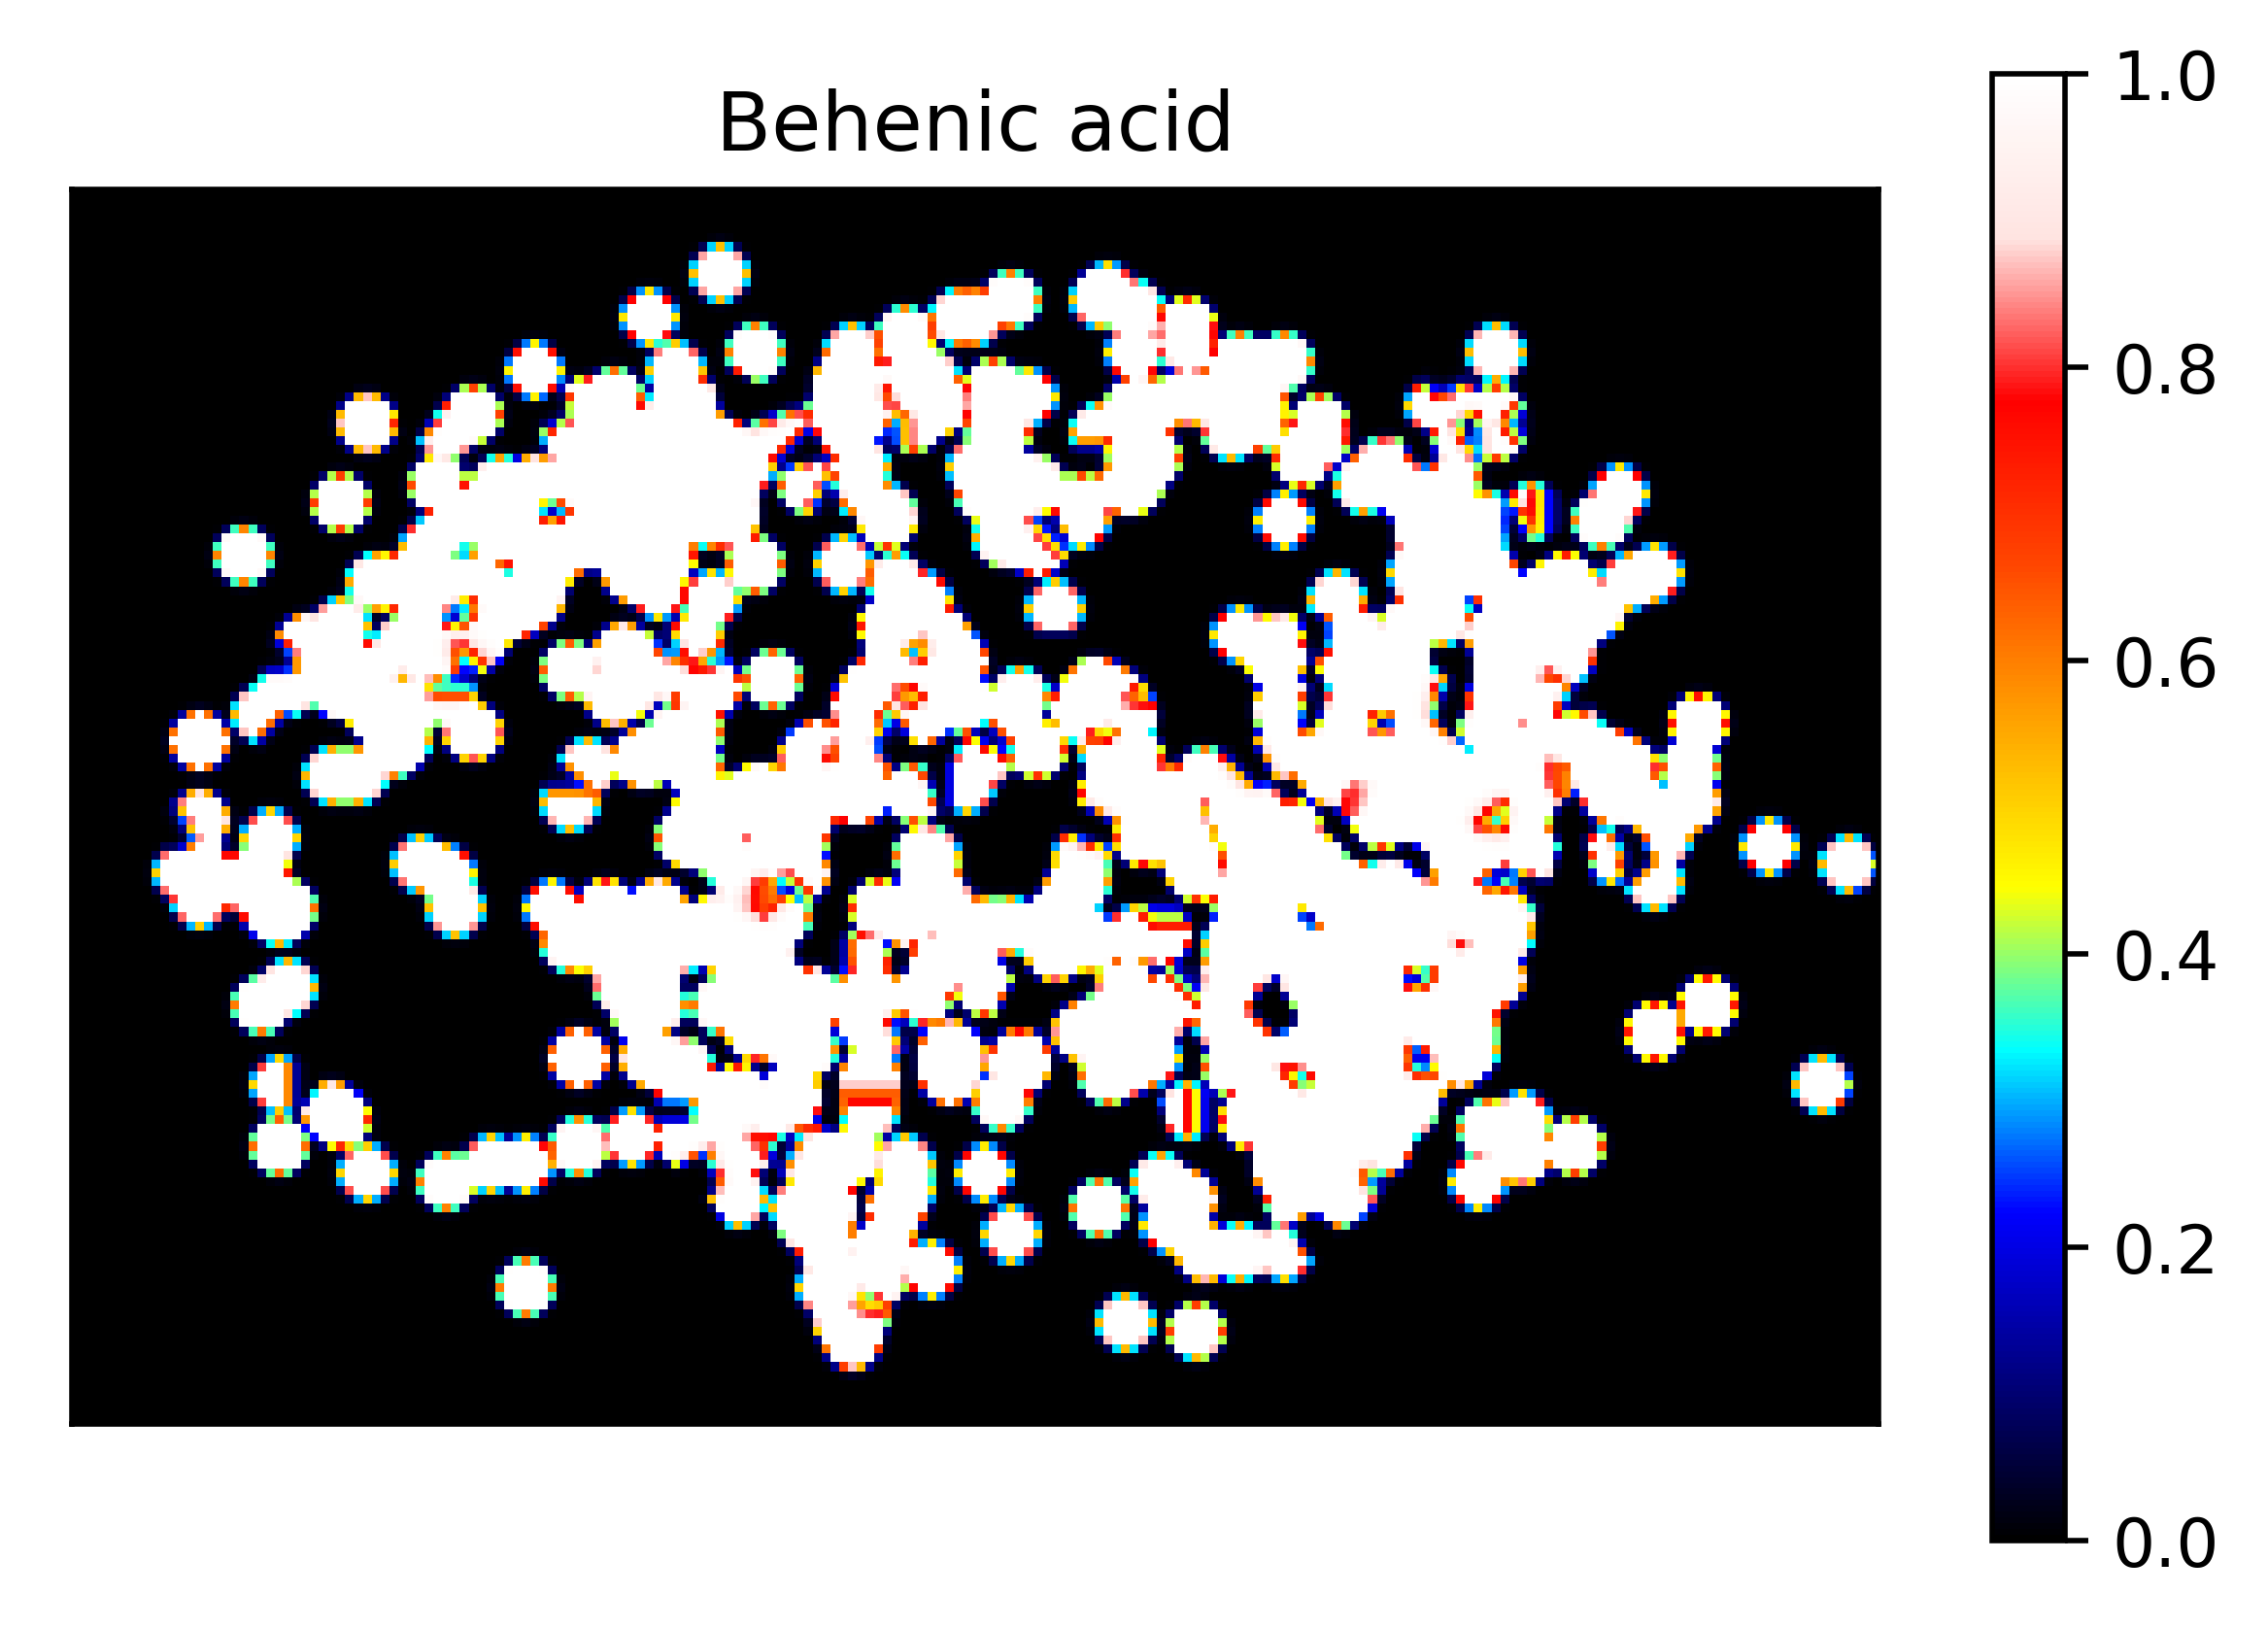

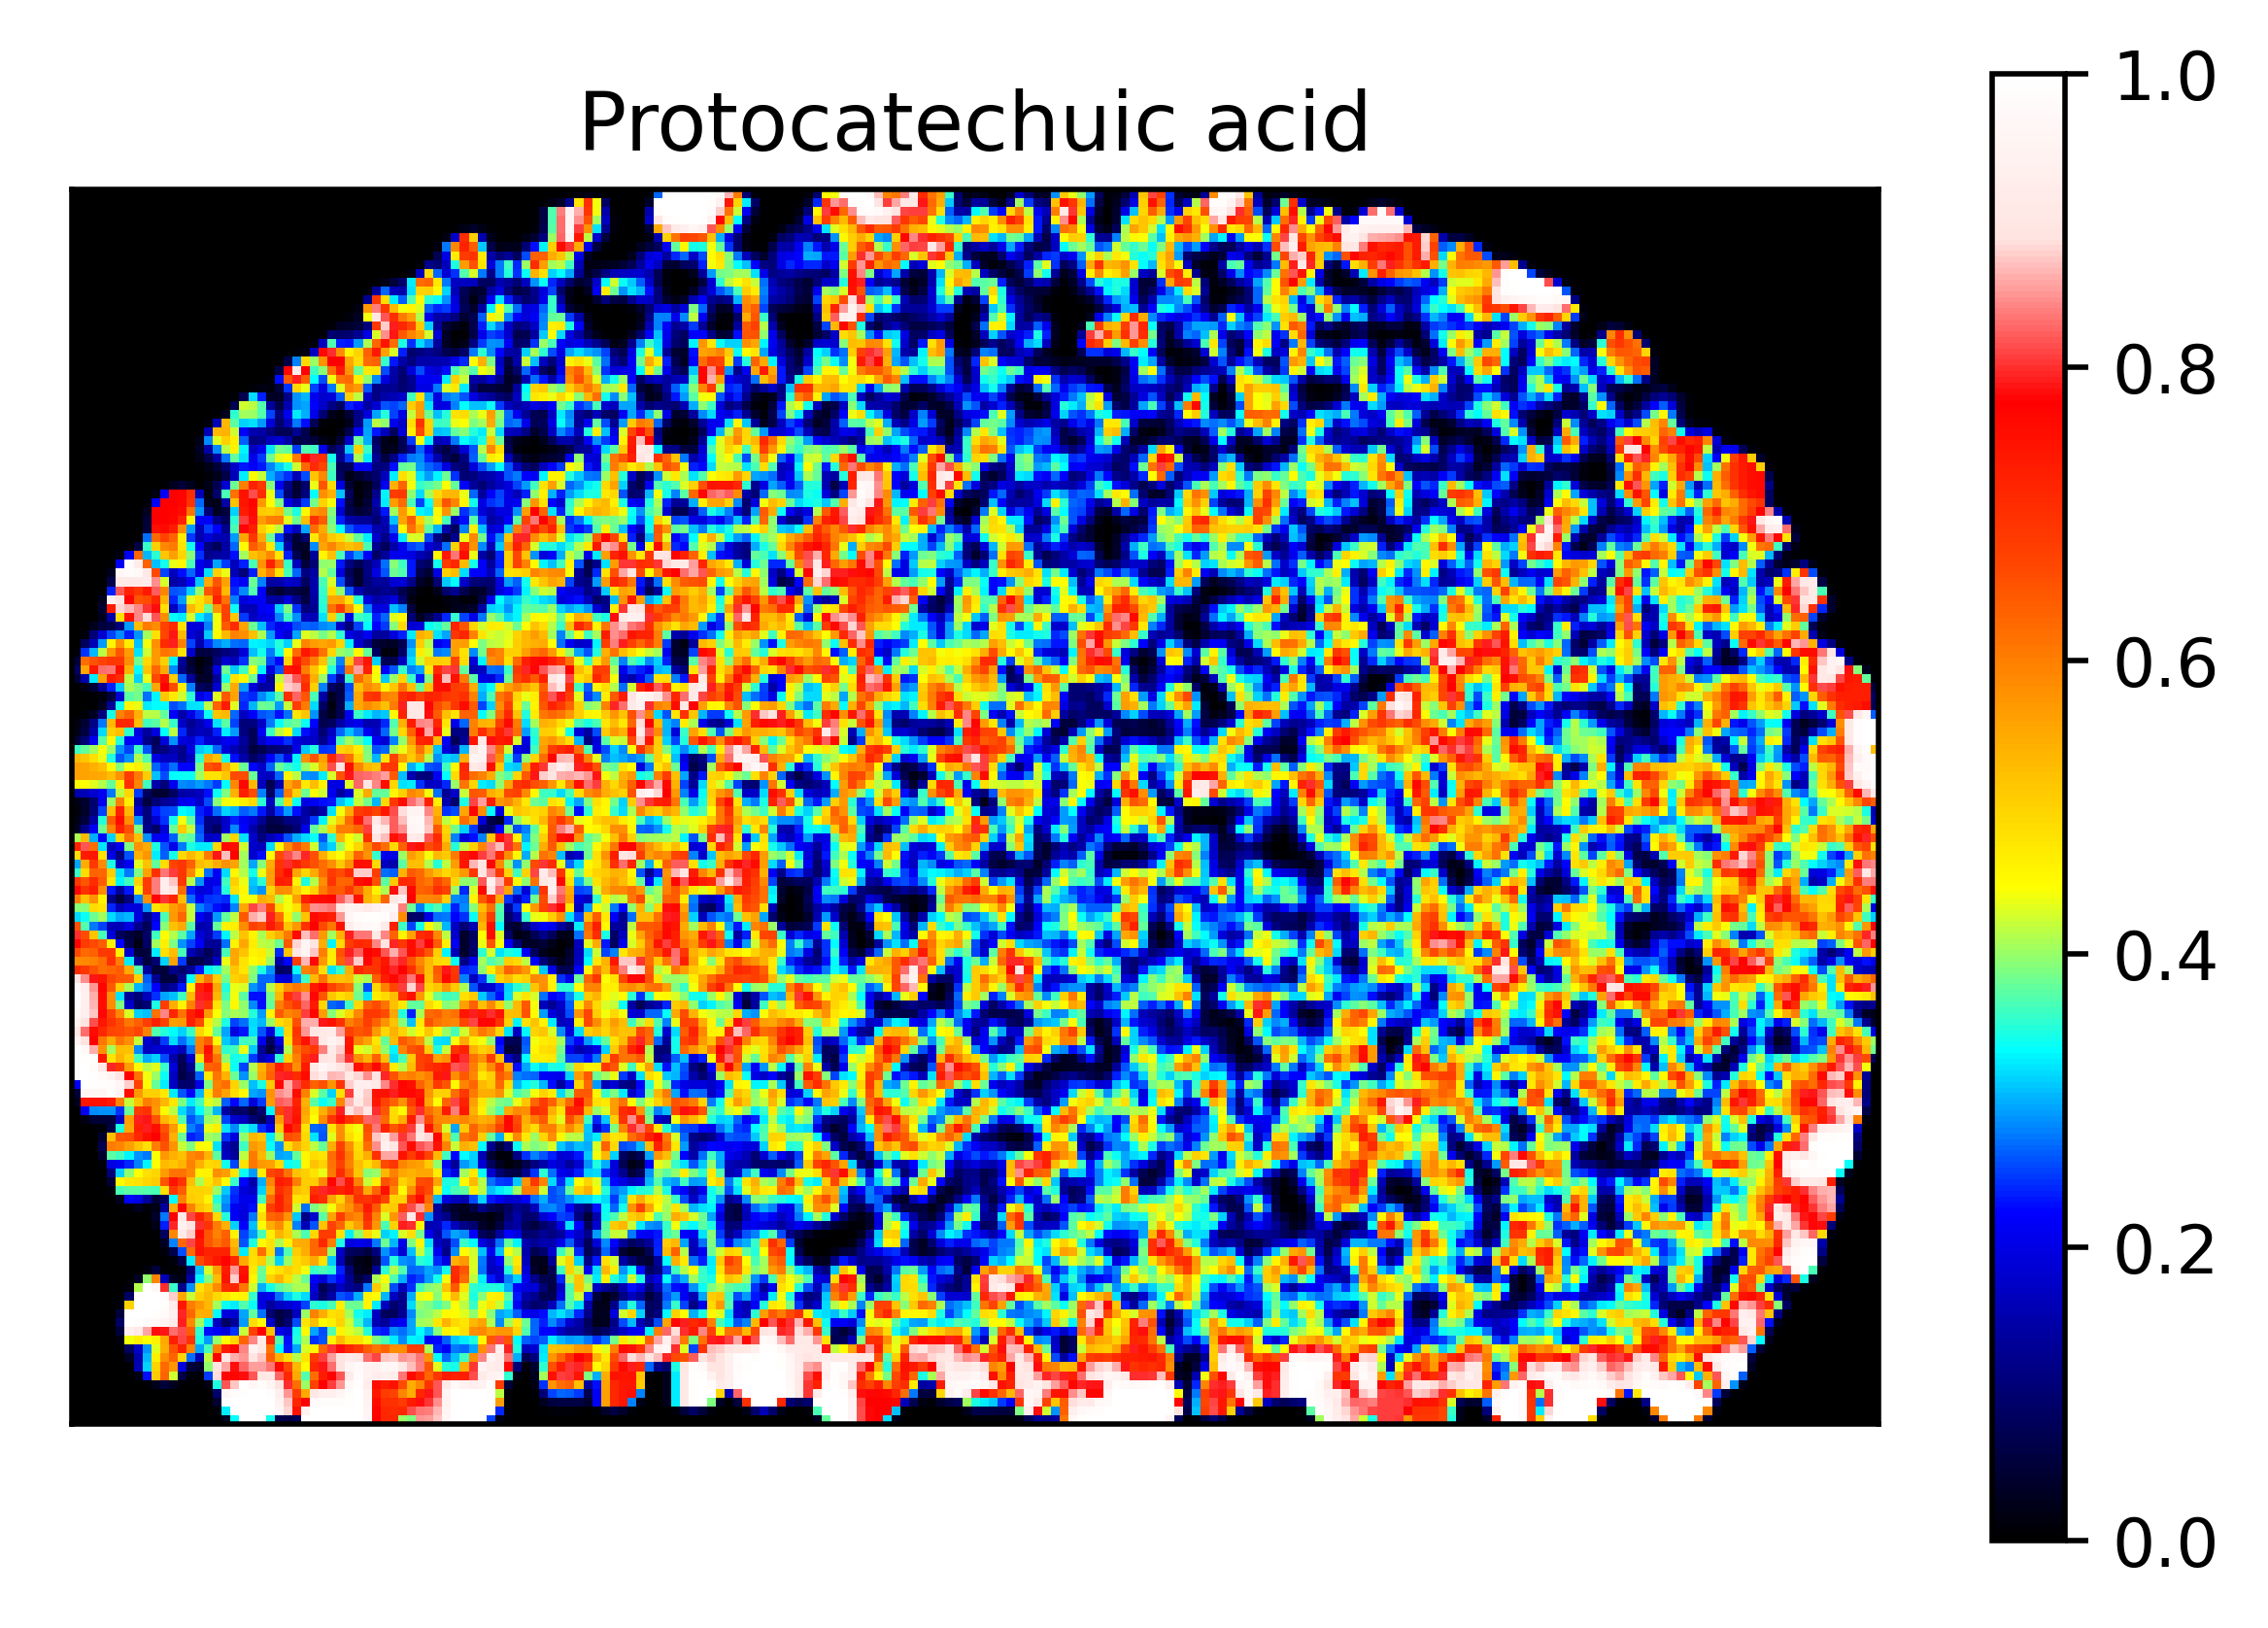

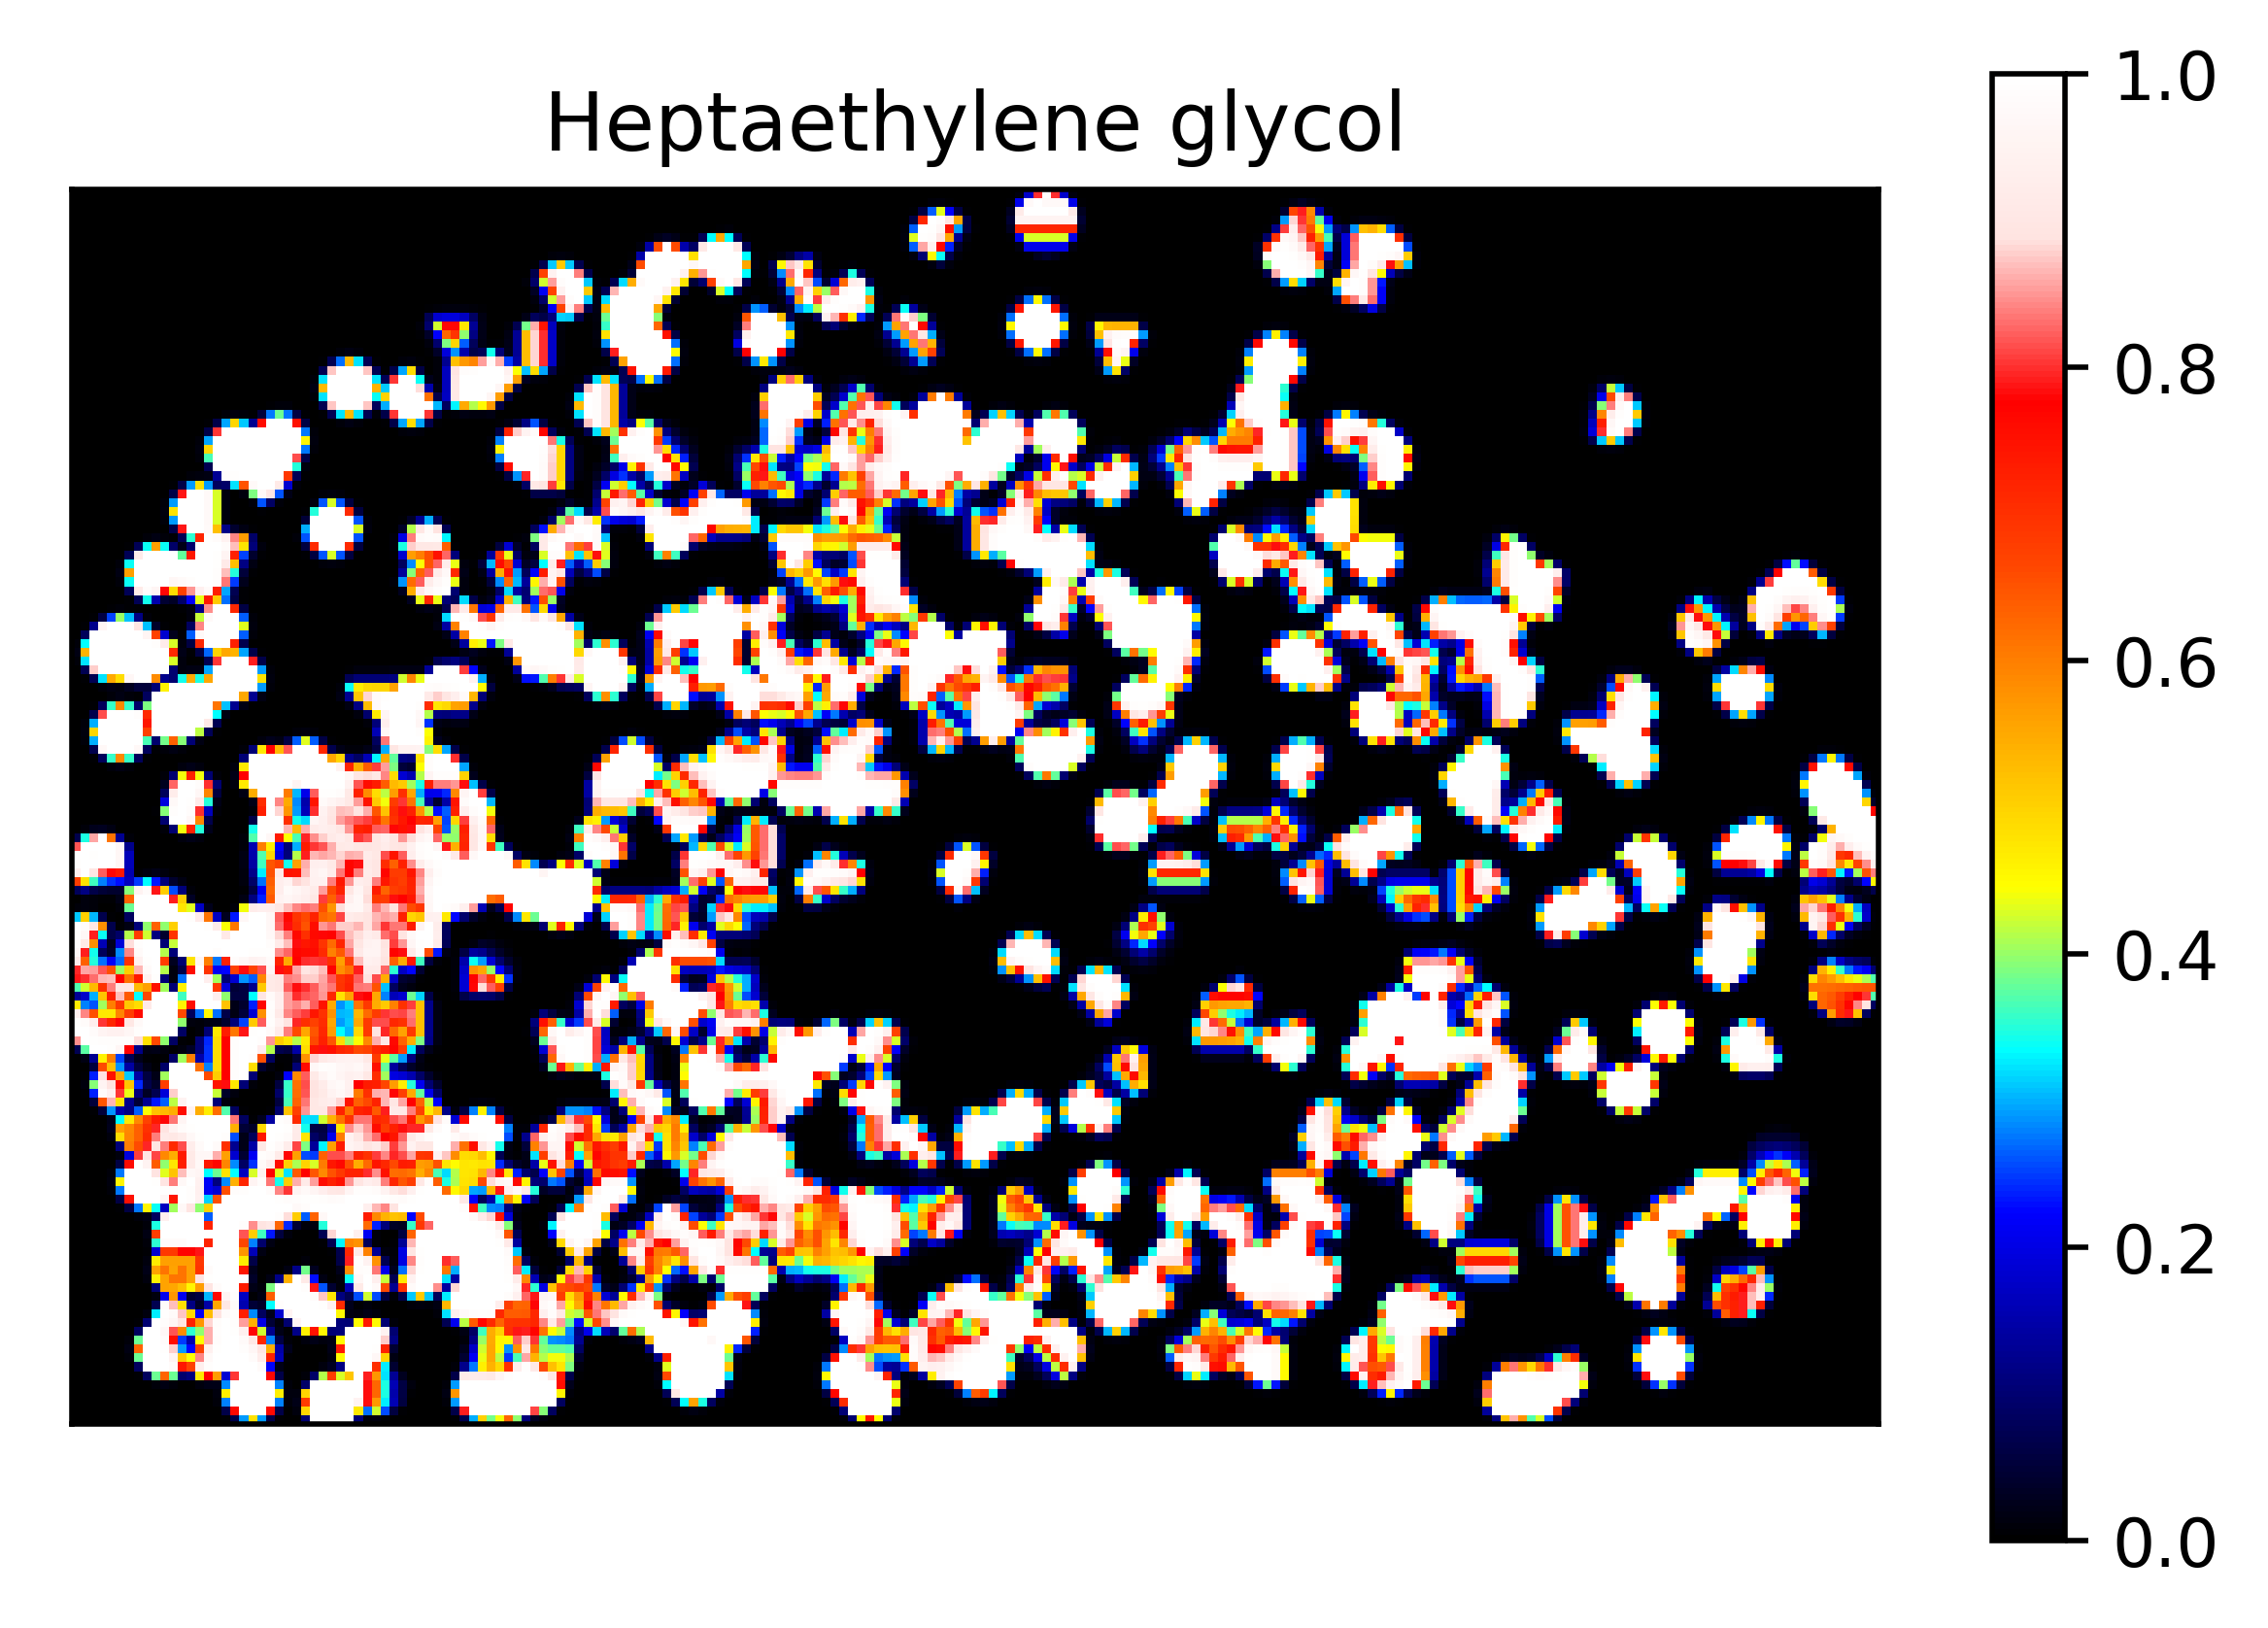

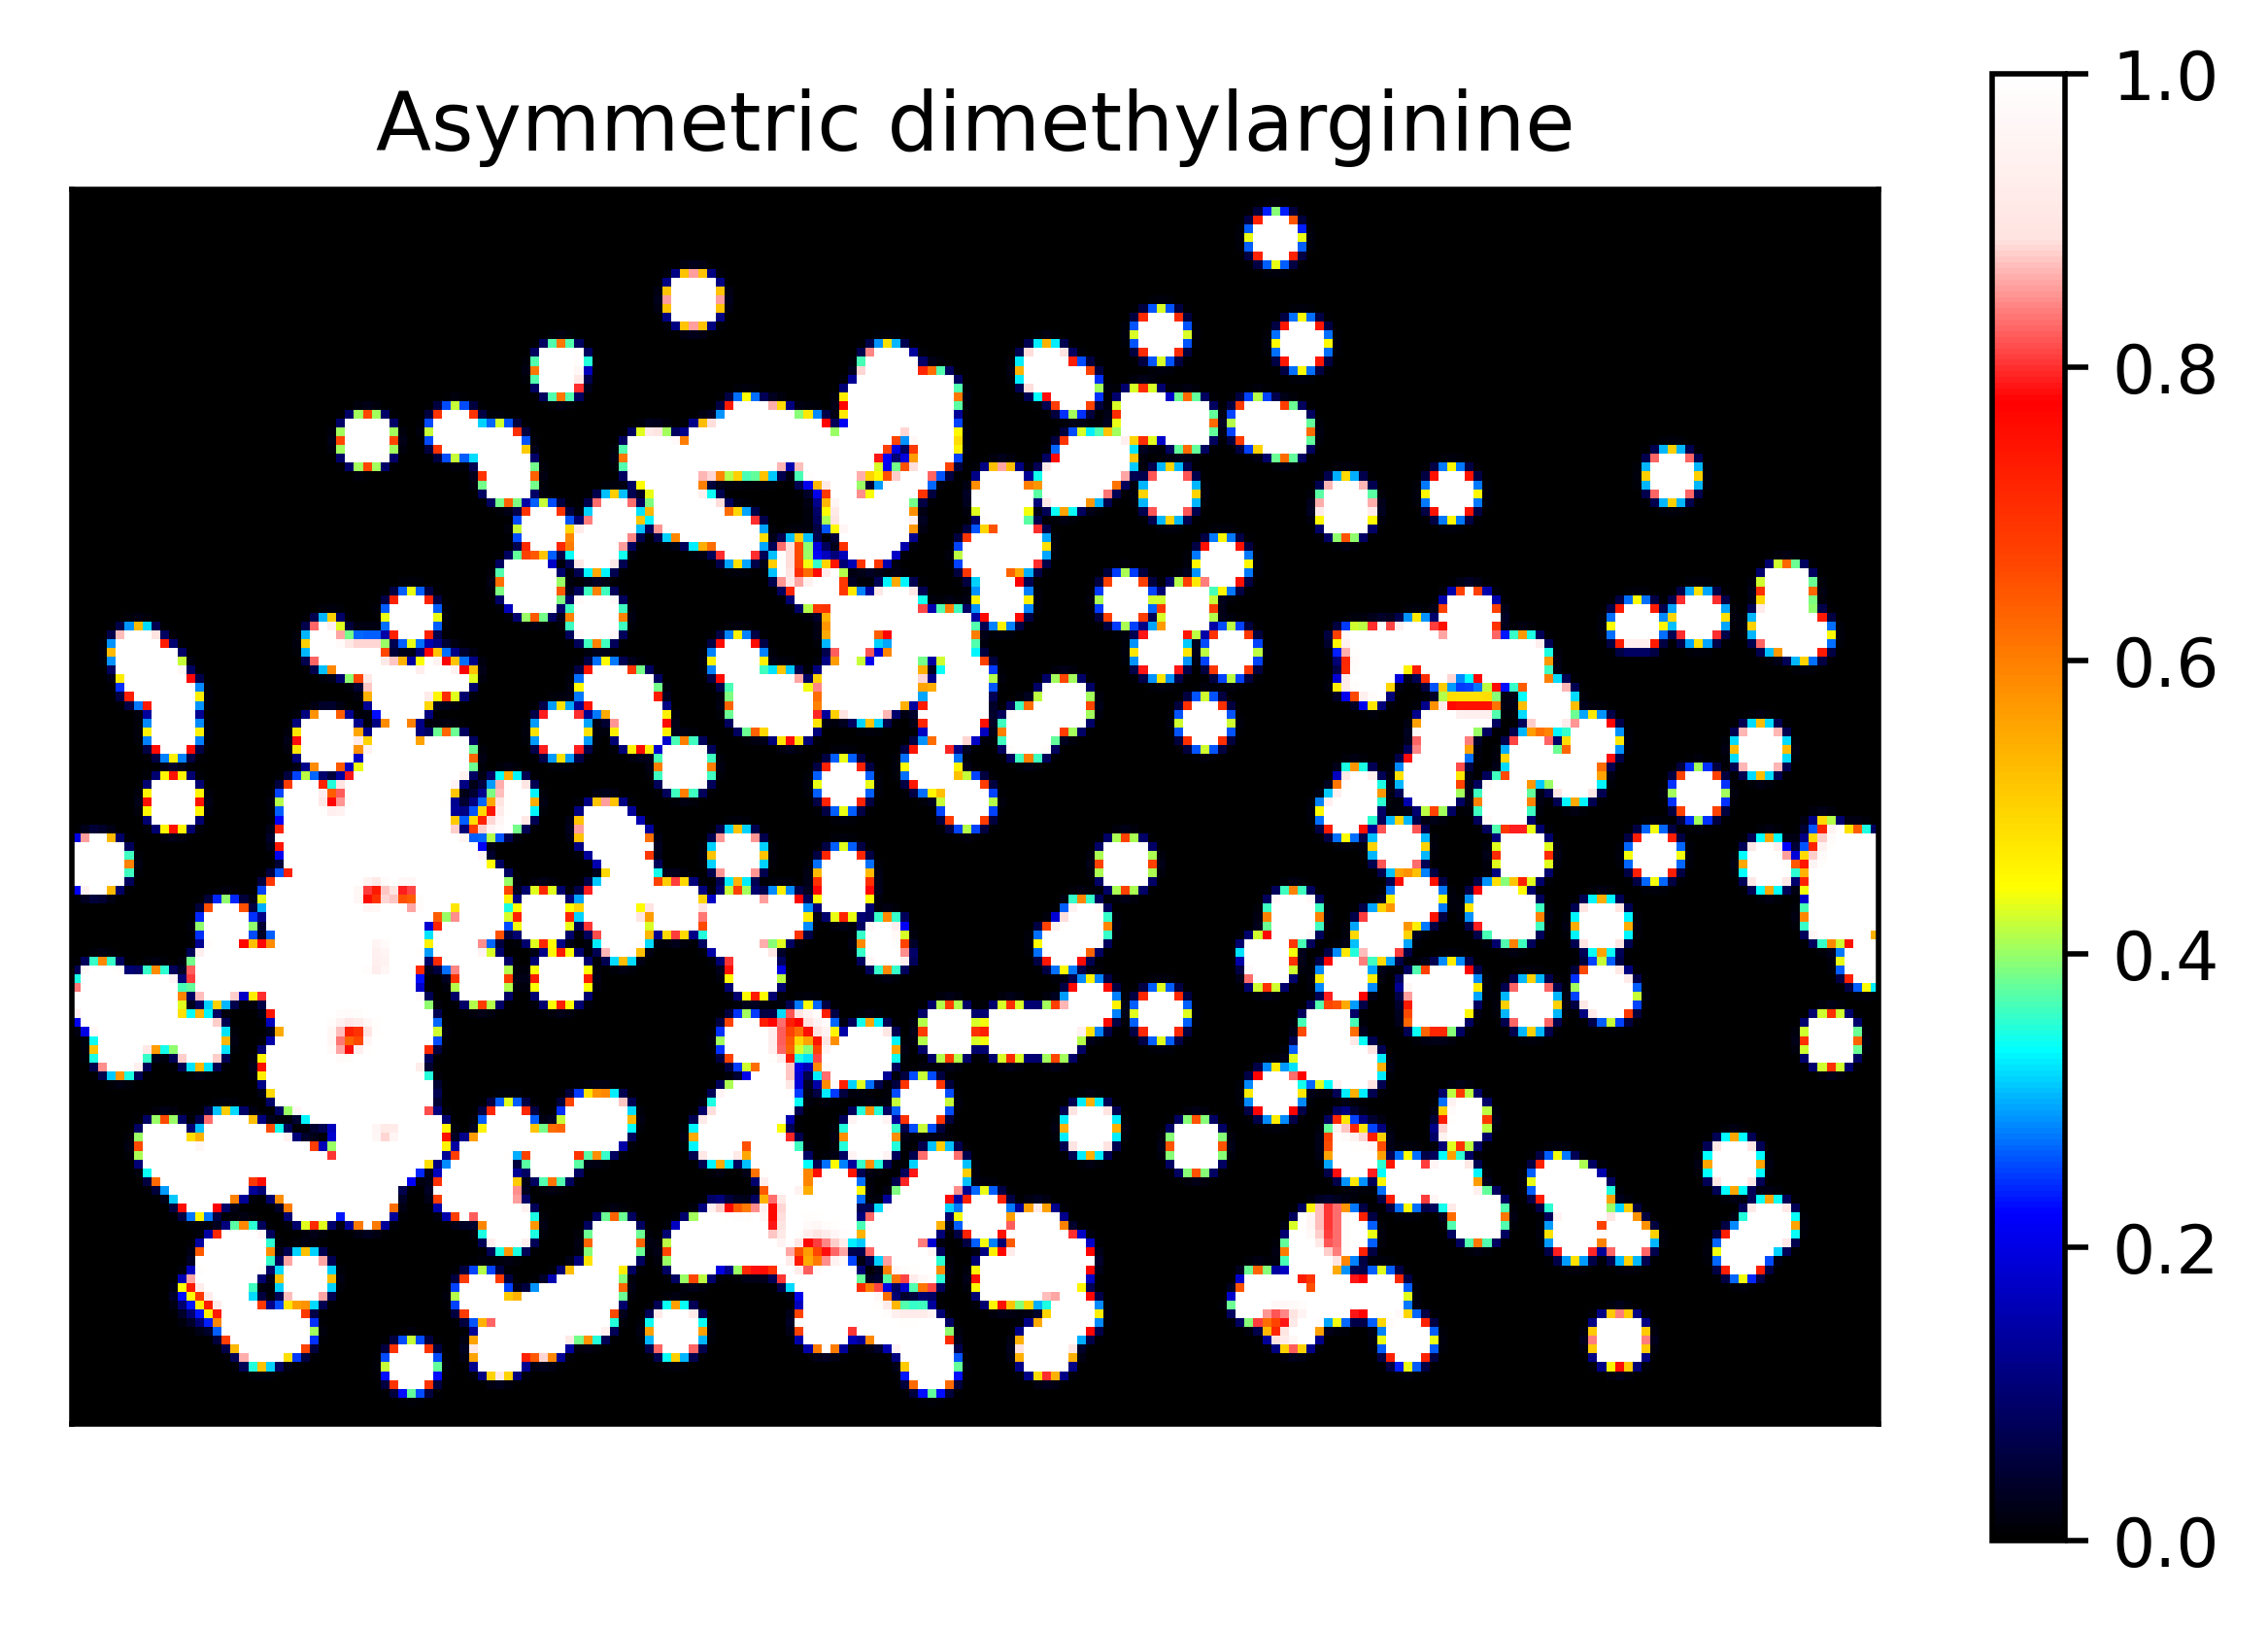

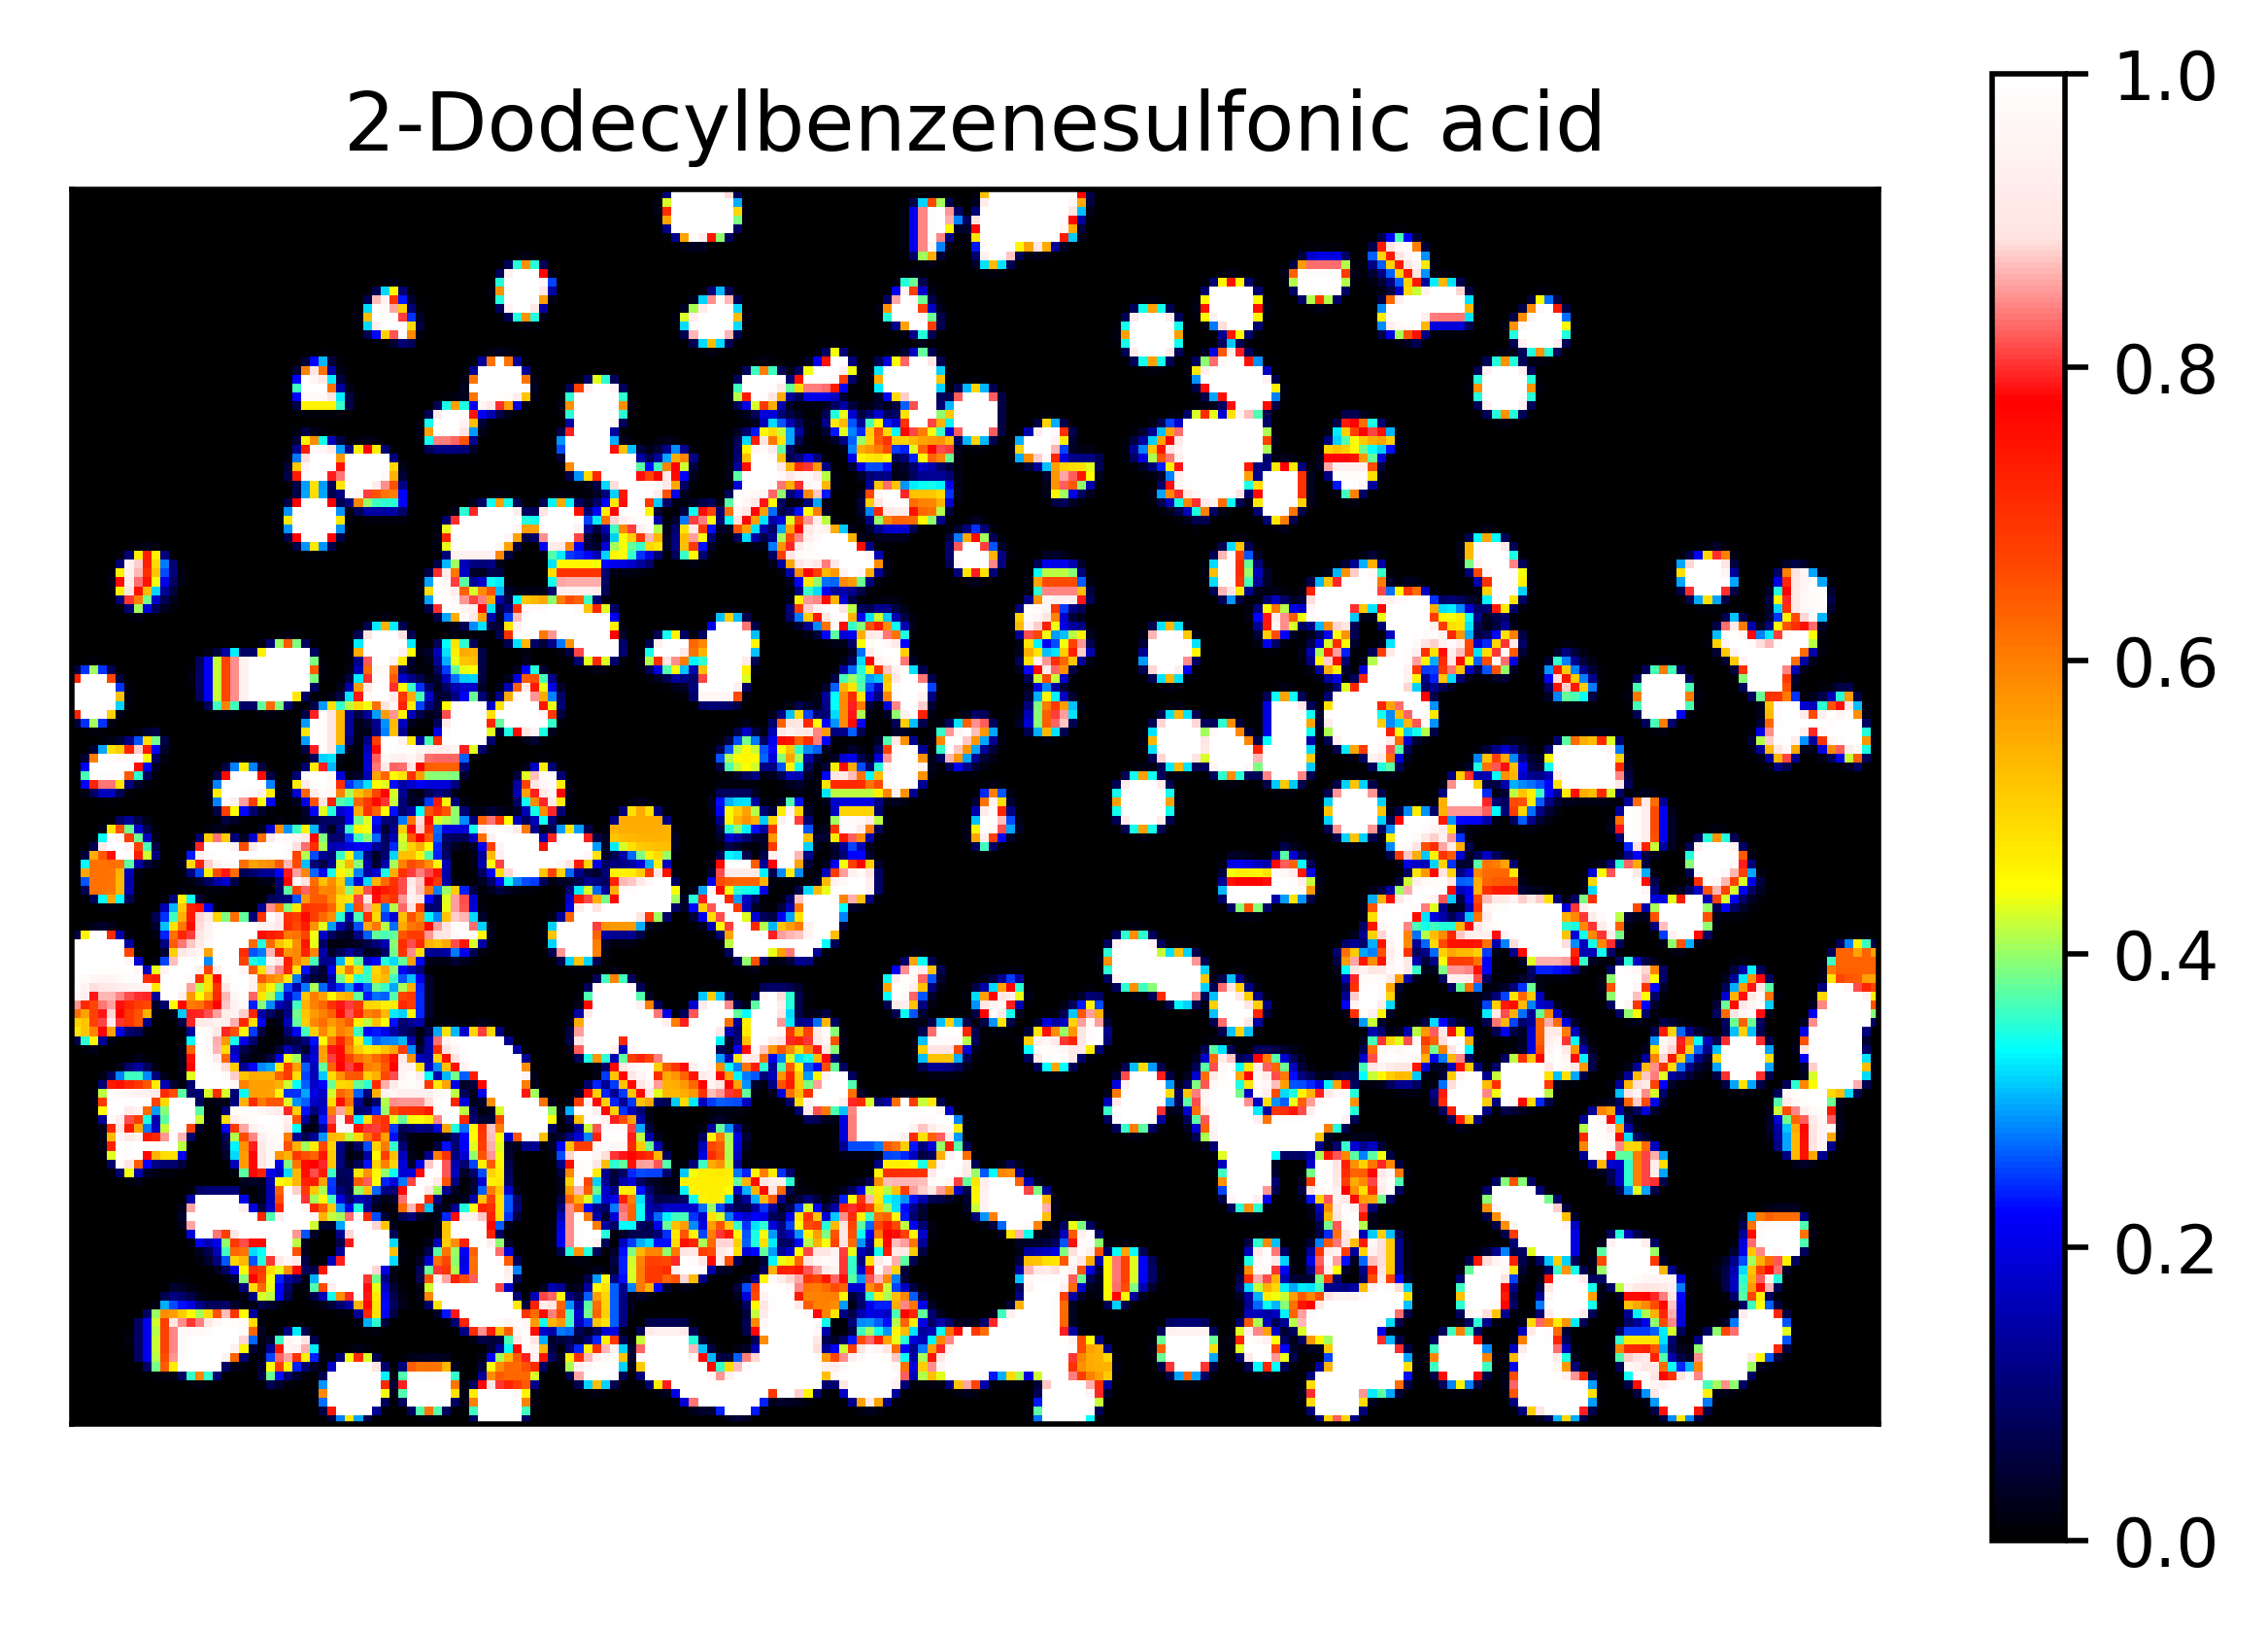

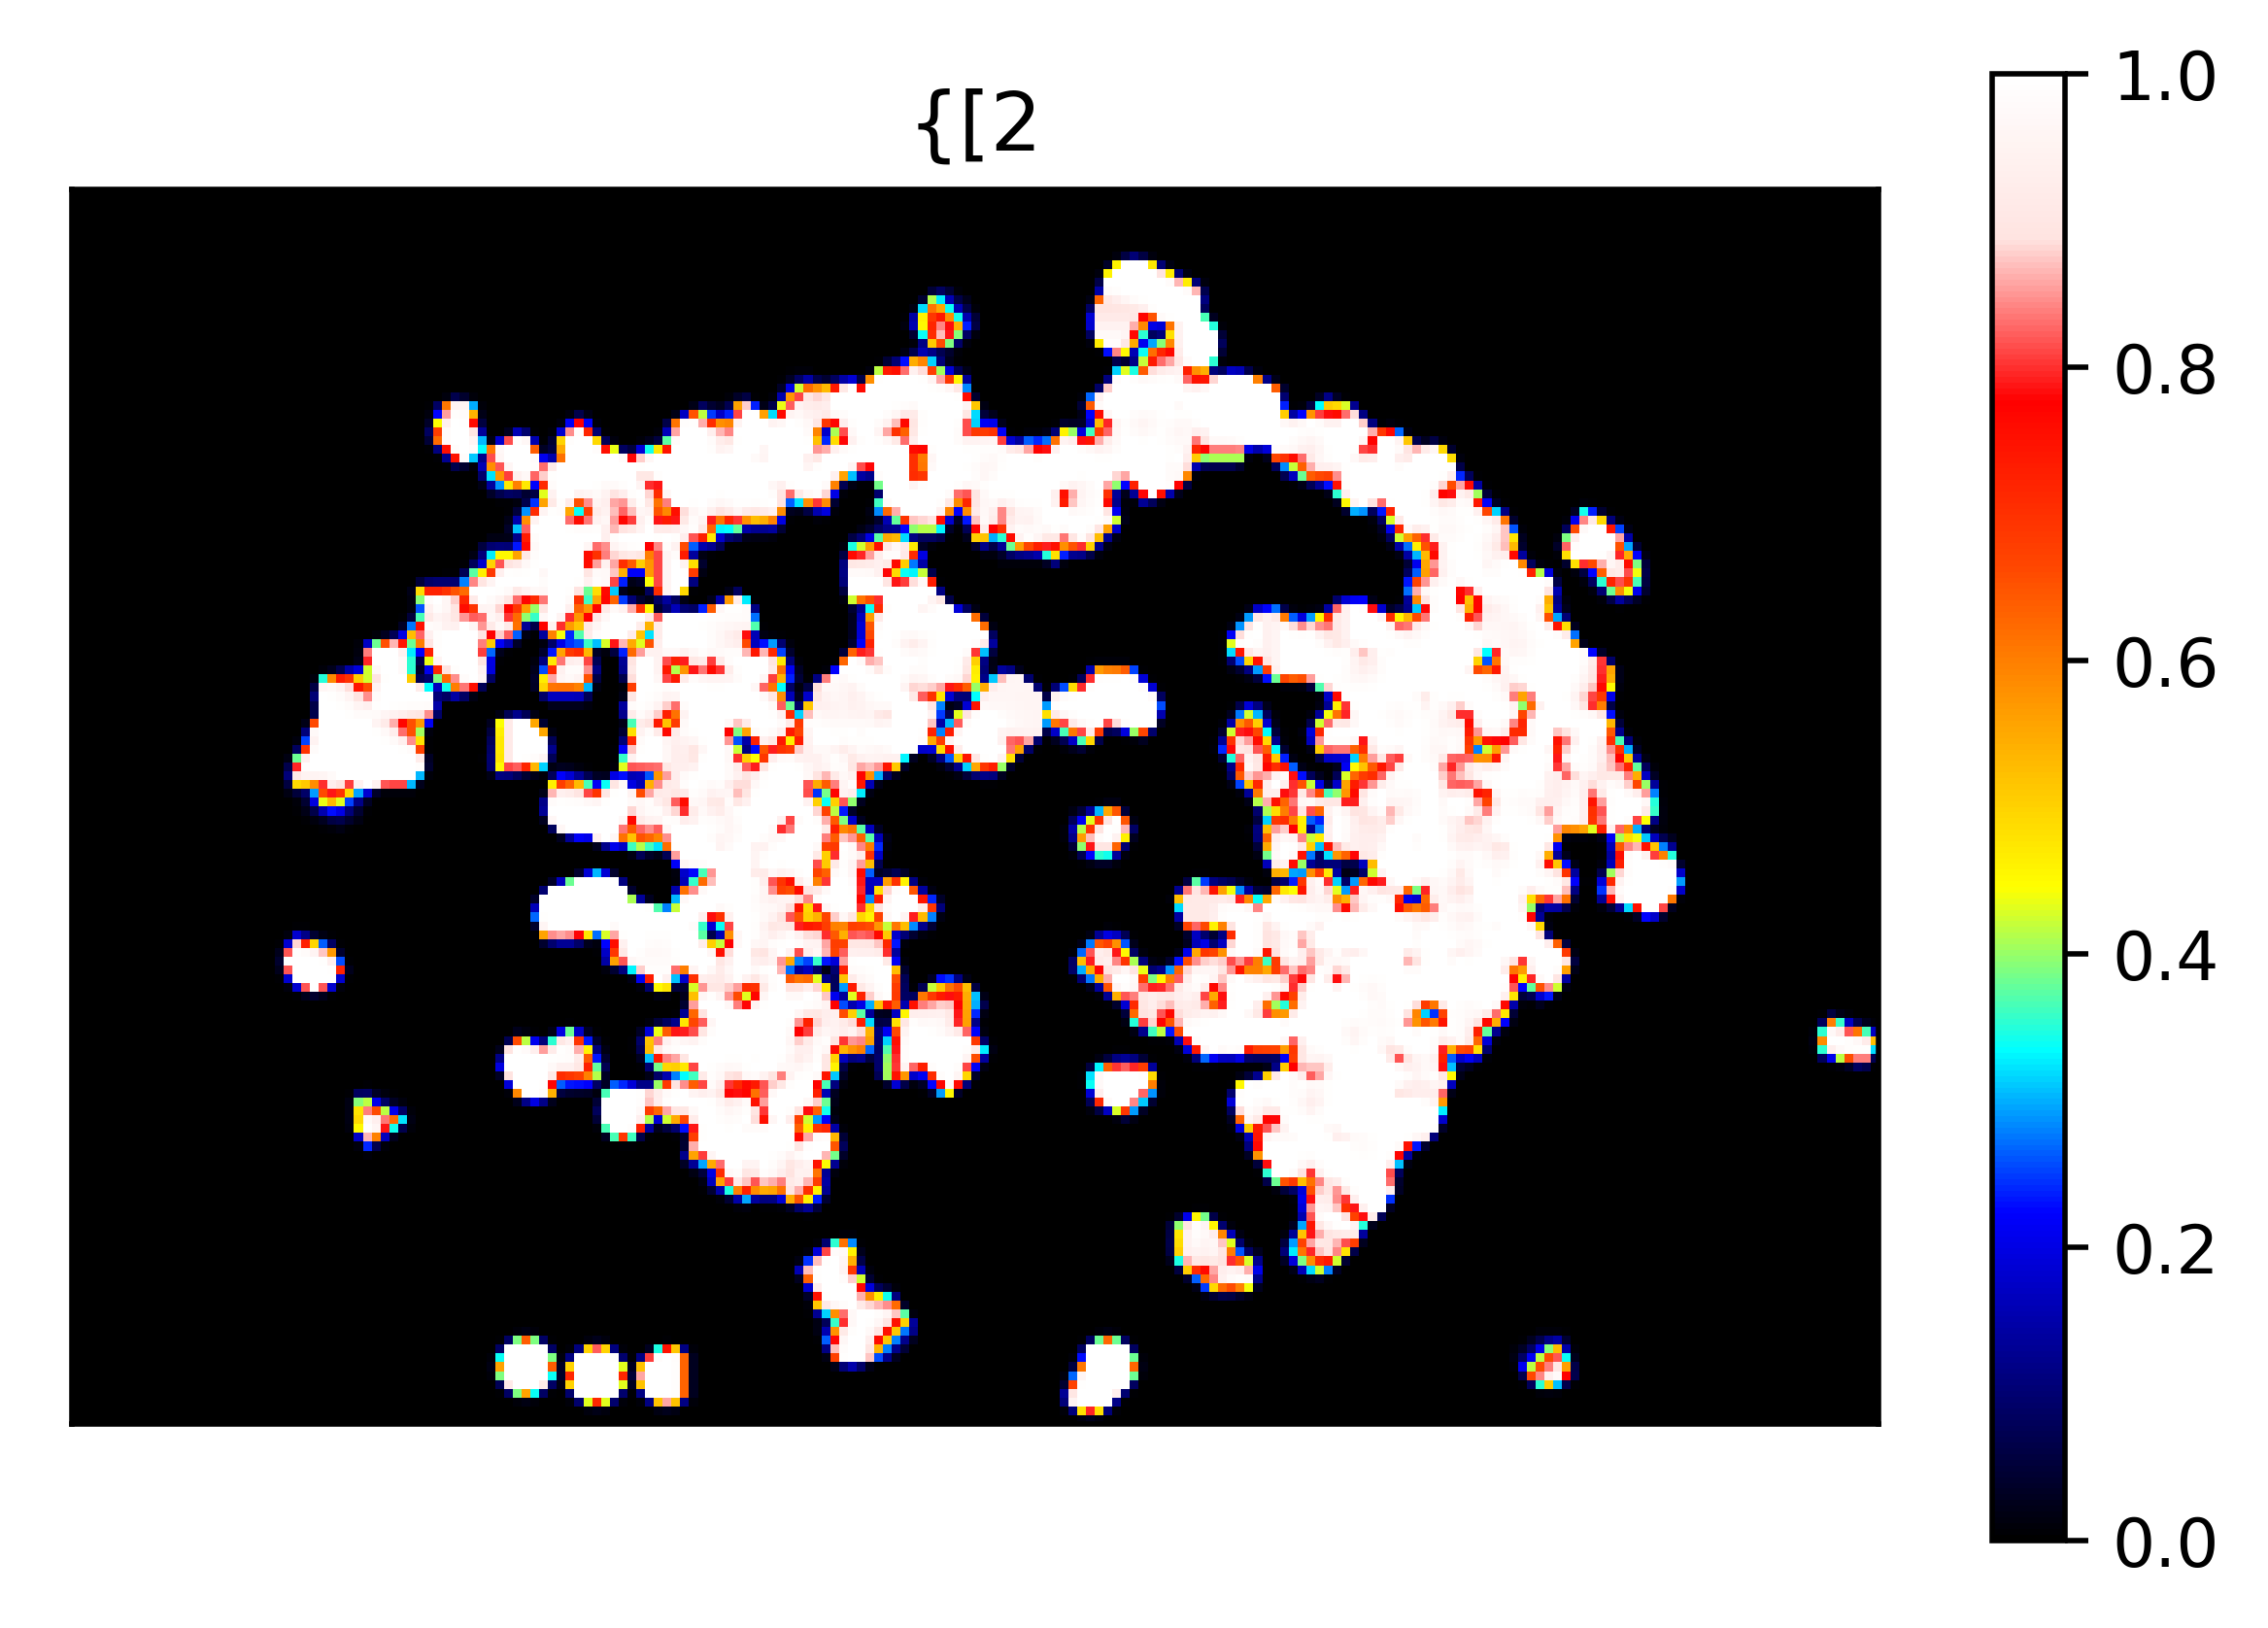

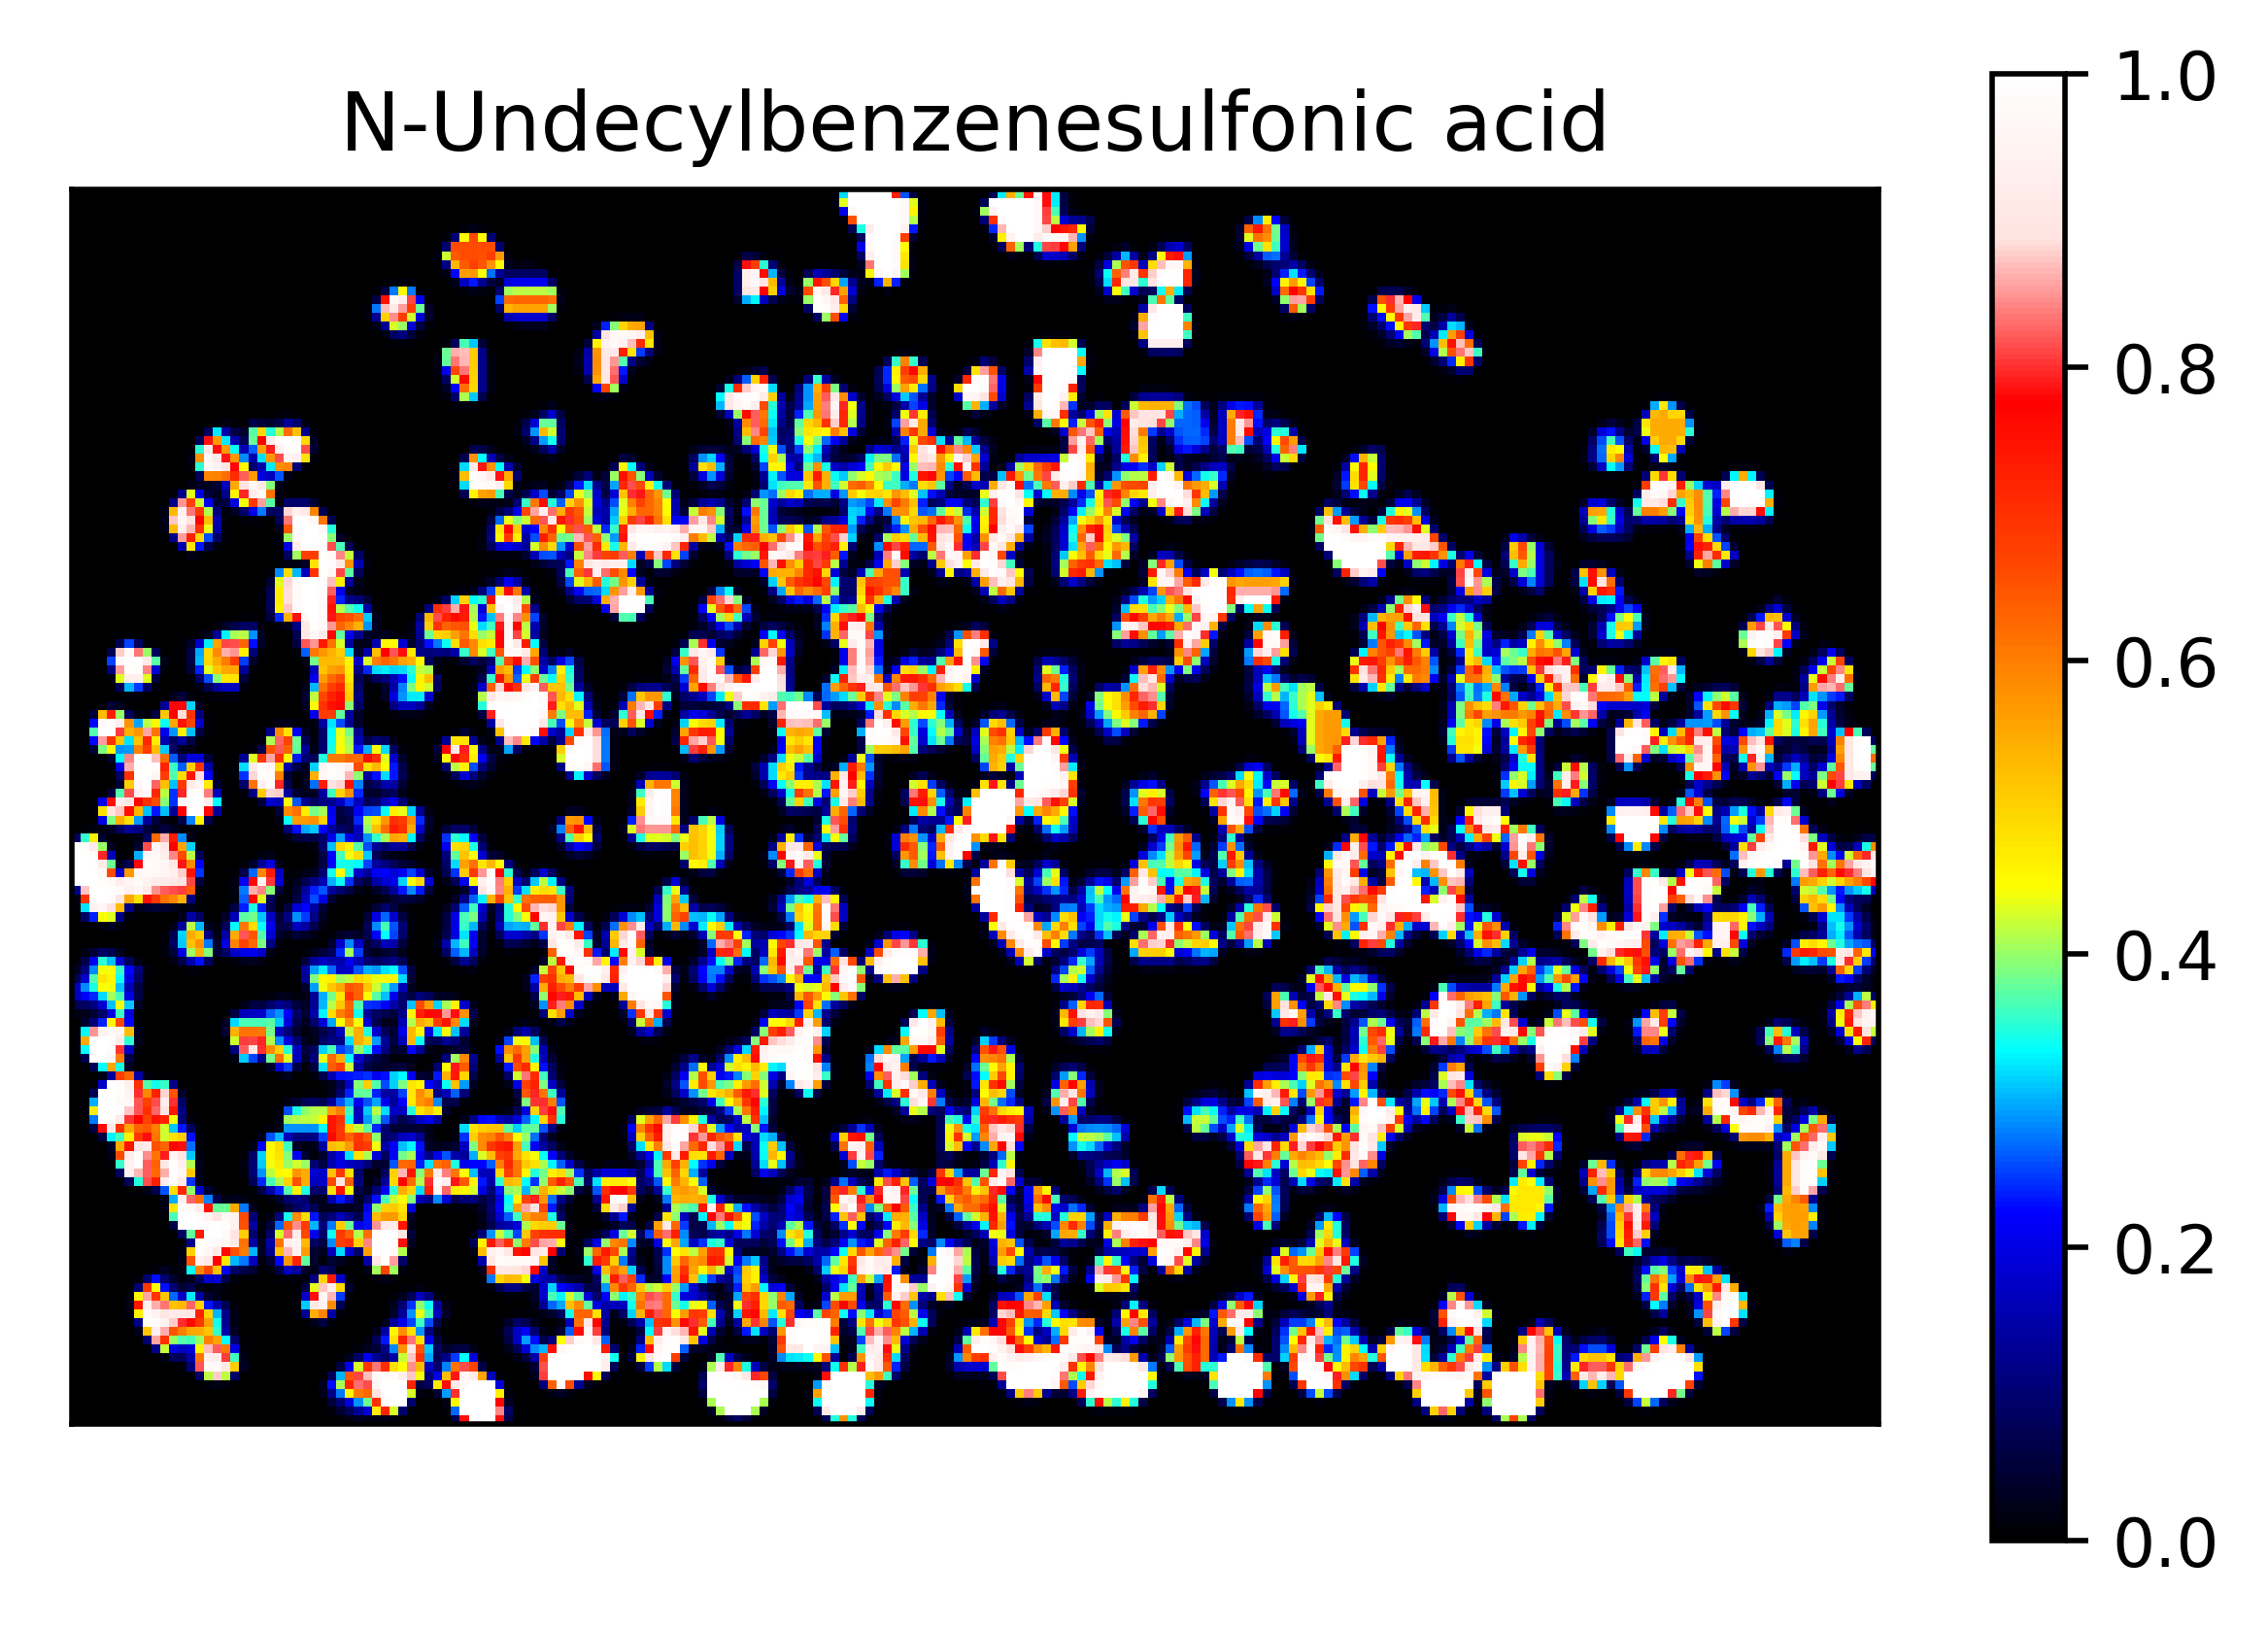

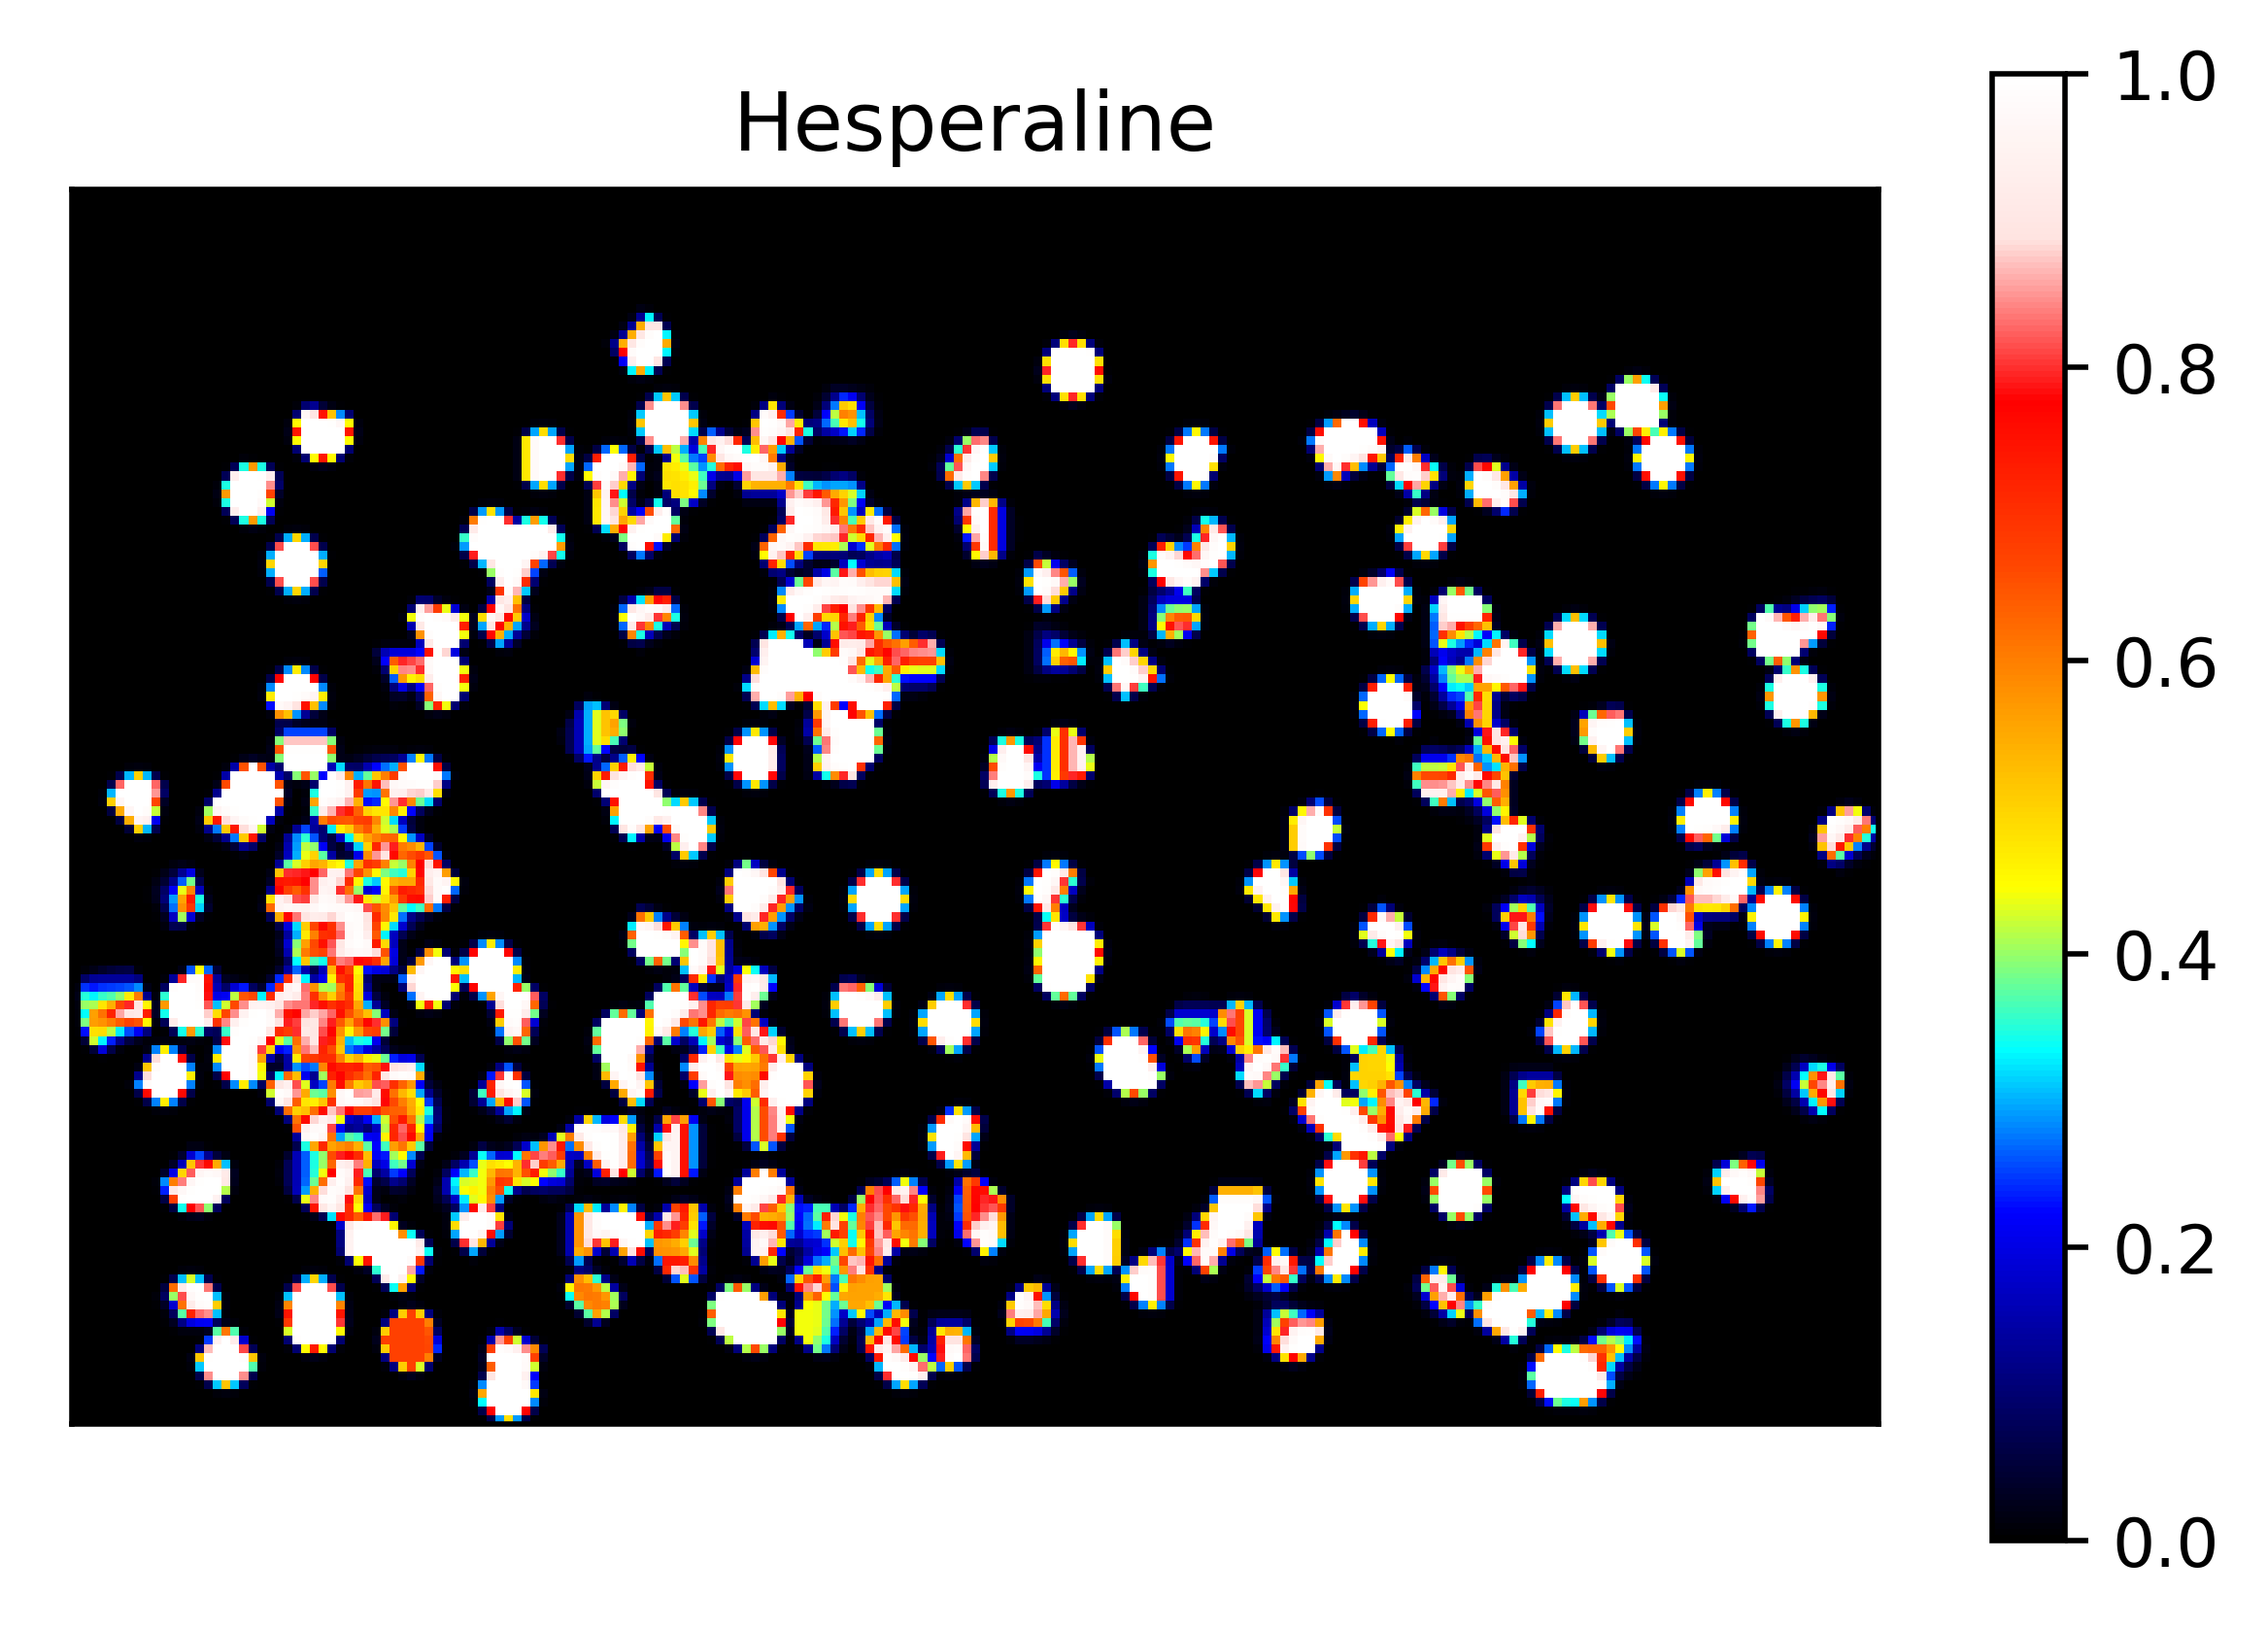

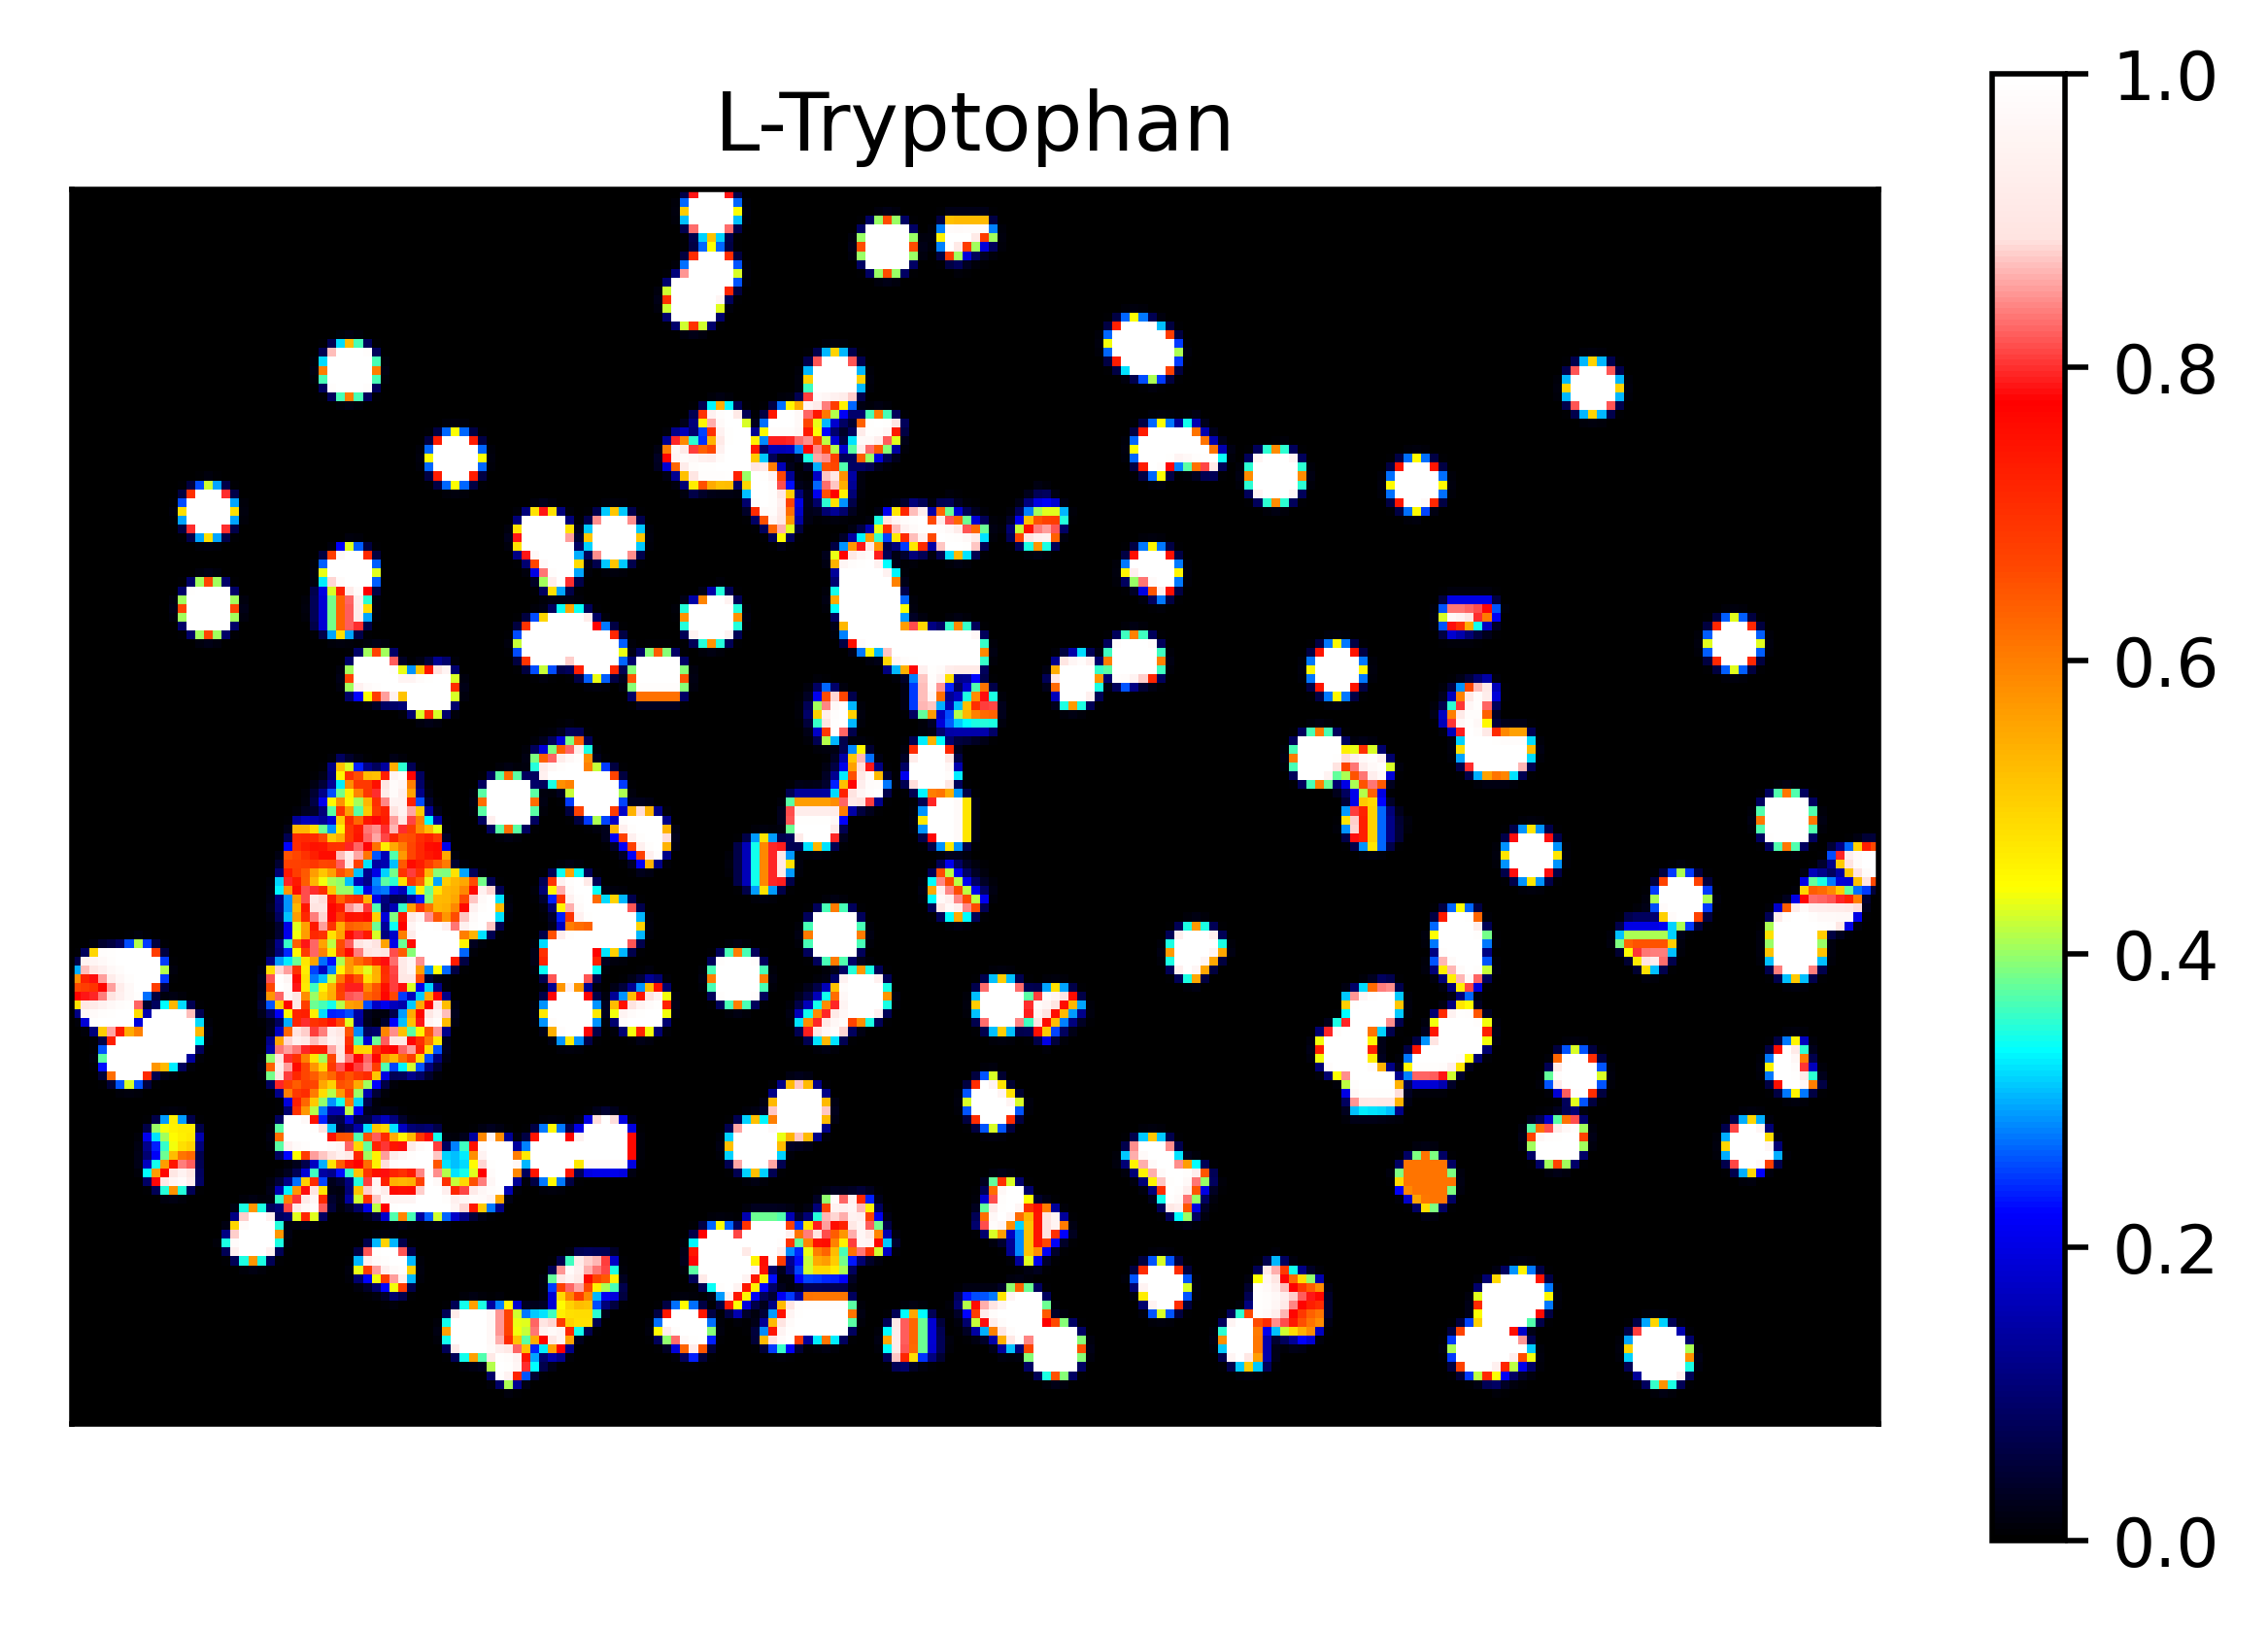

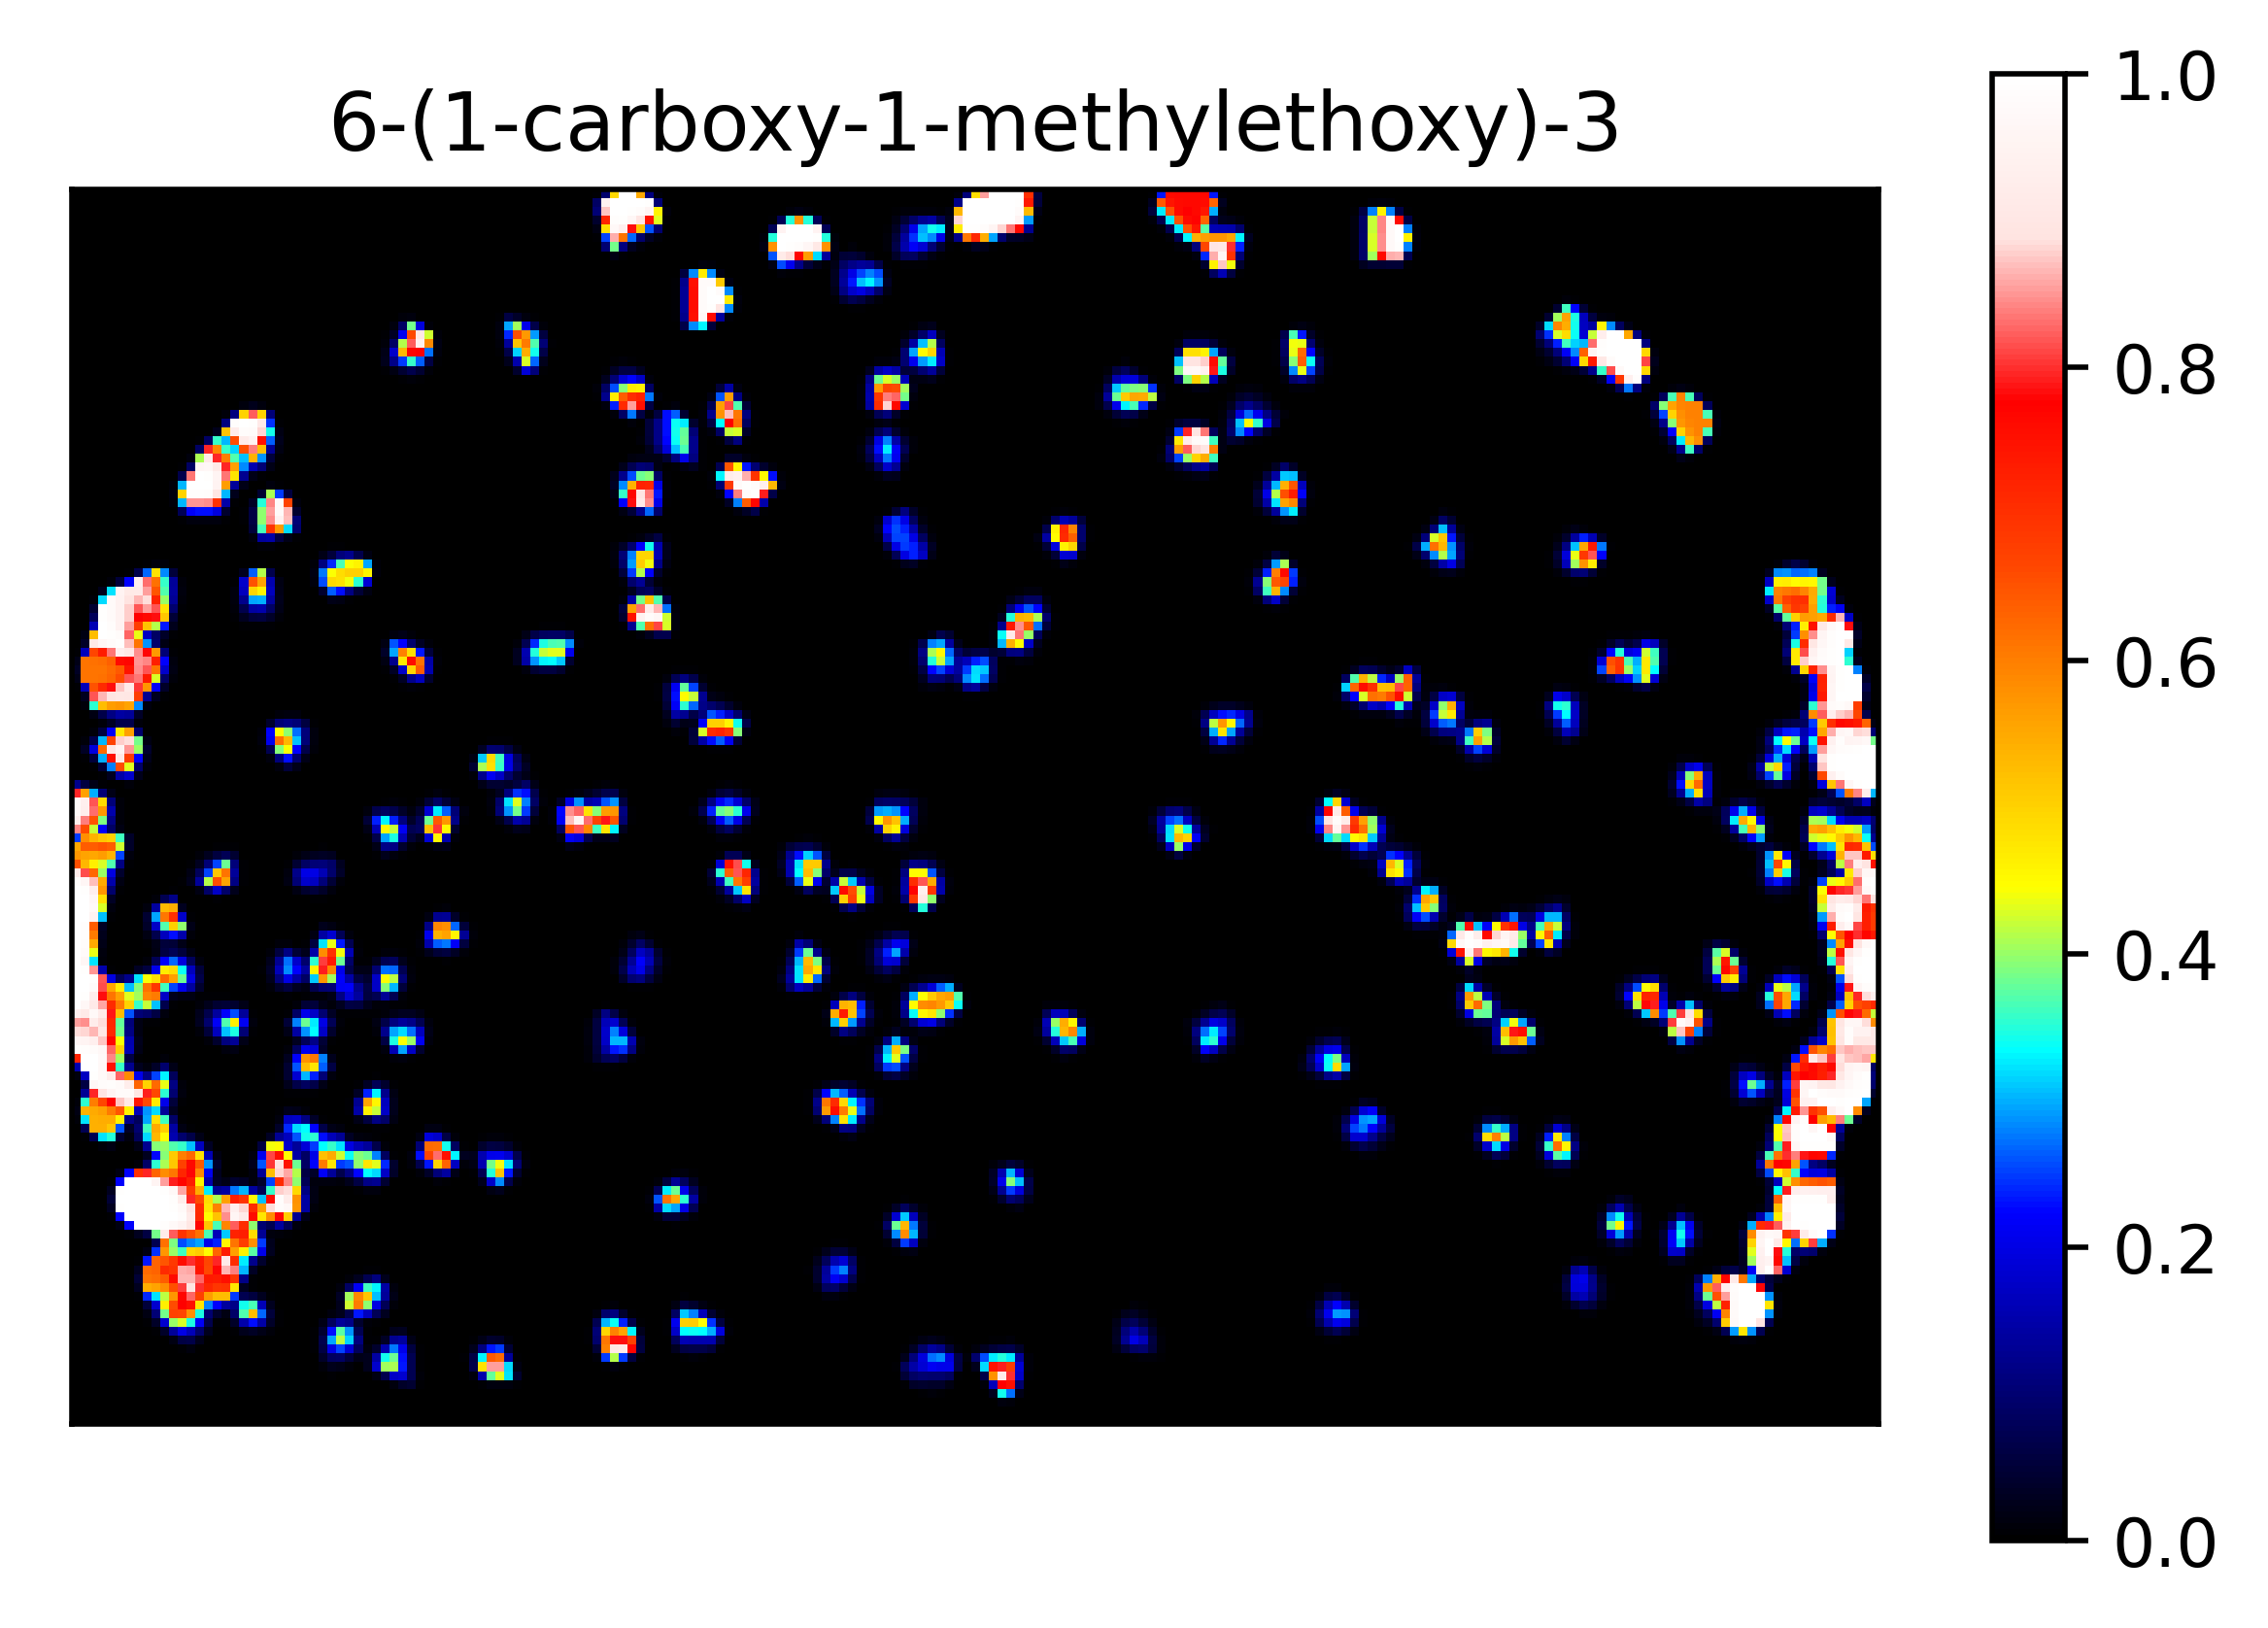

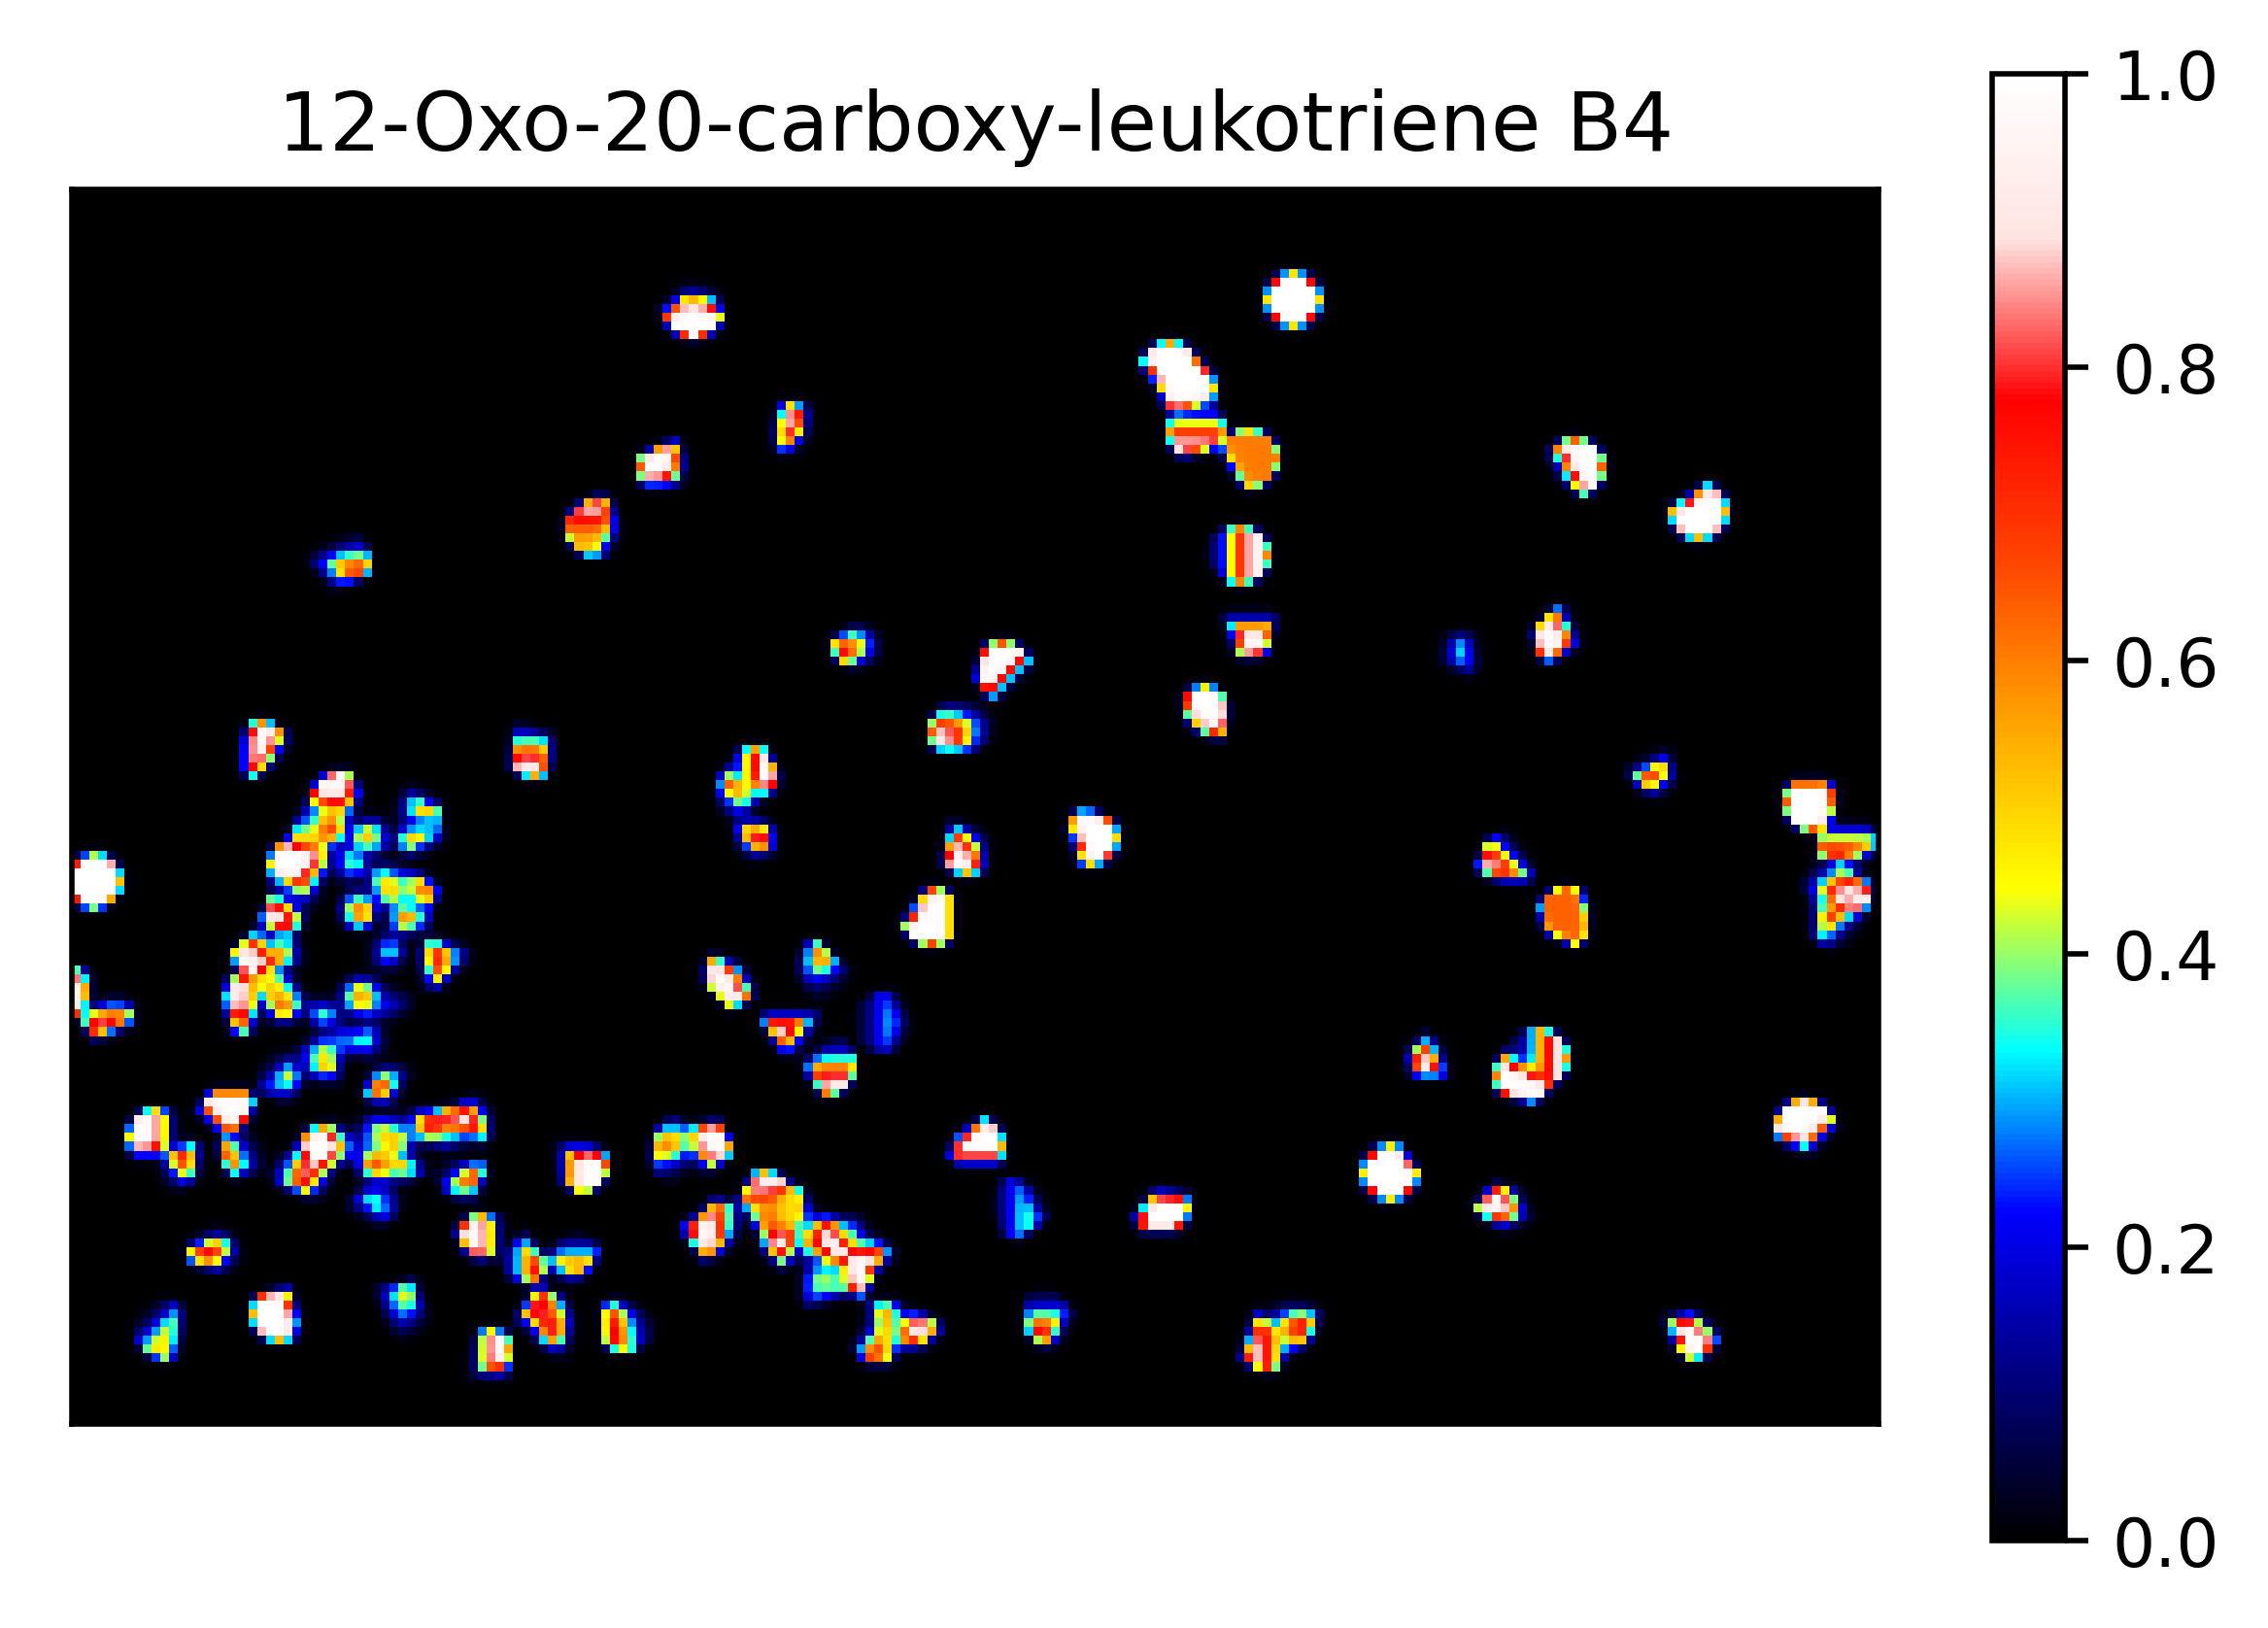

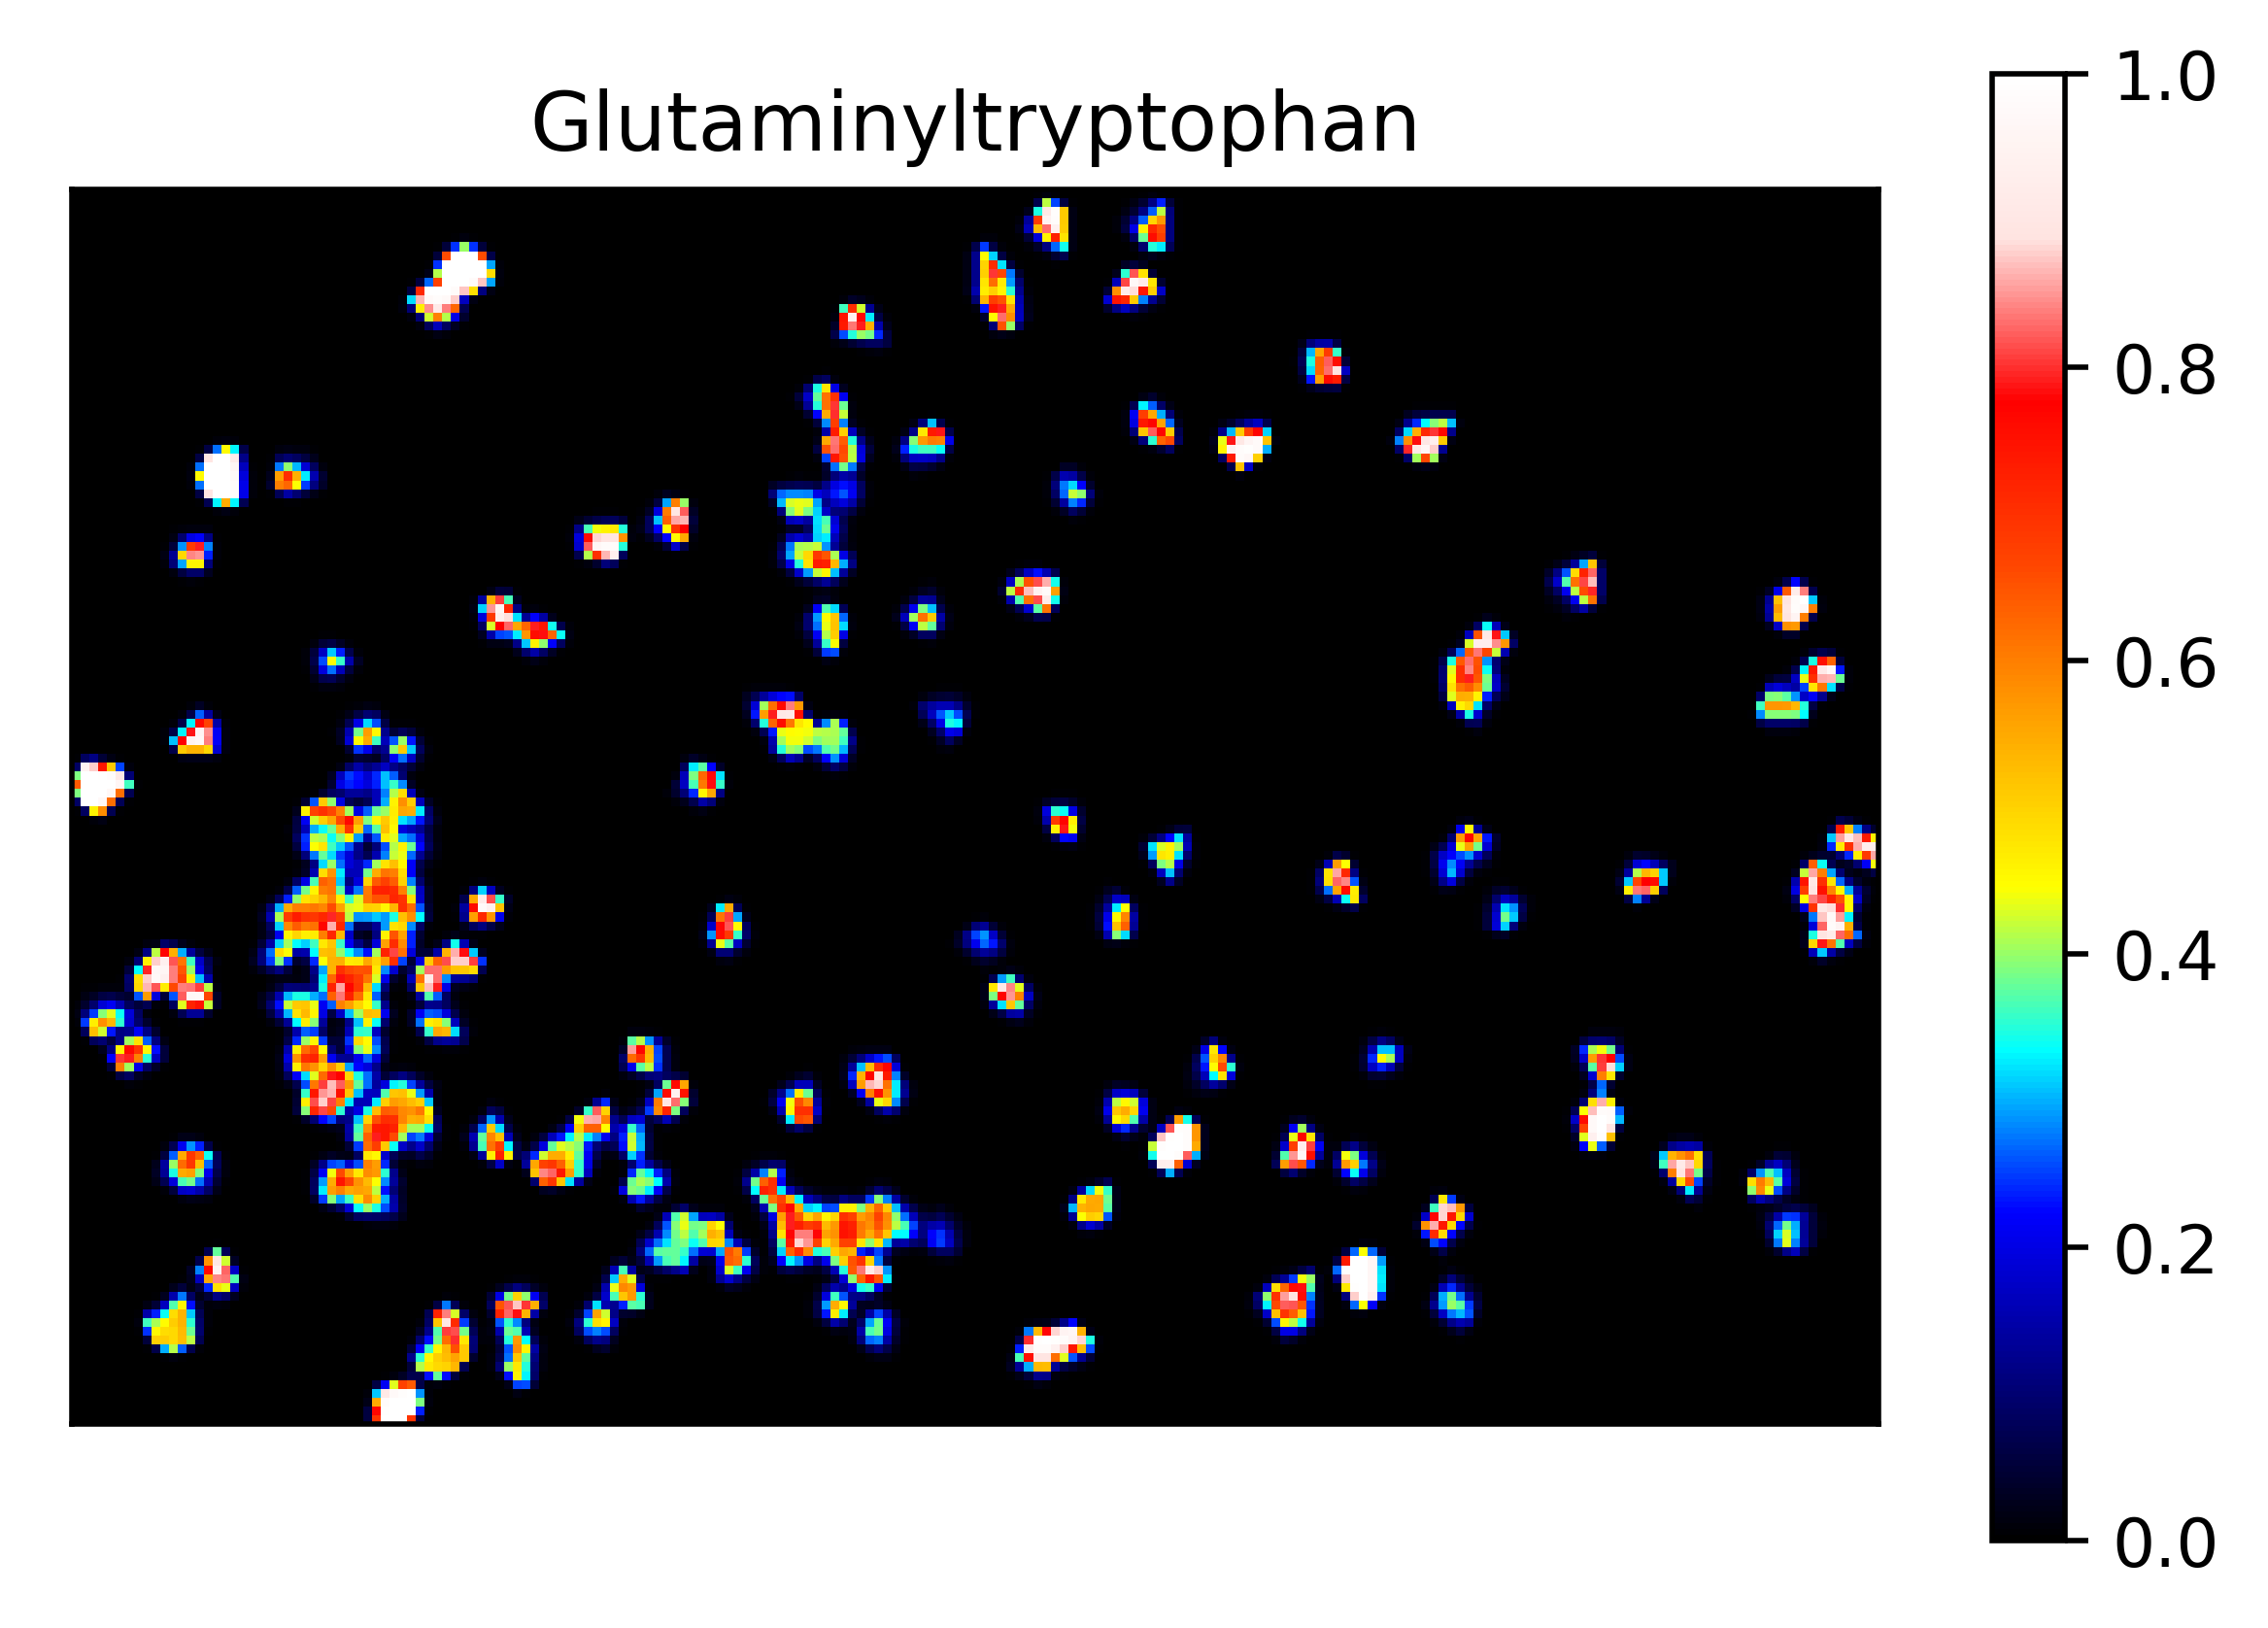

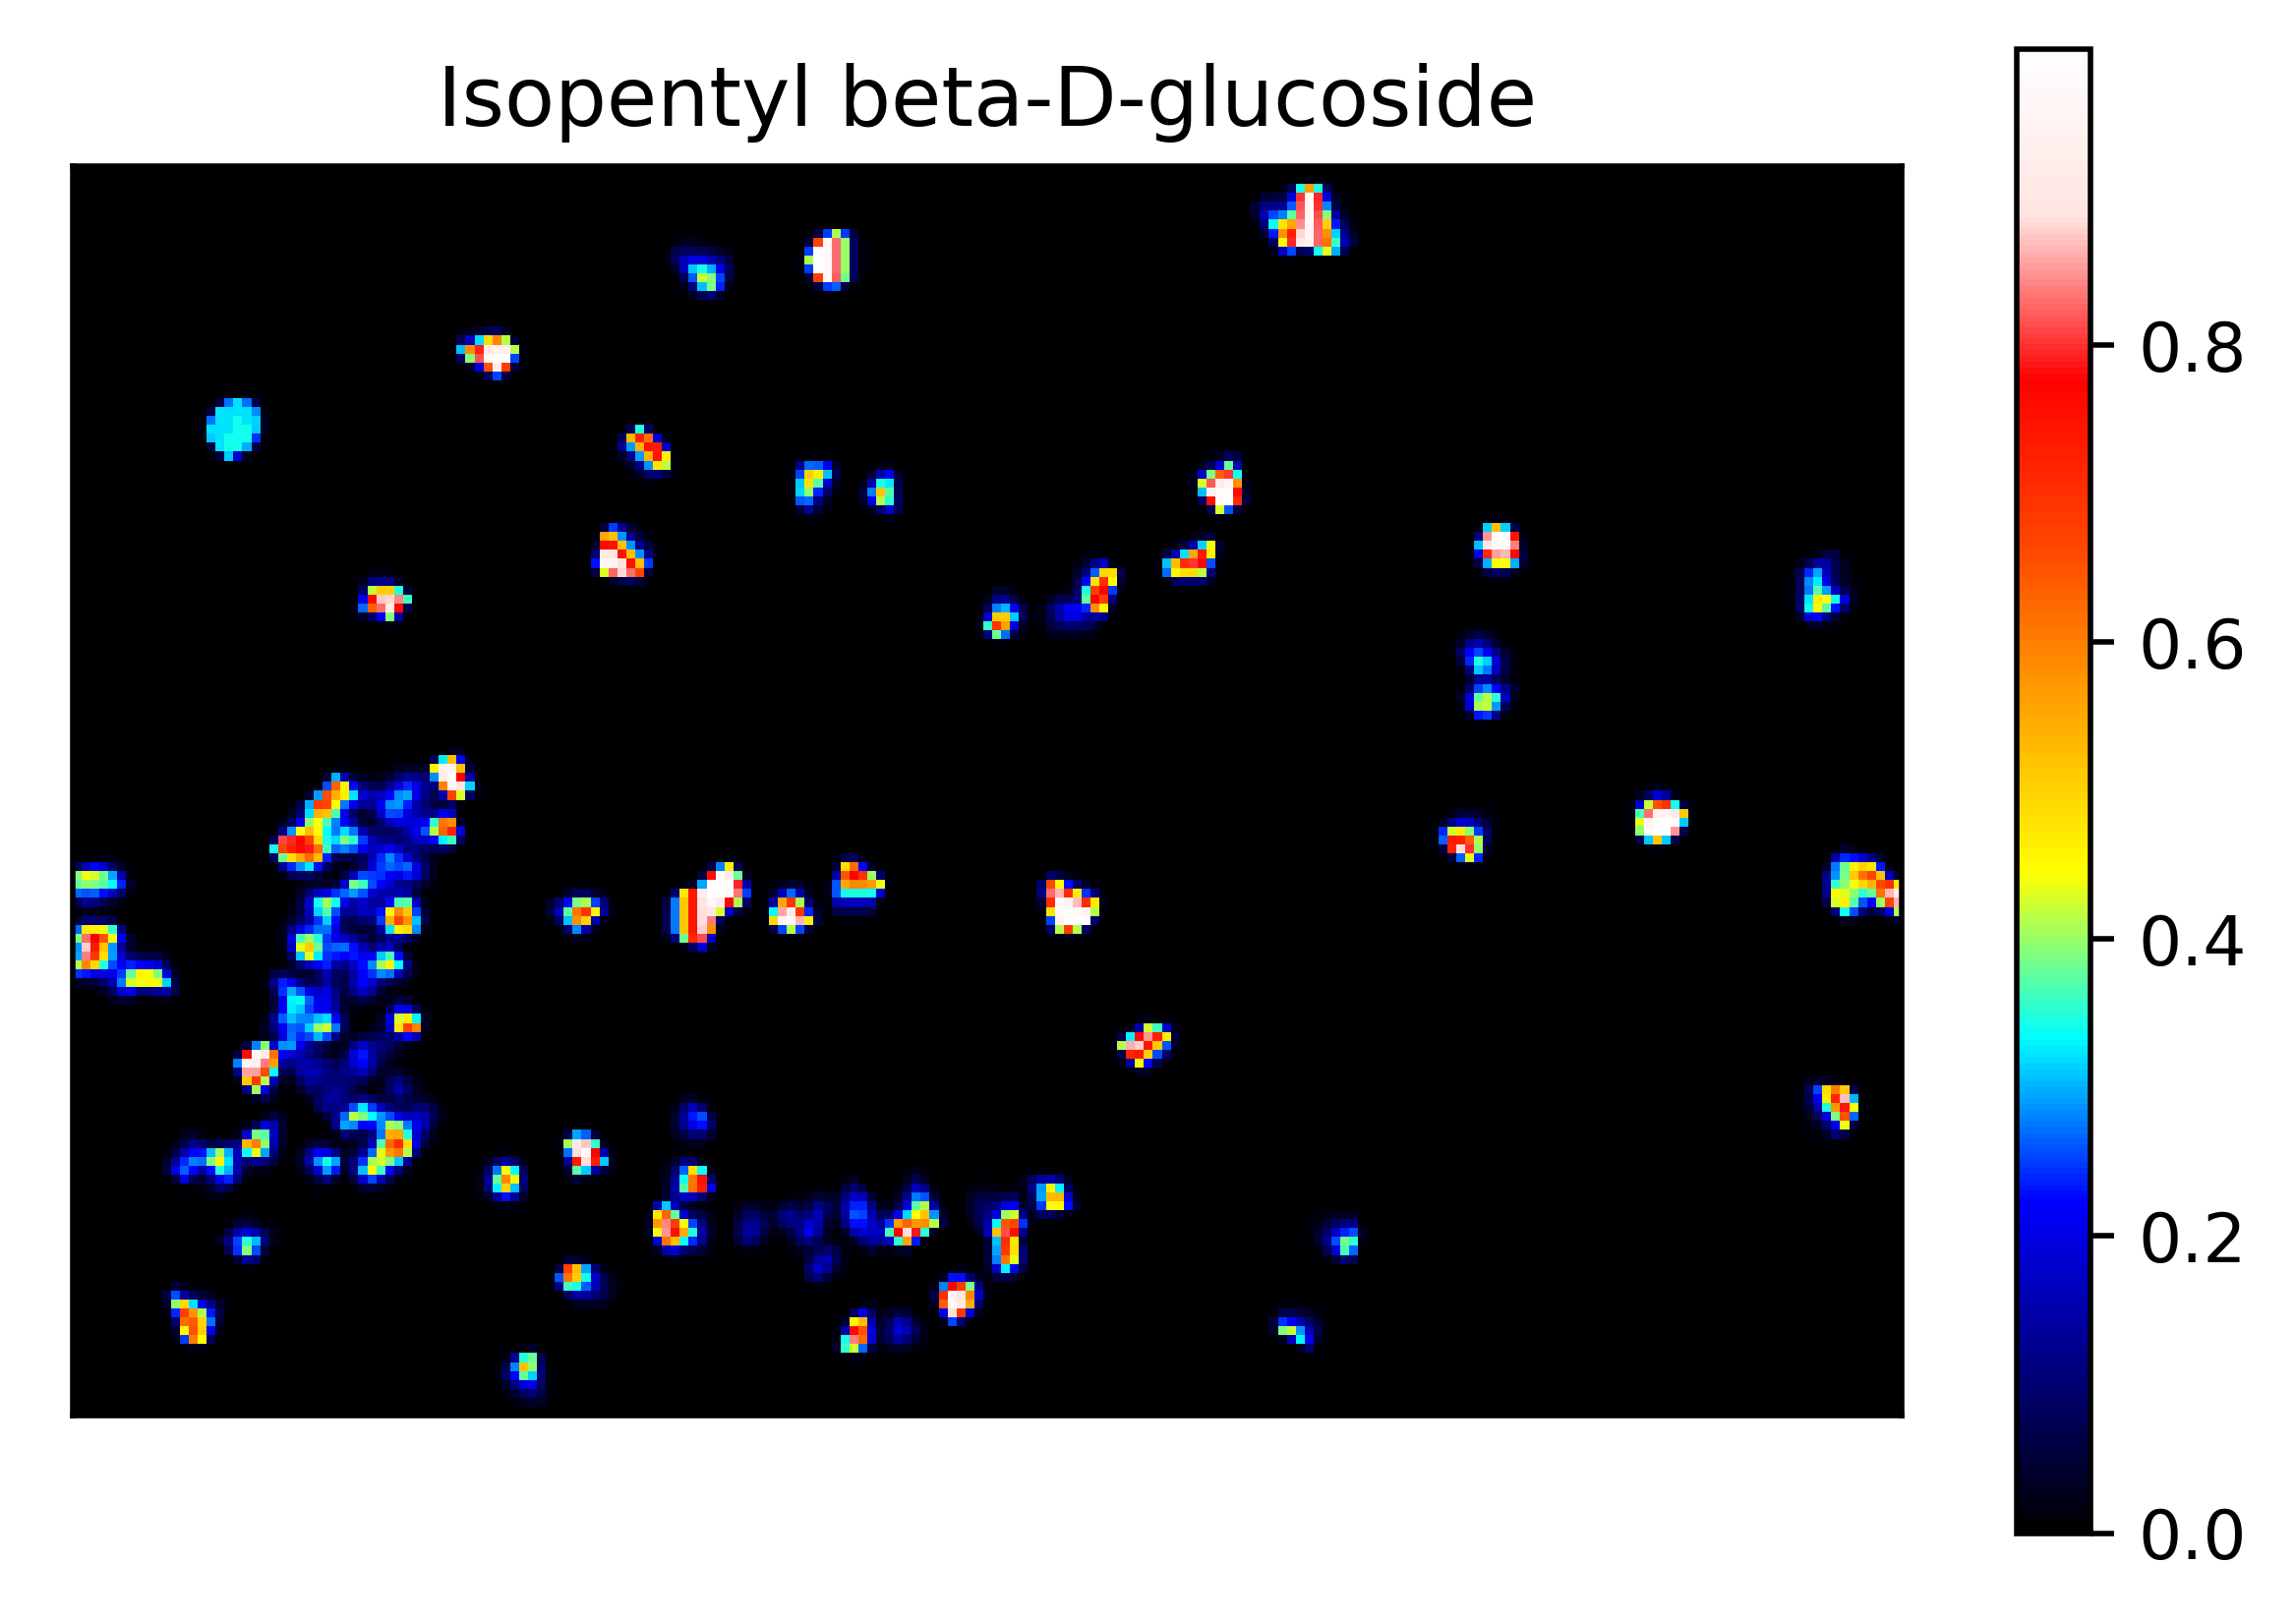

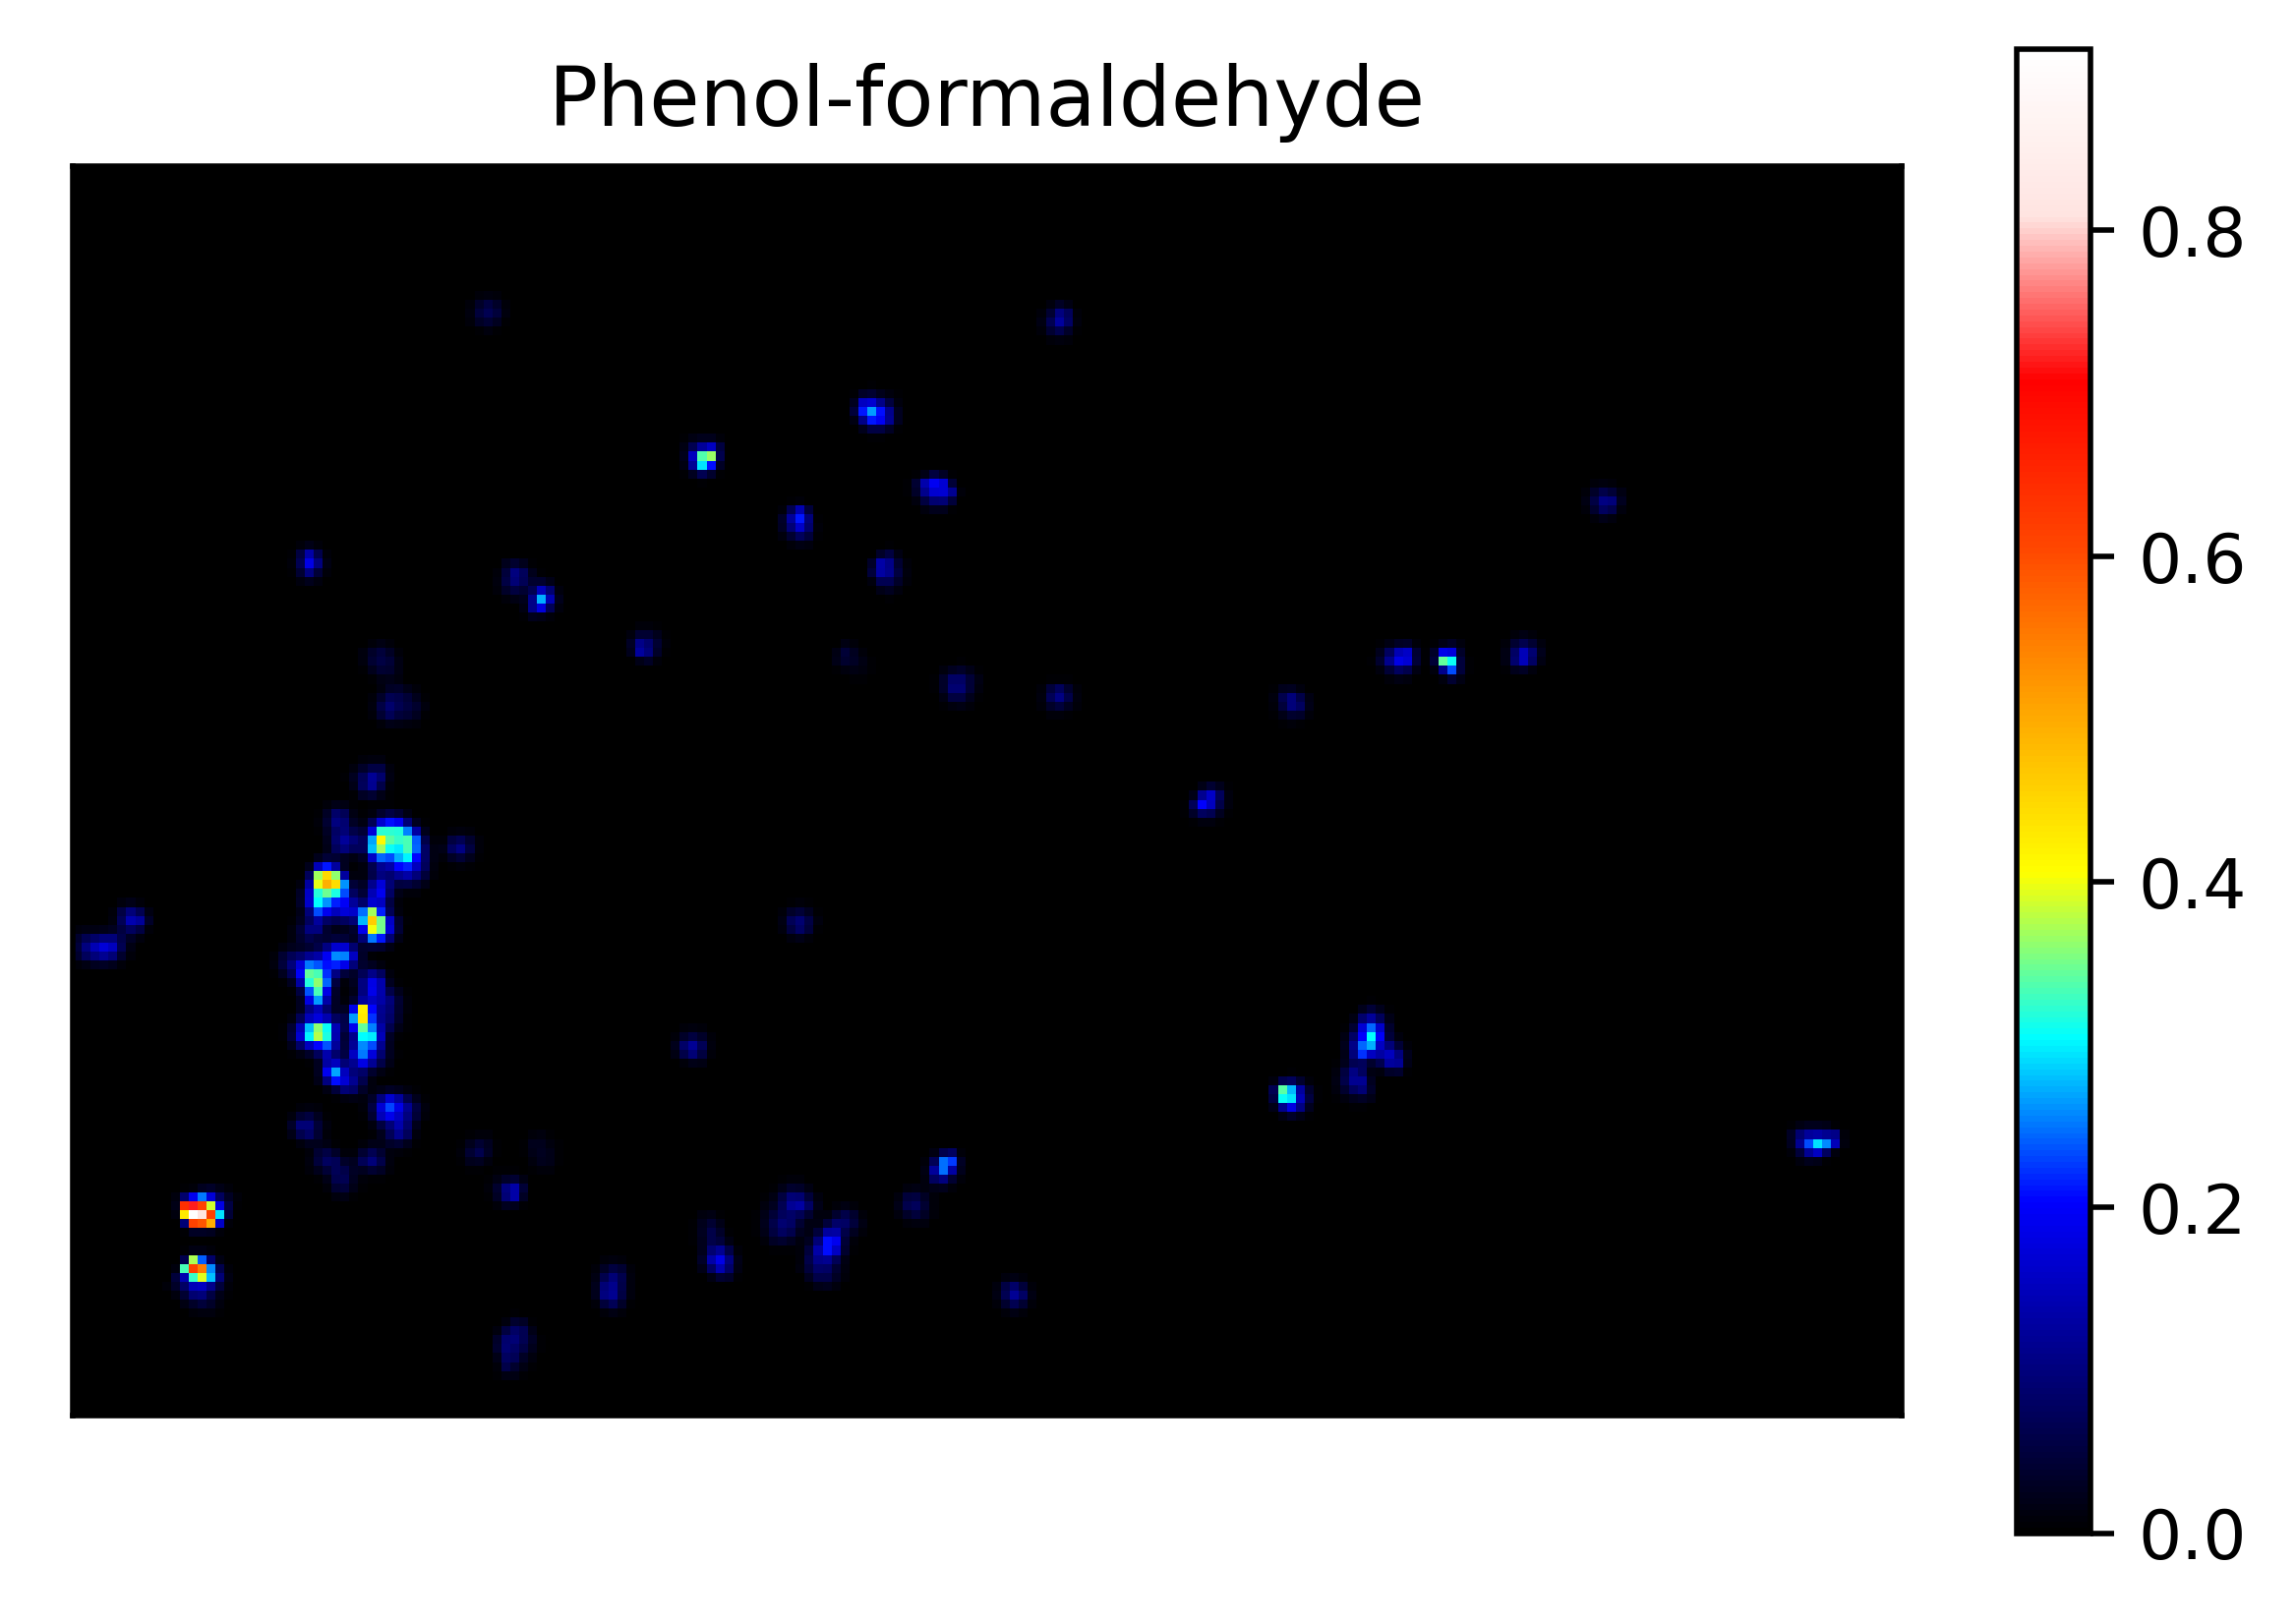

In [17]:
for index,row in peaklist.iterrows():
    tmp = msi_corrected.data_tensor[row["inds"]]
    isoTensor = SIMSIToolBox.normalizeTensor(tmp)
    plt.figure()
    SIMSIToolBox.showImage(isoTensor[0], cmap=colormap)
    plt.title(row["moleculeNames"].split(",")[0])

In [18]:
if __name__ == "__main__":
    df = msi.to_pandas()
    pkl.dump([peaklist,df],open(datadir + fn.replace(".imzML","_corrected.pkl"),"wb"))

forming matrix |██████████████████████████████████████████████████| 100.0% 


In [ ]:
            tmp = msi.data_tensor[inds]
        poolSize = np.sum(tmp[:1] / msi.tic_image, axis=0)    
    metaboliteData[row["moleculeNames"]] = {}
        metaboliteData[row["moleculeNames"]]["pool size image"] = poolSize
        msi_corrected.correctNaturalAbundance(row["formula"],inds)
        tmp = msi_corrected.data_tensor[inds]
        isoTensor = SIMSIToolBox.normalizeTensor(tmp)
        metaboliteData[row["moleculeNames"]]["corected isotope images"] = isoTensor
        metaboliteData[row["moleculeNames"]]["mean M0 corrected"] = np.mean(isoTensor[0][msi.imageBoundary > 0.5])


In [ ]:

        plt.figure()
        SIMSIToolBox.showImage(poolSize, cmap=colormap)
        plt.title(row["moleculeNames"])
        plt.figure()
        SIMSIToolBox.showImage(isoTensor[0], cmap=colormap)
        plt.title(row["moleculeNames"])

In [52]:
poolsizeTensor = []
targs = []
for index,row in peaklist.iterrows():
    inds = [x for x in range(len(keys)) if keys[x][0] == index]
    inds.sort(key=lambda x: keys[x][1])
    poolsizeTensor.append(msi.data_tensor[inds[0]])
    targs.append(msi.targets[inds[0]])

In [53]:
msi_pool = deepcopy(msi)

In [54]:
msi_pool.data_tensor = np.array(poolsizeTensor)
msi_pool.targets = targs

In [55]:
format_data = msi_pool.to_pandas()
xs = format_data["x"].values
ys = format_data["y"].values
format_data = format_data[msi_pool.targets].to_numpy()

In [56]:
format_data.shape

(50034, 291)

In [57]:
fit = umap.UMAP()
u = fit.fit_transform(format_data)

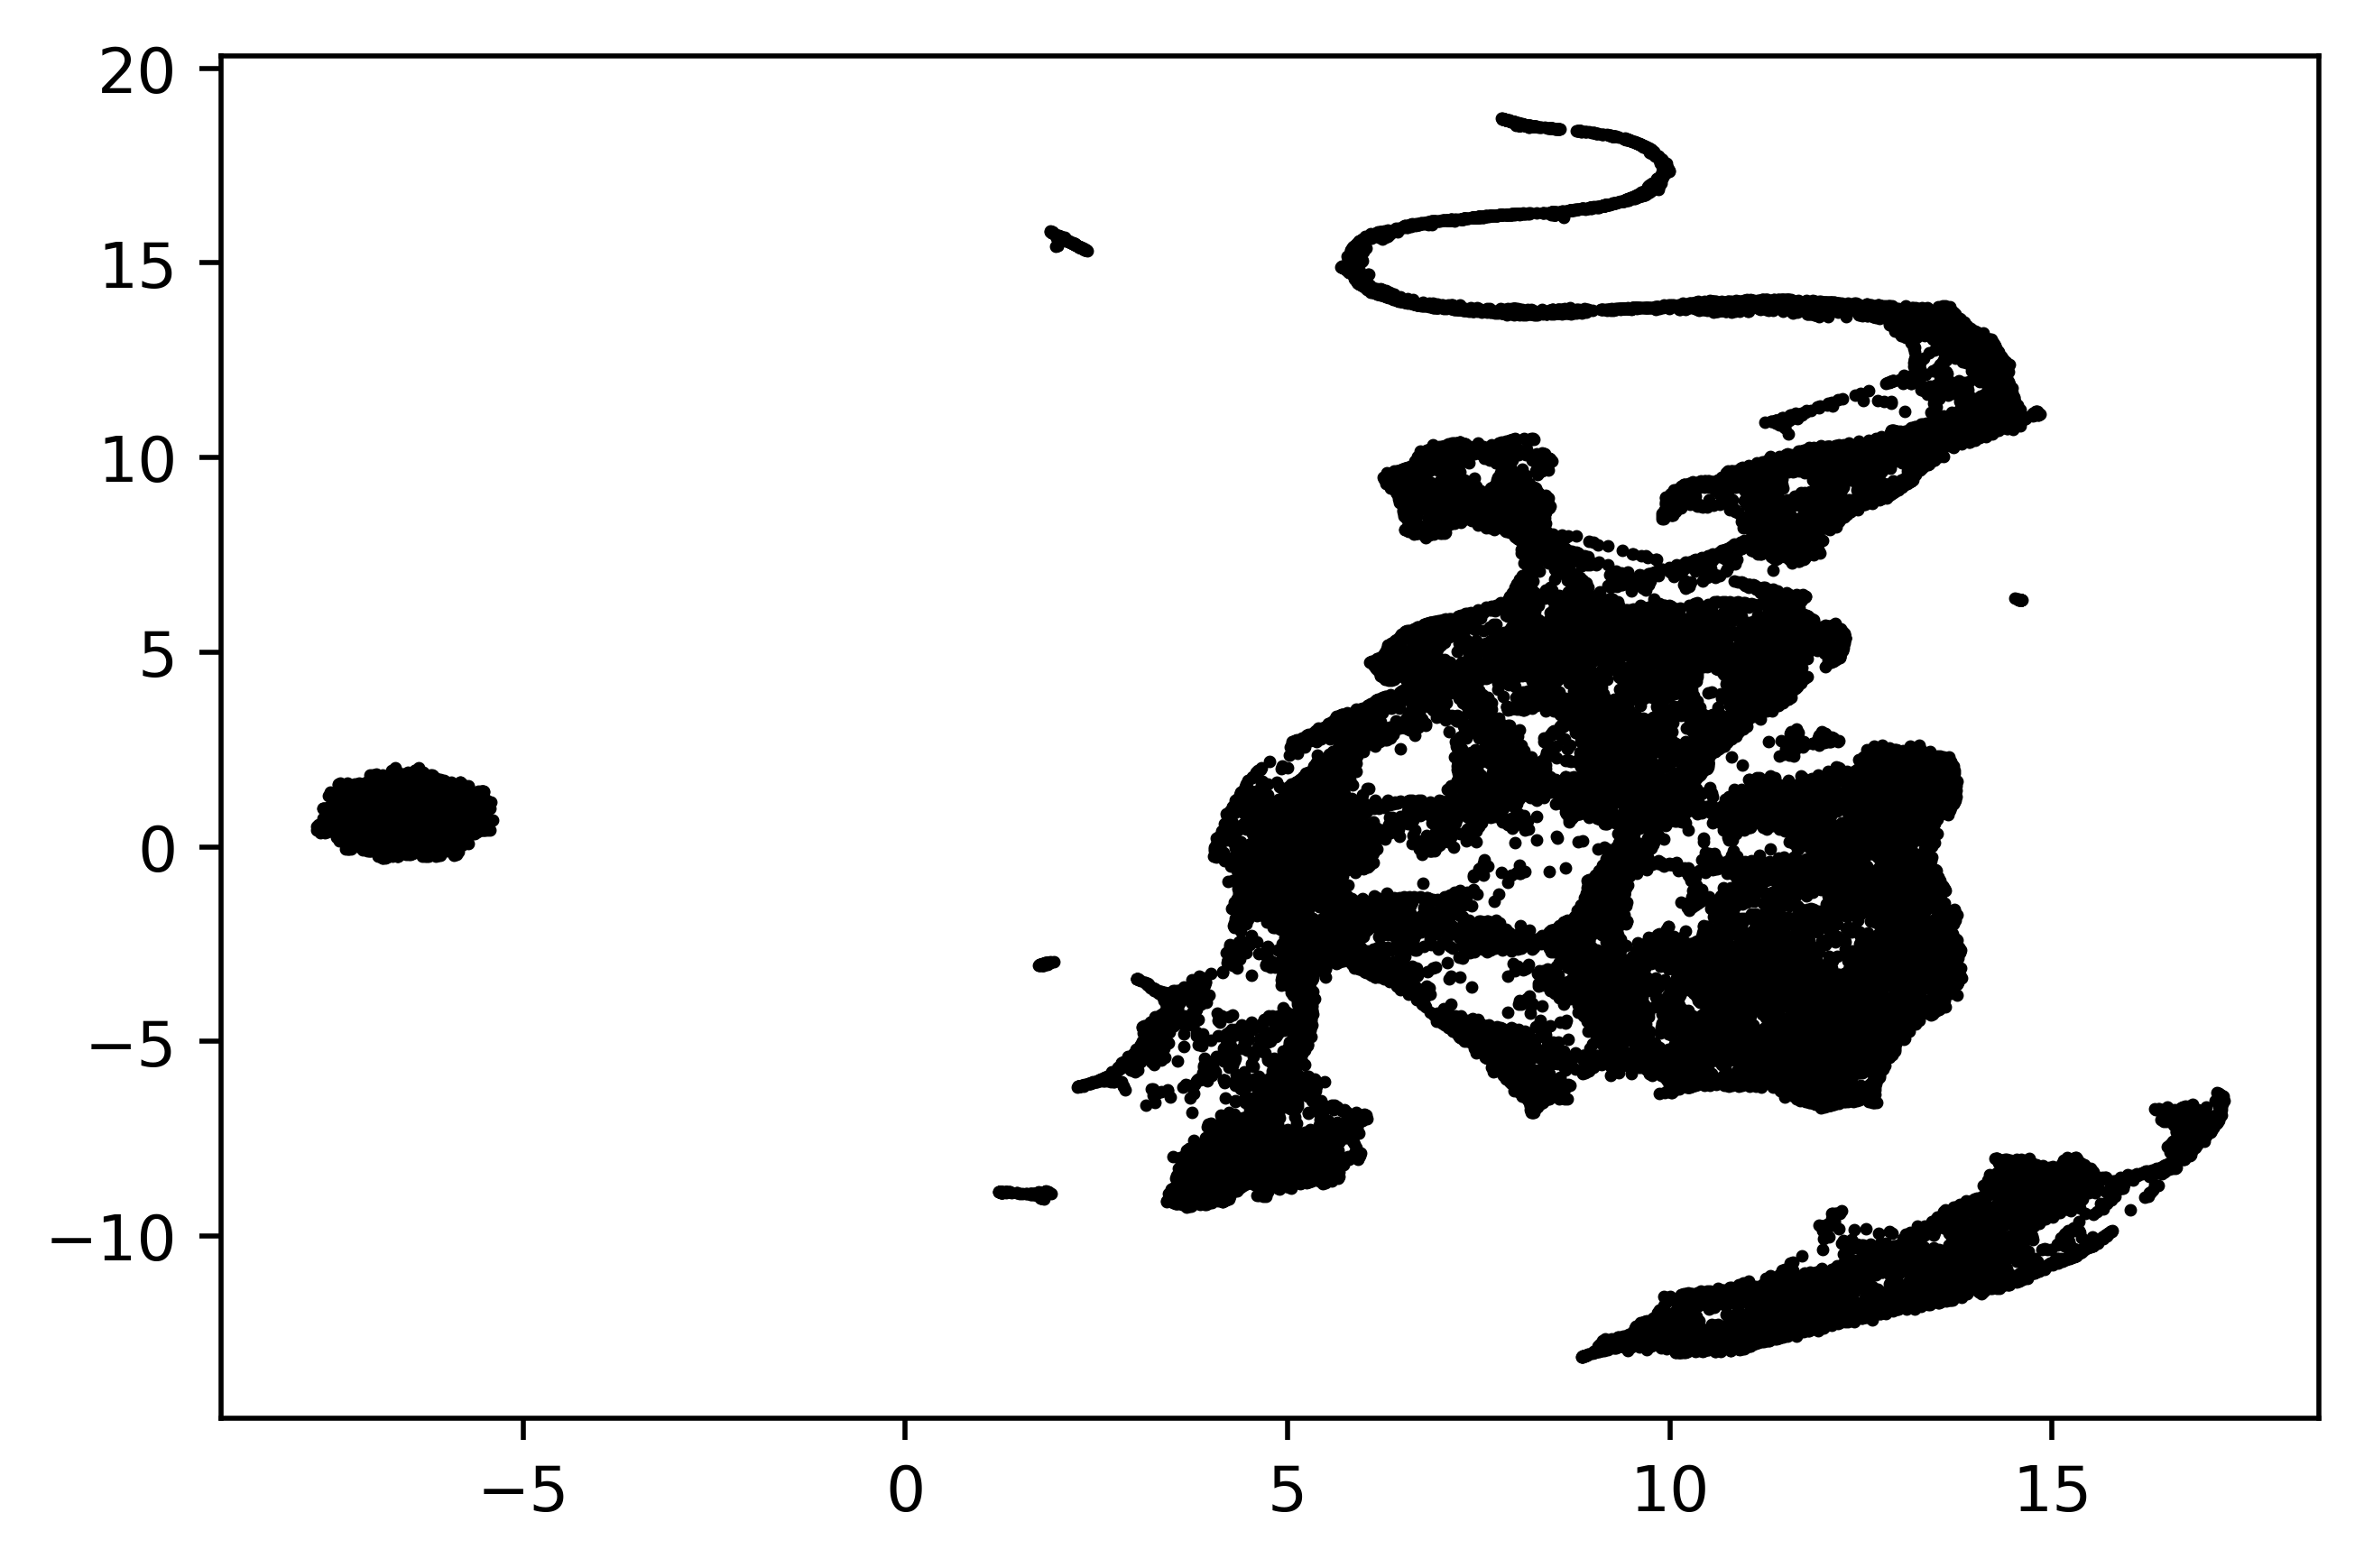

In [58]:
plt.scatter(u[:,0], u[:,1],c="black",s=1)


In [59]:
kmeans_labels = KMeans(n_clusters=8).fit_predict(u)

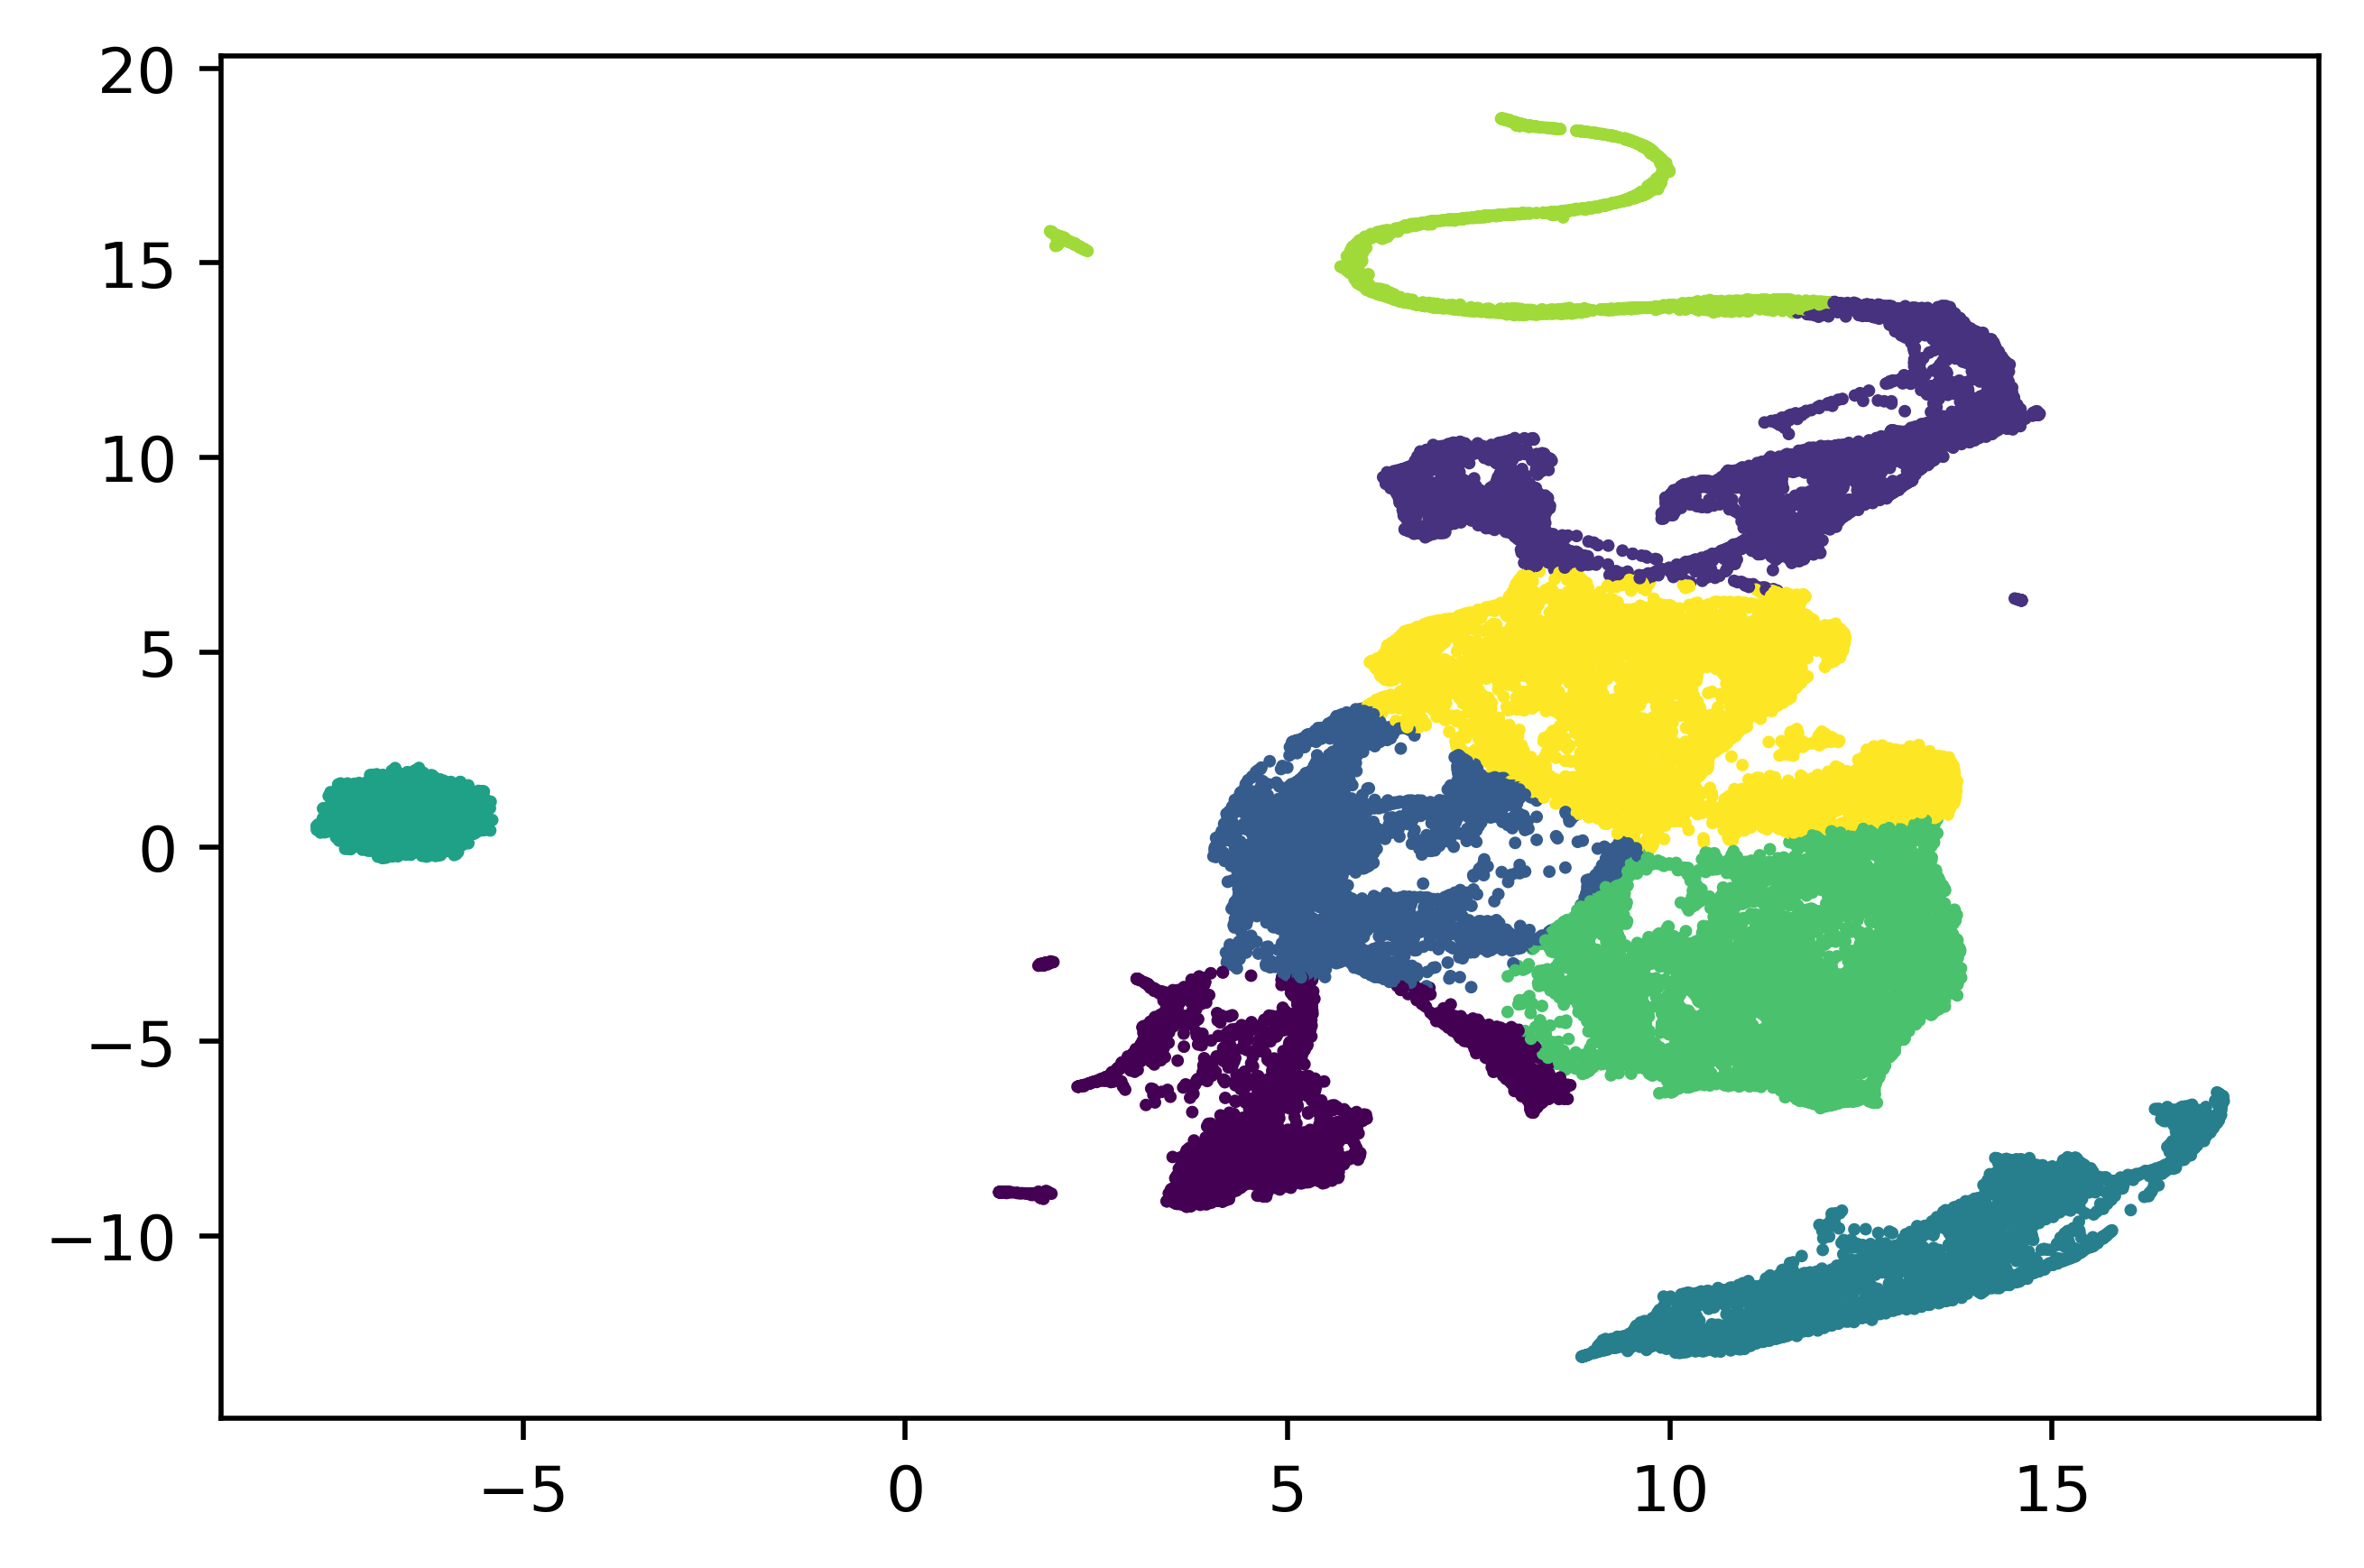

In [60]:
plt.scatter(u[:,0], u[:,1],c=kmeans_labels,s=1)

In [61]:
df = pd.DataFrame()
df["x"] = xs
df["y"] = ys
df["cluster"] = kmeans_labels
df["comp1"] = u[:,0]
df["comp2"] = u[:,1]
df

x    y  cluster     comp1     comp2
0        0    0        4 -6.570827  0.646470
1        1    0        4 -6.261268  1.589771
2        2    0        4 -6.005578  0.645706
3        3    0        4 -6.023043  1.544511
4        4    0        4 -6.579461  1.184941
...    ...  ...      ...       ...       ...
50029  264  185        4 -6.201488  0.246018
50030  265  185        4 -6.489655 -0.081019
50031  266  185        4 -6.684782  1.169815
50032  267  185        4 -5.520367  0.579039
50033  268  185        4 -6.978440  0.461924

[50034 rows x 5 columns]

In [63]:
umapImg = SIMSIToolBox.MSIData.parse_df_to_matrix(df,["cluster"],-1,(msi_pool.data_tensor[0].shape[0],msi_pool.data_tensor[0].shape[1]))

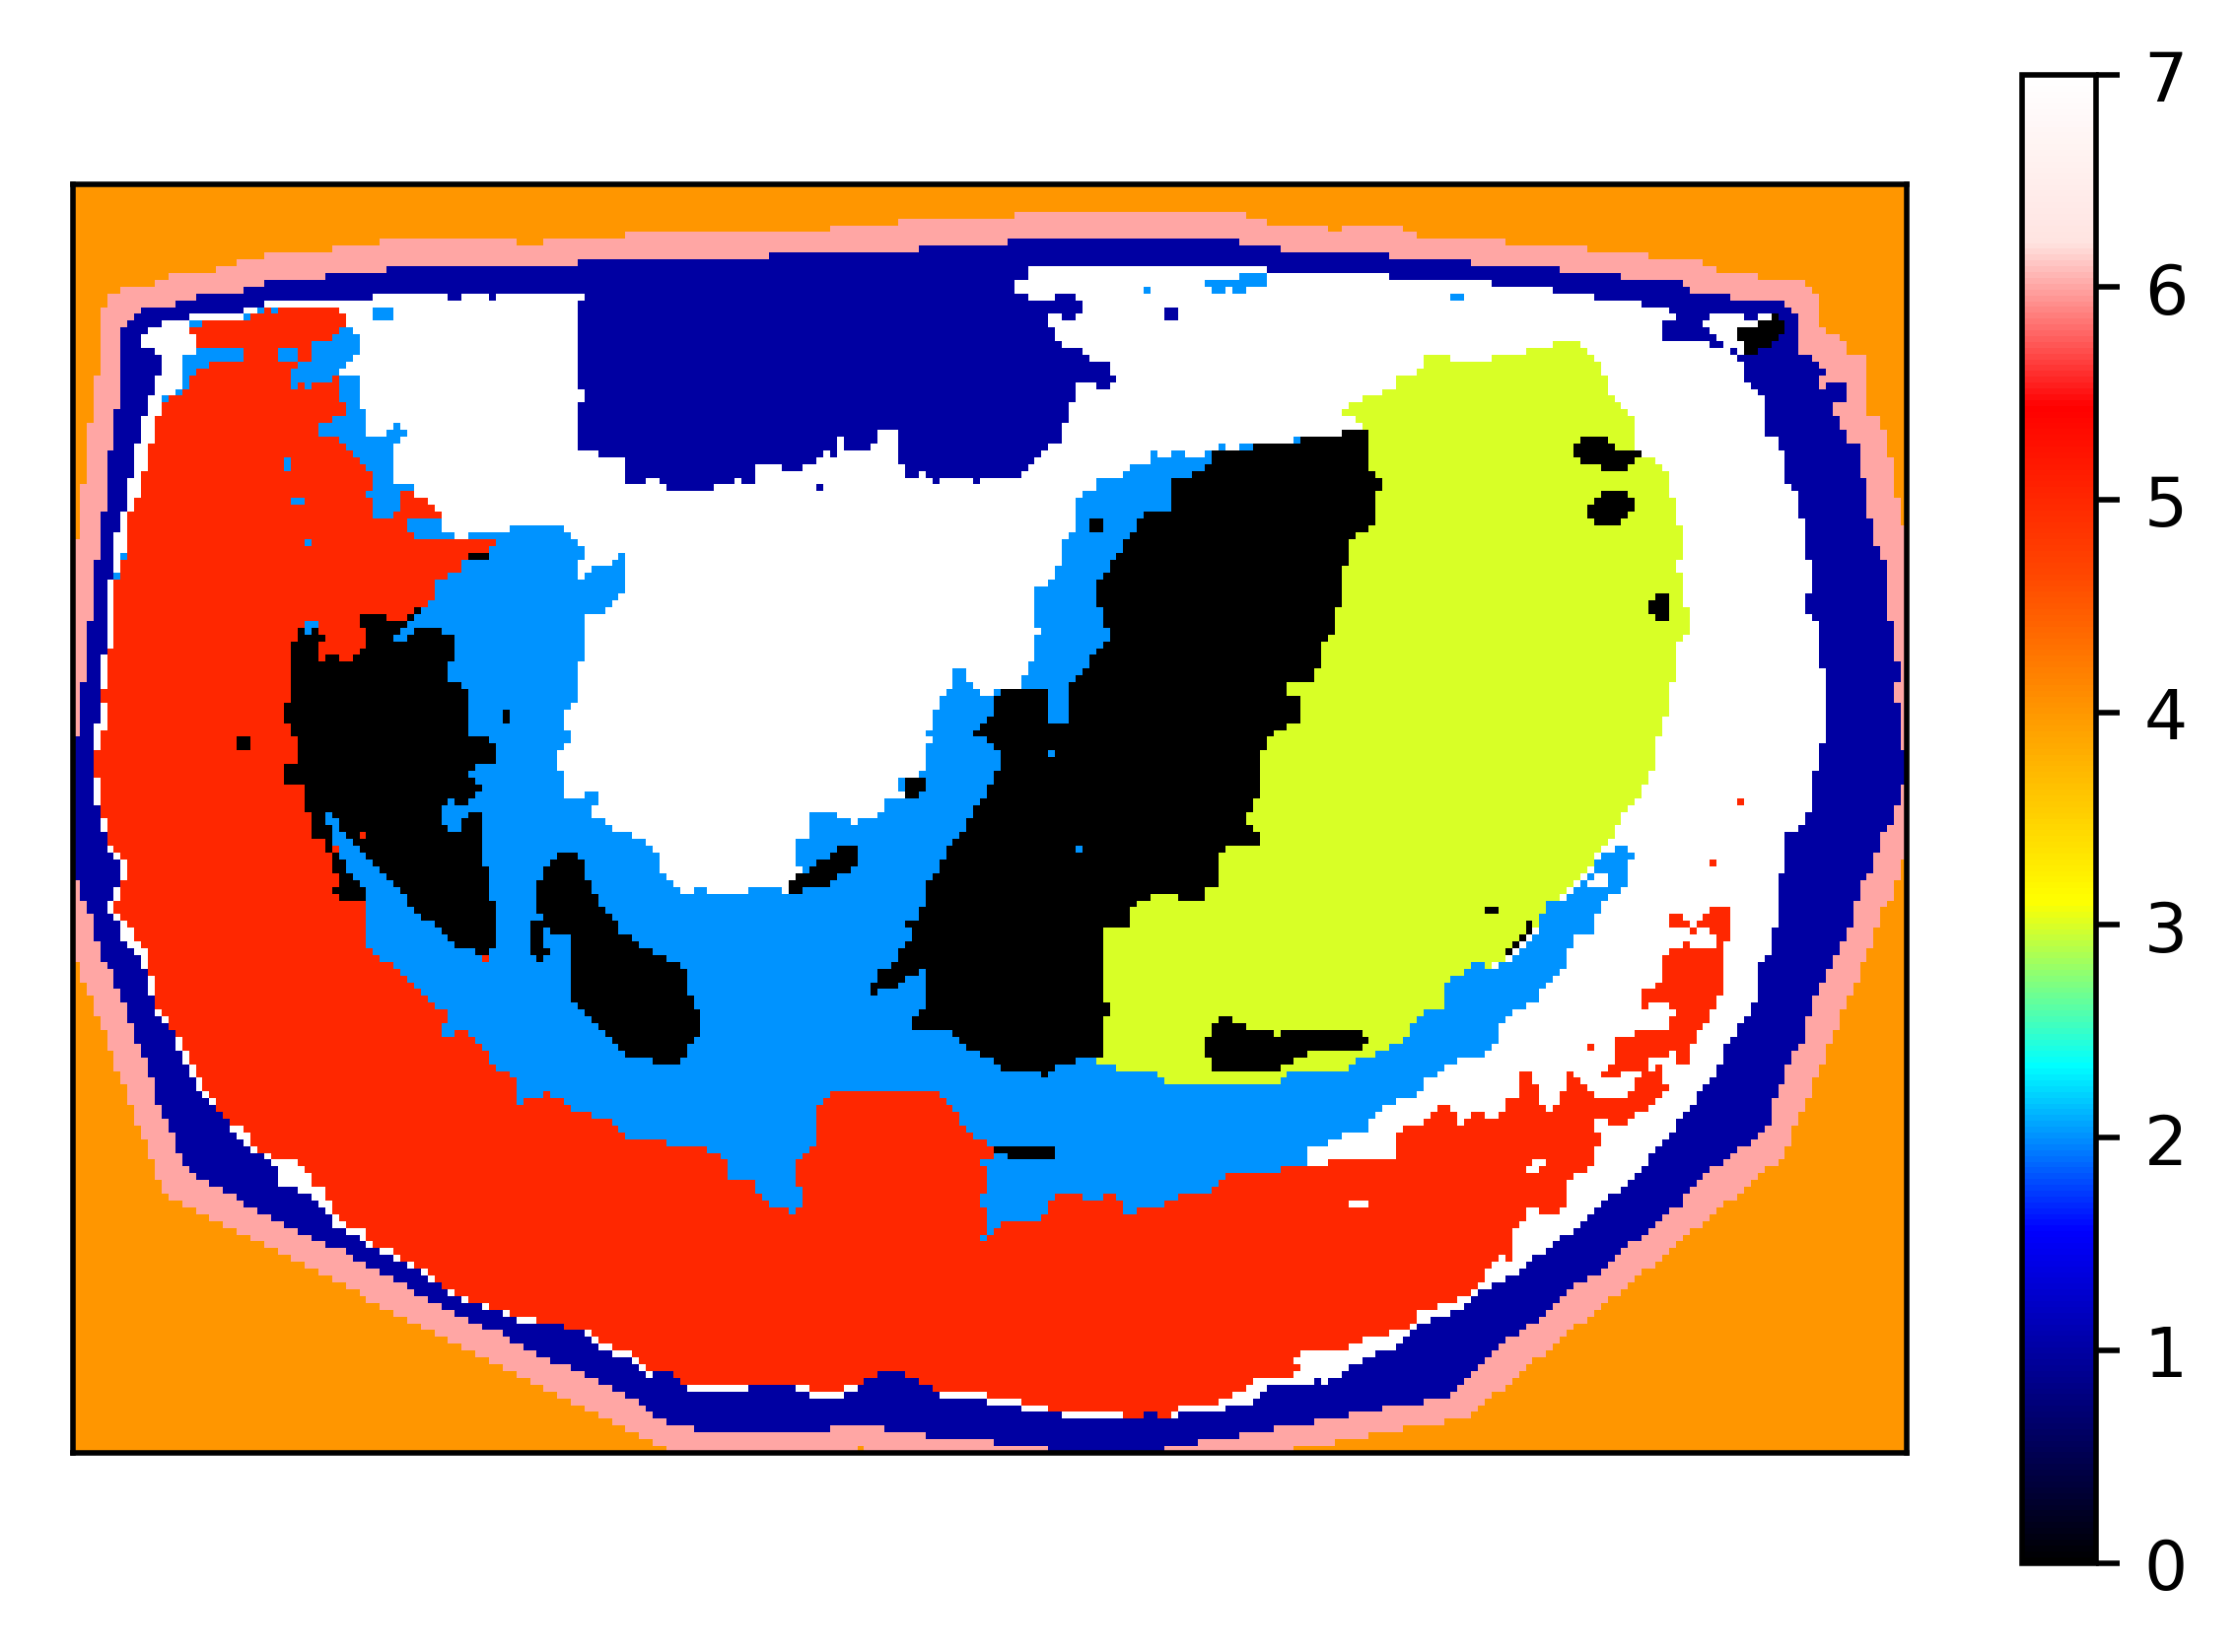

In [65]:
SIMSIToolBox.showImage(umapImg, cmap=colormap)